## TBMI26 - Deep Learning Lab ##
### Lab overview ###
In this lab, you will experience the power of deep learning in an image classification task. The aim is to create a Convolutional Neural Network (CNN) and train it on CIFAR10 dataset.
***
** CNN **
There are hundreds, maybe thousands, of CNN architectures for image classification. In this lab, we will train LeNet [1] on image classification dataset. The architecture of the network is shown below
<img src="images/lenet.png" alt="Lenet Architecture" title="Lenet Architecture" />

Your <font color=blue>**first task**</font> is to try different combinations of activation functions and subsampling methods. For example:
1. Sigmoid activation + average pooling subsampling 
2. Sigmoid activation + max pooling subsampling 
3. ReLU activation + average pooling subsampling 

***

The <font color=blue>**second task**</font> is to plot the convergence curves (loss vs. epochs) and (accuracy vs. epochs) and see which of the three combinations above converges faster.

***

** CIFAR10 **
It is one of the earliest datasets for image classification. It has 60,000 images of 10 different classes of images. The dataset is divided into a training set (50,000 images) and a test set (10,000 images)

Your <font color=blue>**third task**</font> is to take the last network from the first task and retrain it again using data augmentation (random horizontal flip and random crop). How does this affect the performance of the network ?

***

The <font color=blue>**final task**</font> is to show some test images with their correpsonding groundtruth and predictions

***

[1] LeCun, Yann, et al. "Gradient-based learning applied to document recognition." Proceedings of the IEEE 86.11 (1998): 2278-2324.

### Import Modules

In [1]:
import os
import glob

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import torch.backends.cudnn as cudnn

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

from models.Lenet import LeNet
from train import *
from test import *

%matplotlib notebook  

# Autoreload modules when they are updated
%load_ext autoreload
%autoreload 2

### Download and Load CIFAR-10 Dataset
First, we download and load the CIFAR10 dataset. Pytorch has a built-in function for that. We apply transformations on images in trainin set and test set separately. These transformations are *ToTensor* which normalizes the images to the range from 0 to 1 and then *Normalize* which does contrast normalization for all images to make them zero mean along each channel. Contrast normalization was shown to improve the accuracy of CNNs. More data augmentation trasformations could be added to *transform_train*.

In [2]:
# Check if CUDA support is available (GPU)
use_cuda = torch.cuda.is_available()

# Image transformations to apply to all images in the dataset (Data Augmentation)
transform_train = transforms.Compose([
    transforms.ToTensor(),                # Convert images to Tensors (The data structure that is used by Pytorch)
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)), # Normalize the images to zero mean
])

# Image transformations for the test set.
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# Specify the path to the CIFAR-10 dataset and create a dataloader where you specify the "batch_size"
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=256, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

# Specify classes labels
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


### Load and initialize the network model
The network is constructed by creating an object of the class LeNet which defines the network architecture. By default, when this object is created, the weights of each convolution layer are initialized randomly.
Afterwards, we define the loss function. We use *CrossEntropyLoss* as it suits multi-label classification tasks. Then we define the training optimizer, you can choose between the famous gradient descent *SGD* or Adam optimizer.

### 1. Sigmoid activation + average pooling subsampling

In [3]:
# Load and initialize the network architecture 
model1 = LeNet(activation=F.sigmoid, pooling=F.avg_pool2d, pretrained=False)

# Load the last save checkpoint
use_checkpoint=False

if use_cuda:
    model1.cuda()
    cudnn.benchmark = True

# The objective (loss) function
objective = nn.CrossEntropyLoss()

# The optimizer used for training the model
optimizer = optim.Adam(model1.parameters())

#### Start Training

In [4]:
start_epoch = 1
num_epochs = 50
model1, loss_log1, acc_log1 = train(model1, trainloader, optimizer, objective, use_cuda, start_epoch, num_epochs=num_epochs)


Epoch: 1
Loss: 2.34954381 | Acc: 12.89% (33/256)
Loss: 2.34805810 | Acc: 10.94% (56/512)
Loss: 2.33295115 | Acc: 11.20% (86/768)
Loss: 2.32800382 | Acc: 11.52% (118/1024)
Loss: 2.32486277 | Acc: 11.09% (142/1280)
Loss: 2.32244174 | Acc: 11.07% (170/1536)
Loss: 2.31973130 | Acc: 11.27% (202/1792)
Loss: 2.31832916 | Acc: 10.79% (221/2048)
Loss: 2.31644752 | Acc: 10.72% (247/2304)
Loss: 2.31573410 | Acc: 10.66% (273/2560)
Loss: 2.31468359 | Acc: 10.51% (296/2816)
Loss: 2.31357078 | Acc: 10.42% (320/3072)
Loss: 2.31320632 | Acc: 10.31% (343/3328)
Loss: 2.31306584 | Acc: 10.21% (366/3584)
Loss: 2.31334221 | Acc: 10.10% (388/3840)
Loss: 2.31261709 | Acc: 10.21% (418/4096)
Loss: 2.31207432 | Acc: 10.32% (449/4352)
Loss: 2.31231138 | Acc: 10.26% (473/4608)
Loss: 2.31235047 | Acc: 10.26% (499/4864)
Loss: 2.31229264 | Acc: 10.31% (528/5120)
Loss: 2.31199137 | Acc: 10.19% (548/5376)
Loss: 2.31173474 | Acc: 10.25% (577/5632)
Loss: 2.31141546 | Acc: 10.07% (593/5888)
Loss: 2.31082483 | Acc: 9.98% 

Loss: 2.15245654 | Acc: 18.67% (9334/50000)

Epoch: 2
Loss: 1.99285591 | Acc: 28.12% (72/256)
Loss: 1.98389131 | Acc: 25.78% (132/512)
Loss: 2.00459381 | Acc: 23.83% (183/768)
Loss: 2.00708678 | Acc: 23.05% (236/1024)
Loss: 2.00986311 | Acc: 23.20% (297/1280)
Loss: 2.02210154 | Acc: 22.72% (349/1536)
Loss: 2.03027288 | Acc: 22.71% (407/1792)
Loss: 2.02621536 | Acc: 22.95% (470/2048)
Loss: 2.02444078 | Acc: 23.26% (536/2304)
Loss: 2.02466012 | Acc: 23.52% (602/2560)
Loss: 2.01881146 | Acc: 23.62% (665/2816)
Loss: 2.02214503 | Acc: 23.47% (721/3072)
Loss: 2.02164621 | Acc: 23.86% (794/3328)
Loss: 2.01862752 | Acc: 24.11% (864/3584)
Loss: 2.01649324 | Acc: 24.30% (933/3840)
Loss: 2.01858343 | Acc: 24.19% (991/4096)
Loss: 2.01851911 | Acc: 24.31% (1058/4352)
Loss: 2.02142023 | Acc: 24.31% (1120/4608)
Loss: 2.01994129 | Acc: 24.38% (1186/4864)
Loss: 2.01962156 | Acc: 24.32% (1245/5120)
Loss: 2.02145068 | Acc: 24.48% (1316/5376)
Loss: 2.02239868 | Acc: 24.47% (1378/5632)
Loss: 2.02271534 | A

Loss: 1.97161490 | Acc: 26.70% (13053/48896)
Loss: 1.97116486 | Acc: 26.69% (13117/49152)
Loss: 1.97095412 | Acc: 26.69% (13189/49408)
Loss: 1.97087214 | Acc: 26.72% (13269/49664)
Loss: 1.97076301 | Acc: 26.74% (13347/49920)
Loss: 1.97014107 | Acc: 26.74% (13369/50000)

Epoch: 3
Loss: 1.92863715 | Acc: 25.00% (64/256)
Loss: 1.91365302 | Acc: 28.12% (144/512)
Loss: 1.93033576 | Acc: 28.39% (218/768)
Loss: 1.93893242 | Acc: 28.91% (296/1024)
Loss: 1.93637676 | Acc: 29.14% (373/1280)
Loss: 1.93587188 | Acc: 29.23% (449/1536)
Loss: 1.93282851 | Acc: 29.69% (532/1792)
Loss: 1.93495762 | Acc: 29.35% (601/2048)
Loss: 1.93329612 | Acc: 29.34% (676/2304)
Loss: 1.93765856 | Acc: 29.34% (751/2560)
Loss: 1.93284655 | Acc: 29.79% (839/2816)
Loss: 1.93265796 | Acc: 29.69% (912/3072)
Loss: 1.93298975 | Acc: 29.33% (976/3328)
Loss: 1.92713597 | Acc: 29.63% (1062/3584)
Loss: 1.92837061 | Acc: 29.53% (1134/3840)
Loss: 1.92821216 | Acc: 29.30% (1200/4096)
Loss: 1.93406925 | Acc: 28.81% (1254/4352)
Loss: 

Loss: 1.90466915 | Acc: 29.54% (14445/48896)
Loss: 1.90481598 | Acc: 29.53% (14514/49152)
Loss: 1.90455182 | Acc: 29.56% (14605/49408)
Loss: 1.90456240 | Acc: 29.56% (14680/49664)
Loss: 1.90450790 | Acc: 29.56% (14755/49920)
Loss: 1.90459740 | Acc: 29.57% (14783/50000)

Epoch: 4
Loss: 1.85722458 | Acc: 28.52% (73/256)
Loss: 1.86097467 | Acc: 28.71% (147/512)
Loss: 1.87604670 | Acc: 28.26% (217/768)
Loss: 1.87504783 | Acc: 29.20% (299/1024)
Loss: 1.86861279 | Acc: 30.23% (387/1280)
Loss: 1.87328446 | Acc: 29.95% (460/1536)
Loss: 1.87794079 | Acc: 29.63% (531/1792)
Loss: 1.87891181 | Acc: 29.15% (597/2048)
Loss: 1.87544972 | Acc: 29.30% (675/2304)
Loss: 1.87538220 | Acc: 29.69% (760/2560)
Loss: 1.87430535 | Acc: 30.18% (850/2816)
Loss: 1.87518172 | Acc: 29.98% (921/3072)
Loss: 1.87868780 | Acc: 29.78% (991/3328)
Loss: 1.87623153 | Acc: 29.91% (1072/3584)
Loss: 1.87550484 | Acc: 29.90% (1148/3840)
Loss: 1.87291335 | Acc: 29.88% (1224/4096)
Loss: 1.87265949 | Acc: 29.99% (1305/4352)
Loss: 

Loss: 1.84257461 | Acc: 32.33% (14982/46336)
Loss: 1.84220848 | Acc: 32.35% (15072/46592)
Loss: 1.84197206 | Acc: 32.37% (15166/46848)
Loss: 1.84195106 | Acc: 32.38% (15251/47104)
Loss: 1.84220368 | Acc: 32.35% (15320/47360)
Loss: 1.84184621 | Acc: 32.38% (15419/47616)
Loss: 1.84096852 | Acc: 32.45% (15536/47872)
Loss: 1.84080299 | Acc: 32.45% (15616/48128)
Loss: 1.84050084 | Acc: 32.44% (15694/48384)
Loss: 1.83991168 | Acc: 32.45% (15785/48640)
Loss: 1.83980154 | Acc: 32.46% (15871/48896)
Loss: 1.84003348 | Acc: 32.47% (15958/49152)
Loss: 1.83975785 | Acc: 32.48% (16047/49408)
Loss: 1.83900940 | Acc: 32.50% (16143/49664)
Loss: 1.83945619 | Acc: 32.49% (16218/49920)
Loss: 1.83865584 | Acc: 32.49% (16247/50000)

Epoch: 5
Loss: 1.80746257 | Acc: 35.55% (91/256)
Loss: 1.79382658 | Acc: 34.77% (178/512)
Loss: 1.82161864 | Acc: 33.85% (260/768)
Loss: 1.81431204 | Acc: 33.01% (338/1024)
Loss: 1.80359564 | Acc: 33.36% (427/1280)
Loss: 1.79635835 | Acc: 34.24% (526/1536)
Loss: 1.79901665 | Acc

Loss: 1.76120957 | Acc: 36.32% (15994/44032)
Loss: 1.76102288 | Acc: 36.33% (16089/44288)
Loss: 1.76099703 | Acc: 36.33% (16183/44544)
Loss: 1.76126201 | Acc: 36.33% (16275/44800)
Loss: 1.76101416 | Acc: 36.34% (16373/45056)
Loss: 1.76065495 | Acc: 36.34% (16468/45312)
Loss: 1.76020625 | Acc: 36.38% (16579/45568)
Loss: 1.76033279 | Acc: 36.37% (16668/45824)
Loss: 1.75987020 | Acc: 36.39% (16769/46080)
Loss: 1.75965917 | Acc: 36.41% (16871/46336)
Loss: 1.75958543 | Acc: 36.45% (16982/46592)
Loss: 1.75946178 | Acc: 36.45% (17077/46848)
Loss: 1.75883804 | Acc: 36.48% (17183/47104)
Loss: 1.75851893 | Acc: 36.47% (17271/47360)
Loss: 1.75826719 | Acc: 36.47% (17366/47616)
Loss: 1.75804715 | Acc: 36.46% (17456/47872)
Loss: 1.75796869 | Acc: 36.45% (17545/48128)
Loss: 1.75807133 | Acc: 36.44% (17629/48384)
Loss: 1.75824383 | Acc: 36.41% (17708/48640)
Loss: 1.75776071 | Acc: 36.43% (17814/48896)
Loss: 1.75750405 | Acc: 36.42% (17902/49152)
Loss: 1.75759648 | Acc: 36.41% (17991/49408)
Loss: 1.75

Loss: 1.68697066 | Acc: 38.82% (16992/43776)
Loss: 1.68618564 | Acc: 38.86% (17111/44032)
Loss: 1.68639888 | Acc: 38.85% (17204/44288)
Loss: 1.68652460 | Acc: 38.84% (17303/44544)
Loss: 1.68680049 | Acc: 38.83% (17395/44800)
Loss: 1.68696932 | Acc: 38.80% (17483/45056)
Loss: 1.68658396 | Acc: 38.79% (17578/45312)
Loss: 1.68642474 | Acc: 38.82% (17690/45568)
Loss: 1.68631044 | Acc: 38.84% (17797/45824)
Loss: 1.68622818 | Acc: 38.84% (17897/46080)
Loss: 1.68553300 | Acc: 38.87% (18010/46336)
Loss: 1.68504217 | Acc: 38.88% (18117/46592)
Loss: 1.68460070 | Acc: 38.91% (18229/46848)
Loss: 1.68418709 | Acc: 38.93% (18339/47104)
Loss: 1.68385953 | Acc: 38.95% (18449/47360)
Loss: 1.68363347 | Acc: 38.97% (18556/47616)
Loss: 1.68357904 | Acc: 38.97% (18658/47872)
Loss: 1.68330889 | Acc: 38.98% (18762/48128)
Loss: 1.68348408 | Acc: 38.97% (18854/48384)
Loss: 1.68336892 | Acc: 38.98% (18959/48640)
Loss: 1.68319596 | Acc: 38.97% (19054/48896)
Loss: 1.68337849 | Acc: 38.96% (19150/49152)
Loss: 1.68

Loss: 1.62783494 | Acc: 40.93% (16869/41216)
Loss: 1.62780492 | Acc: 40.92% (16972/41472)
Loss: 1.62795034 | Acc: 40.90% (17067/41728)
Loss: 1.62782348 | Acc: 40.89% (17169/41984)
Loss: 1.62683956 | Acc: 40.93% (17290/42240)
Loss: 1.62650914 | Acc: 40.95% (17401/42496)
Loss: 1.62589017 | Acc: 40.98% (17521/42752)
Loss: 1.62567884 | Acc: 40.98% (17626/43008)
Loss: 1.62567670 | Acc: 41.00% (17738/43264)
Loss: 1.62587412 | Acc: 41.03% (17856/43520)
Loss: 1.62565464 | Acc: 41.04% (17966/43776)
Loss: 1.62554411 | Acc: 41.04% (18069/44032)
Loss: 1.62531237 | Acc: 41.04% (18177/44288)
Loss: 1.62532464 | Acc: 41.04% (18283/44544)
Loss: 1.62484979 | Acc: 41.05% (18390/44800)
Loss: 1.62477190 | Acc: 41.05% (18495/45056)
Loss: 1.62434816 | Acc: 41.07% (18608/45312)
Loss: 1.62442909 | Acc: 41.05% (18706/45568)
Loss: 1.62433506 | Acc: 41.05% (18809/45824)
Loss: 1.62452455 | Acc: 41.03% (18908/46080)
Loss: 1.62392363 | Acc: 41.07% (19028/46336)
Loss: 1.62347503 | Acc: 41.08% (19139/46592)
Loss: 1.62

Loss: 1.58552123 | Acc: 42.27% (16338/38656)
Loss: 1.58534648 | Acc: 42.27% (16449/38912)
Loss: 1.58540185 | Acc: 42.26% (16551/39168)
Loss: 1.58593632 | Acc: 42.23% (16648/39424)
Loss: 1.58600005 | Acc: 42.23% (16756/39680)
Loss: 1.58570160 | Acc: 42.25% (16873/39936)
Loss: 1.58570159 | Acc: 42.24% (16979/40192)
Loss: 1.58553428 | Acc: 42.26% (17095/40448)
Loss: 1.58528753 | Acc: 42.30% (17216/40704)
Loss: 1.58516831 | Acc: 42.28% (17318/40960)
Loss: 1.58474967 | Acc: 42.28% (17428/41216)
Loss: 1.58424212 | Acc: 42.31% (17547/41472)
Loss: 1.58384186 | Acc: 42.34% (17666/41728)
Loss: 1.58360041 | Acc: 42.35% (17781/41984)
Loss: 1.58356865 | Acc: 42.36% (17892/42240)
Loss: 1.58323701 | Acc: 42.35% (17998/42496)
Loss: 1.58292231 | Acc: 42.38% (18117/42752)
Loss: 1.58337835 | Acc: 42.39% (18233/43008)
Loss: 1.58307950 | Acc: 42.40% (18344/43264)
Loss: 1.58338194 | Acc: 42.40% (18454/43520)
Loss: 1.58301308 | Acc: 42.39% (18558/43776)
Loss: 1.58294744 | Acc: 42.40% (18670/44032)
Loss: 1.58

Loss: 1.54904708 | Acc: 43.61% (16301/37376)
Loss: 1.54891731 | Acc: 43.62% (16414/37632)
Loss: 1.54898269 | Acc: 43.64% (16533/37888)
Loss: 1.54934054 | Acc: 43.63% (16644/38144)
Loss: 1.54892057 | Acc: 43.65% (16762/38400)
Loss: 1.54847644 | Acc: 43.67% (16880/38656)
Loss: 1.54866135 | Acc: 43.64% (16982/38912)
Loss: 1.54865132 | Acc: 43.62% (17087/39168)
Loss: 1.54908813 | Acc: 43.60% (17187/39424)
Loss: 1.54867743 | Acc: 43.60% (17302/39680)
Loss: 1.54882896 | Acc: 43.60% (17411/39936)
Loss: 1.54904531 | Acc: 43.59% (17520/40192)
Loss: 1.54916946 | Acc: 43.59% (17632/40448)
Loss: 1.54958789 | Acc: 43.58% (17740/40704)
Loss: 1.54885022 | Acc: 43.63% (17870/40960)
Loss: 1.54857583 | Acc: 43.64% (17986/41216)
Loss: 1.54838839 | Acc: 43.66% (18107/41472)
Loss: 1.54819822 | Acc: 43.67% (18223/41728)
Loss: 1.54784985 | Acc: 43.68% (18338/41984)
Loss: 1.54782852 | Acc: 43.69% (18455/42240)
Loss: 1.54692348 | Acc: 43.75% (18591/42496)
Loss: 1.54680100 | Acc: 43.72% (18691/42752)
Loss: 1.54

Loss: 1.51164349 | Acc: 45.03% (15562/34560)
Loss: 1.51125710 | Acc: 45.02% (15674/34816)
Loss: 1.51117471 | Acc: 45.00% (15781/35072)
Loss: 1.51073935 | Acc: 45.01% (15901/35328)
Loss: 1.51087705 | Acc: 44.99% (16011/35584)
Loss: 1.51008218 | Acc: 45.04% (16143/35840)
Loss: 1.50969980 | Acc: 45.06% (16265/36096)
Loss: 1.50989383 | Acc: 45.07% (16383/36352)
Loss: 1.51024325 | Acc: 45.02% (16481/36608)
Loss: 1.51021658 | Acc: 45.00% (16590/36864)
Loss: 1.51052533 | Acc: 44.99% (16701/37120)
Loss: 1.51043056 | Acc: 45.00% (16819/37376)
Loss: 1.51065119 | Acc: 44.98% (16927/37632)
Loss: 1.51044204 | Acc: 44.98% (17043/37888)
Loss: 1.51000521 | Acc: 45.00% (17165/38144)
Loss: 1.51063641 | Acc: 45.00% (17279/38400)
Loss: 1.51101856 | Acc: 45.00% (17394/38656)
Loss: 1.51131777 | Acc: 44.98% (17503/38912)
Loss: 1.51183818 | Acc: 44.97% (17613/39168)
Loss: 1.51164196 | Acc: 44.96% (17725/39424)
Loss: 1.51168294 | Acc: 44.98% (17848/39680)
Loss: 1.51104926 | Acc: 45.03% (17982/39936)
Loss: 1.51

Loss: 1.47824100 | Acc: 46.32% (15061/32512)
Loss: 1.47725211 | Acc: 46.36% (15192/32768)
Loss: 1.47683802 | Acc: 46.36% (15309/33024)
Loss: 1.47649494 | Acc: 46.42% (15447/33280)
Loss: 1.47786511 | Acc: 46.36% (15547/33536)
Loss: 1.47749410 | Acc: 46.34% (15658/33792)
Loss: 1.47775198 | Acc: 46.31% (15769/34048)
Loss: 1.47793425 | Acc: 46.30% (15882/34304)
Loss: 1.47785931 | Acc: 46.32% (16008/34560)
Loss: 1.47850186 | Acc: 46.29% (16117/34816)
Loss: 1.47810294 | Acc: 46.32% (16244/35072)
Loss: 1.47895533 | Acc: 46.29% (16354/35328)
Loss: 1.47876190 | Acc: 46.27% (16466/35584)
Loss: 1.47885911 | Acc: 46.28% (16587/35840)
Loss: 1.47865353 | Acc: 46.29% (16708/36096)
Loss: 1.47814103 | Acc: 46.29% (16826/36352)
Loss: 1.47776254 | Acc: 46.32% (16955/36608)
Loss: 1.47779008 | Acc: 46.31% (17070/36864)
Loss: 1.47802354 | Acc: 46.28% (17180/37120)
Loss: 1.47820106 | Acc: 46.25% (17288/37376)
Loss: 1.47799703 | Acc: 46.27% (17413/37632)
Loss: 1.47779367 | Acc: 46.27% (17532/37888)
Loss: 1.47

Loss: 1.45212754 | Acc: 47.30% (14530/30720)
Loss: 1.45159637 | Acc: 47.33% (14660/30976)
Loss: 1.45175448 | Acc: 47.33% (14783/31232)
Loss: 1.45226215 | Acc: 47.30% (14895/31488)
Loss: 1.45232990 | Acc: 47.32% (15021/31744)
Loss: 1.45208110 | Acc: 47.29% (15132/32000)
Loss: 1.45113771 | Acc: 47.34% (15269/32256)
Loss: 1.45071759 | Acc: 47.34% (15390/32512)
Loss: 1.45014661 | Acc: 47.35% (15516/32768)
Loss: 1.45028105 | Acc: 47.33% (15631/33024)
Loss: 1.45042383 | Acc: 47.34% (15755/33280)
Loss: 1.45117356 | Acc: 47.31% (15865/33536)
Loss: 1.45162634 | Acc: 47.28% (15977/33792)
Loss: 1.45139180 | Acc: 47.29% (16103/34048)
Loss: 1.45191707 | Acc: 47.29% (16223/34304)
Loss: 1.45258791 | Acc: 47.27% (16336/34560)
Loss: 1.45258379 | Acc: 47.28% (16461/34816)
Loss: 1.45238841 | Acc: 47.27% (16579/35072)
Loss: 1.45304034 | Acc: 47.25% (16692/35328)
Loss: 1.45316802 | Acc: 47.23% (16808/35584)
Loss: 1.45317371 | Acc: 47.22% (16923/35840)
Loss: 1.45372024 | Acc: 47.16% (17024/36096)
Loss: 1.45

Loss: 1.43733946 | Acc: 47.79% (13702/28672)
Loss: 1.43744994 | Acc: 47.81% (13830/28928)
Loss: 1.43703534 | Acc: 47.84% (13963/29184)
Loss: 1.43684829 | Acc: 47.85% (14086/29440)
Loss: 1.43695599 | Acc: 47.82% (14200/29696)
Loss: 1.43715237 | Acc: 47.81% (14321/29952)
Loss: 1.43731769 | Acc: 47.77% (14429/30208)
Loss: 1.43658572 | Acc: 47.81% (14565/30464)
Loss: 1.43623731 | Acc: 47.80% (14683/30720)
Loss: 1.43649542 | Acc: 47.76% (14793/30976)
Loss: 1.43712253 | Acc: 47.72% (14905/31232)
Loss: 1.43662093 | Acc: 47.78% (15044/31488)
Loss: 1.43700720 | Acc: 47.78% (15168/31744)
Loss: 1.43579064 | Acc: 47.80% (15296/32000)
Loss: 1.43565409 | Acc: 47.81% (15423/32256)
Loss: 1.43586106 | Acc: 47.82% (15546/32512)
Loss: 1.43525993 | Acc: 47.84% (15675/32768)
Loss: 1.43514173 | Acc: 47.82% (15792/33024)
Loss: 1.43457111 | Acc: 47.84% (15921/33280)
Loss: 1.43445340 | Acc: 47.83% (16041/33536)
Loss: 1.43428103 | Acc: 47.86% (16172/33792)
Loss: 1.43434363 | Acc: 47.85% (16292/34048)
Loss: 1.43

Loss: 1.40862075 | Acc: 49.15% (12709/25856)
Loss: 1.40818185 | Acc: 49.17% (12839/26112)
Loss: 1.40771294 | Acc: 49.21% (12975/26368)
Loss: 1.40719733 | Acc: 49.20% (13098/26624)
Loss: 1.40731002 | Acc: 49.20% (13224/26880)
Loss: 1.40775105 | Acc: 49.17% (13342/27136)
Loss: 1.40796541 | Acc: 49.11% (13453/27392)
Loss: 1.40884115 | Acc: 49.07% (13568/27648)
Loss: 1.40807859 | Acc: 49.11% (13703/27904)
Loss: 1.40858592 | Acc: 49.07% (13817/28160)
Loss: 1.40885196 | Acc: 49.03% (13933/28416)
Loss: 1.40838603 | Acc: 49.03% (14059/28672)
Loss: 1.40872801 | Acc: 49.02% (14181/28928)
Loss: 1.40775054 | Acc: 49.07% (14322/29184)
Loss: 1.40828488 | Acc: 49.02% (14431/29440)
Loss: 1.40783900 | Acc: 49.03% (14560/29696)
Loss: 1.40808150 | Acc: 49.00% (14677/29952)
Loss: 1.40763682 | Acc: 49.00% (14803/30208)
Loss: 1.40791413 | Acc: 48.99% (14925/30464)
Loss: 1.40817171 | Acc: 48.97% (15045/30720)
Loss: 1.40797970 | Acc: 48.98% (15173/30976)
Loss: 1.40864316 | Acc: 48.97% (15294/31232)
Loss: 1.40

Loss: 1.39967197 | Acc: 49.37% (11501/23296)
Loss: 1.39919326 | Acc: 49.40% (11635/23552)
Loss: 1.39872105 | Acc: 49.42% (11765/23808)
Loss: 1.39826903 | Acc: 49.45% (11899/24064)
Loss: 1.39840681 | Acc: 49.45% (12027/24320)
Loss: 1.39845230 | Acc: 49.47% (12158/24576)
Loss: 1.39819577 | Acc: 49.48% (12287/24832)
Loss: 1.39796898 | Acc: 49.45% (12406/25088)
Loss: 1.39789660 | Acc: 49.44% (12529/25344)
Loss: 1.39794706 | Acc: 49.43% (12654/25600)
Loss: 1.39867933 | Acc: 49.40% (12774/25856)
Loss: 1.39766066 | Acc: 49.40% (12900/26112)
Loss: 1.39724677 | Acc: 49.47% (13043/26368)
Loss: 1.39739960 | Acc: 49.44% (13163/26624)
Loss: 1.39737606 | Acc: 49.42% (13284/26880)
Loss: 1.39748742 | Acc: 49.43% (13414/27136)
Loss: 1.39765880 | Acc: 49.40% (13533/27392)
Loss: 1.39773398 | Acc: 49.40% (13657/27648)
Loss: 1.39702907 | Acc: 49.41% (13787/27904)
Loss: 1.39770341 | Acc: 49.37% (13903/28160)
Loss: 1.39715330 | Acc: 49.38% (14033/28416)
Loss: 1.39659509 | Acc: 49.39% (14162/28672)
Loss: 1.39

Loss: 1.35899458 | Acc: 50.60% (10492/20736)
Loss: 1.36100138 | Acc: 50.53% (10608/20992)
Loss: 1.36137759 | Acc: 50.54% (10738/21248)
Loss: 1.36182082 | Acc: 50.58% (10876/21504)
Loss: 1.36275178 | Acc: 50.53% (10995/21760)
Loss: 1.36308230 | Acc: 50.55% (11128/22016)
Loss: 1.36326144 | Acc: 50.53% (11253/22272)
Loss: 1.36357842 | Acc: 50.48% (11373/22528)
Loss: 1.36364277 | Acc: 50.48% (11502/22784)
Loss: 1.36449829 | Acc: 50.43% (11620/23040)
Loss: 1.36360562 | Acc: 50.44% (11751/23296)
Loss: 1.36443428 | Acc: 50.42% (11875/23552)
Loss: 1.36540040 | Acc: 50.35% (11988/23808)
Loss: 1.36644522 | Acc: 50.30% (12105/24064)
Loss: 1.36680595 | Acc: 50.32% (12237/24320)
Loss: 1.36619805 | Acc: 50.33% (12368/24576)
Loss: 1.36576308 | Acc: 50.36% (12506/24832)
Loss: 1.36683857 | Acc: 50.35% (12631/25088)
Loss: 1.36631792 | Acc: 50.34% (12757/25344)
Loss: 1.36684234 | Acc: 50.32% (12881/25600)
Loss: 1.36671574 | Acc: 50.28% (13001/25856)
Loss: 1.36747082 | Acc: 50.26% (13125/26112)
Loss: 1.36

Loss: 1.36379975 | Acc: 50.64% (9204/18176)
Loss: 1.36524977 | Acc: 50.63% (9333/18432)
Loss: 1.36564858 | Acc: 50.62% (9459/18688)
Loss: 1.36575585 | Acc: 50.59% (9584/18944)
Loss: 1.36546089 | Acc: 50.57% (9709/19200)
Loss: 1.36469684 | Acc: 50.58% (9841/19456)
Loss: 1.36519633 | Acc: 50.56% (9967/19712)
Loss: 1.36384810 | Acc: 50.67% (10118/19968)
Loss: 1.36341370 | Acc: 50.74% (10261/20224)
Loss: 1.36488011 | Acc: 50.71% (10386/20480)
Loss: 1.36511745 | Acc: 50.70% (10514/20736)
Loss: 1.36518511 | Acc: 50.70% (10643/20992)
Loss: 1.36473179 | Acc: 50.72% (10778/21248)
Loss: 1.36455513 | Acc: 50.72% (10907/21504)
Loss: 1.36367051 | Acc: 50.74% (11041/21760)
Loss: 1.36337393 | Acc: 50.71% (11165/22016)
Loss: 1.36226913 | Acc: 50.76% (11305/22272)
Loss: 1.36265273 | Acc: 50.77% (11438/22528)
Loss: 1.36198107 | Acc: 50.75% (11562/22784)
Loss: 1.36175948 | Acc: 50.76% (11694/23040)
Loss: 1.36230621 | Acc: 50.79% (11833/23296)
Loss: 1.36273906 | Acc: 50.73% (11949/23552)
Loss: 1.36345641 

Loss: 1.34075864 | Acc: 51.07% (8236/16128)
Loss: 1.34058943 | Acc: 51.09% (8371/16384)
Loss: 1.34191507 | Acc: 51.07% (8498/16640)
Loss: 1.34249219 | Acc: 51.00% (8617/16896)
Loss: 1.34111321 | Acc: 51.11% (8767/17152)
Loss: 1.34084938 | Acc: 51.05% (8887/17408)
Loss: 1.34278205 | Acc: 51.00% (9008/17664)
Loss: 1.34275838 | Acc: 50.95% (9130/17920)
Loss: 1.34362179 | Acc: 50.93% (9257/18176)
Loss: 1.34429398 | Acc: 50.92% (9386/18432)
Loss: 1.34473044 | Acc: 50.92% (9516/18688)
Loss: 1.34411185 | Acc: 50.88% (9639/18944)
Loss: 1.34392793 | Acc: 50.90% (9772/19200)
Loss: 1.34358544 | Acc: 50.95% (9912/19456)
Loss: 1.34362800 | Acc: 51.02% (10057/19712)
Loss: 1.34374121 | Acc: 51.05% (10193/19968)
Loss: 1.34472613 | Acc: 51.01% (10316/20224)
Loss: 1.34436433 | Acc: 51.04% (10452/20480)
Loss: 1.34439776 | Acc: 50.98% (10571/20736)
Loss: 1.34330422 | Acc: 51.02% (10711/20992)
Loss: 1.34477444 | Acc: 50.97% (10830/21248)
Loss: 1.34407263 | Acc: 51.04% (10975/21504)
Loss: 1.34442855 | Acc: 

Loss: 1.33403914 | Acc: 51.36% (8020/15616)
Loss: 1.33397375 | Acc: 51.30% (8142/15872)
Loss: 1.33451046 | Acc: 51.25% (8266/16128)
Loss: 1.33291901 | Acc: 51.31% (8406/16384)
Loss: 1.33169701 | Acc: 51.35% (8545/16640)
Loss: 1.33161486 | Acc: 51.39% (8683/16896)
Loss: 1.33279805 | Acc: 51.29% (8798/17152)
Loss: 1.33224147 | Acc: 51.34% (8938/17408)
Loss: 1.33083040 | Acc: 51.39% (9078/17664)
Loss: 1.33052227 | Acc: 51.35% (9202/17920)
Loss: 1.32993305 | Acc: 51.40% (9342/18176)
Loss: 1.32983999 | Acc: 51.41% (9475/18432)
Loss: 1.33067580 | Acc: 51.38% (9602/18688)
Loss: 1.32984198 | Acc: 51.40% (9737/18944)
Loss: 1.32989795 | Acc: 51.44% (9877/19200)
Loss: 1.33000808 | Acc: 51.48% (10016/19456)
Loss: 1.33112023 | Acc: 51.44% (10140/19712)
Loss: 1.33066267 | Acc: 51.49% (10282/19968)
Loss: 1.33108868 | Acc: 51.49% (10413/20224)
Loss: 1.33030969 | Acc: 51.47% (10542/20480)
Loss: 1.33012802 | Acc: 51.53% (10685/20736)
Loss: 1.32996421 | Acc: 51.54% (10819/20992)
Loss: 1.32915997 | Acc: 5

Loss: 1.32222723 | Acc: 51.75% (6757/13056)
Loss: 1.32437513 | Acc: 51.71% (6884/13312)
Loss: 1.32455371 | Acc: 51.73% (7019/13568)
Loss: 1.32567430 | Acc: 51.68% (7144/13824)
Loss: 1.32433253 | Acc: 51.67% (7275/14080)
Loss: 1.32240950 | Acc: 51.72% (7415/14336)
Loss: 1.32224575 | Acc: 51.73% (7548/14592)
Loss: 1.32182857 | Acc: 51.75% (7684/14848)
Loss: 1.32385921 | Acc: 51.71% (7811/15104)
Loss: 1.32362597 | Acc: 51.74% (7948/15360)
Loss: 1.32269083 | Acc: 51.75% (8082/15616)
Loss: 1.32283622 | Acc: 51.74% (8212/15872)
Loss: 1.32155022 | Acc: 51.83% (8359/16128)
Loss: 1.32201950 | Acc: 51.80% (8487/16384)
Loss: 1.32299023 | Acc: 51.77% (8615/16640)
Loss: 1.32293559 | Acc: 51.70% (8736/16896)
Loss: 1.32372512 | Acc: 51.70% (8868/17152)
Loss: 1.32362070 | Acc: 51.72% (9003/17408)
Loss: 1.32379545 | Acc: 51.75% (9142/17664)
Loss: 1.32383997 | Acc: 51.73% (9270/17920)
Loss: 1.32507482 | Acc: 51.75% (9406/18176)
Loss: 1.32549092 | Acc: 51.76% (9540/18432)
Loss: 1.32595311 | Acc: 51.76% (

Loss: 1.29484370 | Acc: 53.15% (5579/10496)
Loss: 1.29585799 | Acc: 53.10% (5709/10752)
Loss: 1.29509440 | Acc: 53.12% (5848/11008)
Loss: 1.29357698 | Acc: 53.27% (6000/11264)
Loss: 1.29524250 | Acc: 53.23% (6132/11520)
Loss: 1.29547152 | Acc: 53.26% (6272/11776)
Loss: 1.29581643 | Acc: 53.16% (6396/12032)
Loss: 1.29730165 | Acc: 53.09% (6524/12288)
Loss: 1.30010027 | Acc: 52.95% (6642/12544)
Loss: 1.30046481 | Acc: 52.88% (6769/12800)
Loss: 1.30245208 | Acc: 52.75% (6887/13056)
Loss: 1.30310024 | Acc: 52.77% (7025/13312)
Loss: 1.30387901 | Acc: 52.75% (7157/13568)
Loss: 1.30417735 | Acc: 52.76% (7293/13824)
Loss: 1.30384925 | Acc: 52.78% (7432/14080)
Loss: 1.30378690 | Acc: 52.85% (7576/14336)
Loss: 1.30244928 | Acc: 52.84% (7711/14592)
Loss: 1.30171749 | Acc: 52.83% (7844/14848)
Loss: 1.30151309 | Acc: 52.87% (7986/15104)
Loss: 1.30058632 | Acc: 52.91% (8127/15360)
Loss: 1.30243562 | Acc: 52.80% (8246/15616)
Loss: 1.30304742 | Acc: 52.79% (8379/15872)
Loss: 1.30347964 | Acc: 52.72% (

Loss: 1.32976890 | Acc: 52.28% (4149/7936)
Loss: 1.32733250 | Acc: 52.33% (4287/8192)
Loss: 1.32732558 | Acc: 52.38% (4425/8448)
Loss: 1.32686309 | Acc: 52.37% (4558/8704)
Loss: 1.32537562 | Acc: 52.49% (4703/8960)
Loss: 1.32391489 | Acc: 52.55% (4843/9216)
Loss: 1.32096974 | Acc: 52.65% (4987/9472)
Loss: 1.31665135 | Acc: 52.82% (5138/9728)
Loss: 1.31491920 | Acc: 52.96% (5288/9984)
Loss: 1.31504599 | Acc: 52.98% (5425/10240)
Loss: 1.31738190 | Acc: 52.90% (5552/10496)
Loss: 1.31910735 | Acc: 52.86% (5683/10752)
Loss: 1.31919343 | Acc: 52.70% (5801/11008)
Loss: 1.31943333 | Acc: 52.66% (5932/11264)
Loss: 1.31906614 | Acc: 52.53% (6051/11520)
Loss: 1.31900716 | Acc: 52.51% (6183/11776)
Loss: 1.31915054 | Acc: 52.48% (6314/12032)
Loss: 1.31670079 | Acc: 52.67% (6472/12288)
Loss: 1.31717391 | Acc: 52.57% (6594/12544)
Loss: 1.31598062 | Acc: 52.60% (6733/12800)
Loss: 1.31159514 | Acc: 52.78% (6891/13056)
Loss: 1.31046153 | Acc: 52.82% (7031/13312)
Loss: 1.31109286 | Acc: 52.75% (7157/1356

Loss: 1.30709434 | Acc: 52.14% (2803/5376)
Loss: 1.30418152 | Acc: 52.34% (2948/5632)
Loss: 1.30173593 | Acc: 52.51% (3092/5888)
Loss: 1.30081605 | Acc: 52.54% (3228/6144)
Loss: 1.29942661 | Acc: 52.73% (3375/6400)
Loss: 1.29528506 | Acc: 53.05% (3531/6656)
Loss: 1.29527973 | Acc: 53.14% (3673/6912)
Loss: 1.29832773 | Acc: 53.17% (3811/7168)
Loss: 1.29743092 | Acc: 53.27% (3955/7424)
Loss: 1.29661128 | Acc: 53.27% (4091/7680)
Loss: 1.29564424 | Acc: 53.26% (4227/7936)
Loss: 1.29570541 | Acc: 53.33% (4369/8192)
Loss: 1.29416584 | Acc: 53.40% (4511/8448)
Loss: 1.29264428 | Acc: 53.56% (4662/8704)
Loss: 1.29368176 | Acc: 53.43% (4787/8960)
Loss: 1.29433988 | Acc: 53.37% (4919/9216)
Loss: 1.29547750 | Acc: 53.23% (5042/9472)
Loss: 1.29442627 | Acc: 53.23% (5178/9728)
Loss: 1.29709797 | Acc: 53.20% (5311/9984)
Loss: 1.29527591 | Acc: 53.22% (5450/10240)
Loss: 1.29303795 | Acc: 53.32% (5596/10496)
Loss: 1.29312799 | Acc: 53.26% (5727/10752)
Loss: 1.29464080 | Acc: 53.18% (5854/11008)
Loss: 1

Loss: 1.29990033 | Acc: 53.02% (1493/2816)
Loss: 1.30039316 | Acc: 52.93% (1626/3072)
Loss: 1.30158239 | Acc: 52.73% (1755/3328)
Loss: 1.30130196 | Acc: 52.87% (1895/3584)
Loss: 1.30247071 | Acc: 53.18% (2042/3840)
Loss: 1.30523565 | Acc: 53.17% (2178/4096)
Loss: 1.30125337 | Acc: 53.19% (2315/4352)
Loss: 1.29679376 | Acc: 53.30% (2456/4608)
Loss: 1.29277944 | Acc: 53.60% (2607/4864)
Loss: 1.29145078 | Acc: 53.46% (2737/5120)
Loss: 1.28914671 | Acc: 53.59% (2881/5376)
Loss: 1.28842011 | Acc: 53.69% (3024/5632)
Loss: 1.28803887 | Acc: 53.62% (3157/5888)
Loss: 1.28222044 | Acc: 53.87% (3310/6144)
Loss: 1.28297853 | Acc: 53.89% (3449/6400)
Loss: 1.28090134 | Acc: 53.83% (3583/6656)
Loss: 1.28294935 | Acc: 53.66% (3709/6912)
Loss: 1.28322866 | Acc: 53.59% (3841/7168)
Loss: 1.28352242 | Acc: 53.76% (3991/7424)
Loss: 1.28298306 | Acc: 53.75% (4128/7680)
Loss: 1.28746700 | Acc: 53.57% (4251/7936)
Loss: 1.28806964 | Acc: 53.55% (4387/8192)
Loss: 1.28954687 | Acc: 53.61% (4529/8448)
Loss: 1.293

Loss: 1.23689985 | Acc: 55.47% (142/256)
Loss: 1.22248203 | Acc: 55.86% (286/512)
Loss: 1.23559697 | Acc: 55.86% (429/768)
Loss: 1.25786445 | Acc: 54.59% (559/1024)
Loss: 1.26349137 | Acc: 54.30% (695/1280)
Loss: 1.27885648 | Acc: 54.23% (833/1536)
Loss: 1.28102776 | Acc: 54.07% (969/1792)
Loss: 1.27363627 | Acc: 54.20% (1110/2048)
Loss: 1.27022199 | Acc: 54.08% (1246/2304)
Loss: 1.25841864 | Acc: 54.49% (1395/2560)
Loss: 1.25982046 | Acc: 54.37% (1531/2816)
Loss: 1.26048806 | Acc: 54.65% (1679/3072)
Loss: 1.25811976 | Acc: 54.78% (1823/3328)
Loss: 1.26405597 | Acc: 54.58% (1956/3584)
Loss: 1.26458730 | Acc: 54.53% (2094/3840)
Loss: 1.27176965 | Acc: 54.30% (2224/4096)
Loss: 1.27051596 | Acc: 54.18% (2358/4352)
Loss: 1.27592139 | Acc: 53.91% (2484/4608)
Loss: 1.27938670 | Acc: 53.80% (2617/4864)
Loss: 1.27395170 | Acc: 54.02% (2766/5120)
Loss: 1.27779681 | Acc: 53.76% (2890/5376)
Loss: 1.28057296 | Acc: 53.78% (3029/5632)
Loss: 1.28158288 | Acc: 53.69% (3161/5888)
Loss: 1.27854347 | Ac

Loss: 1.27528420 | Acc: 53.95% (26380/48896)
Loss: 1.27519898 | Acc: 53.96% (26522/49152)
Loss: 1.27536458 | Acc: 53.95% (26657/49408)
Loss: 1.27445551 | Acc: 53.99% (26814/49664)
Loss: 1.27438897 | Acc: 53.99% (26954/49920)
Loss: 1.27466831 | Acc: 54.00% (26999/50000)

Epoch: 26
Loss: 1.32863617 | Acc: 51.17% (131/256)
Loss: 1.33384073 | Acc: 51.76% (265/512)
Loss: 1.30544746 | Acc: 52.21% (401/768)
Loss: 1.26590541 | Acc: 53.52% (548/1024)
Loss: 1.27634950 | Acc: 52.73% (675/1280)
Loss: 1.27057091 | Acc: 54.17% (832/1536)
Loss: 1.27264741 | Acc: 53.96% (967/1792)
Loss: 1.27362111 | Acc: 54.25% (1111/2048)
Loss: 1.27049817 | Acc: 53.82% (1240/2304)
Loss: 1.27750559 | Acc: 53.32% (1365/2560)
Loss: 1.27595829 | Acc: 53.52% (1507/2816)
Loss: 1.27783975 | Acc: 53.61% (1647/3072)
Loss: 1.26884508 | Acc: 53.91% (1794/3328)
Loss: 1.27535722 | Acc: 53.77% (1927/3584)
Loss: 1.27677184 | Acc: 53.67% (2061/3840)
Loss: 1.27969133 | Acc: 53.69% (2199/4096)
Loss: 1.27719511 | Acc: 53.77% (2340/4352

Loss: 1.26647047 | Acc: 54.38% (25616/47104)
Loss: 1.26669383 | Acc: 54.38% (25753/47360)
Loss: 1.26632958 | Acc: 54.39% (25898/47616)
Loss: 1.26594485 | Acc: 54.41% (26048/47872)
Loss: 1.26565646 | Acc: 54.40% (26184/48128)
Loss: 1.26574501 | Acc: 54.38% (26312/48384)
Loss: 1.26487286 | Acc: 54.42% (26472/48640)
Loss: 1.26491262 | Acc: 54.42% (26608/48896)
Loss: 1.26481841 | Acc: 54.44% (26757/49152)
Loss: 1.26465570 | Acc: 54.46% (26907/49408)
Loss: 1.26441581 | Acc: 54.47% (27054/49664)
Loss: 1.26358588 | Acc: 54.52% (27214/49920)
Loss: 1.26356165 | Acc: 54.52% (27258/50000)

Epoch: 27
Loss: 1.22733796 | Acc: 60.16% (154/256)
Loss: 1.24598181 | Acc: 56.45% (289/512)
Loss: 1.24785336 | Acc: 55.47% (426/768)
Loss: 1.26769581 | Acc: 55.37% (567/1024)
Loss: 1.26950700 | Acc: 55.08% (705/1280)
Loss: 1.26398220 | Acc: 54.95% (844/1536)
Loss: 1.24773109 | Acc: 55.86% (1001/1792)
Loss: 1.24711066 | Acc: 55.91% (1145/2048)
Loss: 1.25436585 | Acc: 55.21% (1272/2304)
Loss: 1.24795414 | Acc: 55

Loss: 1.25480094 | Acc: 54.85% (25415/46336)
Loss: 1.25476820 | Acc: 54.85% (25556/46592)
Loss: 1.25468900 | Acc: 54.84% (25692/46848)
Loss: 1.25474108 | Acc: 54.82% (25823/47104)
Loss: 1.25441867 | Acc: 54.84% (25974/47360)
Loss: 1.25413598 | Acc: 54.85% (26115/47616)
Loss: 1.25436339 | Acc: 54.85% (26257/47872)
Loss: 1.25444815 | Acc: 54.86% (26402/48128)
Loss: 1.25424058 | Acc: 54.87% (26548/48384)
Loss: 1.25416650 | Acc: 54.87% (26687/48640)
Loss: 1.25431084 | Acc: 54.88% (26834/48896)
Loss: 1.25420891 | Acc: 54.87% (26972/49152)
Loss: 1.25419107 | Acc: 54.85% (27102/49408)
Loss: 1.25424223 | Acc: 54.86% (27246/49664)
Loss: 1.25368881 | Acc: 54.87% (27391/49920)
Loss: 1.25317153 | Acc: 54.86% (27428/50000)

Epoch: 28
Loss: 1.25658751 | Acc: 55.08% (141/256)
Loss: 1.25925952 | Acc: 53.91% (276/512)
Loss: 1.23429950 | Acc: 55.47% (426/768)
Loss: 1.25090572 | Acc: 55.57% (569/1024)
Loss: 1.26528780 | Acc: 55.55% (711/1280)
Loss: 1.25000699 | Acc: 55.34% (850/1536)
Loss: 1.26841685 | A

Loss: 1.24394381 | Acc: 55.33% (25072/45312)
Loss: 1.24396772 | Acc: 55.33% (25212/45568)
Loss: 1.24359921 | Acc: 55.36% (25368/45824)
Loss: 1.24301771 | Acc: 55.37% (25514/46080)
Loss: 1.24348045 | Acc: 55.34% (25644/46336)
Loss: 1.24312480 | Acc: 55.36% (25794/46592)
Loss: 1.24319480 | Acc: 55.37% (25940/46848)
Loss: 1.24347499 | Acc: 55.36% (26078/47104)
Loss: 1.24349558 | Acc: 55.36% (26219/47360)
Loss: 1.24369631 | Acc: 55.34% (26350/47616)
Loss: 1.24362984 | Acc: 55.32% (26485/47872)
Loss: 1.24307815 | Acc: 55.35% (26639/48128)
Loss: 1.24332059 | Acc: 55.33% (26771/48384)
Loss: 1.24397866 | Acc: 55.31% (26905/48640)
Loss: 1.24424675 | Acc: 55.30% (27038/48896)
Loss: 1.24460246 | Acc: 55.28% (27171/49152)
Loss: 1.24482431 | Acc: 55.28% (27312/49408)
Loss: 1.24430871 | Acc: 55.28% (27455/49664)
Loss: 1.24403683 | Acc: 55.29% (27603/49920)
Loss: 1.24318315 | Acc: 55.31% (27655/50000)

Epoch: 29
Loss: 1.16963720 | Acc: 58.20% (149/256)
Loss: 1.21849662 | Acc: 56.64% (290/512)
Loss: 1

Loss: 1.23572897 | Acc: 55.53% (24307/43776)
Loss: 1.23556586 | Acc: 55.54% (24457/44032)
Loss: 1.23593806 | Acc: 55.53% (24594/44288)
Loss: 1.23589227 | Acc: 55.53% (24737/44544)
Loss: 1.23597988 | Acc: 55.51% (24870/44800)
Loss: 1.23644016 | Acc: 55.51% (25011/45056)
Loss: 1.23672998 | Acc: 55.50% (25150/45312)
Loss: 1.23669992 | Acc: 55.51% (25297/45568)
Loss: 1.23688380 | Acc: 55.51% (25438/45824)
Loss: 1.23724736 | Acc: 55.50% (25574/46080)
Loss: 1.23730080 | Acc: 55.52% (25725/46336)
Loss: 1.23716445 | Acc: 55.50% (25860/46592)
Loss: 1.23741820 | Acc: 55.49% (25998/46848)
Loss: 1.23743354 | Acc: 55.49% (26136/47104)
Loss: 1.23719336 | Acc: 55.49% (26279/47360)
Loss: 1.23776647 | Acc: 55.47% (26413/47616)
Loss: 1.23774076 | Acc: 55.47% (26555/47872)
Loss: 1.23710702 | Acc: 55.50% (26709/48128)
Loss: 1.23674011 | Acc: 55.51% (26859/48384)
Loss: 1.23641177 | Acc: 55.51% (27000/48640)
Loss: 1.23645322 | Acc: 55.51% (27142/48896)
Loss: 1.23665437 | Acc: 55.52% (27291/49152)
Loss: 1.23

Loss: 1.22985278 | Acc: 56.01% (23086/41216)
Loss: 1.22960881 | Acc: 56.01% (23230/41472)
Loss: 1.22949720 | Acc: 56.02% (23376/41728)
Loss: 1.22950263 | Acc: 56.01% (23516/41984)
Loss: 1.23008255 | Acc: 55.99% (23650/42240)
Loss: 1.23007612 | Acc: 55.99% (23793/42496)
Loss: 1.23074386 | Acc: 55.98% (23933/42752)
Loss: 1.23013668 | Acc: 56.01% (24090/43008)
Loss: 1.23035391 | Acc: 56.00% (24226/43264)
Loss: 1.23055512 | Acc: 55.99% (24366/43520)
Loss: 1.23061578 | Acc: 56.00% (24514/43776)
Loss: 1.23018958 | Acc: 56.02% (24667/44032)
Loss: 1.23034971 | Acc: 56.00% (24803/44288)
Loss: 1.23027111 | Acc: 56.01% (24948/44544)
Loss: 1.23045333 | Acc: 56.00% (25088/44800)
Loss: 1.23052512 | Acc: 55.98% (25223/45056)
Loss: 1.22984866 | Acc: 56.00% (25376/45312)
Loss: 1.22981729 | Acc: 55.97% (25506/45568)
Loss: 1.22900850 | Acc: 55.99% (25658/45824)
Loss: 1.22894824 | Acc: 56.00% (25807/46080)
Loss: 1.22958781 | Acc: 55.98% (25939/46336)
Loss: 1.22925614 | Acc: 56.00% (26090/46592)
Loss: 1.22

Loss: 1.22385314 | Acc: 55.92% (21617/38656)
Loss: 1.22405712 | Acc: 55.93% (21762/38912)
Loss: 1.22401890 | Acc: 55.91% (21900/39168)
Loss: 1.22378492 | Acc: 55.94% (22054/39424)
Loss: 1.22366245 | Acc: 55.97% (22209/39680)
Loss: 1.22410374 | Acc: 55.97% (22352/39936)
Loss: 1.22399256 | Acc: 55.97% (22497/40192)
Loss: 1.22400772 | Acc: 55.97% (22638/40448)
Loss: 1.22443769 | Acc: 55.95% (22773/40704)
Loss: 1.22421184 | Acc: 55.96% (22921/40960)
Loss: 1.22404807 | Acc: 55.97% (23069/41216)
Loss: 1.22414158 | Acc: 55.95% (23204/41472)
Loss: 1.22349259 | Acc: 55.99% (23364/41728)
Loss: 1.22353136 | Acc: 55.99% (23505/41984)
Loss: 1.22311308 | Acc: 55.99% (23651/42240)
Loss: 1.22312968 | Acc: 56.00% (23796/42496)
Loss: 1.22262417 | Acc: 56.04% (23957/42752)
Loss: 1.22232934 | Acc: 56.05% (24104/43008)
Loss: 1.22213210 | Acc: 56.04% (24245/43264)
Loss: 1.22196718 | Acc: 56.03% (24386/43520)
Loss: 1.22146646 | Acc: 56.04% (24531/43776)
Loss: 1.22186054 | Acc: 56.00% (24660/44032)
Loss: 1.22

Loss: 1.20988657 | Acc: 56.54% (20408/36096)
Loss: 1.20997076 | Acc: 56.54% (20552/36352)
Loss: 1.20991550 | Acc: 56.53% (20696/36608)
Loss: 1.20999736 | Acc: 56.55% (20845/36864)
Loss: 1.20979205 | Acc: 56.55% (20993/37120)
Loss: 1.20915954 | Acc: 56.57% (21143/37376)
Loss: 1.20929240 | Acc: 56.58% (21291/37632)
Loss: 1.20936087 | Acc: 56.54% (21420/37888)
Loss: 1.20894354 | Acc: 56.54% (21567/38144)
Loss: 1.20934976 | Acc: 56.53% (21708/38400)
Loss: 1.21035982 | Acc: 56.50% (21840/38656)
Loss: 1.21001940 | Acc: 56.52% (21993/38912)
Loss: 1.20985723 | Acc: 56.53% (22141/39168)
Loss: 1.20995067 | Acc: 56.55% (22293/39424)
Loss: 1.21011648 | Acc: 56.53% (22431/39680)
Loss: 1.20927606 | Acc: 56.55% (22582/39936)
Loss: 1.20865912 | Acc: 56.58% (22740/40192)
Loss: 1.20863068 | Acc: 56.56% (22879/40448)
Loss: 1.20919646 | Acc: 56.54% (23013/40704)
Loss: 1.21004038 | Acc: 56.52% (23149/40960)
Loss: 1.21010020 | Acc: 56.51% (23291/41216)
Loss: 1.20982143 | Acc: 56.52% (23438/41472)
Loss: 1.21

Loss: 1.20733546 | Acc: 56.67% (20164/35584)
Loss: 1.20794114 | Acc: 56.64% (20299/35840)
Loss: 1.20829749 | Acc: 56.62% (20438/36096)
Loss: 1.20828121 | Acc: 56.63% (20586/36352)
Loss: 1.20888866 | Acc: 56.62% (20727/36608)
Loss: 1.20935949 | Acc: 56.61% (20870/36864)
Loss: 1.20938530 | Acc: 56.59% (21005/37120)
Loss: 1.20920648 | Acc: 56.59% (21151/37376)
Loss: 1.20934640 | Acc: 56.56% (21283/37632)
Loss: 1.20980309 | Acc: 56.52% (21414/37888)
Loss: 1.20967299 | Acc: 56.55% (21569/38144)
Loss: 1.20956370 | Acc: 56.55% (21716/38400)
Loss: 1.20961627 | Acc: 56.56% (21865/38656)
Loss: 1.20927845 | Acc: 56.57% (22011/38912)
Loss: 1.20982110 | Acc: 56.53% (22143/39168)
Loss: 1.20993197 | Acc: 56.54% (22291/39424)
Loss: 1.20992461 | Acc: 56.54% (22434/39680)
Loss: 1.20964709 | Acc: 56.54% (22580/39936)
Loss: 1.21024117 | Acc: 56.51% (22713/40192)
Loss: 1.20980072 | Acc: 56.51% (22857/40448)
Loss: 1.20935076 | Acc: 56.54% (23014/40704)
Loss: 1.20918170 | Acc: 56.53% (23153/40960)
Loss: 1.20

Loss: 1.19778122 | Acc: 56.98% (18816/33024)
Loss: 1.19714023 | Acc: 57.00% (18969/33280)
Loss: 1.19724956 | Acc: 57.00% (19116/33536)
Loss: 1.19774381 | Acc: 56.99% (19258/33792)
Loss: 1.19813551 | Acc: 56.94% (19386/34048)
Loss: 1.19863917 | Acc: 56.92% (19526/34304)
Loss: 1.19836846 | Acc: 56.97% (19688/34560)
Loss: 1.19840406 | Acc: 56.98% (19837/34816)
Loss: 1.19868627 | Acc: 56.97% (19982/35072)
Loss: 1.19898707 | Acc: 56.96% (20123/35328)
Loss: 1.19813218 | Acc: 56.99% (20280/35584)
Loss: 1.19766567 | Acc: 57.03% (20439/35840)
Loss: 1.19836333 | Acc: 57.01% (20579/36096)
Loss: 1.19807555 | Acc: 57.00% (20722/36352)
Loss: 1.19813147 | Acc: 57.01% (20870/36608)
Loss: 1.19755198 | Acc: 57.01% (21017/36864)
Loss: 1.19753170 | Acc: 57.03% (21168/37120)
Loss: 1.19694385 | Acc: 57.08% (21335/37376)
Loss: 1.19725866 | Acc: 57.08% (21481/37632)
Loss: 1.19672101 | Acc: 57.13% (21644/37888)
Loss: 1.19643587 | Acc: 57.14% (21795/38144)
Loss: 1.19634101 | Acc: 57.13% (21938/38400)
Loss: 1.19

Loss: 1.19120912 | Acc: 57.36% (17474/30464)
Loss: 1.19082723 | Acc: 57.37% (17625/30720)
Loss: 1.19119854 | Acc: 57.34% (17763/30976)
Loss: 1.19138608 | Acc: 57.34% (17907/31232)
Loss: 1.19208636 | Acc: 57.31% (18047/31488)
Loss: 1.19259836 | Acc: 57.30% (18189/31744)
Loss: 1.19244051 | Acc: 57.32% (18341/32000)
Loss: 1.19326950 | Acc: 57.29% (18479/32256)
Loss: 1.19327954 | Acc: 57.29% (18626/32512)
Loss: 1.19271842 | Acc: 57.32% (18781/32768)
Loss: 1.19225994 | Acc: 57.35% (18939/33024)
Loss: 1.19235590 | Acc: 57.36% (19091/33280)
Loss: 1.19196222 | Acc: 57.40% (19251/33536)
Loss: 1.19161502 | Acc: 57.43% (19408/33792)
Loss: 1.19054155 | Acc: 57.48% (19570/34048)
Loss: 1.19065582 | Acc: 57.48% (19718/34304)
Loss: 1.19010714 | Acc: 57.48% (19865/34560)
Loss: 1.18964819 | Acc: 57.48% (20012/34816)
Loss: 1.18966445 | Acc: 57.48% (20158/35072)
Loss: 1.18914079 | Acc: 57.50% (20314/35328)
Loss: 1.18993143 | Acc: 57.45% (20442/35584)
Loss: 1.18926002 | Acc: 57.48% (20601/35840)
Loss: 1.18

Loss: 1.19304496 | Acc: 57.04% (16209/28416)
Loss: 1.19314185 | Acc: 57.06% (16359/28672)
Loss: 1.19204724 | Acc: 57.08% (16512/28928)
Loss: 1.19196143 | Acc: 57.09% (16661/29184)
Loss: 1.19163822 | Acc: 57.11% (16814/29440)
Loss: 1.19210195 | Acc: 57.09% (16954/29696)
Loss: 1.19111400 | Acc: 57.11% (17106/29952)
Loss: 1.19060082 | Acc: 57.14% (17260/30208)
Loss: 1.19117778 | Acc: 57.12% (17402/30464)
Loss: 1.19221507 | Acc: 57.10% (17540/30720)
Loss: 1.19104643 | Acc: 57.15% (17703/30976)
Loss: 1.19083428 | Acc: 57.13% (17844/31232)
Loss: 1.19099560 | Acc: 57.16% (17999/31488)
Loss: 1.19054115 | Acc: 57.17% (18147/31744)
Loss: 1.19030719 | Acc: 57.16% (18291/32000)
Loss: 1.18999598 | Acc: 57.20% (18451/32256)
Loss: 1.18876295 | Acc: 57.26% (18615/32512)
Loss: 1.18903844 | Acc: 57.26% (18763/32768)
Loss: 1.18943666 | Acc: 57.26% (18910/33024)
Loss: 1.18960959 | Acc: 57.27% (19059/33280)
Loss: 1.19006668 | Acc: 57.27% (19205/33536)
Loss: 1.18919492 | Acc: 57.30% (19362/33792)
Loss: 1.18

Loss: 1.17735368 | Acc: 57.86% (14959/25856)
Loss: 1.17818457 | Acc: 57.81% (15096/26112)
Loss: 1.17895630 | Acc: 57.79% (15237/26368)
Loss: 1.17881811 | Acc: 57.81% (15392/26624)
Loss: 1.17854826 | Acc: 57.85% (15549/26880)
Loss: 1.17816680 | Acc: 57.86% (15702/27136)
Loss: 1.17735615 | Acc: 57.88% (15854/27392)
Loss: 1.17703286 | Acc: 57.87% (16001/27648)
Loss: 1.17788900 | Acc: 57.82% (16135/27904)
Loss: 1.17814621 | Acc: 57.80% (16276/28160)
Loss: 1.17980364 | Acc: 57.75% (16410/28416)
Loss: 1.17962022 | Acc: 57.77% (16563/28672)
Loss: 1.18027077 | Acc: 57.75% (16705/28928)
Loss: 1.18005921 | Acc: 57.76% (16856/29184)
Loss: 1.18004867 | Acc: 57.74% (17000/29440)
Loss: 1.18104989 | Acc: 57.74% (17145/29696)
Loss: 1.18068099 | Acc: 57.74% (17294/29952)
Loss: 1.18010944 | Acc: 57.77% (17450/30208)
Loss: 1.18048287 | Acc: 57.73% (17588/30464)
Loss: 1.18007157 | Acc: 57.74% (17738/30720)
Loss: 1.17918599 | Acc: 57.78% (17899/30976)
Loss: 1.17943783 | Acc: 57.78% (18045/31232)
Loss: 1.17

Loss: 1.16832362 | Acc: 57.98% (13507/23296)
Loss: 1.16881800 | Acc: 57.97% (13654/23552)
Loss: 1.16887242 | Acc: 57.96% (13798/23808)
Loss: 1.16766905 | Acc: 58.02% (13961/24064)
Loss: 1.16819693 | Acc: 57.96% (14096/24320)
Loss: 1.16818569 | Acc: 57.94% (14240/24576)
Loss: 1.16877659 | Acc: 57.90% (14378/24832)
Loss: 1.16912531 | Acc: 57.89% (14524/25088)
Loss: 1.16887161 | Acc: 57.90% (14674/25344)
Loss: 1.16899205 | Acc: 57.86% (14811/25600)
Loss: 1.16874154 | Acc: 57.85% (14958/25856)
Loss: 1.16823304 | Acc: 57.88% (15114/26112)
Loss: 1.16792334 | Acc: 57.90% (15266/26368)
Loss: 1.16855180 | Acc: 57.87% (15407/26624)
Loss: 1.16835627 | Acc: 57.86% (15553/26880)
Loss: 1.16925995 | Acc: 57.82% (15691/27136)
Loss: 1.16855856 | Acc: 57.83% (15840/27392)
Loss: 1.16989897 | Acc: 57.80% (15980/27648)
Loss: 1.16995818 | Acc: 57.79% (16126/27904)
Loss: 1.16991281 | Acc: 57.79% (16275/28160)
Loss: 1.16916840 | Acc: 57.83% (16433/28416)
Loss: 1.16841067 | Acc: 57.86% (16589/28672)
Loss: 1.16

Loss: 1.16624662 | Acc: 58.22% (12072/20736)
Loss: 1.16574962 | Acc: 58.22% (12221/20992)
Loss: 1.16652897 | Acc: 58.19% (12364/21248)
Loss: 1.16724606 | Acc: 58.18% (12512/21504)
Loss: 1.16848009 | Acc: 58.13% (12650/21760)
Loss: 1.16904220 | Acc: 58.13% (12798/22016)
Loss: 1.16863941 | Acc: 58.14% (12950/22272)
Loss: 1.16859366 | Acc: 58.09% (13087/22528)
Loss: 1.16862441 | Acc: 58.09% (13236/22784)
Loss: 1.16886888 | Acc: 58.11% (13388/23040)
Loss: 1.16802564 | Acc: 58.10% (13534/23296)
Loss: 1.16791619 | Acc: 58.09% (13681/23552)
Loss: 1.16911749 | Acc: 58.11% (13834/23808)
Loss: 1.16976030 | Acc: 58.06% (13972/24064)
Loss: 1.16881707 | Acc: 58.06% (14120/24320)
Loss: 1.16962975 | Acc: 58.02% (14258/24576)
Loss: 1.17008130 | Acc: 57.97% (14394/24832)
Loss: 1.17035251 | Acc: 57.97% (14543/25088)
Loss: 1.17046678 | Acc: 57.97% (14692/25344)
Loss: 1.17007185 | Acc: 57.98% (14844/25600)
Loss: 1.17001858 | Acc: 58.01% (14998/25856)
Loss: 1.16952182 | Acc: 58.05% (15159/26112)
Loss: 1.16

Loss: 1.16275506 | Acc: 58.32% (10600/18176)
Loss: 1.16365927 | Acc: 58.26% (10739/18432)
Loss: 1.16457560 | Acc: 58.22% (10880/18688)
Loss: 1.16447710 | Acc: 58.21% (11028/18944)
Loss: 1.16355370 | Acc: 58.23% (11180/19200)
Loss: 1.16245805 | Acc: 58.29% (11341/19456)
Loss: 1.16355423 | Acc: 58.21% (11475/19712)
Loss: 1.16262115 | Acc: 58.22% (11626/19968)
Loss: 1.16252245 | Acc: 58.22% (11774/20224)
Loss: 1.16195241 | Acc: 58.26% (11931/20480)
Loss: 1.16229519 | Acc: 58.24% (12077/20736)
Loss: 1.16247263 | Acc: 58.29% (12236/20992)
Loss: 1.16188747 | Acc: 58.29% (12386/21248)
Loss: 1.16123506 | Acc: 58.32% (12541/21504)
Loss: 1.16172719 | Acc: 58.26% (12677/21760)
Loss: 1.16060200 | Acc: 58.26% (12826/22016)
Loss: 1.16002460 | Acc: 58.31% (12987/22272)
Loss: 1.15990627 | Acc: 58.30% (13134/22528)
Loss: 1.15977368 | Acc: 58.29% (13281/22784)
Loss: 1.15914881 | Acc: 58.31% (13435/23040)
Loss: 1.15888097 | Acc: 58.34% (13591/23296)
Loss: 1.15858271 | Acc: 58.36% (13745/23552)
Loss: 1.15

Loss: 1.15824441 | Acc: 58.61% (9153/15616)
Loss: 1.15687981 | Acc: 58.60% (9301/15872)
Loss: 1.15820486 | Acc: 58.52% (9438/16128)
Loss: 1.15788623 | Acc: 58.56% (9594/16384)
Loss: 1.15717138 | Acc: 58.61% (9753/16640)
Loss: 1.15851217 | Acc: 58.56% (9895/16896)
Loss: 1.15861164 | Acc: 58.59% (10049/17152)
Loss: 1.15836385 | Acc: 58.66% (10212/17408)
Loss: 1.15841683 | Acc: 58.67% (10364/17664)
Loss: 1.15831505 | Acc: 58.66% (10512/17920)
Loss: 1.15658993 | Acc: 58.69% (10667/18176)
Loss: 1.15397191 | Acc: 58.75% (10828/18432)
Loss: 1.15429857 | Acc: 58.72% (10974/18688)
Loss: 1.15275844 | Acc: 58.79% (11138/18944)
Loss: 1.15343560 | Acc: 58.82% (11293/19200)
Loss: 1.15338979 | Acc: 58.84% (11448/19456)
Loss: 1.15274509 | Acc: 58.84% (11598/19712)
Loss: 1.15242914 | Acc: 58.85% (11752/19968)
Loss: 1.15294454 | Acc: 58.81% (11893/20224)
Loss: 1.15215065 | Acc: 58.86% (12055/20480)
Loss: 1.15149203 | Acc: 58.89% (12211/20736)
Loss: 1.15044203 | Acc: 58.90% (12364/20992)
Loss: 1.15141003

Loss: 1.15149286 | Acc: 58.75% (7670/13056)
Loss: 1.15079603 | Acc: 58.77% (7824/13312)
Loss: 1.15221048 | Acc: 58.73% (7969/13568)
Loss: 1.15428180 | Acc: 58.62% (8104/13824)
Loss: 1.15478448 | Acc: 58.64% (8257/14080)
Loss: 1.15738491 | Acc: 58.50% (8387/14336)
Loss: 1.15926964 | Acc: 58.47% (8532/14592)
Loss: 1.15971441 | Acc: 58.49% (8684/14848)
Loss: 1.15864755 | Acc: 58.53% (8840/15104)
Loss: 1.15613788 | Acc: 58.67% (9011/15360)
Loss: 1.15639436 | Acc: 58.66% (9161/15616)
Loss: 1.15583621 | Acc: 58.69% (9315/15872)
Loss: 1.15708131 | Acc: 58.66% (9461/16128)
Loss: 1.15535386 | Acc: 58.76% (9628/16384)
Loss: 1.15558994 | Acc: 58.80% (9784/16640)
Loss: 1.15586871 | Acc: 58.78% (9931/16896)
Loss: 1.15658359 | Acc: 58.74% (10075/17152)
Loss: 1.15435423 | Acc: 58.84% (10242/17408)
Loss: 1.15387556 | Acc: 58.87% (10399/17664)
Loss: 1.15468500 | Acc: 58.83% (10543/17920)
Loss: 1.15373414 | Acc: 58.85% (10696/18176)
Loss: 1.15239985 | Acc: 58.91% (10858/18432)
Loss: 1.15111895 | Acc: 58

Loss: 1.12787998 | Acc: 59.77% (6273/10496)
Loss: 1.12898089 | Acc: 59.74% (6423/10752)
Loss: 1.13102514 | Acc: 59.62% (6563/11008)
Loss: 1.13177425 | Acc: 59.61% (6714/11264)
Loss: 1.13137510 | Acc: 59.63% (6869/11520)
Loss: 1.13431004 | Acc: 59.50% (7007/11776)
Loss: 1.13414978 | Acc: 59.52% (7161/12032)
Loss: 1.13592392 | Acc: 59.49% (7310/12288)
Loss: 1.13733135 | Acc: 59.40% (7451/12544)
Loss: 1.13722973 | Acc: 59.42% (7606/12800)
Loss: 1.13710954 | Acc: 59.43% (7759/13056)
Loss: 1.13860988 | Acc: 59.34% (7899/13312)
Loss: 1.13777701 | Acc: 59.33% (8050/13568)
Loss: 1.13674073 | Acc: 59.32% (8200/13824)
Loss: 1.13723348 | Acc: 59.35% (8356/14080)
Loss: 1.13600663 | Acc: 59.42% (8518/14336)
Loss: 1.13674461 | Acc: 59.33% (8657/14592)
Loss: 1.13692591 | Acc: 59.32% (8808/14848)
Loss: 1.13522497 | Acc: 59.39% (8970/15104)
Loss: 1.13441587 | Acc: 59.39% (9122/15360)
Loss: 1.13345251 | Acc: 59.45% (9284/15616)
Loss: 1.13384246 | Acc: 59.47% (9439/15872)
Loss: 1.13153260 | Acc: 59.58% (

Loss: 1.13905974 | Acc: 59.30% (4706/7936)
Loss: 1.13744497 | Acc: 59.45% (4870/8192)
Loss: 1.13932324 | Acc: 59.36% (5015/8448)
Loss: 1.13965308 | Acc: 59.38% (5168/8704)
Loss: 1.13745383 | Acc: 59.41% (5323/8960)
Loss: 1.13736245 | Acc: 59.39% (5473/9216)
Loss: 1.13446111 | Acc: 59.47% (5633/9472)
Loss: 1.13242005 | Acc: 59.52% (5790/9728)
Loss: 1.13250171 | Acc: 59.54% (5944/9984)
Loss: 1.13130857 | Acc: 59.56% (6099/10240)
Loss: 1.13430595 | Acc: 59.43% (6238/10496)
Loss: 1.13558692 | Acc: 59.39% (6386/10752)
Loss: 1.13484593 | Acc: 59.44% (6543/11008)
Loss: 1.13466789 | Acc: 59.44% (6695/11264)
Loss: 1.13477856 | Acc: 59.44% (6847/11520)
Loss: 1.13415033 | Acc: 59.51% (7008/11776)
Loss: 1.13524900 | Acc: 59.48% (7157/12032)
Loss: 1.13559161 | Acc: 59.51% (7313/12288)
Loss: 1.13288047 | Acc: 59.58% (7474/12544)
Loss: 1.13212787 | Acc: 59.62% (7631/12800)
Loss: 1.12992693 | Acc: 59.68% (7792/13056)
Loss: 1.12818133 | Acc: 59.74% (7953/13312)
Loss: 1.12806544 | Acc: 59.68% (8097/1356

Loss: 1.13197089 | Acc: 59.67% (3208/5376)
Loss: 1.13710063 | Acc: 59.46% (3349/5632)
Loss: 1.13506136 | Acc: 59.61% (3510/5888)
Loss: 1.14481631 | Acc: 59.15% (3634/6144)
Loss: 1.14572740 | Acc: 59.19% (3788/6400)
Loss: 1.14284785 | Acc: 59.22% (3942/6656)
Loss: 1.14177794 | Acc: 59.39% (4105/6912)
Loss: 1.14212853 | Acc: 59.31% (4251/7168)
Loss: 1.14453565 | Acc: 59.25% (4399/7424)
Loss: 1.14371198 | Acc: 59.21% (4547/7680)
Loss: 1.14401593 | Acc: 59.17% (4696/7936)
Loss: 1.14098824 | Acc: 59.25% (4854/8192)
Loss: 1.13990621 | Acc: 59.33% (5012/8448)
Loss: 1.13717870 | Acc: 59.41% (5171/8704)
Loss: 1.13585653 | Acc: 59.44% (5326/8960)
Loss: 1.13401164 | Acc: 59.48% (5482/9216)
Loss: 1.13672374 | Acc: 59.39% (5625/9472)
Loss: 1.13547551 | Acc: 59.45% (5783/9728)
Loss: 1.13263918 | Acc: 59.61% (5951/9984)
Loss: 1.13353567 | Acc: 59.61% (6104/10240)
Loss: 1.13483889 | Acc: 59.53% (6248/10496)
Loss: 1.13560356 | Acc: 59.54% (6402/10752)
Loss: 1.13653566 | Acc: 59.44% (6543/11008)
Loss: 1

Loss: 1.10516242 | Acc: 60.80% (1712/2816)
Loss: 1.10399882 | Acc: 60.42% (1856/3072)
Loss: 1.10016844 | Acc: 60.82% (2024/3328)
Loss: 1.09989421 | Acc: 60.74% (2177/3584)
Loss: 1.09815051 | Acc: 60.89% (2338/3840)
Loss: 1.10035255 | Acc: 60.86% (2493/4096)
Loss: 1.10383472 | Acc: 60.80% (2646/4352)
Loss: 1.10115615 | Acc: 60.87% (2805/4608)
Loss: 1.10021107 | Acc: 60.88% (2961/4864)
Loss: 1.09867601 | Acc: 60.86% (3116/5120)
Loss: 1.09874122 | Acc: 60.81% (3269/5376)
Loss: 1.10456192 | Acc: 60.60% (3413/5632)
Loss: 1.10663466 | Acc: 60.53% (3564/5888)
Loss: 1.11233003 | Acc: 60.51% (3718/6144)
Loss: 1.11222025 | Acc: 60.58% (3877/6400)
Loss: 1.10771491 | Acc: 60.70% (4040/6656)
Loss: 1.10677859 | Acc: 60.75% (4199/6912)
Loss: 1.10836315 | Acc: 60.62% (4345/7168)
Loss: 1.10822869 | Acc: 60.71% (4507/7424)
Loss: 1.10483644 | Acc: 60.81% (4670/7680)
Loss: 1.10266419 | Acc: 60.92% (4835/7936)
Loss: 1.10131902 | Acc: 60.91% (4990/8192)
Loss: 1.10006191 | Acc: 61.00% (5153/8448)
Loss: 1.100

Loss: 1.16044879 | Acc: 57.42% (147/256)
Loss: 1.14072716 | Acc: 58.20% (298/512)
Loss: 1.09474615 | Acc: 60.42% (464/768)
Loss: 1.06763653 | Acc: 61.23% (627/1024)
Loss: 1.05939559 | Acc: 61.33% (785/1280)
Loss: 1.06073996 | Acc: 61.78% (949/1536)
Loss: 1.06724597 | Acc: 61.16% (1096/1792)
Loss: 1.06315842 | Acc: 60.89% (1247/2048)
Loss: 1.05678060 | Acc: 61.24% (1411/2304)
Loss: 1.06309515 | Acc: 61.21% (1567/2560)
Loss: 1.06803665 | Acc: 61.15% (1722/2816)
Loss: 1.07061856 | Acc: 61.43% (1887/3072)
Loss: 1.06659688 | Acc: 61.90% (2060/3328)
Loss: 1.06905417 | Acc: 61.69% (2211/3584)
Loss: 1.07241236 | Acc: 61.38% (2357/3840)
Loss: 1.07148422 | Acc: 61.43% (2516/4096)
Loss: 1.07264531 | Acc: 61.37% (2671/4352)
Loss: 1.07983756 | Acc: 61.09% (2815/4608)
Loss: 1.07873707 | Acc: 61.18% (2976/4864)
Loss: 1.08169639 | Acc: 61.19% (3133/5120)
Loss: 1.08191673 | Acc: 61.07% (3283/5376)
Loss: 1.08335629 | Acc: 60.92% (3431/5632)
Loss: 1.08074989 | Acc: 60.92% (3587/5888)
Loss: 1.08211236 | A

Loss: 1.11207199 | Acc: 60.16% (29416/48896)
Loss: 1.11187700 | Acc: 60.18% (29581/49152)
Loss: 1.11171655 | Acc: 60.19% (29739/49408)
Loss: 1.11130212 | Acc: 60.21% (29902/49664)
Loss: 1.11127196 | Acc: 60.21% (30055/49920)
Loss: 1.11185516 | Acc: 60.21% (30103/50000)

Epoch: 48
Loss: 1.06346321 | Acc: 62.89% (161/256)
Loss: 1.11632669 | Acc: 59.38% (304/512)
Loss: 1.10071576 | Acc: 60.16% (462/768)
Loss: 1.09782326 | Acc: 60.35% (618/1024)
Loss: 1.08656936 | Acc: 60.62% (776/1280)
Loss: 1.09193011 | Acc: 60.16% (924/1536)
Loss: 1.08584714 | Acc: 60.32% (1081/1792)
Loss: 1.08145799 | Acc: 60.89% (1247/2048)
Loss: 1.08054125 | Acc: 61.11% (1408/2304)
Loss: 1.08845092 | Acc: 60.98% (1561/2560)
Loss: 1.09852348 | Acc: 60.76% (1711/2816)
Loss: 1.10813227 | Acc: 60.42% (1856/3072)
Loss: 1.10769360 | Acc: 60.31% (2007/3328)
Loss: 1.11442518 | Acc: 60.18% (2157/3584)
Loss: 1.11718530 | Acc: 60.00% (2304/3840)
Loss: 1.11824278 | Acc: 60.11% (2462/4096)
Loss: 1.11838127 | Acc: 60.34% (2626/435

Loss: 1.10954508 | Acc: 60.45% (28008/46336)
Loss: 1.10957128 | Acc: 60.44% (28159/46592)
Loss: 1.10987946 | Acc: 60.40% (28297/46848)
Loss: 1.10996658 | Acc: 60.40% (28451/47104)
Loss: 1.10970747 | Acc: 60.40% (28607/47360)
Loss: 1.10967514 | Acc: 60.40% (28761/47616)
Loss: 1.10966081 | Acc: 60.38% (28905/47872)
Loss: 1.10963853 | Acc: 60.37% (29053/48128)
Loss: 1.10989396 | Acc: 60.36% (29205/48384)
Loss: 1.11006217 | Acc: 60.36% (29361/48640)
Loss: 1.11038488 | Acc: 60.34% (29505/48896)
Loss: 1.10997652 | Acc: 60.36% (29669/49152)
Loss: 1.10974297 | Acc: 60.36% (29822/49408)
Loss: 1.10985147 | Acc: 60.35% (29973/49664)
Loss: 1.11020792 | Acc: 60.33% (30117/49920)
Loss: 1.10917146 | Acc: 60.35% (30173/50000)

Epoch: 49
Loss: 1.05836260 | Acc: 59.38% (152/256)
Loss: 1.07575518 | Acc: 59.96% (307/512)
Loss: 1.08252430 | Acc: 59.77% (459/768)
Loss: 1.06598586 | Acc: 60.16% (616/1024)
Loss: 1.06676888 | Acc: 60.39% (773/1280)
Loss: 1.05446682 | Acc: 60.61% (931/1536)
Loss: 1.06743915 | A

Loss: 1.10062437 | Acc: 60.53% (26498/43776)
Loss: 1.10071354 | Acc: 60.53% (26652/44032)
Loss: 1.10035882 | Acc: 60.55% (26815/44288)
Loss: 1.10077737 | Acc: 60.54% (26968/44544)
Loss: 1.10106242 | Acc: 60.52% (27114/44800)
Loss: 1.10157652 | Acc: 60.52% (27269/45056)
Loss: 1.10186817 | Acc: 60.54% (27434/45312)
Loss: 1.10132054 | Acc: 60.58% (27605/45568)
Loss: 1.10125928 | Acc: 60.56% (27749/45824)
Loss: 1.10145157 | Acc: 60.54% (27895/46080)
Loss: 1.10152838 | Acc: 60.53% (28048/46336)
Loss: 1.10142278 | Acc: 60.53% (28204/46592)
Loss: 1.10119050 | Acc: 60.57% (28374/46848)
Loss: 1.10123983 | Acc: 60.57% (28533/47104)
Loss: 1.10111054 | Acc: 60.58% (28690/47360)
Loss: 1.10115226 | Acc: 60.58% (28844/47616)
Loss: 1.10164068 | Acc: 60.58% (28999/47872)
Loss: 1.10142964 | Acc: 60.58% (29154/48128)
Loss: 1.10185873 | Acc: 60.56% (29300/48384)
Loss: 1.10219088 | Acc: 60.54% (29449/48640)
Loss: 1.10205745 | Acc: 60.56% (29609/48896)
Loss: 1.10141353 | Acc: 60.57% (29770/49152)
Loss: 1.10

Loss: 1.09409098 | Acc: 60.90% (26037/42752)
Loss: 1.09476682 | Acc: 60.87% (26178/43008)
Loss: 1.09477669 | Acc: 60.88% (26337/43264)
Loss: 1.09484405 | Acc: 60.88% (26493/43520)
Loss: 1.09453591 | Acc: 60.90% (26659/43776)
Loss: 1.09393414 | Acc: 60.93% (26829/44032)
Loss: 1.09327317 | Acc: 60.96% (27000/44288)
Loss: 1.09301082 | Acc: 60.98% (27162/44544)
Loss: 1.09313037 | Acc: 60.98% (27319/44800)
Loss: 1.09338928 | Acc: 60.96% (27467/45056)
Loss: 1.09349391 | Acc: 60.96% (27622/45312)
Loss: 1.09368750 | Acc: 60.95% (27774/45568)
Loss: 1.09357928 | Acc: 60.97% (27939/45824)
Loss: 1.09374681 | Acc: 60.98% (28101/46080)
Loss: 1.09406705 | Acc: 60.96% (28246/46336)
Loss: 1.09428752 | Acc: 60.96% (28401/46592)
Loss: 1.09413972 | Acc: 60.97% (28565/46848)
Loss: 1.09445610 | Acc: 60.97% (28717/47104)
Loss: 1.09497887 | Acc: 60.92% (28852/47360)
Loss: 1.09491470 | Acc: 60.93% (29012/47616)
Loss: 1.09472975 | Acc: 60.95% (29178/47872)
Loss: 1.09476605 | Acc: 60.96% (29340/48128)
Loss: 1.09

#### Evaluate the network (Run this cell to evaluate on the test set)

In [5]:
test_acc1 = test(model1, testloader, use_cuda)

Accuracy of the network on the 10000 test images: 56 %


<font color=blue>**What do you observe regarding training and test accuracies?**</font>

### 2. Sigmoid activation + max pooling subsampling

Check pytorch documentation for the name of max_pooling layer and modify the function call below to utilize it
http://pytorch.org/docs/master/nn.html#pooling-functions

In [7]:
# Load and initialize the network architecture 
model2 = LeNet(activation=F.sigmoid, pooling=F.max_pool2d, pretrained=False)

if use_cuda:
    model2.cuda()

optimizer = optim.Adam(model2.parameters()) 


model2, loss_log2, acc_log2 = train(model2, trainloader, optimizer, objective, use_cuda, start_epoch, num_epochs=50)


Epoch: 1
Loss: 2.37225509 | Acc: 10.94% (28/256)
Loss: 2.34673631 | Acc: 10.55% (54/512)
Loss: 2.34621493 | Acc: 9.64% (74/768)
Loss: 2.33737403 | Acc: 9.28% (95/1024)
Loss: 2.32809229 | Acc: 10.23% (131/1280)
Loss: 2.32574467 | Acc: 10.22% (157/1536)
Loss: 2.32419532 | Acc: 10.71% (192/1792)
Loss: 2.32295296 | Acc: 10.64% (218/2048)
Loss: 2.32146369 | Acc: 10.76% (248/2304)
Loss: 2.32041612 | Acc: 10.74% (275/2560)
Loss: 2.31966597 | Acc: 10.80% (304/2816)
Loss: 2.31872920 | Acc: 10.87% (334/3072)
Loss: 2.31776590 | Acc: 10.79% (359/3328)
Loss: 2.31692055 | Acc: 10.63% (381/3584)
Loss: 2.31623772 | Acc: 10.70% (411/3840)
Loss: 2.31628242 | Acc: 10.79% (442/4096)
Loss: 2.31605296 | Acc: 10.52% (458/4352)
Loss: 2.31609555 | Acc: 10.44% (481/4608)
Loss: 2.31538104 | Acc: 10.36% (504/4864)
Loss: 2.31514741 | Acc: 10.29% (527/5120)
Loss: 2.31471500 | Acc: 10.32% (555/5376)
Loss: 2.31450008 | Acc: 10.39% (585/5632)
Loss: 2.31414459 | Acc: 10.33% (608/5888)
Loss: 2.31389104 | Acc: 10.29% (6

Loss: 2.17649762 | Acc: 17.28% (8360/48384)
Loss: 2.17558132 | Acc: 17.32% (8424/48640)
Loss: 2.17446055 | Acc: 17.37% (8493/48896)
Loss: 2.17347421 | Acc: 17.41% (8559/49152)
Loss: 2.17253656 | Acc: 17.45% (8624/49408)
Loss: 2.17173558 | Acc: 17.49% (8687/49664)
Loss: 2.17100660 | Acc: 17.52% (8746/49920)
Loss: 2.16981357 | Acc: 17.52% (8762/50000)

Epoch: 2
Loss: 1.97139323 | Acc: 27.73% (71/256)
Loss: 1.97123349 | Acc: 25.20% (129/512)
Loss: 1.97162652 | Acc: 25.39% (195/768)
Loss: 1.98027068 | Acc: 24.71% (253/1024)
Loss: 1.98453479 | Acc: 24.77% (317/1280)
Loss: 1.98791099 | Acc: 24.74% (380/1536)
Loss: 1.99479331 | Acc: 24.39% (437/1792)
Loss: 1.99615911 | Acc: 24.56% (503/2048)
Loss: 1.99446070 | Acc: 24.52% (565/2304)
Loss: 1.99025401 | Acc: 25.08% (642/2560)
Loss: 1.98955049 | Acc: 25.25% (711/2816)
Loss: 1.99337068 | Acc: 25.20% (774/3072)
Loss: 1.99660451 | Acc: 25.36% (844/3328)
Loss: 1.99340951 | Acc: 25.70% (921/3584)
Loss: 1.99606656 | Acc: 25.62% (984/3840)
Loss: 1.9986

Loss: 1.94288500 | Acc: 28.12% (13605/48384)
Loss: 1.94283592 | Acc: 28.10% (13670/48640)
Loss: 1.94256947 | Acc: 28.10% (13740/48896)
Loss: 1.94215879 | Acc: 28.12% (13821/49152)
Loss: 1.94179423 | Acc: 28.12% (13894/49408)
Loss: 1.94129322 | Acc: 28.13% (13970/49664)
Loss: 1.94085186 | Acc: 28.15% (14052/49920)
Loss: 1.94112242 | Acc: 28.15% (14077/50000)

Epoch: 3
Loss: 1.88141823 | Acc: 31.64% (81/256)
Loss: 1.86987400 | Acc: 31.64% (162/512)
Loss: 1.89169033 | Acc: 30.34% (233/768)
Loss: 1.89611635 | Acc: 29.79% (305/1024)
Loss: 1.87987034 | Acc: 30.86% (395/1280)
Loss: 1.88280177 | Acc: 31.05% (477/1536)
Loss: 1.87787689 | Acc: 31.03% (556/1792)
Loss: 1.88513882 | Acc: 30.62% (627/2048)
Loss: 1.88551455 | Acc: 30.21% (696/2304)
Loss: 1.88594254 | Acc: 30.04% (769/2560)
Loss: 1.88438150 | Acc: 29.97% (844/2816)
Loss: 1.88535187 | Acc: 29.92% (919/3072)
Loss: 1.88786116 | Acc: 29.90% (995/3328)
Loss: 1.89067663 | Acc: 29.83% (1069/3584)
Loss: 1.89020815 | Acc: 29.79% (1144/3840)
Lo

Loss: 1.84905237 | Acc: 31.47% (14421/45824)
Loss: 1.84897487 | Acc: 31.47% (14503/46080)
Loss: 1.84840318 | Acc: 31.50% (14598/46336)
Loss: 1.84850893 | Acc: 31.51% (14679/46592)
Loss: 1.84796348 | Acc: 31.54% (14774/46848)
Loss: 1.84758648 | Acc: 31.54% (14855/47104)
Loss: 1.84722275 | Acc: 31.58% (14954/47360)
Loss: 1.84662954 | Acc: 31.60% (15045/47616)
Loss: 1.84586340 | Acc: 31.64% (15145/47872)
Loss: 1.84510787 | Acc: 31.64% (15229/48128)
Loss: 1.84431244 | Acc: 31.69% (15335/48384)
Loss: 1.84367727 | Acc: 31.72% (15431/48640)
Loss: 1.84324510 | Acc: 31.73% (15514/48896)
Loss: 1.84333583 | Acc: 31.72% (15589/49152)
Loss: 1.84321593 | Acc: 31.73% (15676/49408)
Loss: 1.84256168 | Acc: 31.76% (15774/49664)
Loss: 1.84212333 | Acc: 31.77% (15861/49920)
Loss: 1.84312574 | Acc: 31.77% (15884/50000)

Epoch: 4
Loss: 1.87439370 | Acc: 32.03% (82/256)
Loss: 1.84501129 | Acc: 34.38% (176/512)
Loss: 1.84758659 | Acc: 34.38% (264/768)
Loss: 1.84182036 | Acc: 33.89% (347/1024)
Loss: 1.82752726

Loss: 1.73087769 | Acc: 36.15% (16009/44288)
Loss: 1.73096973 | Acc: 36.13% (16094/44544)
Loss: 1.73053874 | Acc: 36.14% (16189/44800)
Loss: 1.73107053 | Acc: 36.11% (16271/45056)
Loss: 1.73081489 | Acc: 36.11% (16363/45312)
Loss: 1.73094517 | Acc: 36.11% (16453/45568)
Loss: 1.73088059 | Acc: 36.11% (16547/45824)
Loss: 1.73030234 | Acc: 36.14% (16655/46080)
Loss: 1.72968234 | Acc: 36.18% (16764/46336)
Loss: 1.72914051 | Acc: 36.20% (16868/46592)
Loss: 1.72844828 | Acc: 36.22% (16968/46848)
Loss: 1.72854000 | Acc: 36.20% (17052/47104)
Loss: 1.72788502 | Acc: 36.23% (17159/47360)
Loss: 1.72773516 | Acc: 36.23% (17253/47616)
Loss: 1.72709730 | Acc: 36.27% (17364/47872)
Loss: 1.72697078 | Acc: 36.28% (17460/48128)
Loss: 1.72677974 | Acc: 36.30% (17563/48384)
Loss: 1.72671638 | Acc: 36.30% (17654/48640)
Loss: 1.72614056 | Acc: 36.33% (17763/48896)
Loss: 1.72534430 | Acc: 36.35% (17868/49152)
Loss: 1.72516607 | Acc: 36.37% (17972/49408)
Loss: 1.72495175 | Acc: 36.38% (18070/49664)
Loss: 1.72

Loss: 1.64828099 | Acc: 39.25% (16982/43264)
Loss: 1.64797985 | Acc: 39.26% (17088/43520)
Loss: 1.64747967 | Acc: 39.27% (17191/43776)
Loss: 1.64686971 | Acc: 39.29% (17301/44032)
Loss: 1.64683396 | Acc: 39.32% (17413/44288)
Loss: 1.64675310 | Acc: 39.30% (17505/44544)
Loss: 1.64652025 | Acc: 39.31% (17612/44800)
Loss: 1.64610747 | Acc: 39.33% (17720/45056)
Loss: 1.64576016 | Acc: 39.34% (17827/45312)
Loss: 1.64483852 | Acc: 39.37% (17940/45568)
Loss: 1.64461755 | Acc: 39.38% (18044/45824)
Loss: 1.64486799 | Acc: 39.36% (18135/46080)
Loss: 1.64451536 | Acc: 39.38% (18249/46336)
Loss: 1.64409186 | Acc: 39.39% (18353/46592)
Loss: 1.64451418 | Acc: 39.37% (18445/46848)
Loss: 1.64467448 | Acc: 39.36% (18540/47104)
Loss: 1.64444712 | Acc: 39.36% (18640/47360)
Loss: 1.64431817 | Acc: 39.36% (18742/47616)
Loss: 1.64420509 | Acc: 39.37% (18846/47872)
Loss: 1.64398883 | Acc: 39.38% (18954/48128)
Loss: 1.64335729 | Acc: 39.40% (19064/48384)
Loss: 1.64318737 | Acc: 39.43% (19180/48640)
Loss: 1.64

Loss: 1.58397476 | Acc: 41.36% (16837/40704)
Loss: 1.58328544 | Acc: 41.39% (16952/40960)
Loss: 1.58320458 | Acc: 41.38% (17056/41216)
Loss: 1.58336335 | Acc: 41.37% (17159/41472)
Loss: 1.58340299 | Acc: 41.34% (17252/41728)
Loss: 1.58361594 | Acc: 41.33% (17350/41984)
Loss: 1.58373555 | Acc: 41.32% (17454/42240)
Loss: 1.58385454 | Acc: 41.33% (17565/42496)
Loss: 1.58389057 | Acc: 41.31% (17659/42752)
Loss: 1.58351894 | Acc: 41.34% (17779/43008)
Loss: 1.58345042 | Acc: 41.33% (17880/43264)
Loss: 1.58349753 | Acc: 41.33% (17985/43520)
Loss: 1.58303936 | Acc: 41.35% (18102/43776)
Loss: 1.58306842 | Acc: 41.35% (18207/44032)
Loss: 1.58263745 | Acc: 41.38% (18325/44288)
Loss: 1.58225762 | Acc: 41.39% (18435/44544)
Loss: 1.58168792 | Acc: 41.43% (18559/44800)
Loss: 1.58171239 | Acc: 41.44% (18673/45056)
Loss: 1.58128251 | Acc: 41.44% (18779/45312)
Loss: 1.58146054 | Acc: 41.43% (18877/45568)
Loss: 1.58119897 | Acc: 41.44% (18991/45824)
Loss: 1.58175305 | Acc: 41.41% (19082/46080)
Loss: 1.58

Loss: 1.54775994 | Acc: 42.78% (17196/40192)
Loss: 1.54730332 | Acc: 42.80% (17312/40448)
Loss: 1.54685965 | Acc: 42.81% (17425/40704)
Loss: 1.54652267 | Acc: 42.81% (17533/40960)
Loss: 1.54591075 | Acc: 42.82% (17648/41216)
Loss: 1.54636500 | Acc: 42.82% (17758/41472)
Loss: 1.54677583 | Acc: 42.80% (17860/41728)
Loss: 1.54700628 | Acc: 42.81% (17973/41984)
Loss: 1.54632446 | Acc: 42.82% (18087/42240)
Loss: 1.54601613 | Acc: 42.81% (18193/42496)
Loss: 1.54570952 | Acc: 42.79% (18293/42752)
Loss: 1.54599109 | Acc: 42.77% (18394/43008)
Loss: 1.54593965 | Acc: 42.78% (18508/43264)
Loss: 1.54646113 | Acc: 42.73% (18595/43520)
Loss: 1.54604917 | Acc: 42.74% (18711/43776)
Loss: 1.54628667 | Acc: 42.75% (18822/44032)
Loss: 1.54567923 | Acc: 42.77% (18941/44288)
Loss: 1.54582319 | Acc: 42.77% (19051/44544)
Loss: 1.54544103 | Acc: 42.79% (19172/44800)
Loss: 1.54549012 | Acc: 42.77% (19270/45056)
Loss: 1.54520839 | Acc: 42.77% (19381/45312)
Loss: 1.54575428 | Acc: 42.77% (19488/45568)
Loss: 1.54

Loss: 1.51277086 | Acc: 43.76% (16355/37376)
Loss: 1.51284157 | Acc: 43.76% (16469/37632)
Loss: 1.51379224 | Acc: 43.72% (16563/37888)
Loss: 1.51355320 | Acc: 43.72% (16676/38144)
Loss: 1.51313785 | Acc: 43.75% (16799/38400)
Loss: 1.51382035 | Acc: 43.71% (16898/38656)
Loss: 1.51366766 | Acc: 43.72% (17012/38912)
Loss: 1.51386286 | Acc: 43.71% (17120/39168)
Loss: 1.51354722 | Acc: 43.72% (17236/39424)
Loss: 1.51381453 | Acc: 43.71% (17346/39680)
Loss: 1.51403464 | Acc: 43.70% (17453/39936)
Loss: 1.51373020 | Acc: 43.74% (17580/40192)
Loss: 1.51397010 | Acc: 43.74% (17691/40448)
Loss: 1.51348264 | Acc: 43.77% (17817/40704)
Loss: 1.51287042 | Acc: 43.81% (17944/40960)
Loss: 1.51309981 | Acc: 43.81% (18057/41216)
Loss: 1.51308993 | Acc: 43.82% (18172/41472)
Loss: 1.51313403 | Acc: 43.83% (18291/41728)
Loss: 1.51299499 | Acc: 43.83% (18402/41984)
Loss: 1.51281208 | Acc: 43.84% (18520/42240)
Loss: 1.51290484 | Acc: 43.85% (18633/42496)
Loss: 1.51278257 | Acc: 43.86% (18750/42752)
Loss: 1.51

Loss: 1.48976811 | Acc: 44.54% (15622/35072)
Loss: 1.48928405 | Acc: 44.58% (15748/35328)
Loss: 1.48892976 | Acc: 44.59% (15868/35584)
Loss: 1.48846707 | Acc: 44.63% (15994/35840)
Loss: 1.48776654 | Acc: 44.63% (16109/36096)
Loss: 1.48751482 | Acc: 44.63% (16225/36352)
Loss: 1.48764026 | Acc: 44.65% (16344/36608)
Loss: 1.48705918 | Acc: 44.67% (16468/36864)
Loss: 1.48699627 | Acc: 44.65% (16575/37120)
Loss: 1.48644213 | Acc: 44.68% (16699/37376)
Loss: 1.48655427 | Acc: 44.67% (16811/37632)
Loss: 1.48700156 | Acc: 44.67% (16926/37888)
Loss: 1.48671511 | Acc: 44.67% (17039/38144)
Loss: 1.48747523 | Acc: 44.64% (17142/38400)
Loss: 1.48761828 | Acc: 44.67% (17267/38656)
Loss: 1.48797422 | Acc: 44.66% (17380/38912)
Loss: 1.48832022 | Acc: 44.66% (17491/39168)
Loss: 1.48846939 | Acc: 44.66% (17607/39424)
Loss: 1.48846496 | Acc: 44.65% (17719/39680)
Loss: 1.48833337 | Acc: 44.66% (17837/39936)
Loss: 1.48860866 | Acc: 44.66% (17951/40192)
Loss: 1.48801726 | Acc: 44.69% (18078/40448)
Loss: 1.48

Loss: 1.46764329 | Acc: 45.51% (15263/33536)
Loss: 1.46715604 | Acc: 45.53% (15385/33792)
Loss: 1.46740254 | Acc: 45.51% (15496/34048)
Loss: 1.46799525 | Acc: 45.50% (15607/34304)
Loss: 1.46777950 | Acc: 45.47% (15716/34560)
Loss: 1.46719298 | Acc: 45.47% (15832/34816)
Loss: 1.46697540 | Acc: 45.49% (15956/35072)
Loss: 1.46731994 | Acc: 45.50% (16076/35328)
Loss: 1.46803146 | Acc: 45.50% (16191/35584)
Loss: 1.46821304 | Acc: 45.49% (16305/35840)
Loss: 1.46808076 | Acc: 45.50% (16422/36096)
Loss: 1.46797569 | Acc: 45.49% (16537/36352)
Loss: 1.46764517 | Acc: 45.48% (16651/36608)
Loss: 1.46739063 | Acc: 45.49% (16771/36864)
Loss: 1.46736989 | Acc: 45.52% (16897/37120)
Loss: 1.46717533 | Acc: 45.55% (17024/37376)
Loss: 1.46842024 | Acc: 45.50% (17121/37632)
Loss: 1.46798903 | Acc: 45.51% (17242/37888)
Loss: 1.46837060 | Acc: 45.50% (17354/38144)
Loss: 1.46837342 | Acc: 45.48% (17466/38400)
Loss: 1.46811375 | Acc: 45.51% (17591/38656)
Loss: 1.46716366 | Acc: 45.55% (17724/38912)
Loss: 1.46

Loss: 1.44148864 | Acc: 46.58% (14668/31488)
Loss: 1.44095557 | Acc: 46.62% (14800/31744)
Loss: 1.44174471 | Acc: 46.61% (14916/32000)
Loss: 1.44188560 | Acc: 46.62% (15038/32256)
Loss: 1.44125449 | Acc: 46.66% (15171/32512)
Loss: 1.44187804 | Acc: 46.65% (15287/32768)
Loss: 1.44288869 | Acc: 46.61% (15393/33024)
Loss: 1.44379981 | Acc: 46.57% (15499/33280)
Loss: 1.44347604 | Acc: 46.60% (15629/33536)
Loss: 1.44285693 | Acc: 46.63% (15756/33792)
Loss: 1.44337170 | Acc: 46.60% (15865/34048)
Loss: 1.44382263 | Acc: 46.61% (15990/34304)
Loss: 1.44483251 | Acc: 46.56% (16092/34560)
Loss: 1.44474760 | Acc: 46.57% (16214/34816)
Loss: 1.44423445 | Acc: 46.60% (16342/35072)
Loss: 1.44348810 | Acc: 46.62% (16469/35328)
Loss: 1.44371114 | Acc: 46.59% (16578/35584)
Loss: 1.44373335 | Acc: 46.59% (16699/35840)
Loss: 1.44380775 | Acc: 46.58% (16812/36096)
Loss: 1.44350275 | Acc: 46.58% (16931/36352)
Loss: 1.44361919 | Acc: 46.57% (17047/36608)
Loss: 1.44439802 | Acc: 46.54% (17156/36864)
Loss: 1.44

Loss: 1.42396465 | Acc: 47.44% (13967/29440)
Loss: 1.42285186 | Acc: 47.48% (14099/29696)
Loss: 1.42216011 | Acc: 47.52% (14233/29952)
Loss: 1.42250246 | Acc: 47.47% (14341/30208)
Loss: 1.42201272 | Acc: 47.52% (14476/30464)
Loss: 1.42179434 | Acc: 47.57% (14614/30720)
Loss: 1.42145825 | Acc: 47.56% (14731/30976)
Loss: 1.42115371 | Acc: 47.59% (14863/31232)
Loss: 1.42144767 | Acc: 47.61% (14993/31488)
Loss: 1.42111026 | Acc: 47.62% (15117/31744)
Loss: 1.42134534 | Acc: 47.59% (15229/32000)
Loss: 1.42165245 | Acc: 47.54% (15333/32256)
Loss: 1.42093766 | Acc: 47.55% (15460/32512)
Loss: 1.42096115 | Acc: 47.56% (15584/32768)
Loss: 1.42042469 | Acc: 47.56% (15707/33024)
Loss: 1.42029510 | Acc: 47.61% (15843/33280)
Loss: 1.42045751 | Acc: 47.59% (15960/33536)
Loss: 1.42014268 | Acc: 47.61% (16087/33792)
Loss: 1.42027371 | Acc: 47.62% (16214/34048)
Loss: 1.41984268 | Acc: 47.65% (16345/34304)
Loss: 1.42012301 | Acc: 47.64% (16466/34560)
Loss: 1.41929144 | Acc: 47.66% (16595/34816)
Loss: 1.41

Loss: 1.39948415 | Acc: 48.29% (12981/26880)
Loss: 1.39995725 | Acc: 48.28% (13100/27136)
Loss: 1.39899937 | Acc: 48.30% (13231/27392)
Loss: 1.39952253 | Acc: 48.27% (13347/27648)
Loss: 1.39972690 | Acc: 48.28% (13472/27904)
Loss: 1.39915846 | Acc: 48.33% (13611/28160)
Loss: 1.39854322 | Acc: 48.37% (13744/28416)
Loss: 1.39891421 | Acc: 48.36% (13865/28672)
Loss: 1.39866971 | Acc: 48.35% (13986/28928)
Loss: 1.39919752 | Acc: 48.31% (14098/29184)
Loss: 1.39874729 | Acc: 48.28% (14213/29440)
Loss: 1.39798619 | Acc: 48.33% (14352/29696)
Loss: 1.39823806 | Acc: 48.33% (14477/29952)
Loss: 1.39821248 | Acc: 48.33% (14599/30208)
Loss: 1.39813432 | Acc: 48.33% (14724/30464)
Loss: 1.39877433 | Acc: 48.34% (14850/30720)
Loss: 1.39980938 | Acc: 48.28% (14955/30976)
Loss: 1.40014802 | Acc: 48.25% (15071/31232)
Loss: 1.40024882 | Acc: 48.25% (15192/31488)
Loss: 1.39994601 | Acc: 48.23% (15309/31744)
Loss: 1.39979958 | Acc: 48.24% (15436/32000)
Loss: 1.39992808 | Acc: 48.24% (15559/32256)
Loss: 1.40

Loss: 1.39503520 | Acc: 48.34% (12500/25856)
Loss: 1.39597508 | Acc: 48.32% (12617/26112)
Loss: 1.39468194 | Acc: 48.40% (12762/26368)
Loss: 1.39350470 | Acc: 48.45% (12898/26624)
Loss: 1.39276185 | Acc: 48.46% (13027/26880)
Loss: 1.39298378 | Acc: 48.48% (13156/27136)
Loss: 1.39240251 | Acc: 48.51% (13287/27392)
Loss: 1.39211106 | Acc: 48.53% (13417/27648)
Loss: 1.39254850 | Acc: 48.51% (13536/27904)
Loss: 1.39225490 | Acc: 48.56% (13674/28160)
Loss: 1.39173463 | Acc: 48.58% (13805/28416)
Loss: 1.39119379 | Acc: 48.60% (13934/28672)
Loss: 1.39143668 | Acc: 48.57% (14049/28928)
Loss: 1.39064355 | Acc: 48.57% (14176/29184)
Loss: 1.39047020 | Acc: 48.60% (14309/29440)
Loss: 1.39093952 | Acc: 48.59% (14430/29696)
Loss: 1.39092492 | Acc: 48.58% (14552/29952)
Loss: 1.39115451 | Acc: 48.53% (14660/30208)
Loss: 1.39046979 | Acc: 48.56% (14792/30464)
Loss: 1.39054827 | Acc: 48.58% (14923/30720)
Loss: 1.39050429 | Acc: 48.59% (15052/30976)
Loss: 1.39011794 | Acc: 48.62% (15186/31232)
Loss: 1.38

Loss: 1.37550731 | Acc: 49.26% (11475/23296)
Loss: 1.37475301 | Acc: 49.30% (11611/23552)
Loss: 1.37531880 | Acc: 49.30% (11738/23808)
Loss: 1.37611093 | Acc: 49.26% (11854/24064)
Loss: 1.37664668 | Acc: 49.27% (11982/24320)
Loss: 1.37715273 | Acc: 49.28% (12110/24576)
Loss: 1.37597285 | Acc: 49.35% (12254/24832)
Loss: 1.37625349 | Acc: 49.33% (12376/25088)
Loss: 1.37588561 | Acc: 49.37% (12512/25344)
Loss: 1.37720540 | Acc: 49.30% (12622/25600)
Loss: 1.37745842 | Acc: 49.26% (12737/25856)
Loss: 1.37639264 | Acc: 49.28% (12867/26112)
Loss: 1.37696362 | Acc: 49.27% (12991/26368)
Loss: 1.37678880 | Acc: 49.27% (13118/26624)
Loss: 1.37539348 | Acc: 49.33% (13261/26880)
Loss: 1.37517445 | Acc: 49.34% (13390/27136)
Loss: 1.37561920 | Acc: 49.37% (13524/27392)
Loss: 1.37625130 | Acc: 49.34% (13641/27648)
Loss: 1.37640778 | Acc: 49.31% (13760/27904)
Loss: 1.37622095 | Acc: 49.29% (13880/28160)
Loss: 1.37587416 | Acc: 49.29% (14006/28416)
Loss: 1.37550168 | Acc: 49.30% (14135/28672)
Loss: 1.37

Loss: 1.35527377 | Acc: 50.17% (10404/20736)
Loss: 1.35586843 | Acc: 50.13% (10524/20992)
Loss: 1.35733976 | Acc: 50.12% (10649/21248)
Loss: 1.35590594 | Acc: 50.16% (10786/21504)
Loss: 1.35409516 | Acc: 50.23% (10929/21760)
Loss: 1.35390477 | Acc: 50.23% (11059/22016)
Loss: 1.35387066 | Acc: 50.24% (11189/22272)
Loss: 1.35421785 | Acc: 50.26% (11322/22528)
Loss: 1.35458904 | Acc: 50.20% (11438/22784)
Loss: 1.35513673 | Acc: 50.16% (11558/23040)
Loss: 1.35666108 | Acc: 50.15% (11683/23296)
Loss: 1.35548771 | Acc: 50.23% (11829/23552)
Loss: 1.35641784 | Acc: 50.18% (11948/23808)
Loss: 1.35680381 | Acc: 50.17% (12074/24064)
Loss: 1.35609151 | Acc: 50.20% (12208/24320)
Loss: 1.35691137 | Acc: 50.16% (12328/24576)
Loss: 1.35623769 | Acc: 50.16% (12455/24832)
Loss: 1.35589484 | Acc: 50.16% (12585/25088)
Loss: 1.35561679 | Acc: 50.19% (12720/25344)
Loss: 1.35553848 | Acc: 50.19% (12849/25600)
Loss: 1.35491972 | Acc: 50.23% (12987/25856)
Loss: 1.35486540 | Acc: 50.24% (13118/26112)
Loss: 1.35

Loss: 1.34422997 | Acc: 50.61% (9198/18176)
Loss: 1.34442379 | Acc: 50.61% (9329/18432)
Loss: 1.34422709 | Acc: 50.62% (9459/18688)
Loss: 1.34322923 | Acc: 50.66% (9597/18944)
Loss: 1.34277940 | Acc: 50.61% (9717/19200)
Loss: 1.34247804 | Acc: 50.67% (9858/19456)
Loss: 1.34113642 | Acc: 50.69% (9992/19712)
Loss: 1.34184791 | Acc: 50.75% (10134/19968)
Loss: 1.34041492 | Acc: 50.81% (10275/20224)
Loss: 1.34013157 | Acc: 50.81% (10405/20480)
Loss: 1.34021617 | Acc: 50.77% (10527/20736)
Loss: 1.33958755 | Acc: 50.78% (10660/20992)
Loss: 1.33939465 | Acc: 50.79% (10792/21248)
Loss: 1.33815957 | Acc: 50.88% (10942/21504)
Loss: 1.33917379 | Acc: 50.84% (11063/21760)
Loss: 1.33974150 | Acc: 50.84% (11193/22016)
Loss: 1.33932606 | Acc: 50.89% (11335/22272)
Loss: 1.33930719 | Acc: 50.88% (11463/22528)
Loss: 1.33906790 | Acc: 50.81% (11576/22784)
Loss: 1.33895286 | Acc: 50.85% (11716/23040)
Loss: 1.33978528 | Acc: 50.79% (11832/23296)
Loss: 1.33849110 | Acc: 50.85% (11977/23552)
Loss: 1.33890700 

Loss: 1.32610151 | Acc: 51.40% (8027/15616)
Loss: 1.32544801 | Acc: 51.40% (8158/15872)
Loss: 1.32665149 | Acc: 51.37% (8285/16128)
Loss: 1.32730984 | Acc: 51.38% (8418/16384)
Loss: 1.32534965 | Acc: 51.52% (8573/16640)
Loss: 1.32407793 | Acc: 51.53% (8706/16896)
Loss: 1.32496605 | Acc: 51.54% (8840/17152)
Loss: 1.32562266 | Acc: 51.53% (8971/17408)
Loss: 1.32420038 | Acc: 51.57% (9110/17664)
Loss: 1.32281751 | Acc: 51.61% (9249/17920)
Loss: 1.32370807 | Acc: 51.61% (9380/18176)
Loss: 1.32114324 | Acc: 51.68% (9525/18432)
Loss: 1.32126361 | Acc: 51.67% (9657/18688)
Loss: 1.32226711 | Acc: 51.65% (9785/18944)
Loss: 1.32306843 | Acc: 51.62% (9911/19200)
Loss: 1.32270228 | Acc: 51.62% (10043/19456)
Loss: 1.32214732 | Acc: 51.61% (10174/19712)
Loss: 1.32178736 | Acc: 51.69% (10321/19968)
Loss: 1.32119784 | Acc: 51.70% (10456/20224)
Loss: 1.32180354 | Acc: 51.67% (10583/20480)
Loss: 1.32152714 | Acc: 51.70% (10720/20736)
Loss: 1.32132838 | Acc: 51.69% (10851/20992)
Loss: 1.32189243 | Acc: 5

Loss: 1.31689174 | Acc: 52.01% (6790/13056)
Loss: 1.31734130 | Acc: 51.98% (6920/13312)
Loss: 1.31658844 | Acc: 52.09% (7068/13568)
Loss: 1.31735153 | Acc: 52.03% (7192/13824)
Loss: 1.31780195 | Acc: 52.05% (7329/14080)
Loss: 1.31791873 | Acc: 52.07% (7465/14336)
Loss: 1.31752434 | Acc: 52.10% (7602/14592)
Loss: 1.31845035 | Acc: 52.05% (7729/14848)
Loss: 1.31904363 | Acc: 51.99% (7853/15104)
Loss: 1.31806368 | Acc: 51.99% (7985/15360)
Loss: 1.31747539 | Acc: 52.02% (8124/15616)
Loss: 1.31679033 | Acc: 52.01% (8255/15872)
Loss: 1.31589366 | Acc: 52.03% (8391/16128)
Loss: 1.31513796 | Acc: 52.06% (8529/16384)
Loss: 1.31556920 | Acc: 51.98% (8650/16640)
Loss: 1.31684782 | Acc: 51.99% (8784/16896)
Loss: 1.31826904 | Acc: 51.91% (8904/17152)
Loss: 1.31744503 | Acc: 52.00% (9052/17408)
Loss: 1.31747800 | Acc: 52.00% (9185/17664)
Loss: 1.31785035 | Acc: 52.01% (9321/17920)
Loss: 1.31785159 | Acc: 52.04% (9459/18176)
Loss: 1.31754736 | Acc: 52.02% (9588/18432)
Loss: 1.31807023 | Acc: 52.03% (

Loss: 1.30073079 | Acc: 52.91% (5553/10496)
Loss: 1.30265376 | Acc: 52.87% (5685/10752)
Loss: 1.30418380 | Acc: 52.86% (5819/11008)
Loss: 1.30187951 | Acc: 52.98% (5968/11264)
Loss: 1.30222738 | Acc: 52.93% (6097/11520)
Loss: 1.30326390 | Acc: 52.93% (6233/11776)
Loss: 1.30236645 | Acc: 52.88% (6363/12032)
Loss: 1.30217590 | Acc: 52.87% (6497/12288)
Loss: 1.30202154 | Acc: 52.82% (6626/12544)
Loss: 1.30137896 | Acc: 52.84% (6763/12800)
Loss: 1.30197369 | Acc: 52.80% (6893/13056)
Loss: 1.30090697 | Acc: 52.82% (7032/13312)
Loss: 1.29877153 | Acc: 52.91% (7179/13568)
Loss: 1.29729599 | Acc: 52.94% (7319/13824)
Loss: 1.29688175 | Acc: 52.92% (7451/14080)
Loss: 1.29697601 | Acc: 52.96% (7593/14336)
Loss: 1.29824197 | Acc: 52.87% (7715/14592)
Loss: 1.29841109 | Acc: 52.88% (7851/14848)
Loss: 1.29873589 | Acc: 52.84% (7981/15104)
Loss: 1.29651160 | Acc: 52.85% (8117/15360)
Loss: 1.29658180 | Acc: 52.83% (8250/15616)
Loss: 1.29772820 | Acc: 52.82% (8383/15872)
Loss: 1.29886701 | Acc: 52.73% (

Loss: 1.29888495 | Acc: 52.22% (4144/7936)
Loss: 1.29837002 | Acc: 52.33% (4287/8192)
Loss: 1.29818796 | Acc: 52.40% (4427/8448)
Loss: 1.29987109 | Acc: 52.39% (4560/8704)
Loss: 1.29887645 | Acc: 52.39% (4694/8960)
Loss: 1.29728118 | Acc: 52.45% (4834/9216)
Loss: 1.29428689 | Acc: 52.61% (4983/9472)
Loss: 1.29486580 | Acc: 52.59% (5116/9728)
Loss: 1.29314560 | Acc: 52.71% (5263/9984)
Loss: 1.29475209 | Acc: 52.68% (5394/10240)
Loss: 1.29542412 | Acc: 52.61% (5522/10496)
Loss: 1.29412019 | Acc: 52.60% (5656/10752)
Loss: 1.29245067 | Acc: 52.71% (5802/11008)
Loss: 1.29185495 | Acc: 52.83% (5951/11264)
Loss: 1.29265793 | Acc: 52.82% (6085/11520)
Loss: 1.29218193 | Acc: 52.88% (6227/11776)
Loss: 1.29267207 | Acc: 52.84% (6358/12032)
Loss: 1.29052110 | Acc: 52.95% (6507/12288)
Loss: 1.29340391 | Acc: 52.97% (6644/12544)
Loss: 1.29341116 | Acc: 52.97% (6780/12800)
Loss: 1.29082659 | Acc: 53.00% (6920/13056)
Loss: 1.29067838 | Acc: 52.97% (7052/13312)
Loss: 1.28964328 | Acc: 53.02% (7194/1356

Loss: 1.27329469 | Acc: 53.42% (2872/5376)
Loss: 1.27571716 | Acc: 53.46% (3011/5632)
Loss: 1.27569389 | Acc: 53.36% (3142/5888)
Loss: 1.27601113 | Acc: 53.22% (3270/6144)
Loss: 1.27880616 | Acc: 53.16% (3402/6400)
Loss: 1.28146688 | Acc: 53.06% (3532/6656)
Loss: 1.27898767 | Acc: 53.08% (3669/6912)
Loss: 1.28101132 | Acc: 52.94% (3795/7168)
Loss: 1.27761322 | Acc: 52.98% (3933/7424)
Loss: 1.27843472 | Acc: 52.96% (4067/7680)
Loss: 1.27832397 | Acc: 52.97% (4204/7936)
Loss: 1.27919747 | Acc: 52.93% (4336/8192)
Loss: 1.27793937 | Acc: 52.97% (4475/8448)
Loss: 1.28040037 | Acc: 52.93% (4607/8704)
Loss: 1.27682675 | Acc: 53.16% (4763/8960)
Loss: 1.27681765 | Acc: 53.19% (4902/9216)
Loss: 1.27611056 | Acc: 53.19% (5038/9472)
Loss: 1.27437736 | Acc: 53.30% (5185/9728)
Loss: 1.27361582 | Acc: 53.38% (5329/9984)
Loss: 1.27192232 | Acc: 53.46% (5474/10240)
Loss: 1.27232471 | Acc: 53.44% (5609/10496)
Loss: 1.27230688 | Acc: 53.47% (5749/10752)
Loss: 1.27386154 | Acc: 53.40% (5878/11008)
Loss: 1

Loss: 1.29110535 | Acc: 51.95% (1463/2816)
Loss: 1.28761413 | Acc: 52.31% (1607/3072)
Loss: 1.28323461 | Acc: 52.70% (1754/3328)
Loss: 1.27868554 | Acc: 52.76% (1891/3584)
Loss: 1.27456884 | Acc: 53.07% (2038/3840)
Loss: 1.28210713 | Acc: 53.03% (2172/4096)
Loss: 1.27972038 | Acc: 53.29% (2319/4352)
Loss: 1.28113843 | Acc: 53.32% (2457/4608)
Loss: 1.28073631 | Acc: 53.39% (2597/4864)
Loss: 1.28034715 | Acc: 53.28% (2728/5120)
Loss: 1.28034059 | Acc: 53.29% (2865/5376)
Loss: 1.27852598 | Acc: 53.37% (3006/5632)
Loss: 1.27563194 | Acc: 53.58% (3155/5888)
Loss: 1.27705601 | Acc: 53.53% (3289/6144)
Loss: 1.27334562 | Acc: 53.77% (3441/6400)
Loss: 1.27271321 | Acc: 53.59% (3567/6656)
Loss: 1.27330668 | Acc: 53.56% (3702/6912)
Loss: 1.27676260 | Acc: 53.50% (3835/7168)
Loss: 1.27823887 | Acc: 53.39% (3964/7424)
Loss: 1.27599258 | Acc: 53.61% (4117/7680)
Loss: 1.27677564 | Acc: 53.70% (4262/7936)
Loss: 1.27357333 | Acc: 53.94% (4419/8192)
Loss: 1.27428626 | Acc: 54.05% (4566/8448)
Loss: 1.273

Loss: 1.31220222 | Acc: 50.00% (128/256)
Loss: 1.32418054 | Acc: 50.59% (259/512)
Loss: 1.30034288 | Acc: 51.56% (396/768)
Loss: 1.31647024 | Acc: 51.46% (527/1024)
Loss: 1.31728323 | Acc: 51.95% (665/1280)
Loss: 1.30462414 | Acc: 52.34% (804/1536)
Loss: 1.32672858 | Acc: 51.23% (918/1792)
Loss: 1.30249533 | Acc: 52.29% (1071/2048)
Loss: 1.30515101 | Acc: 52.00% (1198/2304)
Loss: 1.29140375 | Acc: 52.34% (1340/2560)
Loss: 1.28926151 | Acc: 52.49% (1478/2816)
Loss: 1.28873898 | Acc: 52.57% (1615/3072)
Loss: 1.28679589 | Acc: 52.73% (1755/3328)
Loss: 1.28294723 | Acc: 52.82% (1893/3584)
Loss: 1.27925638 | Acc: 52.97% (2034/3840)
Loss: 1.27782375 | Acc: 53.08% (2174/4096)
Loss: 1.27753526 | Acc: 53.01% (2307/4352)
Loss: 1.28411472 | Acc: 52.76% (2431/4608)
Loss: 1.27904445 | Acc: 52.96% (2576/4864)
Loss: 1.27414795 | Acc: 53.32% (2730/5120)
Loss: 1.27373244 | Acc: 53.18% (2859/5376)
Loss: 1.27174843 | Acc: 53.23% (2998/5632)
Loss: 1.27556717 | Acc: 52.97% (3119/5888)
Loss: 1.27516680 | Ac

Loss: 1.25029700 | Acc: 54.39% (26317/48384)
Loss: 1.25092573 | Acc: 54.37% (26447/48640)
Loss: 1.25116649 | Acc: 54.37% (26586/48896)
Loss: 1.25121421 | Acc: 54.38% (26729/49152)
Loss: 1.25049566 | Acc: 54.41% (26884/49408)
Loss: 1.25052003 | Acc: 54.39% (27014/49664)
Loss: 1.25027031 | Acc: 54.42% (27168/49920)
Loss: 1.25002401 | Acc: 54.42% (27209/50000)

Epoch: 25
Loss: 1.30101979 | Acc: 53.52% (137/256)
Loss: 1.23555380 | Acc: 53.52% (274/512)
Loss: 1.25253193 | Acc: 52.47% (403/768)
Loss: 1.22919315 | Acc: 53.71% (550/1024)
Loss: 1.22678583 | Acc: 54.14% (693/1280)
Loss: 1.22168380 | Acc: 54.36% (835/1536)
Loss: 1.21992004 | Acc: 54.52% (977/1792)
Loss: 1.22088549 | Acc: 54.35% (1113/2048)
Loss: 1.22904834 | Acc: 54.38% (1253/2304)
Loss: 1.22040478 | Acc: 54.80% (1403/2560)
Loss: 1.21858799 | Acc: 54.90% (1546/2816)
Loss: 1.21707428 | Acc: 54.98% (1689/3072)
Loss: 1.21031531 | Acc: 55.14% (1835/3328)
Loss: 1.21088027 | Acc: 55.30% (1982/3584)
Loss: 1.21603017 | Acc: 55.21% (2120/

Loss: 1.24130712 | Acc: 54.80% (25112/45824)
Loss: 1.24211747 | Acc: 54.77% (25240/46080)
Loss: 1.24205921 | Acc: 54.76% (25373/46336)
Loss: 1.24233080 | Acc: 54.75% (25508/46592)
Loss: 1.24219467 | Acc: 54.75% (25647/46848)
Loss: 1.24218265 | Acc: 54.72% (25777/47104)
Loss: 1.24237089 | Acc: 54.70% (25904/47360)
Loss: 1.24261599 | Acc: 54.67% (26032/47616)
Loss: 1.24244990 | Acc: 54.67% (26171/47872)
Loss: 1.24267538 | Acc: 54.65% (26302/48128)
Loss: 1.24285258 | Acc: 54.62% (26427/48384)
Loss: 1.24261762 | Acc: 54.63% (26572/48640)
Loss: 1.24250636 | Acc: 54.65% (26722/48896)
Loss: 1.24266254 | Acc: 54.62% (26849/49152)
Loss: 1.24286038 | Acc: 54.62% (26988/49408)
Loss: 1.24275437 | Acc: 54.64% (27138/49664)
Loss: 1.24300607 | Acc: 54.63% (27271/49920)
Loss: 1.24365052 | Acc: 54.62% (27311/50000)

Epoch: 26
Loss: 1.36258328 | Acc: 51.95% (133/256)
Loss: 1.32443255 | Acc: 52.15% (267/512)
Loss: 1.31376278 | Acc: 53.12% (408/768)
Loss: 1.30226323 | Acc: 53.71% (550/1024)
Loss: 1.315707

Loss: 1.22926111 | Acc: 55.29% (23919/43264)
Loss: 1.22949922 | Acc: 55.29% (24064/43520)
Loss: 1.23030246 | Acc: 55.27% (24196/43776)
Loss: 1.23017714 | Acc: 55.26% (24332/44032)
Loss: 1.22995277 | Acc: 55.27% (24477/44288)
Loss: 1.22965019 | Acc: 55.28% (24624/44544)
Loss: 1.22969358 | Acc: 55.28% (24766/44800)
Loss: 1.22943197 | Acc: 55.29% (24912/45056)
Loss: 1.22990711 | Acc: 55.29% (25054/45312)
Loss: 1.22933249 | Acc: 55.32% (25210/45568)
Loss: 1.22949057 | Acc: 55.31% (25346/45824)
Loss: 1.22966580 | Acc: 55.30% (25480/46080)
Loss: 1.22944209 | Acc: 55.34% (25642/46336)
Loss: 1.22941823 | Acc: 55.34% (25785/46592)
Loss: 1.23009332 | Acc: 55.31% (25911/46848)
Loss: 1.22984688 | Acc: 55.32% (26058/47104)
Loss: 1.22970650 | Acc: 55.34% (26209/47360)
Loss: 1.23003391 | Acc: 55.35% (26354/47616)
Loss: 1.23001363 | Acc: 55.34% (26491/47872)
Loss: 1.23003698 | Acc: 55.33% (26631/48128)
Loss: 1.23015983 | Acc: 55.32% (26768/48384)
Loss: 1.22998530 | Acc: 55.33% (26911/48640)
Loss: 1.22

Loss: 1.22228577 | Acc: 55.45% (23423/42240)
Loss: 1.22253495 | Acc: 55.47% (23571/42496)
Loss: 1.22217332 | Acc: 55.47% (23713/42752)
Loss: 1.22193857 | Acc: 55.49% (23865/43008)
Loss: 1.22124875 | Acc: 55.52% (24022/43264)
Loss: 1.22073101 | Acc: 55.54% (24169/43520)
Loss: 1.22091027 | Acc: 55.54% (24315/43776)
Loss: 1.22109785 | Acc: 55.53% (24449/44032)
Loss: 1.22148969 | Acc: 55.53% (24591/44288)
Loss: 1.22132105 | Acc: 55.51% (24726/44544)
Loss: 1.22141320 | Acc: 55.49% (24860/44800)
Loss: 1.22177272 | Acc: 55.49% (25003/45056)
Loss: 1.22166231 | Acc: 55.49% (25143/45312)
Loss: 1.22104815 | Acc: 55.52% (25301/45568)
Loss: 1.22063012 | Acc: 55.53% (25446/45824)
Loss: 1.22049916 | Acc: 55.54% (25591/46080)
Loss: 1.22064940 | Acc: 55.52% (25725/46336)
Loss: 1.22097387 | Acc: 55.51% (25863/46592)
Loss: 1.22093963 | Acc: 55.51% (26007/46848)
Loss: 1.22075154 | Acc: 55.53% (26157/47104)
Loss: 1.22043214 | Acc: 55.52% (26296/47360)
Loss: 1.22064313 | Acc: 55.53% (26439/47616)
Loss: 1.22

Loss: 1.20413899 | Acc: 56.32% (22924/40704)
Loss: 1.20408029 | Acc: 56.32% (23070/40960)
Loss: 1.20435954 | Acc: 56.31% (23210/41216)
Loss: 1.20446153 | Acc: 56.31% (23353/41472)
Loss: 1.20428509 | Acc: 56.30% (23494/41728)
Loss: 1.20432962 | Acc: 56.31% (23643/41984)
Loss: 1.20389659 | Acc: 56.34% (23797/42240)
Loss: 1.20405751 | Acc: 56.34% (23943/42496)
Loss: 1.20409112 | Acc: 56.34% (24085/42752)
Loss: 1.20441626 | Acc: 56.32% (24222/43008)
Loss: 1.20497671 | Acc: 56.33% (24369/43264)
Loss: 1.20447811 | Acc: 56.34% (24518/43520)
Loss: 1.20465176 | Acc: 56.32% (24653/43776)
Loss: 1.20476731 | Acc: 56.31% (24794/44032)
Loss: 1.20460643 | Acc: 56.30% (24933/44288)
Loss: 1.20390379 | Acc: 56.33% (25092/44544)
Loss: 1.20352133 | Acc: 56.32% (25230/44800)
Loss: 1.20396985 | Acc: 56.33% (25380/45056)
Loss: 1.20401148 | Acc: 56.33% (25524/45312)
Loss: 1.20466000 | Acc: 56.30% (25657/45568)
Loss: 1.20450132 | Acc: 56.31% (25802/45824)
Loss: 1.20450953 | Acc: 56.31% (25947/46080)
Loss: 1.20

Loss: 1.19556952 | Acc: 56.50% (22419/39680)
Loss: 1.19582152 | Acc: 56.51% (22568/39936)
Loss: 1.19585633 | Acc: 56.53% (22720/40192)
Loss: 1.19526132 | Acc: 56.56% (22877/40448)
Loss: 1.19469265 | Acc: 56.58% (23031/40704)
Loss: 1.19466412 | Acc: 56.57% (23171/40960)
Loss: 1.19535119 | Acc: 56.58% (23322/41216)
Loss: 1.19483403 | Acc: 56.60% (23475/41472)
Loss: 1.19520400 | Acc: 56.60% (23617/41728)
Loss: 1.19512325 | Acc: 56.60% (23762/41984)
Loss: 1.19526933 | Acc: 56.60% (23907/42240)
Loss: 1.19508259 | Acc: 56.61% (24058/42496)
Loss: 1.19542501 | Acc: 56.58% (24191/42752)
Loss: 1.19511241 | Acc: 56.60% (24341/43008)
Loss: 1.19513783 | Acc: 56.60% (24487/43264)
Loss: 1.19566021 | Acc: 56.57% (24619/43520)
Loss: 1.19595950 | Acc: 56.57% (24766/43776)
Loss: 1.19609352 | Acc: 56.55% (24901/44032)
Loss: 1.19656078 | Acc: 56.55% (25046/44288)
Loss: 1.19669641 | Acc: 56.56% (25195/44544)
Loss: 1.19673980 | Acc: 56.54% (25331/44800)
Loss: 1.19593588 | Acc: 56.57% (25490/45056)
Loss: 1.19

Loss: 1.19006953 | Acc: 56.91% (21416/37632)
Loss: 1.18963027 | Acc: 56.93% (21569/37888)
Loss: 1.18946477 | Acc: 56.94% (21720/38144)
Loss: 1.18932765 | Acc: 56.94% (21866/38400)
Loss: 1.18896195 | Acc: 56.94% (22010/38656)
Loss: 1.18897020 | Acc: 56.93% (22154/38912)
Loss: 1.18896794 | Acc: 56.94% (22301/39168)
Loss: 1.18832332 | Acc: 56.97% (22460/39424)
Loss: 1.18932609 | Acc: 56.94% (22595/39680)
Loss: 1.18961348 | Acc: 56.94% (22739/39936)
Loss: 1.18890597 | Acc: 56.97% (22898/40192)
Loss: 1.18887047 | Acc: 56.97% (23044/40448)
Loss: 1.18959724 | Acc: 56.93% (23173/40704)
Loss: 1.18879569 | Acc: 56.96% (23330/40960)
Loss: 1.18823436 | Acc: 56.99% (23490/41216)
Loss: 1.18856373 | Acc: 56.99% (23633/41472)
Loss: 1.18881059 | Acc: 57.00% (23783/41728)
Loss: 1.18894193 | Acc: 57.00% (23930/41984)
Loss: 1.18910302 | Acc: 57.00% (24075/42240)
Loss: 1.18914704 | Acc: 56.99% (24220/42496)
Loss: 1.18885350 | Acc: 56.98% (24359/42752)
Loss: 1.18932175 | Acc: 56.96% (24497/43008)
Loss: 1.18

Loss: 1.17700761 | Acc: 57.23% (20072/35072)
Loss: 1.17700321 | Acc: 57.24% (20220/35328)
Loss: 1.17707900 | Acc: 57.22% (20362/35584)
Loss: 1.17676484 | Acc: 57.21% (20504/35840)
Loss: 1.17582618 | Acc: 57.26% (20670/36096)
Loss: 1.17523925 | Acc: 57.32% (20837/36352)
Loss: 1.17570385 | Acc: 57.32% (20984/36608)
Loss: 1.17554385 | Acc: 57.32% (21130/36864)
Loss: 1.17567134 | Acc: 57.33% (21280/37120)
Loss: 1.17557000 | Acc: 57.33% (21428/37376)
Loss: 1.17546349 | Acc: 57.34% (21579/37632)
Loss: 1.17562224 | Acc: 57.34% (21726/37888)
Loss: 1.17590353 | Acc: 57.34% (21872/38144)
Loss: 1.17581892 | Acc: 57.35% (22023/38400)
Loss: 1.17554338 | Acc: 57.36% (22174/38656)
Loss: 1.17487303 | Acc: 57.39% (22332/38912)
Loss: 1.17491406 | Acc: 57.38% (22476/39168)
Loss: 1.17548072 | Acc: 57.33% (22603/39424)
Loss: 1.17525897 | Acc: 57.33% (22748/39680)
Loss: 1.17528788 | Acc: 57.32% (22891/39936)
Loss: 1.17523744 | Acc: 57.32% (23040/40192)
Loss: 1.17535566 | Acc: 57.32% (23185/40448)
Loss: 1.17

Loss: 1.16428491 | Acc: 57.85% (19401/33536)
Loss: 1.16365695 | Acc: 57.89% (19562/33792)
Loss: 1.16402665 | Acc: 57.87% (19702/34048)
Loss: 1.16455853 | Acc: 57.84% (19843/34304)
Loss: 1.16454670 | Acc: 57.83% (19985/34560)
Loss: 1.16382003 | Acc: 57.86% (20146/34816)
Loss: 1.16426720 | Acc: 57.85% (20288/35072)
Loss: 1.16402989 | Acc: 57.85% (20438/35328)
Loss: 1.16390554 | Acc: 57.86% (20590/35584)
Loss: 1.16403456 | Acc: 57.85% (20734/35840)
Loss: 1.16444282 | Acc: 57.85% (20882/36096)
Loss: 1.16480554 | Acc: 57.83% (21023/36352)
Loss: 1.16503287 | Acc: 57.80% (21160/36608)
Loss: 1.16441816 | Acc: 57.82% (21313/36864)
Loss: 1.16487208 | Acc: 57.80% (21456/37120)
Loss: 1.16535252 | Acc: 57.79% (21598/37376)
Loss: 1.16532390 | Acc: 57.79% (21747/37632)
Loss: 1.16520725 | Acc: 57.81% (21903/37888)
Loss: 1.16471101 | Acc: 57.82% (22053/38144)
Loss: 1.16469093 | Acc: 57.82% (22201/38400)
Loss: 1.16501940 | Acc: 57.79% (22340/38656)
Loss: 1.16559731 | Acc: 57.76% (22477/38912)
Loss: 1.16

Loss: 1.15861414 | Acc: 58.08% (17843/30720)
Loss: 1.15855079 | Acc: 58.07% (17989/30976)
Loss: 1.15947834 | Acc: 58.04% (18126/31232)
Loss: 1.15918521 | Acc: 58.06% (18283/31488)
Loss: 1.15906023 | Acc: 58.07% (18433/31744)
Loss: 1.15916974 | Acc: 58.08% (18584/32000)
Loss: 1.15911879 | Acc: 58.10% (18740/32256)
Loss: 1.15935204 | Acc: 58.10% (18889/32512)
Loss: 1.15881930 | Acc: 58.12% (19044/32768)
Loss: 1.15813219 | Acc: 58.17% (19210/33024)
Loss: 1.15793325 | Acc: 58.16% (19354/33280)
Loss: 1.15813939 | Acc: 58.15% (19501/33536)
Loss: 1.15797026 | Acc: 58.17% (19656/33792)
Loss: 1.15805507 | Acc: 58.17% (19807/34048)
Loss: 1.15717680 | Acc: 58.19% (19962/34304)
Loss: 1.15752439 | Acc: 58.20% (20114/34560)
Loss: 1.15749572 | Acc: 58.22% (20271/34816)
Loss: 1.15756471 | Acc: 58.23% (20423/35072)
Loss: 1.15833164 | Acc: 58.21% (20565/35328)
Loss: 1.15809707 | Acc: 58.23% (20722/35584)
Loss: 1.15812030 | Acc: 58.26% (20879/35840)
Loss: 1.15834425 | Acc: 58.22% (21014/36096)
Loss: 1.15

Loss: 1.15732893 | Acc: 58.65% (16667/28416)
Loss: 1.15797587 | Acc: 58.63% (16811/28672)
Loss: 1.15785462 | Acc: 58.65% (16967/28928)
Loss: 1.15680616 | Acc: 58.72% (17136/29184)
Loss: 1.15591487 | Acc: 58.75% (17297/29440)
Loss: 1.15602125 | Acc: 58.75% (17445/29696)
Loss: 1.15679134 | Acc: 58.69% (17578/29952)
Loss: 1.15679514 | Acc: 58.67% (17722/30208)
Loss: 1.15715652 | Acc: 58.64% (17863/30464)
Loss: 1.15662660 | Acc: 58.66% (18019/30720)
Loss: 1.15597949 | Acc: 58.67% (18173/30976)
Loss: 1.15538561 | Acc: 58.68% (18326/31232)
Loss: 1.15520539 | Acc: 58.69% (18481/31488)
Loss: 1.15456882 | Acc: 58.72% (18640/31744)
Loss: 1.15441636 | Acc: 58.71% (18786/32000)
Loss: 1.15353065 | Acc: 58.72% (18941/32256)
Loss: 1.15265605 | Acc: 58.76% (19104/32512)
Loss: 1.15267077 | Acc: 58.73% (19244/32768)
Loss: 1.15225316 | Acc: 58.73% (19395/33024)
Loss: 1.15243096 | Acc: 58.70% (19536/33280)
Loss: 1.15338539 | Acc: 58.65% (19670/33536)
Loss: 1.15384697 | Acc: 58.64% (19817/33792)
Loss: 1.15

Loss: 1.15407460 | Acc: 58.27% (15065/25856)
Loss: 1.15445642 | Acc: 58.22% (15203/26112)
Loss: 1.15454342 | Acc: 58.18% (15341/26368)
Loss: 1.15335063 | Acc: 58.24% (15507/26624)
Loss: 1.15312843 | Acc: 58.29% (15669/26880)
Loss: 1.15300137 | Acc: 58.31% (15822/27136)
Loss: 1.15342951 | Acc: 58.28% (15964/27392)
Loss: 1.15186632 | Acc: 58.33% (16127/27648)
Loss: 1.15120827 | Acc: 58.32% (16274/27904)
Loss: 1.15105656 | Acc: 58.30% (16416/28160)
Loss: 1.15023601 | Acc: 58.35% (16580/28416)
Loss: 1.15027053 | Acc: 58.35% (16729/28672)
Loss: 1.15075409 | Acc: 58.32% (16872/28928)
Loss: 1.15078945 | Acc: 58.32% (17021/29184)
Loss: 1.15070311 | Acc: 58.32% (17168/29440)
Loss: 1.15068003 | Acc: 58.34% (17324/29696)
Loss: 1.15112634 | Acc: 58.32% (17467/29952)
Loss: 1.15088260 | Acc: 58.32% (17616/30208)
Loss: 1.14974882 | Acc: 58.36% (17780/30464)
Loss: 1.14945006 | Acc: 58.39% (17936/30720)
Loss: 1.14927317 | Acc: 58.40% (18091/30976)
Loss: 1.14922153 | Acc: 58.39% (18236/31232)
Loss: 1.14

Loss: 1.13498149 | Acc: 58.96% (13736/23296)
Loss: 1.13505491 | Acc: 58.98% (13890/23552)
Loss: 1.13464378 | Acc: 58.95% (14035/23808)
Loss: 1.13477305 | Acc: 58.97% (14190/24064)
Loss: 1.13388277 | Acc: 58.99% (14347/24320)
Loss: 1.13414681 | Acc: 59.00% (14501/24576)
Loss: 1.13384098 | Acc: 58.97% (14643/24832)
Loss: 1.13303808 | Acc: 58.97% (14795/25088)
Loss: 1.13314462 | Acc: 58.94% (14938/25344)
Loss: 1.13223522 | Acc: 58.96% (15093/25600)
Loss: 1.13240767 | Acc: 58.96% (15244/25856)
Loss: 1.13359305 | Acc: 58.94% (15391/26112)
Loss: 1.13288557 | Acc: 58.97% (15548/26368)
Loss: 1.13211733 | Acc: 59.01% (15711/26624)
Loss: 1.13171314 | Acc: 59.05% (15873/26880)
Loss: 1.13105719 | Acc: 59.03% (16019/27136)
Loss: 1.13126945 | Acc: 59.05% (16176/27392)
Loss: 1.13050049 | Acc: 59.11% (16343/27648)
Loss: 1.13167799 | Acc: 59.09% (16488/27904)
Loss: 1.13156763 | Acc: 59.08% (16637/28160)
Loss: 1.13286396 | Acc: 59.05% (16779/28416)
Loss: 1.13340707 | Acc: 59.04% (16929/28672)
Loss: 1.13

Loss: 1.13058509 | Acc: 59.37% (12311/20736)
Loss: 1.13151590 | Acc: 59.34% (12457/20992)
Loss: 1.13157834 | Acc: 59.33% (12606/21248)
Loss: 1.13092687 | Acc: 59.36% (12764/21504)
Loss: 1.13135092 | Acc: 59.34% (12913/21760)
Loss: 1.13165352 | Acc: 59.31% (13057/22016)
Loss: 1.13188543 | Acc: 59.29% (13204/22272)
Loss: 1.13161670 | Acc: 59.31% (13362/22528)
Loss: 1.13124002 | Acc: 59.34% (13521/22784)
Loss: 1.13117619 | Acc: 59.32% (13668/23040)
Loss: 1.13106076 | Acc: 59.35% (13826/23296)
Loss: 1.13137571 | Acc: 59.33% (13974/23552)
Loss: 1.13179619 | Acc: 59.36% (14132/23808)
Loss: 1.13168338 | Acc: 59.35% (14283/24064)
Loss: 1.13126807 | Acc: 59.40% (14445/24320)
Loss: 1.13089534 | Acc: 59.40% (14598/24576)
Loss: 1.13080187 | Acc: 59.38% (14744/24832)
Loss: 1.13045320 | Acc: 59.35% (14890/25088)
Loss: 1.13095417 | Acc: 59.32% (15035/25344)
Loss: 1.13123311 | Acc: 59.30% (15182/25600)
Loss: 1.13184077 | Acc: 59.31% (15335/25856)
Loss: 1.13210018 | Acc: 59.29% (15481/26112)
Loss: 1.13

Loss: 1.11720931 | Acc: 59.63% (10839/18176)
Loss: 1.11710061 | Acc: 59.62% (10989/18432)
Loss: 1.11794564 | Acc: 59.56% (11131/18688)
Loss: 1.11834987 | Acc: 59.54% (11280/18944)
Loss: 1.11764469 | Acc: 59.57% (11438/19200)
Loss: 1.11854789 | Acc: 59.51% (11578/19456)
Loss: 1.11864196 | Acc: 59.50% (11728/19712)
Loss: 1.11942871 | Acc: 59.47% (11874/19968)
Loss: 1.11846799 | Acc: 59.48% (12030/20224)
Loss: 1.11790403 | Acc: 59.49% (12184/20480)
Loss: 1.11875361 | Acc: 59.45% (12328/20736)
Loss: 1.11773560 | Acc: 59.48% (12486/20992)
Loss: 1.11806721 | Acc: 59.47% (12636/21248)
Loss: 1.11858359 | Acc: 59.46% (12786/21504)
Loss: 1.11842798 | Acc: 59.47% (12941/21760)
Loss: 1.12007046 | Acc: 59.40% (13077/22016)
Loss: 1.12105273 | Acc: 59.40% (13230/22272)
Loss: 1.12188109 | Acc: 59.36% (13373/22528)
Loss: 1.12064889 | Acc: 59.40% (13533/22784)
Loss: 1.12068329 | Acc: 59.42% (13691/23040)
Loss: 1.11928889 | Acc: 59.48% (13856/23296)
Loss: 1.11916662 | Acc: 59.46% (14005/23552)
Loss: 1.11

Loss: 1.11301090 | Acc: 59.88% (9351/15616)
Loss: 1.11227267 | Acc: 59.87% (9503/15872)
Loss: 1.11302389 | Acc: 59.83% (9649/16128)
Loss: 1.11201073 | Acc: 59.92% (9818/16384)
Loss: 1.11405619 | Acc: 59.84% (9958/16640)
Loss: 1.11313577 | Acc: 59.85% (10112/16896)
Loss: 1.11392067 | Acc: 59.77% (10251/17152)
Loss: 1.11252822 | Acc: 59.83% (10416/17408)
Loss: 1.11247550 | Acc: 59.82% (10566/17664)
Loss: 1.11158446 | Acc: 59.83% (10722/17920)
Loss: 1.11195044 | Acc: 59.77% (10863/18176)
Loss: 1.11142884 | Acc: 59.82% (11026/18432)
Loss: 1.11169887 | Acc: 59.83% (11181/18688)
Loss: 1.11161001 | Acc: 59.83% (11335/18944)
Loss: 1.11163058 | Acc: 59.83% (11487/19200)
Loss: 1.11190943 | Acc: 59.82% (11638/19456)
Loss: 1.11352558 | Acc: 59.77% (11781/19712)
Loss: 1.11347990 | Acc: 59.79% (11939/19968)
Loss: 1.11306471 | Acc: 59.77% (12088/20224)
Loss: 1.11277805 | Acc: 59.78% (12242/20480)
Loss: 1.11267753 | Acc: 59.78% (12395/20736)
Loss: 1.11285822 | Acc: 59.79% (12552/20992)
Loss: 1.1136177

Loss: 1.10207673 | Acc: 59.96% (9057/15104)
Loss: 1.10305697 | Acc: 59.94% (9207/15360)
Loss: 1.10322658 | Acc: 59.95% (9362/15616)
Loss: 1.10305636 | Acc: 59.94% (9514/15872)
Loss: 1.10476524 | Acc: 59.88% (9657/16128)
Loss: 1.10667116 | Acc: 59.81% (9800/16384)
Loss: 1.10835899 | Acc: 59.75% (9942/16640)
Loss: 1.10910783 | Acc: 59.72% (10090/16896)
Loss: 1.10850219 | Acc: 59.71% (10242/17152)
Loss: 1.10811896 | Acc: 59.71% (10394/17408)
Loss: 1.10974538 | Acc: 59.69% (10544/17664)
Loss: 1.11068926 | Acc: 59.61% (10683/17920)
Loss: 1.11079808 | Acc: 59.61% (10835/18176)
Loss: 1.11165877 | Acc: 59.54% (10974/18432)
Loss: 1.11233428 | Acc: 59.54% (11127/18688)
Loss: 1.11246832 | Acc: 59.58% (11286/18944)
Loss: 1.11517678 | Acc: 59.45% (11414/19200)
Loss: 1.11619871 | Acc: 59.37% (11551/19456)
Loss: 1.11575832 | Acc: 59.40% (11709/19712)
Loss: 1.11377059 | Acc: 59.47% (11874/19968)
Loss: 1.11375445 | Acc: 59.49% (12032/20224)
Loss: 1.11388285 | Acc: 59.48% (12182/20480)
Loss: 1.11465114 

Loss: 1.09325282 | Acc: 60.45% (7893/13056)
Loss: 1.09109507 | Acc: 60.55% (8061/13312)
Loss: 1.09197082 | Acc: 60.58% (8219/13568)
Loss: 1.09029263 | Acc: 60.63% (8381/13824)
Loss: 1.08982300 | Acc: 60.63% (8537/14080)
Loss: 1.09171276 | Acc: 60.50% (8673/14336)
Loss: 1.09227244 | Acc: 60.49% (8827/14592)
Loss: 1.09343589 | Acc: 60.48% (8980/14848)
Loss: 1.09257927 | Acc: 60.47% (9133/15104)
Loss: 1.09301768 | Acc: 60.46% (9286/15360)
Loss: 1.09234962 | Acc: 60.48% (9444/15616)
Loss: 1.09159776 | Acc: 60.48% (9600/15872)
Loss: 1.09047530 | Acc: 60.50% (9757/16128)
Loss: 1.09050552 | Acc: 60.49% (9910/16384)
Loss: 1.09076936 | Acc: 60.44% (10057/16640)
Loss: 1.08941698 | Acc: 60.51% (10224/16896)
Loss: 1.08944561 | Acc: 60.51% (10378/17152)
Loss: 1.08967230 | Acc: 60.47% (10527/17408)
Loss: 1.08800622 | Acc: 60.52% (10691/17664)
Loss: 1.08712501 | Acc: 60.55% (10850/17920)
Loss: 1.08676621 | Acc: 60.56% (11008/18176)
Loss: 1.08705847 | Acc: 60.58% (11166/18432)
Loss: 1.08812630 | Acc: 

Loss: 1.08306283 | Acc: 61.05% (6408/10496)
Loss: 1.08306033 | Acc: 61.04% (6563/10752)
Loss: 1.08363114 | Acc: 61.03% (6718/11008)
Loss: 1.08252987 | Acc: 61.09% (6881/11264)
Loss: 1.08217060 | Acc: 61.07% (7035/11520)
Loss: 1.08112736 | Acc: 61.13% (7199/11776)
Loss: 1.08046003 | Acc: 61.18% (7361/12032)
Loss: 1.07876214 | Acc: 61.26% (7528/12288)
Loss: 1.07739253 | Acc: 61.32% (7692/12544)
Loss: 1.07679669 | Acc: 61.32% (7849/12800)
Loss: 1.07614431 | Acc: 61.37% (8012/13056)
Loss: 1.07631014 | Acc: 61.38% (8171/13312)
Loss: 1.07707753 | Acc: 61.36% (8325/13568)
Loss: 1.07666765 | Acc: 61.36% (8483/13824)
Loss: 1.07539427 | Acc: 61.39% (8644/14080)
Loss: 1.07551848 | Acc: 61.40% (8803/14336)
Loss: 1.07545702 | Acc: 61.40% (8960/14592)
Loss: 1.07720409 | Acc: 61.41% (9118/14848)
Loss: 1.07922592 | Acc: 61.32% (9262/15104)
Loss: 1.07697237 | Acc: 61.36% (9425/15360)
Loss: 1.07728612 | Acc: 61.32% (9575/15616)
Loss: 1.07779347 | Acc: 61.28% (9726/15872)
Loss: 1.07651136 | Acc: 61.35% (

Loss: 1.08743478 | Acc: 60.65% (4813/7936)
Loss: 1.08740017 | Acc: 60.64% (4968/8192)
Loss: 1.08736078 | Acc: 60.56% (5116/8448)
Loss: 1.08825663 | Acc: 60.52% (5268/8704)
Loss: 1.08708594 | Acc: 60.58% (5428/8960)
Loss: 1.08812510 | Acc: 60.54% (5579/9216)
Loss: 1.08831484 | Acc: 60.48% (5729/9472)
Loss: 1.08698793 | Acc: 60.57% (5892/9728)
Loss: 1.08477579 | Acc: 60.60% (6050/9984)
Loss: 1.08483512 | Acc: 60.62% (6207/10240)
Loss: 1.08606332 | Acc: 60.52% (6352/10496)
Loss: 1.08451398 | Acc: 60.63% (6519/10752)
Loss: 1.08239911 | Acc: 60.75% (6687/11008)
Loss: 1.08002285 | Acc: 60.93% (6863/11264)
Loss: 1.08234389 | Acc: 60.88% (7013/11520)
Loss: 1.07941469 | Acc: 60.99% (7182/11776)
Loss: 1.08115453 | Acc: 60.90% (7328/12032)
Loss: 1.08201269 | Acc: 60.91% (7485/12288)
Loss: 1.07932619 | Acc: 60.98% (7649/12544)
Loss: 1.07810763 | Acc: 61.03% (7812/12800)
Loss: 1.07746153 | Acc: 61.03% (7968/13056)
Loss: 1.07656375 | Acc: 61.08% (8131/13312)
Loss: 1.07586274 | Acc: 61.15% (8297/1356

Loss: 1.07029349 | Acc: 61.18% (3289/5376)
Loss: 1.06861217 | Acc: 61.27% (3451/5632)
Loss: 1.06552742 | Acc: 61.40% (3615/5888)
Loss: 1.06947907 | Acc: 61.28% (3765/6144)
Loss: 1.07126785 | Acc: 61.12% (3912/6400)
Loss: 1.07180099 | Acc: 61.19% (4073/6656)
Loss: 1.07046833 | Acc: 61.24% (4233/6912)
Loss: 1.06474946 | Acc: 61.62% (4417/7168)
Loss: 1.06571334 | Acc: 61.56% (4570/7424)
Loss: 1.06746915 | Acc: 61.56% (4728/7680)
Loss: 1.06603339 | Acc: 61.53% (4883/7936)
Loss: 1.06901188 | Acc: 61.43% (5032/8192)
Loss: 1.06696182 | Acc: 61.51% (5196/8448)
Loss: 1.06623194 | Acc: 61.62% (5363/8704)
Loss: 1.06538210 | Acc: 61.61% (5520/8960)
Loss: 1.06697213 | Acc: 61.55% (5672/9216)
Loss: 1.06829808 | Acc: 61.51% (5826/9472)
Loss: 1.06722856 | Acc: 61.52% (5985/9728)
Loss: 1.06597667 | Acc: 61.50% (6140/9984)
Loss: 1.06741606 | Acc: 61.47% (6295/10240)
Loss: 1.06769405 | Acc: 61.46% (6451/10496)
Loss: 1.06863988 | Acc: 61.41% (6603/10752)
Loss: 1.06847522 | Acc: 61.50% (6770/11008)
Loss: 1

Loss: 1.06826013 | Acc: 61.01% (1718/2816)
Loss: 1.06143253 | Acc: 61.23% (1881/3072)
Loss: 1.05824746 | Acc: 61.18% (2036/3328)
Loss: 1.05836669 | Acc: 61.41% (2201/3584)
Loss: 1.05028461 | Acc: 61.82% (2374/3840)
Loss: 1.04843617 | Acc: 61.67% (2526/4096)
Loss: 1.04975048 | Acc: 61.58% (2680/4352)
Loss: 1.05008489 | Acc: 61.59% (2838/4608)
Loss: 1.04797679 | Acc: 61.53% (2993/4864)
Loss: 1.05058138 | Acc: 61.43% (3145/5120)
Loss: 1.06179976 | Acc: 61.07% (3283/5376)
Loss: 1.06573312 | Acc: 60.99% (3435/5632)
Loss: 1.06325607 | Acc: 61.18% (3602/5888)
Loss: 1.05842910 | Acc: 61.38% (3771/6144)
Loss: 1.05585814 | Acc: 61.50% (3936/6400)
Loss: 1.05424258 | Acc: 61.67% (4105/6656)
Loss: 1.05410877 | Acc: 61.69% (4264/6912)
Loss: 1.05248383 | Acc: 61.86% (4434/7168)
Loss: 1.05014805 | Acc: 61.99% (4602/7424)
Loss: 1.05382509 | Acc: 61.86% (4751/7680)
Loss: 1.05410699 | Acc: 61.97% (4918/7936)
Loss: 1.05715760 | Acc: 61.90% (5071/8192)
Loss: 1.05647758 | Acc: 61.94% (5233/8448)
Loss: 1.057


Epoch: 46
Loss: 1.09926653 | Acc: 60.16% (154/256)
Loss: 1.06430870 | Acc: 60.74% (311/512)
Loss: 1.06087263 | Acc: 61.07% (469/768)
Loss: 1.05749631 | Acc: 61.33% (628/1024)
Loss: 1.06316469 | Acc: 61.41% (786/1280)
Loss: 1.05788169 | Acc: 61.39% (943/1536)
Loss: 1.05875901 | Acc: 60.94% (1092/1792)
Loss: 1.04918519 | Acc: 61.72% (1264/2048)
Loss: 1.05426584 | Acc: 61.72% (1422/2304)
Loss: 1.05385150 | Acc: 61.76% (1581/2560)
Loss: 1.04412954 | Acc: 62.36% (1756/2816)
Loss: 1.05087874 | Acc: 62.27% (1913/3072)
Loss: 1.04716249 | Acc: 62.50% (2080/3328)
Loss: 1.04408017 | Acc: 62.70% (2247/3584)
Loss: 1.04551541 | Acc: 62.55% (2402/3840)
Loss: 1.04489383 | Acc: 62.45% (2558/4096)
Loss: 1.04088858 | Acc: 62.73% (2730/4352)
Loss: 1.04867683 | Acc: 62.30% (2871/4608)
Loss: 1.04917971 | Acc: 62.42% (3036/4864)
Loss: 1.04916124 | Acc: 62.32% (3191/5120)
Loss: 1.04461713 | Acc: 62.48% (3359/5376)
Loss: 1.04600044 | Acc: 62.38% (3513/5632)
Loss: 1.04487361 | Acc: 62.48% (3679/5888)
Loss: 1.0

Loss: 1.06110297 | Acc: 61.75% (29876/48384)
Loss: 1.06141814 | Acc: 61.76% (30039/48640)
Loss: 1.06146936 | Acc: 61.74% (30190/48896)
Loss: 1.06138328 | Acc: 61.74% (30346/49152)
Loss: 1.06171130 | Acc: 61.73% (30501/49408)
Loss: 1.06217533 | Acc: 61.72% (30652/49664)
Loss: 1.06205067 | Acc: 61.72% (30810/49920)
Loss: 1.06246478 | Acc: 61.72% (30861/50000)

Epoch: 47
Loss: 1.07364702 | Acc: 60.16% (154/256)
Loss: 1.11000532 | Acc: 58.98% (302/512)
Loss: 1.10980801 | Acc: 60.68% (466/768)
Loss: 1.08313924 | Acc: 61.62% (631/1024)
Loss: 1.07570560 | Acc: 62.19% (796/1280)
Loss: 1.08145308 | Acc: 61.85% (950/1536)
Loss: 1.06691441 | Acc: 62.17% (1114/1792)
Loss: 1.06010690 | Acc: 62.50% (1280/2048)
Loss: 1.05386405 | Acc: 62.54% (1441/2304)
Loss: 1.05224846 | Acc: 62.77% (1607/2560)
Loss: 1.05393419 | Acc: 62.36% (1756/2816)
Loss: 1.05833743 | Acc: 61.98% (1904/3072)
Loss: 1.05476295 | Acc: 62.02% (2064/3328)
Loss: 1.05291373 | Acc: 61.86% (2217/3584)
Loss: 1.04856349 | Acc: 62.08% (2384

Loss: 1.05509207 | Acc: 62.25% (28846/46336)
Loss: 1.05467418 | Acc: 62.27% (29012/46592)
Loss: 1.05530770 | Acc: 62.23% (29154/46848)
Loss: 1.05512858 | Acc: 62.25% (29321/47104)
Loss: 1.05512239 | Acc: 62.24% (29478/47360)
Loss: 1.05572325 | Acc: 62.21% (29620/47616)
Loss: 1.05585364 | Acc: 62.19% (29771/47872)
Loss: 1.05569407 | Acc: 62.19% (29930/48128)
Loss: 1.05598090 | Acc: 62.18% (30086/48384)
Loss: 1.05594075 | Acc: 62.20% (30254/48640)
Loss: 1.05595807 | Acc: 62.21% (30416/48896)
Loss: 1.05615059 | Acc: 62.19% (30569/49152)
Loss: 1.05618772 | Acc: 62.19% (30725/49408)
Loss: 1.05572118 | Acc: 62.19% (30887/49664)
Loss: 1.05559368 | Acc: 62.19% (31047/49920)
Loss: 1.05484253 | Acc: 62.20% (31100/50000)

Epoch: 48
Loss: 0.93606615 | Acc: 66.80% (171/256)
Loss: 1.02306443 | Acc: 62.70% (321/512)
Loss: 1.06083902 | Acc: 61.59% (473/768)
Loss: 1.05520096 | Acc: 61.72% (632/1024)
Loss: 1.05218596 | Acc: 62.73% (803/1280)
Loss: 1.05047496 | Acc: 62.83% (965/1536)
Loss: 1.05797376 | A

Loss: 1.05047056 | Acc: 62.22% (28195/45312)
Loss: 1.05068052 | Acc: 62.22% (28351/45568)
Loss: 1.04994946 | Acc: 62.25% (28524/45824)
Loss: 1.04894453 | Acc: 62.27% (28696/46080)
Loss: 1.04879861 | Acc: 62.28% (28857/46336)
Loss: 1.04881023 | Acc: 62.27% (29013/46592)
Loss: 1.04882990 | Acc: 62.27% (29172/46848)
Loss: 1.04876799 | Acc: 62.27% (29333/47104)
Loss: 1.04971907 | Acc: 62.24% (29478/47360)
Loss: 1.04997516 | Acc: 62.23% (29632/47616)
Loss: 1.04959112 | Acc: 62.25% (29801/47872)
Loss: 1.04945437 | Acc: 62.25% (29962/48128)
Loss: 1.04971529 | Acc: 62.22% (30105/48384)
Loss: 1.04957815 | Acc: 62.23% (30268/48640)
Loss: 1.04939072 | Acc: 62.25% (30436/48896)
Loss: 1.04919532 | Acc: 62.26% (30601/49152)
Loss: 1.04860859 | Acc: 62.28% (30769/49408)
Loss: 1.04799239 | Acc: 62.29% (30934/49664)
Loss: 1.04877353 | Acc: 62.25% (31076/49920)
Loss: 1.04816772 | Acc: 62.25% (31126/50000)

Epoch: 49
Loss: 1.02955544 | Acc: 58.59% (150/256)
Loss: 1.03043735 | Acc: 61.52% (315/512)
Loss: 1

Loss: 1.04046186 | Acc: 62.72% (26814/42752)
Loss: 1.04035605 | Acc: 62.73% (26977/43008)
Loss: 1.04065129 | Acc: 62.69% (27122/43264)
Loss: 1.04053452 | Acc: 62.69% (27282/43520)
Loss: 1.04085054 | Acc: 62.68% (27439/43776)
Loss: 1.04027053 | Acc: 62.69% (27605/44032)
Loss: 1.04006740 | Acc: 62.69% (27764/44288)
Loss: 1.04047861 | Acc: 62.68% (27920/44544)
Loss: 1.04137650 | Acc: 62.65% (28069/44800)
Loss: 1.04140928 | Acc: 62.63% (28220/45056)
Loss: 1.04182749 | Acc: 62.63% (28379/45312)
Loss: 1.04234839 | Acc: 62.63% (28537/45568)
Loss: 1.04208161 | Acc: 62.64% (28702/45824)
Loss: 1.04208014 | Acc: 62.63% (28861/46080)
Loss: 1.04236270 | Acc: 62.61% (29012/46336)
Loss: 1.04241536 | Acc: 62.61% (29169/46592)
Loss: 1.04288804 | Acc: 62.61% (29333/46848)
Loss: 1.04250095 | Acc: 62.64% (29507/47104)
Loss: 1.04264447 | Acc: 62.61% (29654/47360)
Loss: 1.04252950 | Acc: 62.62% (29818/47616)
Loss: 1.04297646 | Acc: 62.60% (29966/47872)
Loss: 1.04269660 | Acc: 62.59% (30124/48128)
Loss: 1.04

Loss: 1.03509363 | Acc: 62.87% (25592/40704)
Loss: 1.03532436 | Acc: 62.86% (25746/40960)
Loss: 1.03548040 | Acc: 62.85% (25906/41216)
Loss: 1.03559960 | Acc: 62.85% (26065/41472)
Loss: 1.03571928 | Acc: 62.85% (26226/41728)
Loss: 1.03605480 | Acc: 62.86% (26391/41984)
Loss: 1.03598009 | Acc: 62.85% (26548/42240)
Loss: 1.03566146 | Acc: 62.86% (26711/42496)
Loss: 1.03614554 | Acc: 62.84% (26864/42752)
Loss: 1.03611815 | Acc: 62.84% (27026/43008)
Loss: 1.03557713 | Acc: 62.84% (27186/43264)
Loss: 1.03560877 | Acc: 62.83% (27342/43520)
Loss: 1.03547007 | Acc: 62.83% (27506/43776)
Loss: 1.03573981 | Acc: 62.83% (27667/44032)
Loss: 1.03510016 | Acc: 62.87% (27845/44288)
Loss: 1.03509622 | Acc: 62.88% (28009/44544)
Loss: 1.03547782 | Acc: 62.88% (28170/44800)
Loss: 1.03569649 | Acc: 62.87% (28326/45056)
Loss: 1.03565178 | Acc: 62.87% (28486/45312)
Loss: 1.03523992 | Acc: 62.90% (28660/45568)
Loss: 1.03470159 | Acc: 62.92% (28831/45824)
Loss: 1.03494217 | Acc: 62.91% (28991/46080)
Loss: 1.03

In [8]:
test_acc2 = test(model2, testloader, use_cuda)

Accuracy of the network on the 10000 test images: 60 %


<font color=blue>**How does the max pooling affect the training and test accuracies? and why in your opinion?**</font>

### 3. ReLU activation + average pooling subsampling 

Check pytorch documentation for the name of relu activation function and modify the function call below to utilize it
http://pytorch.org/docs/master/nn.html#non-linear-activation-functions

In [22]:
# Load and initialize the network architecture 
model3 = LeNet(activation=F.relu, pooling=F.avg_pool2d, pretrained=False)

if use_cuda:
    model3.cuda()

optimizer = optim.Adam(model3.parameters()) 


model3, loss_log3, acc_log3 = train(model3, trainloader, optimizer, objective, use_cuda, start_epoch, num_epochs=50)


Epoch: 1
Loss: 2.31046414 | Acc: 10.55% (27/256)
Loss: 2.30708265 | Acc: 10.16% (52/512)
Loss: 2.30499880 | Acc: 9.77% (75/768)
Loss: 2.30167180 | Acc: 10.74% (110/1024)
Loss: 2.30060425 | Acc: 11.33% (145/1280)
Loss: 2.29707746 | Acc: 12.63% (194/1536)
Loss: 2.29482538 | Acc: 13.50% (242/1792)
Loss: 2.29375955 | Acc: 13.62% (279/2048)
Loss: 2.29251568 | Acc: 13.93% (321/2304)
Loss: 2.29119463 | Acc: 14.10% (361/2560)
Loss: 2.28881038 | Acc: 14.60% (411/2816)
Loss: 2.28609280 | Acc: 14.78% (454/3072)
Loss: 2.28359122 | Acc: 14.96% (498/3328)
Loss: 2.27999285 | Acc: 15.09% (541/3584)
Loss: 2.27677852 | Acc: 14.97% (575/3840)
Loss: 2.27128008 | Acc: 15.11% (619/4096)
Loss: 2.26714046 | Acc: 15.49% (674/4352)
Loss: 2.26367456 | Acc: 15.67% (722/4608)
Loss: 2.25801794 | Acc: 15.85% (771/4864)
Loss: 2.25276352 | Acc: 16.13% (826/5120)
Loss: 2.24707796 | Acc: 16.33% (878/5376)
Loss: 2.24135550 | Acc: 16.69% (940/5632)
Loss: 2.23470128 | Acc: 16.88% (994/5888)
Loss: 2.22919872 | Acc: 17.12% 

Loss: 1.88881768 | Acc: 30.59% (15115/49408)
Loss: 1.88773849 | Acc: 30.63% (15210/49664)
Loss: 1.88657949 | Acc: 30.66% (15304/49920)
Loss: 1.88501036 | Acc: 30.67% (15335/50000)

Epoch: 2
Loss: 1.72440898 | Acc: 33.20% (85/256)
Loss: 1.72605705 | Acc: 35.94% (184/512)
Loss: 1.72838314 | Acc: 35.03% (269/768)
Loss: 1.72277099 | Acc: 35.84% (367/1024)
Loss: 1.71552846 | Acc: 35.55% (455/1280)
Loss: 1.72145774 | Acc: 35.29% (542/1536)
Loss: 1.71748401 | Acc: 35.66% (639/1792)
Loss: 1.72033001 | Acc: 35.60% (729/2048)
Loss: 1.71899736 | Acc: 36.33% (837/2304)
Loss: 1.72994531 | Acc: 36.37% (931/2560)
Loss: 1.72177069 | Acc: 36.65% (1032/2816)
Loss: 1.72557481 | Acc: 36.46% (1120/3072)
Loss: 1.71832306 | Acc: 36.69% (1221/3328)
Loss: 1.71480450 | Acc: 36.58% (1311/3584)
Loss: 1.71468140 | Acc: 36.69% (1409/3840)
Loss: 1.71284513 | Acc: 36.67% (1502/4096)
Loss: 1.70993994 | Acc: 36.81% (1602/4352)
Loss: 1.70922222 | Acc: 36.91% (1701/4608)
Loss: 1.70953264 | Acc: 36.64% (1782/4864)
Loss: 1

Loss: 1.64944323 | Acc: 39.53% (19125/48384)
Loss: 1.64939750 | Acc: 39.51% (19220/48640)
Loss: 1.64934952 | Acc: 39.51% (19320/48896)
Loss: 1.64945804 | Acc: 39.49% (19411/49152)
Loss: 1.64912344 | Acc: 39.51% (19523/49408)
Loss: 1.64922166 | Acc: 39.49% (19614/49664)
Loss: 1.64927220 | Acc: 39.49% (19713/49920)
Loss: 1.64892510 | Acc: 39.48% (19742/50000)

Epoch: 3
Loss: 1.51261795 | Acc: 47.27% (121/256)
Loss: 1.56889266 | Acc: 41.60% (213/512)
Loss: 1.56063807 | Acc: 42.97% (330/768)
Loss: 1.56778121 | Acc: 43.65% (447/1024)
Loss: 1.57078118 | Acc: 44.30% (567/1280)
Loss: 1.59131765 | Acc: 43.49% (668/1536)
Loss: 1.59158472 | Acc: 43.30% (776/1792)
Loss: 1.58084799 | Acc: 43.02% (881/2048)
Loss: 1.58301732 | Acc: 42.84% (987/2304)
Loss: 1.58220326 | Acc: 42.97% (1100/2560)
Loss: 1.57711271 | Acc: 43.04% (1212/2816)
Loss: 1.57942094 | Acc: 42.97% (1320/3072)
Loss: 1.57649657 | Acc: 43.06% (1433/3328)
Loss: 1.57812664 | Acc: 42.83% (1535/3584)
Loss: 1.57992687 | Acc: 42.66% (1638/384

Loss: 1.55240086 | Acc: 43.37% (19875/45824)
Loss: 1.55216319 | Acc: 43.37% (19984/46080)
Loss: 1.55177300 | Acc: 43.38% (20102/46336)
Loss: 1.55158266 | Acc: 43.39% (20217/46592)
Loss: 1.55163346 | Acc: 43.38% (20324/46848)
Loss: 1.55134763 | Acc: 43.41% (20447/47104)
Loss: 1.55093511 | Acc: 43.40% (20554/47360)
Loss: 1.55106582 | Acc: 43.41% (20672/47616)
Loss: 1.55078838 | Acc: 43.42% (20785/47872)
Loss: 1.55077195 | Acc: 43.42% (20896/48128)
Loss: 1.55036822 | Acc: 43.44% (21016/48384)
Loss: 1.55028102 | Acc: 43.45% (21135/48640)
Loss: 1.54967002 | Acc: 43.48% (21258/48896)
Loss: 1.54989036 | Acc: 43.45% (21358/49152)
Loss: 1.54977084 | Acc: 43.45% (21466/49408)
Loss: 1.54947685 | Acc: 43.45% (21578/49664)
Loss: 1.54977522 | Acc: 43.44% (21686/49920)
Loss: 1.55089984 | Acc: 43.43% (21715/50000)

Epoch: 4
Loss: 1.51451504 | Acc: 44.14% (113/256)
Loss: 1.50698048 | Acc: 46.88% (240/512)
Loss: 1.53655863 | Acc: 44.27% (340/768)
Loss: 1.54606569 | Acc: 44.24% (453/1024)
Loss: 1.5445169

Loss: 1.48623216 | Acc: 45.92% (19868/43264)
Loss: 1.48624036 | Acc: 45.93% (19989/43520)
Loss: 1.48602507 | Acc: 45.95% (20113/43776)
Loss: 1.48565353 | Acc: 45.95% (20233/44032)
Loss: 1.48462725 | Acc: 45.99% (20367/44288)
Loss: 1.48496003 | Acc: 45.97% (20475/44544)
Loss: 1.48544731 | Acc: 45.96% (20588/44800)
Loss: 1.48535999 | Acc: 45.95% (20704/45056)
Loss: 1.48505103 | Acc: 45.97% (20828/45312)
Loss: 1.48464290 | Acc: 45.99% (20956/45568)
Loss: 1.48508476 | Acc: 45.97% (21065/45824)
Loss: 1.48494375 | Acc: 45.97% (21183/46080)
Loss: 1.48466378 | Acc: 45.98% (21307/46336)
Loss: 1.48428257 | Acc: 46.00% (21430/46592)
Loss: 1.48424951 | Acc: 45.99% (21546/46848)
Loss: 1.48376037 | Acc: 46.02% (21675/47104)
Loss: 1.48327416 | Acc: 46.04% (21805/47360)
Loss: 1.48333167 | Acc: 46.05% (21927/47616)
Loss: 1.48334741 | Acc: 46.05% (22044/47872)
Loss: 1.48287636 | Acc: 46.05% (22164/48128)
Loss: 1.48217596 | Acc: 46.08% (22294/48384)
Loss: 1.48235372 | Acc: 46.07% (22409/48640)
Loss: 1.48

Loss: 1.43531762 | Acc: 47.83% (20202/42240)
Loss: 1.43524414 | Acc: 47.84% (20330/42496)
Loss: 1.43520080 | Acc: 47.84% (20454/42752)
Loss: 1.43525299 | Acc: 47.84% (20574/43008)
Loss: 1.43590627 | Acc: 47.82% (20688/43264)
Loss: 1.43642744 | Acc: 47.83% (20814/43520)
Loss: 1.43591099 | Acc: 47.84% (20944/43776)
Loss: 1.43630266 | Acc: 47.85% (21070/44032)
Loss: 1.43646931 | Acc: 47.84% (21189/44288)
Loss: 1.43614197 | Acc: 47.86% (21319/44544)
Loss: 1.43625497 | Acc: 47.86% (21442/44800)
Loss: 1.43623636 | Acc: 47.85% (21558/45056)
Loss: 1.43617530 | Acc: 47.85% (21684/45312)
Loss: 1.43590439 | Acc: 47.88% (21817/45568)
Loss: 1.43589998 | Acc: 47.88% (21939/45824)
Loss: 1.43646868 | Acc: 47.86% (22054/46080)
Loss: 1.43617203 | Acc: 47.86% (22178/46336)
Loss: 1.43573807 | Acc: 47.88% (22307/46592)
Loss: 1.43518328 | Acc: 47.90% (22441/46848)
Loss: 1.43471895 | Acc: 47.91% (22568/47104)
Loss: 1.43450512 | Acc: 47.92% (22696/47360)
Loss: 1.43491320 | Acc: 47.90% (22810/47616)
Loss: 1.43

Loss: 1.41106194 | Acc: 48.96% (19677/40192)
Loss: 1.41052580 | Acc: 48.98% (19812/40448)
Loss: 1.40987173 | Acc: 49.00% (19945/40704)
Loss: 1.40945010 | Acc: 48.99% (20068/40960)
Loss: 1.40930349 | Acc: 48.99% (20191/41216)
Loss: 1.40877005 | Acc: 49.02% (20331/41472)
Loss: 1.40889843 | Acc: 49.01% (20452/41728)
Loss: 1.40840781 | Acc: 49.02% (20580/41984)
Loss: 1.40847308 | Acc: 49.02% (20704/42240)
Loss: 1.40774751 | Acc: 49.06% (20850/42496)
Loss: 1.40775927 | Acc: 49.09% (20988/42752)
Loss: 1.40724970 | Acc: 49.10% (21117/43008)
Loss: 1.40709120 | Acc: 49.11% (21245/43264)
Loss: 1.40651756 | Acc: 49.13% (21383/43520)
Loss: 1.40650417 | Acc: 49.13% (21506/43776)
Loss: 1.40578513 | Acc: 49.14% (21639/44032)
Loss: 1.40592438 | Acc: 49.13% (21758/44288)
Loss: 1.40508370 | Acc: 49.14% (21887/44544)
Loss: 1.40483617 | Acc: 49.15% (22019/44800)
Loss: 1.40438905 | Acc: 49.16% (22150/45056)
Loss: 1.40414711 | Acc: 49.14% (22266/45312)
Loss: 1.40487503 | Acc: 49.12% (22381/45568)
Loss: 1.40

Loss: 1.38316448 | Acc: 49.96% (19056/38144)
Loss: 1.38356449 | Acc: 49.93% (19175/38400)
Loss: 1.38365769 | Acc: 49.93% (19300/38656)
Loss: 1.38288896 | Acc: 49.97% (19445/38912)
Loss: 1.38335557 | Acc: 49.98% (19577/39168)
Loss: 1.38302532 | Acc: 49.99% (19708/39424)
Loss: 1.38324985 | Acc: 49.98% (19834/39680)
Loss: 1.38291784 | Acc: 49.99% (19963/39936)
Loss: 1.38336805 | Acc: 49.96% (20079/40192)
Loss: 1.38320326 | Acc: 49.97% (20211/40448)
Loss: 1.38283154 | Acc: 49.97% (20340/40704)
Loss: 1.38245230 | Acc: 49.98% (20472/40960)
Loss: 1.38208312 | Acc: 50.00% (20606/41216)
Loss: 1.38160930 | Acc: 50.00% (20735/41472)
Loss: 1.38164246 | Acc: 50.00% (20862/41728)
Loss: 1.38107773 | Acc: 50.03% (21004/41984)
Loss: 1.38062619 | Acc: 50.06% (21147/42240)
Loss: 1.37985215 | Acc: 50.09% (21288/42496)
Loss: 1.38023538 | Acc: 50.09% (21414/42752)
Loss: 1.37963711 | Acc: 50.11% (21553/43008)
Loss: 1.37977243 | Acc: 50.08% (21666/43264)
Loss: 1.37870387 | Acc: 50.11% (21808/43520)
Loss: 1.37

Loss: 1.34382338 | Acc: 51.69% (18659/36096)
Loss: 1.34433486 | Acc: 51.69% (18790/36352)
Loss: 1.34430745 | Acc: 51.67% (18914/36608)
Loss: 1.34501123 | Acc: 51.64% (19036/36864)
Loss: 1.34421093 | Acc: 51.65% (19173/37120)
Loss: 1.34333640 | Acc: 51.67% (19312/37376)
Loss: 1.34339120 | Acc: 51.67% (19443/37632)
Loss: 1.34304305 | Acc: 51.67% (19576/37888)
Loss: 1.34255043 | Acc: 51.66% (19707/38144)
Loss: 1.34269024 | Acc: 51.65% (19832/38400)
Loss: 1.34279458 | Acc: 51.65% (19964/38656)
Loss: 1.34302002 | Acc: 51.65% (20098/38912)
Loss: 1.34283228 | Acc: 51.66% (20233/39168)
Loss: 1.34282581 | Acc: 51.65% (20363/39424)
Loss: 1.34196267 | Acc: 51.69% (20511/39680)
Loss: 1.34199168 | Acc: 51.66% (20632/39936)
Loss: 1.34213130 | Acc: 51.65% (20760/40192)
Loss: 1.34177669 | Acc: 51.66% (20895/40448)
Loss: 1.34118864 | Acc: 51.70% (21045/40704)
Loss: 1.34137318 | Acc: 51.70% (21175/40960)
Loss: 1.34101645 | Acc: 51.72% (21318/41216)
Loss: 1.34157814 | Acc: 51.70% (21441/41472)
Loss: 1.34

Loss: 1.32750241 | Acc: 52.13% (17882/34304)
Loss: 1.32777754 | Acc: 52.11% (18009/34560)
Loss: 1.32704829 | Acc: 52.13% (18151/34816)
Loss: 1.32826806 | Acc: 52.10% (18274/35072)
Loss: 1.32839854 | Acc: 52.07% (18397/35328)
Loss: 1.32867077 | Acc: 52.08% (18533/35584)
Loss: 1.32941962 | Acc: 52.05% (18655/35840)
Loss: 1.32921375 | Acc: 52.06% (18792/36096)
Loss: 1.32956434 | Acc: 52.05% (18920/36352)
Loss: 1.32922618 | Acc: 52.06% (19058/36608)
Loss: 1.32896358 | Acc: 52.07% (19196/36864)
Loss: 1.32859153 | Acc: 52.11% (19345/37120)
Loss: 1.32926184 | Acc: 52.09% (19469/37376)
Loss: 1.32932332 | Acc: 52.08% (19598/37632)
Loss: 1.32852601 | Acc: 52.11% (19743/37888)
Loss: 1.32806560 | Acc: 52.13% (19883/38144)
Loss: 1.32799818 | Acc: 52.15% (20026/38400)
Loss: 1.32812337 | Acc: 52.15% (20160/38656)
Loss: 1.32790096 | Acc: 52.17% (20300/38912)
Loss: 1.32760160 | Acc: 52.19% (20440/39168)
Loss: 1.32748648 | Acc: 52.17% (20567/39424)
Loss: 1.32703659 | Acc: 52.17% (20701/39680)
Loss: 1.32

Loss: 1.29245826 | Acc: 53.62% (17157/32000)
Loss: 1.29192642 | Acc: 53.64% (17303/32256)
Loss: 1.29327947 | Acc: 53.62% (17432/32512)
Loss: 1.29277792 | Acc: 53.64% (17576/32768)
Loss: 1.29245045 | Acc: 53.65% (17716/33024)
Loss: 1.29315653 | Acc: 53.60% (17839/33280)
Loss: 1.29271489 | Acc: 53.61% (17978/33536)
Loss: 1.29254759 | Acc: 53.63% (18123/33792)
Loss: 1.29206222 | Acc: 53.63% (18260/34048)
Loss: 1.29128211 | Acc: 53.63% (18398/34304)
Loss: 1.29131939 | Acc: 53.62% (18532/34560)
Loss: 1.29025426 | Acc: 53.65% (18679/34816)
Loss: 1.28988141 | Acc: 53.64% (18812/35072)
Loss: 1.29017535 | Acc: 53.62% (18944/35328)
Loss: 1.28980625 | Acc: 53.67% (19099/35584)
Loss: 1.29035001 | Acc: 53.65% (19228/35840)
Loss: 1.29116781 | Acc: 53.59% (19345/36096)
Loss: 1.29159996 | Acc: 53.58% (19477/36352)
Loss: 1.29105159 | Acc: 53.61% (19624/36608)
Loss: 1.29105850 | Acc: 53.58% (19753/36864)
Loss: 1.29183621 | Acc: 53.55% (19879/37120)
Loss: 1.29215886 | Acc: 53.54% (20010/37376)
Loss: 1.29

Loss: 1.28783968 | Acc: 53.77% (16655/30976)
Loss: 1.28723397 | Acc: 53.78% (16797/31232)
Loss: 1.28782364 | Acc: 53.74% (16922/31488)
Loss: 1.28805468 | Acc: 53.71% (17051/31744)
Loss: 1.28911963 | Acc: 53.67% (17176/32000)
Loss: 1.28889447 | Acc: 53.69% (17317/32256)
Loss: 1.28901112 | Acc: 53.70% (17458/32512)
Loss: 1.28859950 | Acc: 53.70% (17596/32768)
Loss: 1.28856923 | Acc: 53.71% (17736/33024)
Loss: 1.28895457 | Acc: 53.70% (17871/33280)
Loss: 1.28890556 | Acc: 53.70% (18010/33536)
Loss: 1.28836415 | Acc: 53.71% (18149/33792)
Loss: 1.28907285 | Acc: 53.69% (18282/34048)
Loss: 1.28967002 | Acc: 53.69% (18417/34304)
Loss: 1.29020290 | Acc: 53.67% (18547/34560)
Loss: 1.29078559 | Acc: 53.66% (18684/34816)
Loss: 1.29084553 | Acc: 53.66% (18818/35072)
Loss: 1.29034676 | Acc: 53.69% (18969/35328)
Loss: 1.28965456 | Acc: 53.72% (19116/35584)
Loss: 1.29026572 | Acc: 53.71% (19248/35840)
Loss: 1.28985183 | Acc: 53.73% (19393/36096)
Loss: 1.29029532 | Acc: 53.69% (19518/36352)
Loss: 1.28

Loss: 1.26538522 | Acc: 54.60% (15795/28928)
Loss: 1.26544111 | Acc: 54.62% (15941/29184)
Loss: 1.26673624 | Acc: 54.61% (16076/29440)
Loss: 1.26653384 | Acc: 54.60% (16213/29696)
Loss: 1.26592401 | Acc: 54.61% (16357/29952)
Loss: 1.26599785 | Acc: 54.64% (16507/30208)
Loss: 1.26617291 | Acc: 54.62% (16639/30464)
Loss: 1.26614857 | Acc: 54.65% (16787/30720)
Loss: 1.26635511 | Acc: 54.65% (16927/30976)
Loss: 1.26731437 | Acc: 54.61% (17056/31232)
Loss: 1.26724133 | Acc: 54.60% (17194/31488)
Loss: 1.26736900 | Acc: 54.60% (17331/31744)
Loss: 1.26777192 | Acc: 54.59% (17470/32000)
Loss: 1.26712107 | Acc: 54.63% (17622/32256)
Loss: 1.26642247 | Acc: 54.62% (17758/32512)
Loss: 1.26531737 | Acc: 54.65% (17907/32768)
Loss: 1.26486525 | Acc: 54.65% (18047/33024)
Loss: 1.26440334 | Acc: 54.64% (18184/33280)
Loss: 1.26453293 | Acc: 54.62% (18316/33536)
Loss: 1.26402332 | Acc: 54.65% (18466/33792)
Loss: 1.26339329 | Acc: 54.67% (18615/34048)
Loss: 1.26255465 | Acc: 54.71% (18768/34304)
Loss: 1.26

Loss: 1.25166626 | Acc: 55.27% (14857/26880)
Loss: 1.25192035 | Acc: 55.26% (14994/27136)
Loss: 1.25187499 | Acc: 55.25% (15133/27392)
Loss: 1.25240821 | Acc: 55.24% (15272/27648)
Loss: 1.25290938 | Acc: 55.24% (15413/27904)
Loss: 1.25271171 | Acc: 55.23% (15554/28160)
Loss: 1.25315149 | Acc: 55.25% (15700/28416)
Loss: 1.25269682 | Acc: 55.26% (15843/28672)
Loss: 1.25221622 | Acc: 55.28% (15990/28928)
Loss: 1.25235344 | Acc: 55.26% (16126/29184)
Loss: 1.25149960 | Acc: 55.29% (16276/29440)
Loss: 1.25170535 | Acc: 55.30% (16421/29696)
Loss: 1.25124086 | Acc: 55.29% (16560/29952)
Loss: 1.25151566 | Acc: 55.29% (16702/30208)
Loss: 1.25137215 | Acc: 55.29% (16844/30464)
Loss: 1.25060943 | Acc: 55.33% (16996/30720)
Loss: 1.25092980 | Acc: 55.33% (17140/30976)
Loss: 1.25038753 | Acc: 55.35% (17287/31232)
Loss: 1.24983055 | Acc: 55.37% (17435/31488)
Loss: 1.24986941 | Acc: 55.35% (17571/31744)
Loss: 1.24934767 | Acc: 55.34% (17708/32000)
Loss: 1.24974715 | Acc: 55.34% (17850/32256)
Loss: 1.25

Loss: 1.22693622 | Acc: 56.39% (13569/24064)
Loss: 1.22732407 | Acc: 56.36% (13706/24320)
Loss: 1.22805398 | Acc: 56.28% (13832/24576)
Loss: 1.22884604 | Acc: 56.28% (13975/24832)
Loss: 1.22796693 | Acc: 56.27% (14118/25088)
Loss: 1.22647384 | Acc: 56.31% (14271/25344)
Loss: 1.22513464 | Acc: 56.35% (14425/25600)
Loss: 1.22526129 | Acc: 56.34% (14566/25856)
Loss: 1.22491327 | Acc: 56.30% (14702/26112)
Loss: 1.22425935 | Acc: 56.30% (14845/26368)
Loss: 1.22391579 | Acc: 56.31% (14991/26624)
Loss: 1.22439120 | Acc: 56.28% (15127/26880)
Loss: 1.22414645 | Acc: 56.26% (15266/27136)
Loss: 1.22345115 | Acc: 56.29% (15419/27392)
Loss: 1.22268833 | Acc: 56.30% (15567/27648)
Loss: 1.22331127 | Acc: 56.32% (15715/27904)
Loss: 1.22262600 | Acc: 56.32% (15861/28160)
Loss: 1.22270807 | Acc: 56.31% (16002/28416)
Loss: 1.22281828 | Acc: 56.31% (16146/28672)
Loss: 1.22297625 | Acc: 56.30% (16286/28928)
Loss: 1.22379759 | Acc: 56.29% (16427/29184)
Loss: 1.22519287 | Acc: 56.23% (16555/29440)
Loss: 1.22

Loss: 1.21341611 | Acc: 56.89% (12961/22784)
Loss: 1.21285544 | Acc: 56.90% (13110/23040)
Loss: 1.21257410 | Acc: 56.92% (13259/23296)
Loss: 1.21168380 | Acc: 56.91% (13404/23552)
Loss: 1.21150519 | Acc: 56.91% (13548/23808)
Loss: 1.21060582 | Acc: 56.92% (13697/24064)
Loss: 1.21055911 | Acc: 56.89% (13836/24320)
Loss: 1.20829975 | Acc: 57.00% (14009/24576)
Loss: 1.20882203 | Acc: 56.95% (14142/24832)
Loss: 1.20785707 | Acc: 56.99% (14297/25088)
Loss: 1.20833958 | Acc: 56.96% (14435/25344)
Loss: 1.20825071 | Acc: 56.95% (14578/25600)
Loss: 1.20855409 | Acc: 56.91% (14715/25856)
Loss: 1.20855260 | Acc: 56.92% (14862/26112)
Loss: 1.20837738 | Acc: 56.94% (15013/26368)
Loss: 1.20823765 | Acc: 56.96% (15165/26624)
Loss: 1.20841066 | Acc: 56.93% (15304/26880)
Loss: 1.20783878 | Acc: 56.92% (15445/27136)
Loss: 1.20691302 | Acc: 56.93% (15594/27392)
Loss: 1.20699081 | Acc: 56.93% (15739/27648)
Loss: 1.20692060 | Acc: 56.94% (15888/27904)
Loss: 1.20650234 | Acc: 56.98% (16046/28160)
Loss: 1.20

Loss: 1.20381460 | Acc: 57.04% (11827/20736)
Loss: 1.20322218 | Acc: 57.05% (11975/20992)
Loss: 1.20136974 | Acc: 57.13% (12139/21248)
Loss: 1.20130070 | Acc: 57.13% (12285/21504)
Loss: 1.20109892 | Acc: 57.14% (12433/21760)
Loss: 1.20085650 | Acc: 57.10% (12571/22016)
Loss: 1.20345212 | Acc: 57.00% (12694/22272)
Loss: 1.20356436 | Acc: 56.99% (12838/22528)
Loss: 1.20409603 | Acc: 56.98% (12982/22784)
Loss: 1.20270982 | Acc: 57.07% (13149/23040)
Loss: 1.20407575 | Acc: 57.04% (13288/23296)
Loss: 1.20389451 | Acc: 57.06% (13438/23552)
Loss: 1.20354582 | Acc: 57.05% (13583/23808)
Loss: 1.20352694 | Acc: 57.06% (13731/24064)
Loss: 1.20447355 | Acc: 57.01% (13865/24320)
Loss: 1.20450650 | Acc: 57.04% (14019/24576)
Loss: 1.20457605 | Acc: 57.05% (14166/24832)
Loss: 1.20482840 | Acc: 57.05% (14313/25088)
Loss: 1.20431863 | Acc: 57.05% (14460/25344)
Loss: 1.20463725 | Acc: 57.06% (14607/25600)
Loss: 1.20459719 | Acc: 57.07% (14755/25856)
Loss: 1.20485777 | Acc: 57.05% (14897/26112)
Loss: 1.20

Loss: 1.19299169 | Acc: 57.48% (10742/18688)
Loss: 1.19126880 | Acc: 57.62% (10915/18944)
Loss: 1.19025868 | Acc: 57.69% (11076/19200)
Loss: 1.18958824 | Acc: 57.71% (11228/19456)
Loss: 1.18820431 | Acc: 57.75% (11383/19712)
Loss: 1.18916539 | Acc: 57.72% (11526/19968)
Loss: 1.19035545 | Acc: 57.66% (11661/20224)
Loss: 1.19050559 | Acc: 57.63% (11803/20480)
Loss: 1.19070166 | Acc: 57.62% (11948/20736)
Loss: 1.19020215 | Acc: 57.54% (12078/20992)
Loss: 1.19075181 | Acc: 57.53% (12224/21248)
Loss: 1.19023713 | Acc: 57.55% (12375/21504)
Loss: 1.18942634 | Acc: 57.56% (12526/21760)
Loss: 1.18970840 | Acc: 57.55% (12670/22016)
Loss: 1.18908249 | Acc: 57.56% (12820/22272)
Loss: 1.18958957 | Acc: 57.56% (12967/22528)
Loss: 1.18870216 | Acc: 57.57% (13117/22784)
Loss: 1.18849119 | Acc: 57.57% (13264/23040)
Loss: 1.18928012 | Acc: 57.54% (13405/23296)
Loss: 1.18959064 | Acc: 57.54% (13552/23552)
Loss: 1.18863547 | Acc: 57.59% (13712/23808)
Loss: 1.18894756 | Acc: 57.57% (13854/24064)
Loss: 1.18

Loss: 1.18637216 | Acc: 58.00% (9355/16128)
Loss: 1.18478691 | Acc: 58.02% (9506/16384)
Loss: 1.18644060 | Acc: 57.96% (9645/16640)
Loss: 1.18659717 | Acc: 57.97% (9794/16896)
Loss: 1.18673711 | Acc: 58.00% (9948/17152)
Loss: 1.18674317 | Acc: 57.99% (10095/17408)
Loss: 1.18771681 | Acc: 57.97% (10239/17664)
Loss: 1.18532685 | Acc: 58.04% (10400/17920)
Loss: 1.18408491 | Acc: 58.07% (10555/18176)
Loss: 1.18493273 | Acc: 58.02% (10694/18432)
Loss: 1.18529545 | Acc: 58.02% (10842/18688)
Loss: 1.18516424 | Acc: 58.00% (10988/18944)
Loss: 1.18436482 | Acc: 58.02% (11139/19200)
Loss: 1.18426840 | Acc: 57.99% (11282/19456)
Loss: 1.18470149 | Acc: 57.97% (11427/19712)
Loss: 1.18420784 | Acc: 58.00% (11581/19968)
Loss: 1.18277949 | Acc: 58.04% (11738/20224)
Loss: 1.18318918 | Acc: 58.04% (11886/20480)
Loss: 1.18448943 | Acc: 58.03% (12034/20736)
Loss: 1.18383994 | Acc: 58.05% (12186/20992)
Loss: 1.18306315 | Acc: 58.07% (12339/21248)
Loss: 1.18196064 | Acc: 58.10% (12493/21504)
Loss: 1.1820830

Loss: 1.16007286 | Acc: 58.50% (8536/14592)
Loss: 1.15956949 | Acc: 58.51% (8688/14848)
Loss: 1.15837583 | Acc: 58.55% (8843/15104)
Loss: 1.15833135 | Acc: 58.54% (8992/15360)
Loss: 1.15750573 | Acc: 58.54% (9141/15616)
Loss: 1.15617626 | Acc: 58.57% (9296/15872)
Loss: 1.15772042 | Acc: 58.54% (9441/16128)
Loss: 1.15714374 | Acc: 58.57% (9596/16384)
Loss: 1.15906471 | Acc: 58.44% (9724/16640)
Loss: 1.15980175 | Acc: 58.43% (9872/16896)
Loss: 1.15893527 | Acc: 58.49% (10032/17152)
Loss: 1.15863845 | Acc: 58.55% (10193/17408)
Loss: 1.15820082 | Acc: 58.59% (10350/17664)
Loss: 1.15806197 | Acc: 58.58% (10497/17920)
Loss: 1.15878555 | Acc: 58.56% (10644/18176)
Loss: 1.15886920 | Acc: 58.55% (10792/18432)
Loss: 1.15810854 | Acc: 58.58% (10947/18688)
Loss: 1.15988828 | Acc: 58.52% (11086/18944)
Loss: 1.15874862 | Acc: 58.54% (11240/19200)
Loss: 1.16073148 | Acc: 58.47% (11376/19456)
Loss: 1.16130867 | Acc: 58.46% (11523/19712)
Loss: 1.16159978 | Acc: 58.42% (11665/19968)
Loss: 1.16110681 | A

Loss: 1.14426344 | Acc: 59.25% (7432/12544)
Loss: 1.14219825 | Acc: 59.35% (7597/12800)
Loss: 1.14297591 | Acc: 59.38% (7752/13056)
Loss: 1.14358546 | Acc: 59.39% (7906/13312)
Loss: 1.14452293 | Acc: 59.38% (8056/13568)
Loss: 1.14391932 | Acc: 59.45% (8218/13824)
Loss: 1.14550725 | Acc: 59.42% (8366/14080)
Loss: 1.14406600 | Acc: 59.48% (8527/14336)
Loss: 1.14161327 | Acc: 59.58% (8694/14592)
Loss: 1.14302585 | Acc: 59.54% (8840/14848)
Loss: 1.14390218 | Acc: 59.57% (8997/15104)
Loss: 1.14357663 | Acc: 59.54% (9145/15360)
Loss: 1.14358139 | Acc: 59.54% (9297/15616)
Loss: 1.14486245 | Acc: 59.44% (9435/15872)
Loss: 1.14335671 | Acc: 59.47% (9591/16128)
Loss: 1.14451916 | Acc: 59.44% (9738/16384)
Loss: 1.14379721 | Acc: 59.52% (9904/16640)
Loss: 1.14392943 | Acc: 59.51% (10055/16896)
Loss: 1.14457007 | Acc: 59.50% (10206/17152)
Loss: 1.14283353 | Acc: 59.58% (10371/17408)
Loss: 1.14187436 | Acc: 59.66% (10538/17664)
Loss: 1.14266406 | Acc: 59.60% (10680/17920)
Loss: 1.14217680 | Acc: 59.

Loss: 1.14415857 | Acc: 59.52% (6095/10240)
Loss: 1.14554074 | Acc: 59.40% (6235/10496)
Loss: 1.14458710 | Acc: 59.42% (6389/10752)
Loss: 1.14300301 | Acc: 59.39% (6538/11008)
Loss: 1.13914011 | Acc: 59.55% (6708/11264)
Loss: 1.13848759 | Acc: 59.57% (6862/11520)
Loss: 1.13602167 | Acc: 59.71% (7031/11776)
Loss: 1.13781386 | Acc: 59.62% (7174/12032)
Loss: 1.13701307 | Acc: 59.69% (7335/12288)
Loss: 1.13550113 | Acc: 59.76% (7496/12544)
Loss: 1.13610007 | Acc: 59.76% (7649/12800)
Loss: 1.13636363 | Acc: 59.82% (7810/13056)
Loss: 1.13753029 | Acc: 59.83% (7964/13312)
Loss: 1.13718880 | Acc: 59.84% (8119/13568)
Loss: 1.13686882 | Acc: 59.84% (8272/13824)
Loss: 1.13759662 | Acc: 59.77% (8416/14080)
Loss: 1.13813073 | Acc: 59.70% (8559/14336)
Loss: 1.13912404 | Acc: 59.65% (8704/14592)
Loss: 1.13897298 | Acc: 59.66% (8858/14848)
Loss: 1.13983746 | Acc: 59.57% (8997/15104)
Loss: 1.13981439 | Acc: 59.57% (9150/15360)
Loss: 1.13742246 | Acc: 59.66% (9316/15616)
Loss: 1.13723400 | Acc: 59.56% (

Loss: 1.14580867 | Acc: 58.80% (4666/7936)
Loss: 1.14564146 | Acc: 58.80% (4817/8192)
Loss: 1.14341172 | Acc: 58.91% (4977/8448)
Loss: 1.14270063 | Acc: 58.90% (5127/8704)
Loss: 1.13983507 | Acc: 58.95% (5282/8960)
Loss: 1.14275573 | Acc: 58.80% (5419/9216)
Loss: 1.14044707 | Acc: 58.88% (5577/9472)
Loss: 1.14438276 | Acc: 58.75% (5715/9728)
Loss: 1.14298093 | Acc: 58.73% (5864/9984)
Loss: 1.14492407 | Acc: 58.74% (6015/10240)
Loss: 1.14338386 | Acc: 58.82% (6174/10496)
Loss: 1.14146319 | Acc: 58.86% (6329/10752)
Loss: 1.14212738 | Acc: 58.90% (6484/11008)
Loss: 1.14130509 | Acc: 58.85% (6629/11264)
Loss: 1.14060111 | Acc: 58.85% (6780/11520)
Loss: 1.13769408 | Acc: 59.03% (6951/11776)
Loss: 1.13655960 | Acc: 59.08% (7109/12032)
Loss: 1.13548401 | Acc: 59.14% (7267/12288)
Loss: 1.13554502 | Acc: 59.15% (7420/12544)
Loss: 1.13596200 | Acc: 59.02% (7555/12800)
Loss: 1.13579173 | Acc: 59.08% (7713/13056)
Loss: 1.13571674 | Acc: 59.04% (7859/13312)
Loss: 1.13520633 | Acc: 59.09% (8017/1356

Loss: 1.11127547 | Acc: 60.32% (2934/4864)
Loss: 1.11561004 | Acc: 60.18% (3081/5120)
Loss: 1.11376901 | Acc: 60.31% (3242/5376)
Loss: 1.11786028 | Acc: 60.19% (3390/5632)
Loss: 1.11876474 | Acc: 60.07% (3537/5888)
Loss: 1.12080720 | Acc: 60.04% (3689/6144)
Loss: 1.12035361 | Acc: 60.08% (3845/6400)
Loss: 1.11643574 | Acc: 60.29% (4013/6656)
Loss: 1.11604337 | Acc: 60.21% (4162/6912)
Loss: 1.11704510 | Acc: 60.14% (4311/7168)
Loss: 1.11677390 | Acc: 60.05% (4458/7424)
Loss: 1.11550200 | Acc: 60.08% (4614/7680)
Loss: 1.11424905 | Acc: 60.14% (4773/7936)
Loss: 1.11250456 | Acc: 60.24% (4935/8192)
Loss: 1.11059198 | Acc: 60.42% (5104/8448)
Loss: 1.10949252 | Acc: 60.56% (5271/8704)
Loss: 1.11068797 | Acc: 60.40% (5412/8960)
Loss: 1.11201404 | Acc: 60.30% (5557/9216)
Loss: 1.10888552 | Acc: 60.35% (5716/9472)
Loss: 1.10720613 | Acc: 60.40% (5876/9728)
Loss: 1.10696122 | Acc: 60.42% (6032/9984)
Loss: 1.10758411 | Acc: 60.31% (6176/10240)
Loss: 1.10668528 | Acc: 60.39% (6339/10496)
Loss: 1.1

Loss: 1.17686856 | Acc: 59.29% (1366/2304)
Loss: 1.17490789 | Acc: 59.06% (1512/2560)
Loss: 1.16704088 | Acc: 59.41% (1673/2816)
Loss: 1.16255533 | Acc: 59.44% (1826/3072)
Loss: 1.15756742 | Acc: 59.62% (1984/3328)
Loss: 1.14914278 | Acc: 60.07% (2153/3584)
Loss: 1.14893914 | Acc: 60.00% (2304/3840)
Loss: 1.14972070 | Acc: 59.79% (2449/4096)
Loss: 1.15118108 | Acc: 59.72% (2599/4352)
Loss: 1.15066895 | Acc: 59.77% (2754/4608)
Loss: 1.15025898 | Acc: 59.81% (2909/4864)
Loss: 1.15338754 | Acc: 59.67% (3055/5120)
Loss: 1.15309083 | Acc: 59.78% (3214/5376)
Loss: 1.14949644 | Acc: 59.82% (3369/5632)
Loss: 1.15148853 | Acc: 59.63% (3511/5888)
Loss: 1.15103907 | Acc: 59.59% (3661/6144)
Loss: 1.14830137 | Acc: 59.53% (3810/6400)
Loss: 1.14830522 | Acc: 59.51% (3961/6656)
Loss: 1.14472756 | Acc: 59.66% (4124/6912)
Loss: 1.14005350 | Acc: 59.88% (4292/7168)
Loss: 1.13900999 | Acc: 59.91% (4448/7424)
Loss: 1.13552887 | Acc: 59.96% (4605/7680)
Loss: 1.13442949 | Acc: 60.01% (4762/7936)
Loss: 1.135

Loss: 1.11388118 | Acc: 60.44% (30171/49920)
Loss: 1.11449241 | Acc: 60.45% (30223/50000)

Epoch: 25
Loss: 1.14034474 | Acc: 59.38% (152/256)
Loss: 1.07776403 | Acc: 61.72% (316/512)
Loss: 1.06852178 | Acc: 62.76% (482/768)
Loss: 1.10591048 | Acc: 60.25% (617/1024)
Loss: 1.09317565 | Acc: 61.33% (785/1280)
Loss: 1.10400816 | Acc: 61.26% (941/1536)
Loss: 1.09450649 | Acc: 61.77% (1107/1792)
Loss: 1.07721854 | Acc: 62.40% (1278/2048)
Loss: 1.08735214 | Acc: 61.50% (1417/2304)
Loss: 1.07216141 | Acc: 62.03% (1588/2560)
Loss: 1.07806032 | Acc: 61.97% (1745/2816)
Loss: 1.07915909 | Acc: 61.88% (1901/3072)
Loss: 1.08157239 | Acc: 61.69% (2053/3328)
Loss: 1.09002225 | Acc: 61.41% (2201/3584)
Loss: 1.09614880 | Acc: 61.28% (2353/3840)
Loss: 1.09730576 | Acc: 61.21% (2507/4096)
Loss: 1.09999759 | Acc: 61.08% (2658/4352)
Loss: 1.10341266 | Acc: 61.05% (2813/4608)
Loss: 1.10075829 | Acc: 61.33% (2983/4864)
Loss: 1.10229977 | Acc: 61.33% (3140/5120)
Loss: 1.10510414 | Acc: 61.16% (3288/5376)
Loss:

Loss: 1.11401218 | Acc: 60.22% (28519/47360)
Loss: 1.11309055 | Acc: 60.25% (28687/47616)
Loss: 1.11244281 | Acc: 60.26% (28849/47872)
Loss: 1.11198307 | Acc: 60.29% (29014/48128)
Loss: 1.11166693 | Acc: 60.30% (29174/48384)
Loss: 1.11199435 | Acc: 60.29% (29326/48640)
Loss: 1.11187344 | Acc: 60.29% (29478/48896)
Loss: 1.11148663 | Acc: 60.32% (29647/49152)
Loss: 1.11135783 | Acc: 60.33% (29809/49408)
Loss: 1.11122864 | Acc: 60.33% (29963/49664)
Loss: 1.11054309 | Acc: 60.35% (30128/49920)
Loss: 1.10902124 | Acc: 60.37% (30184/50000)

Epoch: 26
Loss: 1.13776612 | Acc: 62.50% (160/256)
Loss: 1.16759259 | Acc: 61.13% (313/512)
Loss: 1.12546853 | Acc: 60.16% (462/768)
Loss: 1.10882455 | Acc: 61.04% (625/1024)
Loss: 1.11374609 | Acc: 60.78% (778/1280)
Loss: 1.09472867 | Acc: 61.46% (944/1536)
Loss: 1.10875150 | Acc: 60.94% (1092/1792)
Loss: 1.10715677 | Acc: 61.13% (1252/2048)
Loss: 1.12818591 | Acc: 60.24% (1388/2304)
Loss: 1.12669655 | Acc: 60.23% (1542/2560)
Loss: 1.12078023 | Acc: 60.4

Loss: 1.10195599 | Acc: 60.96% (27310/44800)
Loss: 1.10187455 | Acc: 60.95% (27461/45056)
Loss: 1.10177078 | Acc: 60.96% (27622/45312)
Loss: 1.10210717 | Acc: 60.93% (27766/45568)
Loss: 1.10152682 | Acc: 60.95% (27929/45824)
Loss: 1.10142821 | Acc: 60.96% (28089/46080)
Loss: 1.10066718 | Acc: 60.97% (28250/46336)
Loss: 1.10118880 | Acc: 60.94% (28395/46592)
Loss: 1.10055261 | Acc: 60.97% (28563/46848)
Loss: 1.10107021 | Acc: 60.94% (28705/47104)
Loss: 1.10043295 | Acc: 60.96% (28873/47360)
Loss: 1.10021159 | Acc: 60.98% (29038/47616)
Loss: 1.09961073 | Acc: 61.00% (29203/47872)
Loss: 1.09979086 | Acc: 60.99% (29355/48128)
Loss: 1.10004575 | Acc: 61.00% (29514/48384)
Loss: 1.09983243 | Acc: 61.01% (29677/48640)
Loss: 1.09957472 | Acc: 61.02% (29836/48896)
Loss: 1.09973192 | Acc: 61.02% (29993/49152)
Loss: 1.10049692 | Acc: 60.99% (30132/49408)
Loss: 1.10066304 | Acc: 60.99% (30291/49664)
Loss: 1.09992363 | Acc: 61.00% (30453/49920)
Loss: 1.09966512 | Acc: 61.00% (30500/50000)

Epoch: 27

Loss: 1.09211189 | Acc: 61.22% (25860/42240)
Loss: 1.09235781 | Acc: 61.22% (26018/42496)
Loss: 1.09210659 | Acc: 61.21% (26168/42752)
Loss: 1.09175253 | Acc: 61.22% (26329/43008)
Loss: 1.09143175 | Acc: 61.23% (26491/43264)
Loss: 1.09137668 | Acc: 61.21% (26640/43520)
Loss: 1.09105563 | Acc: 61.22% (26800/43776)
Loss: 1.09189829 | Acc: 61.18% (26940/44032)
Loss: 1.09234968 | Acc: 61.17% (27090/44288)
Loss: 1.09228058 | Acc: 61.16% (27244/44544)
Loss: 1.09206033 | Acc: 61.15% (27397/44800)
Loss: 1.09211209 | Acc: 61.13% (27544/45056)
Loss: 1.09217559 | Acc: 61.13% (27698/45312)
Loss: 1.09216978 | Acc: 61.11% (27848/45568)
Loss: 1.09171713 | Acc: 61.12% (28007/45824)
Loss: 1.09286293 | Acc: 61.06% (28136/46080)
Loss: 1.09268849 | Acc: 61.07% (28298/46336)
Loss: 1.09295848 | Acc: 61.06% (28448/46592)
Loss: 1.09288166 | Acc: 61.05% (28600/46848)
Loss: 1.09323605 | Acc: 61.03% (28749/47104)
Loss: 1.09300828 | Acc: 61.03% (28905/47360)
Loss: 1.09376989 | Acc: 61.02% (29053/47616)
Loss: 1.09

Loss: 1.08361553 | Acc: 61.34% (24809/40448)
Loss: 1.08344407 | Acc: 61.35% (24970/40704)
Loss: 1.08338289 | Acc: 61.36% (25132/40960)
Loss: 1.08289053 | Acc: 61.37% (25295/41216)
Loss: 1.08207495 | Acc: 61.39% (25458/41472)
Loss: 1.08150330 | Acc: 61.41% (25624/41728)
Loss: 1.08140450 | Acc: 61.41% (25782/41984)
Loss: 1.08122557 | Acc: 61.42% (25942/42240)
Loss: 1.08158341 | Acc: 61.42% (26100/42496)
Loss: 1.08246648 | Acc: 61.39% (26247/42752)
Loss: 1.08274530 | Acc: 61.39% (26401/43008)
Loss: 1.08236795 | Acc: 61.39% (26561/43264)
Loss: 1.08180542 | Acc: 61.41% (26727/43520)
Loss: 1.08169420 | Acc: 61.42% (26886/43776)
Loss: 1.08207487 | Acc: 61.44% (27052/44032)
Loss: 1.08217169 | Acc: 61.44% (27211/44288)
Loss: 1.08205182 | Acc: 61.46% (27376/44544)
Loss: 1.08160463 | Acc: 61.47% (27538/44800)
Loss: 1.08180633 | Acc: 61.45% (27689/45056)
Loss: 1.08229589 | Acc: 61.44% (27838/45312)
Loss: 1.08212281 | Acc: 61.44% (27998/45568)
Loss: 1.08195415 | Acc: 61.47% (28167/45824)
Loss: 1.08

Loss: 1.07708041 | Acc: 61.87% (23442/37888)
Loss: 1.07750476 | Acc: 61.85% (23593/38144)
Loss: 1.07758529 | Acc: 61.85% (23751/38400)
Loss: 1.07685792 | Acc: 61.88% (23919/38656)
Loss: 1.07675230 | Acc: 61.88% (24077/38912)
Loss: 1.07707777 | Acc: 61.88% (24238/39168)
Loss: 1.07604963 | Acc: 61.92% (24411/39424)
Loss: 1.07566986 | Acc: 61.91% (24567/39680)
Loss: 1.07514244 | Acc: 61.94% (24738/39936)
Loss: 1.07505108 | Acc: 61.91% (24881/40192)
Loss: 1.07482903 | Acc: 61.91% (25041/40448)
Loss: 1.07490026 | Acc: 61.91% (25200/40704)
Loss: 1.07465609 | Acc: 61.92% (25361/40960)
Loss: 1.07454122 | Acc: 61.92% (25521/41216)
Loss: 1.07422413 | Acc: 61.92% (25680/41472)
Loss: 1.07380468 | Acc: 61.93% (25842/41728)
Loss: 1.07432686 | Acc: 61.92% (25996/41984)
Loss: 1.07327468 | Acc: 61.97% (26178/42240)
Loss: 1.07354162 | Acc: 61.97% (26333/42496)
Loss: 1.07311568 | Acc: 61.99% (26502/42752)
Loss: 1.07267404 | Acc: 61.99% (26662/43008)
Loss: 1.07326574 | Acc: 61.98% (26814/43264)
Loss: 1.07

Loss: 1.05997068 | Acc: 62.49% (22398/35840)
Loss: 1.05923317 | Acc: 62.52% (22567/36096)
Loss: 1.05809167 | Acc: 62.56% (22741/36352)
Loss: 1.05898240 | Acc: 62.52% (22888/36608)
Loss: 1.05880218 | Acc: 62.54% (23056/36864)
Loss: 1.05892424 | Acc: 62.54% (23215/37120)
Loss: 1.05900328 | Acc: 62.52% (23367/37376)
Loss: 1.05935060 | Acc: 62.51% (23523/37632)
Loss: 1.05901454 | Acc: 62.52% (23689/37888)
Loss: 1.05863910 | Acc: 62.53% (23852/38144)
Loss: 1.05839915 | Acc: 62.54% (24014/38400)
Loss: 1.05835550 | Acc: 62.54% (24175/38656)
Loss: 1.05800560 | Acc: 62.55% (24339/38912)
Loss: 1.05783464 | Acc: 62.54% (24494/39168)
Loss: 1.05774991 | Acc: 62.53% (24653/39424)
Loss: 1.05827807 | Acc: 62.53% (24812/39680)
Loss: 1.05870845 | Acc: 62.53% (24973/39936)
Loss: 1.05793956 | Acc: 62.57% (25148/40192)
Loss: 1.05820393 | Acc: 62.56% (25306/40448)
Loss: 1.05830023 | Acc: 62.54% (25455/40704)
Loss: 1.05830652 | Acc: 62.52% (25610/40960)
Loss: 1.05816129 | Acc: 62.51% (25766/41216)
Loss: 1.05

Loss: 1.05361822 | Acc: 62.60% (21315/34048)
Loss: 1.05325803 | Acc: 62.60% (21476/34304)
Loss: 1.05313611 | Acc: 62.61% (21639/34560)
Loss: 1.05366256 | Acc: 62.58% (21788/34816)
Loss: 1.05407433 | Acc: 62.59% (21953/35072)
Loss: 1.05416625 | Acc: 62.59% (22111/35328)
Loss: 1.05457272 | Acc: 62.58% (22267/35584)
Loss: 1.05554341 | Acc: 62.54% (22413/35840)
Loss: 1.05561706 | Acc: 62.57% (22584/36096)
Loss: 1.05507976 | Acc: 62.59% (22753/36352)
Loss: 1.05527948 | Acc: 62.60% (22917/36608)
Loss: 1.05544386 | Acc: 62.59% (23072/36864)
Loss: 1.05593566 | Acc: 62.56% (23223/37120)
Loss: 1.05548847 | Acc: 62.57% (23385/37376)
Loss: 1.05612359 | Acc: 62.57% (23546/37632)
Loss: 1.05606047 | Acc: 62.56% (23703/37888)
Loss: 1.05632165 | Acc: 62.54% (23856/38144)
Loss: 1.05644365 | Acc: 62.56% (24024/38400)
Loss: 1.05635718 | Acc: 62.58% (24190/38656)
Loss: 1.05717898 | Acc: 62.53% (24333/38912)
Loss: 1.05783483 | Acc: 62.51% (24483/39168)
Loss: 1.05739867 | Acc: 62.53% (24653/39424)
Loss: 1.05

Loss: 1.04308554 | Acc: 63.20% (20224/32000)
Loss: 1.04307902 | Acc: 63.19% (20384/32256)
Loss: 1.04335805 | Acc: 63.19% (20543/32512)
Loss: 1.04339954 | Acc: 63.20% (20708/32768)
Loss: 1.04349564 | Acc: 63.18% (20866/33024)
Loss: 1.04312014 | Acc: 63.19% (21029/33280)
Loss: 1.04307403 | Acc: 63.21% (21197/33536)
Loss: 1.04247989 | Acc: 63.21% (21359/33792)
Loss: 1.04186042 | Acc: 63.22% (21525/34048)
Loss: 1.04256018 | Acc: 63.18% (21673/34304)
Loss: 1.04244553 | Acc: 63.19% (21837/34560)
Loss: 1.04252563 | Acc: 63.15% (21988/34816)
Loss: 1.04302272 | Acc: 63.14% (22145/35072)
Loss: 1.04328975 | Acc: 63.13% (22303/35328)
Loss: 1.04240535 | Acc: 63.16% (22474/35584)
Loss: 1.04201263 | Acc: 63.16% (22637/35840)
Loss: 1.04162110 | Acc: 63.16% (22799/36096)
Loss: 1.04182377 | Acc: 63.14% (22952/36352)
Loss: 1.04189268 | Acc: 63.12% (23108/36608)
Loss: 1.04225730 | Acc: 63.11% (23266/36864)
Loss: 1.04194894 | Acc: 63.13% (23435/37120)
Loss: 1.04259144 | Acc: 63.12% (23591/37376)
Loss: 1.04

Loss: 1.04249933 | Acc: 62.83% (18496/29440)
Loss: 1.04281445 | Acc: 62.83% (18658/29696)
Loss: 1.04224906 | Acc: 62.87% (18830/29952)
Loss: 1.04284270 | Acc: 62.82% (18978/30208)
Loss: 1.04249432 | Acc: 62.84% (19145/30464)
Loss: 1.04361525 | Acc: 62.84% (19303/30720)
Loss: 1.04289256 | Acc: 62.88% (19479/30976)
Loss: 1.04278587 | Acc: 62.88% (19640/31232)
Loss: 1.04216064 | Acc: 62.91% (19810/31488)
Loss: 1.04140596 | Acc: 62.96% (19985/31744)
Loss: 1.04101845 | Acc: 62.99% (20157/32000)
Loss: 1.04057931 | Acc: 63.00% (20322/32256)
Loss: 1.04035020 | Acc: 62.99% (20479/32512)
Loss: 1.04020023 | Acc: 63.02% (20652/32768)
Loss: 1.03898122 | Acc: 63.08% (20833/33024)
Loss: 1.03871832 | Acc: 63.10% (20999/33280)
Loss: 1.03883312 | Acc: 63.10% (21160/33536)
Loss: 1.03886827 | Acc: 63.11% (21327/33792)
Loss: 1.03868555 | Acc: 63.12% (21490/34048)
Loss: 1.03850495 | Acc: 63.12% (21652/34304)
Loss: 1.03887520 | Acc: 63.13% (21818/34560)
Loss: 1.03894217 | Acc: 63.15% (21988/34816)
Loss: 1.03

Loss: 1.02865141 | Acc: 63.32% (17020/26880)
Loss: 1.02865221 | Acc: 63.32% (17182/27136)
Loss: 1.02839019 | Acc: 63.32% (17344/27392)
Loss: 1.02949761 | Acc: 63.26% (17491/27648)
Loss: 1.02977127 | Acc: 63.29% (17660/27904)
Loss: 1.02854359 | Acc: 63.31% (17829/28160)
Loss: 1.02895893 | Acc: 63.33% (17995/28416)
Loss: 1.02767836 | Acc: 63.38% (18171/28672)
Loss: 1.02859547 | Acc: 63.37% (18331/28928)
Loss: 1.03018813 | Acc: 63.35% (18489/29184)
Loss: 1.02934034 | Acc: 63.38% (18659/29440)
Loss: 1.02901325 | Acc: 63.39% (18823/29696)
Loss: 1.02836576 | Acc: 63.42% (18997/29952)
Loss: 1.02909276 | Acc: 63.41% (19155/30208)
Loss: 1.02862957 | Acc: 63.44% (19325/30464)
Loss: 1.02875011 | Acc: 63.41% (19481/30720)
Loss: 1.02858548 | Acc: 63.41% (19643/30976)
Loss: 1.02959022 | Acc: 63.38% (19795/31232)
Loss: 1.03039091 | Acc: 63.36% (19950/31488)
Loss: 1.03124765 | Acc: 63.31% (20098/31744)
Loss: 1.03081532 | Acc: 63.34% (20270/32000)
Loss: 1.02956851 | Acc: 63.39% (20447/32256)
Loss: 1.03

Loss: 1.02397627 | Acc: 63.52% (15773/24832)
Loss: 1.02348686 | Acc: 63.53% (15938/25088)
Loss: 1.02352368 | Acc: 63.50% (16093/25344)
Loss: 1.02359895 | Acc: 63.50% (16257/25600)
Loss: 1.02408633 | Acc: 63.49% (16417/25856)
Loss: 1.02457829 | Acc: 63.47% (16573/26112)
Loss: 1.02499159 | Acc: 63.47% (16735/26368)
Loss: 1.02610053 | Acc: 63.45% (16892/26624)
Loss: 1.02655303 | Acc: 63.42% (17046/26880)
Loss: 1.02645472 | Acc: 63.43% (17212/27136)
Loss: 1.02803905 | Acc: 63.36% (17356/27392)
Loss: 1.02713074 | Acc: 63.42% (17533/27648)
Loss: 1.02712065 | Acc: 63.43% (17699/27904)
Loss: 1.02713735 | Acc: 63.43% (17863/28160)
Loss: 1.02807727 | Acc: 63.44% (18027/28416)
Loss: 1.02828017 | Acc: 63.39% (18176/28672)
Loss: 1.02710123 | Acc: 63.45% (18355/28928)
Loss: 1.02746800 | Acc: 63.45% (18516/29184)
Loss: 1.02736671 | Acc: 63.45% (18681/29440)
Loss: 1.02774032 | Acc: 63.46% (18845/29696)
Loss: 1.02755713 | Acc: 63.45% (19006/29952)
Loss: 1.02761429 | Acc: 63.43% (19161/30208)
Loss: 1.02

Loss: 1.01552341 | Acc: 64.13% (14283/22272)
Loss: 1.01691543 | Acc: 64.08% (14436/22528)
Loss: 1.01687064 | Acc: 64.04% (14592/22784)
Loss: 1.01575809 | Acc: 64.07% (14762/23040)
Loss: 1.01528532 | Acc: 64.08% (14927/23296)
Loss: 1.01482800 | Acc: 64.09% (15095/23552)
Loss: 1.01433499 | Acc: 64.12% (15265/23808)
Loss: 1.01440658 | Acc: 64.11% (15428/24064)
Loss: 1.01428682 | Acc: 64.13% (15597/24320)
Loss: 1.01395470 | Acc: 64.16% (15769/24576)
Loss: 1.01404585 | Acc: 64.16% (15933/24832)
Loss: 1.01432617 | Acc: 64.17% (16100/25088)
Loss: 1.01366875 | Acc: 64.21% (16274/25344)
Loss: 1.01395617 | Acc: 64.21% (16438/25600)
Loss: 1.01413776 | Acc: 64.19% (16596/25856)
Loss: 1.01499659 | Acc: 64.15% (16750/26112)
Loss: 1.01563716 | Acc: 64.11% (16904/26368)
Loss: 1.01466779 | Acc: 64.14% (17076/26624)
Loss: 1.01470423 | Acc: 64.14% (17241/26880)
Loss: 1.01404705 | Acc: 64.15% (17408/27136)
Loss: 1.01442212 | Acc: 64.14% (17570/27392)
Loss: 1.01422496 | Acc: 64.16% (17739/27648)
Loss: 1.01

Loss: 1.01763231 | Acc: 63.99% (12942/20224)
Loss: 1.01733742 | Acc: 64.02% (13112/20480)
Loss: 1.01657612 | Acc: 64.06% (13283/20736)
Loss: 1.01624322 | Acc: 64.04% (13443/20992)
Loss: 1.01577383 | Acc: 64.04% (13608/21248)
Loss: 1.01521692 | Acc: 64.07% (13777/21504)
Loss: 1.01675126 | Acc: 64.00% (13927/21760)
Loss: 1.01656796 | Acc: 64.00% (14091/22016)
Loss: 1.01591107 | Acc: 63.99% (14251/22272)
Loss: 1.01501660 | Acc: 64.05% (14429/22528)
Loss: 1.01398202 | Acc: 64.05% (14594/22784)
Loss: 1.01342283 | Acc: 64.08% (14764/23040)
Loss: 1.01260395 | Acc: 64.08% (14928/23296)
Loss: 1.01129714 | Acc: 64.15% (15109/23552)
Loss: 1.01106907 | Acc: 64.15% (15274/23808)
Loss: 1.01133852 | Acc: 64.17% (15441/24064)
Loss: 1.01151096 | Acc: 64.19% (15610/24320)
Loss: 1.01111208 | Acc: 64.19% (15775/24576)
Loss: 1.01142676 | Acc: 64.17% (15935/24832)
Loss: 1.01040756 | Acc: 64.25% (16120/25088)
Loss: 1.01035004 | Acc: 64.25% (16283/25344)
Loss: 1.01125999 | Acc: 64.20% (16436/25600)
Loss: 1.01

Loss: 1.01024117 | Acc: 64.22% (11672/18176)
Loss: 1.01158780 | Acc: 64.17% (11828/18432)
Loss: 1.01230241 | Acc: 64.15% (11988/18688)
Loss: 1.01254980 | Acc: 64.16% (12154/18944)
Loss: 1.01052161 | Acc: 64.28% (12342/19200)
Loss: 1.01038190 | Acc: 64.31% (12513/19456)
Loss: 1.01007580 | Acc: 64.33% (12680/19712)
Loss: 1.01016008 | Acc: 64.33% (12846/19968)
Loss: 1.01023333 | Acc: 64.35% (13014/20224)
Loss: 1.01041930 | Acc: 64.31% (13171/20480)
Loss: 1.01137246 | Acc: 64.27% (13328/20736)
Loss: 1.01039144 | Acc: 64.32% (13503/20992)
Loss: 1.01086279 | Acc: 64.32% (13666/21248)
Loss: 1.01212865 | Acc: 64.25% (13816/21504)
Loss: 1.01093702 | Acc: 64.28% (13988/21760)
Loss: 1.01096392 | Acc: 64.27% (14149/22016)
Loss: 1.01216641 | Acc: 64.24% (14307/22272)
Loss: 1.01167254 | Acc: 64.25% (14474/22528)
Loss: 1.01203392 | Acc: 64.22% (14631/22784)
Loss: 1.01283364 | Acc: 64.23% (14798/23040)
Loss: 1.01126592 | Acc: 64.29% (14978/23296)
Loss: 1.01115247 | Acc: 64.30% (15145/23552)
Loss: 1.01

Loss: 0.99894711 | Acc: 64.71% (10768/16640)
Loss: 0.99850984 | Acc: 64.68% (10929/16896)
Loss: 0.99746104 | Acc: 64.66% (11090/17152)
Loss: 0.99864126 | Acc: 64.62% (11249/17408)
Loss: 0.99871818 | Acc: 64.63% (11416/17664)
Loss: 0.99993212 | Acc: 64.62% (11580/17920)
Loss: 0.99991242 | Acc: 64.62% (11745/18176)
Loss: 1.00095464 | Acc: 64.58% (11903/18432)
Loss: 1.00161635 | Acc: 64.58% (12069/18688)
Loss: 1.00257205 | Acc: 64.56% (12231/18944)
Loss: 1.00164951 | Acc: 64.64% (12411/19200)
Loss: 1.00076729 | Acc: 64.72% (12592/19456)
Loss: 1.00061547 | Acc: 64.75% (12763/19712)
Loss: 0.99976559 | Acc: 64.76% (12931/19968)
Loss: 1.00040895 | Acc: 64.79% (13104/20224)
Loss: 0.99872299 | Acc: 64.84% (13280/20480)
Loss: 0.99933338 | Acc: 64.79% (13435/20736)
Loss: 0.99943640 | Acc: 64.79% (13601/20992)
Loss: 0.99982195 | Acc: 64.80% (13769/21248)
Loss: 0.99901241 | Acc: 64.82% (13939/21504)
Loss: 0.99967468 | Acc: 64.82% (14105/21760)
Loss: 1.00021312 | Acc: 64.77% (14259/22016)
Loss: 1.00

Loss: 0.99554121 | Acc: 64.72% (9444/14592)
Loss: 0.99460148 | Acc: 64.74% (9613/14848)
Loss: 0.99344801 | Acc: 64.79% (9786/15104)
Loss: 0.99399776 | Acc: 64.75% (9945/15360)
Loss: 0.99290356 | Acc: 64.77% (10114/15616)
Loss: 0.99265256 | Acc: 64.77% (10280/15872)
Loss: 0.99213750 | Acc: 64.80% (10451/16128)
Loss: 0.99006497 | Acc: 64.88% (10630/16384)
Loss: 0.99033364 | Acc: 64.86% (10793/16640)
Loss: 0.98964175 | Acc: 64.87% (10961/16896)
Loss: 0.99138999 | Acc: 64.80% (11115/17152)
Loss: 0.99075807 | Acc: 64.80% (11280/17408)
Loss: 0.99355997 | Acc: 64.74% (11435/17664)
Loss: 0.99300008 | Acc: 64.73% (11600/17920)
Loss: 0.99125052 | Acc: 64.81% (11779/18176)
Loss: 0.98999938 | Acc: 64.86% (11955/18432)
Loss: 0.98999148 | Acc: 64.84% (12117/18688)
Loss: 0.99041852 | Acc: 64.84% (12284/18944)
Loss: 0.99085211 | Acc: 64.84% (12450/19200)
Loss: 0.98996876 | Acc: 64.89% (12625/19456)
Loss: 0.99018999 | Acc: 64.90% (12794/19712)
Loss: 0.98960248 | Acc: 64.86% (12952/19968)
Loss: 0.991087

Loss: 0.97659548 | Acc: 65.28% (7855/12032)
Loss: 0.97485998 | Acc: 65.36% (8032/12288)
Loss: 0.97559821 | Acc: 65.28% (8189/12544)
Loss: 0.97910025 | Acc: 65.13% (8337/12800)
Loss: 0.98006578 | Acc: 65.10% (8500/13056)
Loss: 0.97941129 | Acc: 65.14% (8672/13312)
Loss: 0.98100399 | Acc: 65.12% (8836/13568)
Loss: 0.97938094 | Acc: 65.23% (9018/13824)
Loss: 0.98035785 | Acc: 65.21% (9181/14080)
Loss: 0.98131281 | Acc: 65.19% (9345/14336)
Loss: 0.98373563 | Acc: 65.11% (9501/14592)
Loss: 0.98511608 | Acc: 65.02% (9654/14848)
Loss: 0.98457072 | Acc: 65.08% (9829/15104)
Loss: 0.98345552 | Acc: 65.10% (9999/15360)
Loss: 0.98322686 | Acc: 65.11% (10167/15616)
Loss: 0.98234871 | Acc: 65.17% (10343/15872)
Loss: 0.98160461 | Acc: 65.19% (10514/16128)
Loss: 0.98053070 | Acc: 65.22% (10686/16384)
Loss: 0.98068982 | Acc: 65.23% (10855/16640)
Loss: 0.98151131 | Acc: 65.19% (11015/16896)
Loss: 0.98210147 | Acc: 65.19% (11181/17152)
Loss: 0.98145469 | Acc: 65.19% (11349/17408)
Loss: 0.98178834 | Acc: 

Loss: 0.97463665 | Acc: 65.65% (6554/9984)
Loss: 0.97431248 | Acc: 65.71% (6729/10240)
Loss: 0.97574219 | Acc: 65.67% (6893/10496)
Loss: 0.97612732 | Acc: 65.70% (7064/10752)
Loss: 0.97573858 | Acc: 65.72% (7235/11008)
Loss: 0.97785776 | Acc: 65.69% (7399/11264)
Loss: 0.97949685 | Acc: 65.62% (7559/11520)
Loss: 0.98129763 | Acc: 65.51% (7714/11776)
Loss: 0.98233007 | Acc: 65.49% (7880/12032)
Loss: 0.98334522 | Acc: 65.45% (8043/12288)
Loss: 0.98549494 | Acc: 65.32% (8194/12544)
Loss: 0.98325471 | Acc: 65.38% (8368/12800)
Loss: 0.98196639 | Acc: 65.40% (8538/13056)
Loss: 0.98237670 | Acc: 65.38% (8704/13312)
Loss: 0.98257697 | Acc: 65.38% (8871/13568)
Loss: 0.98305349 | Acc: 65.42% (9044/13824)
Loss: 0.98569714 | Acc: 65.30% (9194/14080)
Loss: 0.98554236 | Acc: 65.35% (9368/14336)
Loss: 0.98623319 | Acc: 65.26% (9523/14592)
Loss: 0.98632745 | Acc: 65.28% (9693/14848)
Loss: 0.98573007 | Acc: 65.29% (9861/15104)
Loss: 0.98436474 | Acc: 65.36% (10040/15360)
Loss: 0.98431131 | Acc: 65.38% (

Loss: 0.97840853 | Acc: 65.27% (5514/8448)
Loss: 0.97631846 | Acc: 65.37% (5690/8704)
Loss: 0.97538241 | Acc: 65.40% (5860/8960)
Loss: 0.97473581 | Acc: 65.42% (6029/9216)
Loss: 0.97474045 | Acc: 65.34% (6189/9472)
Loss: 0.97448664 | Acc: 65.43% (6365/9728)
Loss: 0.97621098 | Acc: 65.26% (6516/9984)
Loss: 0.97692244 | Acc: 65.24% (6681/10240)
Loss: 0.97725064 | Acc: 65.19% (6842/10496)
Loss: 0.97614558 | Acc: 65.22% (7012/10752)
Loss: 0.97364238 | Acc: 65.34% (7193/11008)
Loss: 0.97307523 | Acc: 65.36% (7362/11264)
Loss: 0.97276605 | Acc: 65.41% (7535/11520)
Loss: 0.96890504 | Acc: 65.50% (7713/11776)
Loss: 0.96866783 | Acc: 65.53% (7885/12032)
Loss: 0.96618256 | Acc: 65.62% (8064/12288)
Loss: 0.96669428 | Acc: 65.59% (8227/12544)
Loss: 0.96593194 | Acc: 65.57% (8393/12800)
Loss: 0.96524347 | Acc: 65.66% (8573/13056)
Loss: 0.96583087 | Acc: 65.60% (8733/13312)
Loss: 0.96451048 | Acc: 65.61% (8902/13568)
Loss: 0.96279459 | Acc: 65.67% (9078/13824)
Loss: 0.96156228 | Acc: 65.63% (9241/14

Loss: 0.96624305 | Acc: 65.88% (4216/6400)
Loss: 0.96466293 | Acc: 65.97% (4391/6656)
Loss: 0.96463628 | Acc: 65.80% (4548/6912)
Loss: 0.96567259 | Acc: 65.75% (4713/7168)
Loss: 0.96521123 | Acc: 65.75% (4881/7424)
Loss: 0.96532034 | Acc: 65.74% (5049/7680)
Loss: 0.96543795 | Acc: 65.66% (5211/7936)
Loss: 0.96818064 | Acc: 65.75% (5386/8192)
Loss: 0.96823055 | Acc: 65.85% (5563/8448)
Loss: 0.96814243 | Acc: 65.84% (5731/8704)
Loss: 0.96534098 | Acc: 65.94% (5908/8960)
Loss: 0.96489719 | Acc: 65.87% (6071/9216)
Loss: 0.96484978 | Acc: 65.88% (6240/9472)
Loss: 0.96948531 | Acc: 65.71% (6392/9728)
Loss: 0.96895865 | Acc: 65.76% (6565/9984)
Loss: 0.96817567 | Acc: 65.80% (6738/10240)
Loss: 0.96854814 | Acc: 65.76% (6902/10496)
Loss: 0.96644879 | Acc: 65.80% (7075/10752)
Loss: 0.96629695 | Acc: 65.81% (7244/11008)
Loss: 0.96938010 | Acc: 65.73% (7404/11264)
Loss: 0.97023262 | Acc: 65.69% (7568/11520)
Loss: 0.97092824 | Acc: 65.67% (7733/11776)
Loss: 0.96881537 | Acc: 65.74% (7910/12032)
Los

Loss: 0.96817983 | Acc: 65.41% (2177/3328)
Loss: 0.97613973 | Acc: 65.23% (2338/3584)
Loss: 0.97473257 | Acc: 65.39% (2511/3840)
Loss: 0.97363641 | Acc: 65.58% (2686/4096)
Loss: 0.97565211 | Acc: 65.62% (2856/4352)
Loss: 0.97478453 | Acc: 65.62% (3024/4608)
Loss: 0.97217090 | Acc: 65.65% (3193/4864)
Loss: 0.97359534 | Acc: 65.62% (3360/5120)
Loss: 0.96884223 | Acc: 65.79% (3537/5376)
Loss: 0.96828877 | Acc: 65.86% (3709/5632)
Loss: 0.96883776 | Acc: 65.85% (3877/5888)
Loss: 0.96897274 | Acc: 65.87% (4047/6144)
Loss: 0.97531510 | Acc: 65.69% (4204/6400)
Loss: 0.97359006 | Acc: 65.66% (4370/6656)
Loss: 0.97375941 | Acc: 65.67% (4539/6912)
Loss: 0.97589414 | Acc: 65.61% (4703/7168)
Loss: 0.97427294 | Acc: 65.67% (4875/7424)
Loss: 0.97291663 | Acc: 65.74% (5049/7680)
Loss: 0.97101832 | Acc: 65.80% (5222/7936)
Loss: 0.96867160 | Acc: 65.89% (5398/8192)
Loss: 0.97045359 | Acc: 65.86% (5564/8448)
Loss: 0.97152226 | Acc: 65.81% (5728/8704)
Loss: 0.97303806 | Acc: 65.71% (5888/8960)
Loss: 0.971

Loss: 0.86228764 | Acc: 68.36% (175/256)
Loss: 0.92440131 | Acc: 67.77% (347/512)
Loss: 0.91916152 | Acc: 67.71% (520/768)
Loss: 0.93409574 | Acc: 66.89% (685/1024)
Loss: 0.94276624 | Acc: 66.48% (851/1280)
Loss: 0.94517726 | Acc: 66.02% (1014/1536)
Loss: 0.95402334 | Acc: 65.51% (1174/1792)
Loss: 0.95364664 | Acc: 65.53% (1342/2048)
Loss: 0.95808321 | Acc: 65.45% (1508/2304)
Loss: 0.95144020 | Acc: 65.70% (1682/2560)
Loss: 0.95722901 | Acc: 65.27% (1838/2816)
Loss: 0.95768914 | Acc: 65.46% (2011/3072)
Loss: 0.94887295 | Acc: 65.84% (2191/3328)
Loss: 0.94884077 | Acc: 65.82% (2359/3584)
Loss: 0.95008606 | Acc: 65.91% (2531/3840)
Loss: 0.95608415 | Acc: 65.72% (2692/4096)
Loss: 0.95653983 | Acc: 65.72% (2860/4352)
Loss: 0.96083393 | Acc: 65.62% (3024/4608)
Loss: 0.96411154 | Acc: 65.38% (3180/4864)
Loss: 0.96600833 | Acc: 65.45% (3351/5120)
Loss: 0.97373355 | Acc: 65.18% (3504/5376)
Loss: 0.97231463 | Acc: 65.25% (3675/5632)
Loss: 0.97193304 | Acc: 65.46% (3854/5888)
Loss: 0.96849198 | 

Loss: 0.96903229 | Acc: 65.69% (32456/49408)
Loss: 0.96868153 | Acc: 65.70% (32628/49664)
Loss: 0.96881178 | Acc: 65.69% (32791/49920)
Loss: 0.96876273 | Acc: 65.69% (32847/50000)

Epoch: 47
Loss: 1.03000700 | Acc: 60.94% (156/256)
Loss: 1.00920033 | Acc: 63.09% (323/512)
Loss: 1.00391551 | Acc: 63.28% (486/768)
Loss: 0.98434804 | Acc: 64.26% (658/1024)
Loss: 0.96247691 | Acc: 64.69% (828/1280)
Loss: 0.94248534 | Acc: 65.23% (1002/1536)
Loss: 0.94935160 | Acc: 65.18% (1168/1792)
Loss: 0.94965617 | Acc: 65.14% (1334/2048)
Loss: 0.94444205 | Acc: 65.36% (1506/2304)
Loss: 0.95981116 | Acc: 65.16% (1668/2560)
Loss: 0.95698582 | Acc: 65.48% (1844/2816)
Loss: 0.96300614 | Acc: 65.49% (2012/3072)
Loss: 0.96915683 | Acc: 65.38% (2176/3328)
Loss: 0.96445755 | Acc: 65.40% (2344/3584)
Loss: 0.97436167 | Acc: 65.05% (2498/3840)
Loss: 0.96941140 | Acc: 65.43% (2680/4096)
Loss: 0.98226501 | Acc: 65.30% (2842/4352)
Loss: 0.98085235 | Acc: 65.19% (3004/4608)
Loss: 0.97552872 | Acc: 65.42% (3182/4864)


Loss: 0.96315907 | Acc: 65.83% (30838/46848)
Loss: 0.96282848 | Acc: 65.83% (31007/47104)
Loss: 0.96256197 | Acc: 65.84% (31184/47360)
Loss: 0.96304013 | Acc: 65.83% (31345/47616)
Loss: 0.96335221 | Acc: 65.81% (31504/47872)
Loss: 0.96428436 | Acc: 65.78% (31658/48128)
Loss: 0.96388385 | Acc: 65.79% (31834/48384)
Loss: 0.96430148 | Acc: 65.79% (31999/48640)
Loss: 0.96455231 | Acc: 65.78% (32162/48896)
Loss: 0.96496031 | Acc: 65.77% (32327/49152)
Loss: 0.96428919 | Acc: 65.78% (32502/49408)
Loss: 0.96449569 | Acc: 65.77% (32665/49664)
Loss: 0.96422717 | Acc: 65.80% (32845/49920)
Loss: 0.96384067 | Acc: 65.80% (32901/50000)

Epoch: 48
Loss: 0.99803078 | Acc: 62.89% (161/256)
Loss: 0.98182938 | Acc: 64.65% (331/512)
Loss: 0.97353725 | Acc: 65.10% (500/768)
Loss: 0.95150179 | Acc: 66.21% (678/1024)
Loss: 0.93679707 | Acc: 67.11% (859/1280)
Loss: 0.92473607 | Acc: 67.32% (1034/1536)
Loss: 0.92821890 | Acc: 67.08% (1202/1792)
Loss: 0.92410818 | Acc: 67.53% (1383/2048)
Loss: 0.93528810 | Acc:

Loss: 0.95629578 | Acc: 66.17% (29305/44288)
Loss: 0.95609901 | Acc: 66.17% (29474/44544)
Loss: 0.95600733 | Acc: 66.19% (29653/44800)
Loss: 0.95566836 | Acc: 66.22% (29834/45056)
Loss: 0.95562673 | Acc: 66.21% (30002/45312)
Loss: 0.95557314 | Acc: 66.22% (30173/45568)
Loss: 0.95574862 | Acc: 66.21% (30341/45824)
Loss: 0.95566110 | Acc: 66.23% (30521/46080)
Loss: 0.95556892 | Acc: 66.25% (30699/46336)
Loss: 0.95533297 | Acc: 66.25% (30865/46592)
Loss: 0.95580756 | Acc: 66.22% (31022/46848)
Loss: 0.95561088 | Acc: 66.22% (31193/47104)
Loss: 0.95548426 | Acc: 66.24% (31369/47360)
Loss: 0.95553287 | Acc: 66.24% (31540/47616)
Loss: 0.95552184 | Acc: 66.22% (31701/47872)
Loss: 0.95537065 | Acc: 66.23% (31876/48128)
Loss: 0.95494648 | Acc: 66.23% (32043/48384)
Loss: 0.95483718 | Acc: 66.22% (32209/48640)
Loss: 0.95490229 | Acc: 66.21% (32374/48896)
Loss: 0.95486139 | Acc: 66.21% (32545/49152)
Loss: 0.95509837 | Acc: 66.21% (32713/49408)
Loss: 0.95488311 | Acc: 66.22% (32886/49664)
Loss: 0.95

Loss: 0.95489613 | Acc: 65.94% (27852/42240)
Loss: 0.95489436 | Acc: 65.94% (28022/42496)
Loss: 0.95507138 | Acc: 65.94% (28189/42752)
Loss: 0.95557312 | Acc: 65.93% (28356/43008)
Loss: 0.95560243 | Acc: 65.94% (28528/43264)
Loss: 0.95582913 | Acc: 65.93% (28692/43520)
Loss: 0.95528839 | Acc: 65.95% (28871/43776)
Loss: 0.95492601 | Acc: 65.97% (29047/44032)
Loss: 0.95447631 | Acc: 65.98% (29221/44288)
Loss: 0.95492794 | Acc: 65.96% (29383/44544)
Loss: 0.95458515 | Acc: 65.98% (29557/44800)
Loss: 0.95459597 | Acc: 65.98% (29727/45056)
Loss: 0.95380737 | Acc: 65.99% (29903/45312)
Loss: 0.95393455 | Acc: 66.00% (30073/45568)
Loss: 0.95457657 | Acc: 65.97% (30228/45824)
Loss: 0.95431029 | Acc: 65.99% (30408/46080)
Loss: 0.95422998 | Acc: 66.00% (30582/46336)
Loss: 0.95475890 | Acc: 65.98% (30742/46592)
Loss: 0.95482693 | Acc: 65.99% (30917/46848)
Loss: 0.95460232 | Acc: 65.98% (31079/47104)
Loss: 0.95390467 | Acc: 66.00% (31256/47360)
Loss: 0.95351015 | Acc: 66.02% (31435/47616)
Loss: 0.95

Loss: 0.94887757 | Acc: 66.52% (26737/40192)
Loss: 0.94868470 | Acc: 66.53% (26911/40448)
Loss: 0.94920567 | Acc: 66.50% (27069/40704)
Loss: 0.95024757 | Acc: 66.46% (27223/40960)
Loss: 0.95034792 | Acc: 66.45% (27387/41216)
Loss: 0.94989608 | Acc: 66.47% (27566/41472)
Loss: 0.94983617 | Acc: 66.48% (27740/41728)
Loss: 0.94936975 | Acc: 66.50% (27919/41984)
Loss: 0.94970388 | Acc: 66.47% (28079/42240)
Loss: 0.94965087 | Acc: 66.46% (28242/42496)
Loss: 0.94931306 | Acc: 66.47% (28416/42752)
Loss: 0.94900722 | Acc: 66.48% (28590/43008)
Loss: 0.94859558 | Acc: 66.49% (28765/43264)
Loss: 0.94826601 | Acc: 66.50% (28939/43520)
Loss: 0.94840364 | Acc: 66.50% (29111/43776)
Loss: 0.94780336 | Acc: 66.54% (29298/44032)
Loss: 0.94714187 | Acc: 66.57% (29481/44288)
Loss: 0.94662235 | Acc: 66.57% (29655/44544)
Loss: 0.94631303 | Acc: 66.60% (29836/44800)
Loss: 0.94723028 | Acc: 66.55% (29985/45056)
Loss: 0.94748662 | Acc: 66.56% (30159/45312)
Loss: 0.94765428 | Acc: 66.57% (30334/45568)
Loss: 0.94

In [23]:
test_acc3 = test(model3, testloader, use_cuda)

Accuracy of the network on the 10000 test images: 67 %


<font color=blue>**How does the ReLU activation affect the training and test accuracies? and why in your opinion?**</font>

### Plot convergence curves
Show how the network converges during training by plotting loss vs. epoch and accuracy vs. epoch. A good converging network should have a monotonically decreasing loss and increasing accuracy.

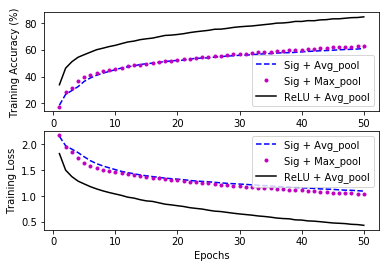

In [12]:
fig = plt.figure()
plt.subplot(211)
plt.plot(range(start_epoch,num_epochs+1), acc_log1, '--b', label='Sig + Avg_pool')
plt.plot(range(start_epoch,num_epochs+1), acc_log2, '.m', label='Sig + Max_pool')
plt.plot(range(start_epoch,num_epochs+1), acc_log3, 'k', label='ReLU + Avg_pool')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy (%)')
legend = plt.legend()

plt.subplot(212)
plt.plot(range(start_epoch,num_epochs+1), loss_log1, '--b', label='Sig + Avg_pool')
plt.plot(range(start_epoch,num_epochs+1), loss_log2, '.m', label='Sig + Max_pool')
plt.plot(range(start_epoch,num_epochs+1), loss_log3, 'k', label='ReLU + Avg_pool')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
legend = plt.legend()

<font color=blue>**Which network converges faster? and why in you opinion?**</font>

## Data Augmentation

Check torchvision.transforms documentation to see how to perform RandomCrop (to size of 32 x 32 nad padding of 4 pixels) and Random horizontal flip on the input. 
http://pytorch.org/docs/master/torchvision/transforms.html

Add these two transformations instead of the brackets [ ] below

In [16]:
# Image transformations to apply to all images in the dataset (Data Augmentation)
transform_train = transforms.Compose([
    transforms.RandomCrop(size = (32,32), padding=4), # Crop all the images randomly to a fixed size
    transforms.RandomHorizontalFlip(),    # Randomly flip some of the images horizontaly
    transforms.ToTensor(),                # Convert images to Tensors (The data structure that is used by Pytorch)
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)), # Normalize the images to zero mean
])

# Specify the path to the CIFAR-10 dataset and create a dataloader where you specify the "batch_size"
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=256, shuffle=True, num_workers=2)

Files already downloaded and verified


Don't forget to replace the brackets [ ] with the relu activation

In [17]:
# Load and initialize the network architecture 
model4 = LeNet(activation=F.relu, pooling=F.avg_pool2d, pretrained=False)

if use_cuda:
    model4.cuda()

optimizer = optim.Adam(model4.parameters()) 


model4, loss_log4, acc_log4 = train(model4, trainloader, optimizer, objective, use_cuda, start_epoch, num_epochs=50)


Epoch: 1
Loss: 2.30367541 | Acc: 10.55% (27/256)
Loss: 2.30286348 | Acc: 10.16% (52/512)
Loss: 2.30175447 | Acc: 11.20% (86/768)
Loss: 2.30037349 | Acc: 12.21% (125/1024)
Loss: 2.29955273 | Acc: 12.73% (163/1280)
Loss: 2.29912802 | Acc: 12.70% (195/1536)
Loss: 2.29873674 | Acc: 12.67% (227/1792)
Loss: 2.29697344 | Acc: 13.04% (267/2048)
Loss: 2.29609222 | Acc: 13.15% (303/2304)
Loss: 2.29368138 | Acc: 13.52% (346/2560)
Loss: 2.29147564 | Acc: 13.81% (389/2816)
Loss: 2.28921082 | Acc: 14.39% (442/3072)
Loss: 2.28766937 | Acc: 14.39% (479/3328)
Loss: 2.28604545 | Acc: 14.48% (519/3584)
Loss: 2.28261960 | Acc: 14.69% (564/3840)
Loss: 2.27932513 | Acc: 14.84% (608/4096)
Loss: 2.27708396 | Acc: 14.98% (652/4352)
Loss: 2.27322002 | Acc: 15.39% (709/4608)
Loss: 2.27091284 | Acc: 15.73% (765/4864)
Loss: 2.26845323 | Acc: 15.92% (815/5120)
Loss: 2.26694218 | Acc: 16.02% (861/5376)
Loss: 2.26377976 | Acc: 16.09% (906/5632)
Loss: 2.26095224 | Acc: 16.22% (955/5888)
Loss: 2.25647713 | Acc: 16.46%

Loss: 1.92798709 | Acc: 29.59% (14316/48384)
Loss: 1.92663096 | Acc: 29.62% (14409/48640)
Loss: 1.92602972 | Acc: 29.64% (14495/48896)
Loss: 1.92504734 | Acc: 29.68% (14587/49152)
Loss: 1.92369873 | Acc: 29.71% (14680/49408)
Loss: 1.92222546 | Acc: 29.78% (14791/49664)
Loss: 1.92173864 | Acc: 29.80% (14878/49920)
Loss: 1.92109759 | Acc: 29.81% (14907/50000)

Epoch: 2
Loss: 1.74271381 | Acc: 37.50% (96/256)
Loss: 1.72052175 | Acc: 37.70% (193/512)
Loss: 1.70478638 | Acc: 37.76% (290/768)
Loss: 1.72092909 | Acc: 37.70% (386/1024)
Loss: 1.72068868 | Acc: 37.66% (482/1280)
Loss: 1.71779913 | Acc: 38.48% (591/1536)
Loss: 1.71943179 | Acc: 38.28% (686/1792)
Loss: 1.71465272 | Acc: 38.57% (790/2048)
Loss: 1.71438479 | Acc: 38.37% (884/2304)
Loss: 1.71070216 | Acc: 38.32% (981/2560)
Loss: 1.71743538 | Acc: 38.03% (1071/2816)
Loss: 1.71450190 | Acc: 38.22% (1174/3072)
Loss: 1.70977625 | Acc: 38.07% (1267/3328)
Loss: 1.70743506 | Acc: 38.06% (1364/3584)
Loss: 1.70581192 | Acc: 38.23% (1468/3840)

Loss: 1.64973515 | Acc: 39.93% (18604/46592)
Loss: 1.64996814 | Acc: 39.91% (18699/46848)
Loss: 1.64951786 | Acc: 39.95% (18820/47104)
Loss: 1.64915849 | Acc: 39.97% (18932/47360)
Loss: 1.64909699 | Acc: 39.99% (19040/47616)
Loss: 1.64892001 | Acc: 40.00% (19150/47872)
Loss: 1.64869001 | Acc: 40.01% (19254/48128)
Loss: 1.64822018 | Acc: 40.03% (19366/48384)
Loss: 1.64762948 | Acc: 40.06% (19486/48640)
Loss: 1.64743456 | Acc: 40.05% (19584/48896)
Loss: 1.64719037 | Acc: 40.07% (19693/49152)
Loss: 1.64698166 | Acc: 40.08% (19805/49408)
Loss: 1.64741274 | Acc: 40.06% (19895/49664)
Loss: 1.64674632 | Acc: 40.10% (20018/49920)
Loss: 1.64636596 | Acc: 40.09% (20047/50000)

Epoch: 3
Loss: 1.57696319 | Acc: 42.19% (108/256)
Loss: 1.52706587 | Acc: 44.34% (227/512)
Loss: 1.55090872 | Acc: 43.62% (335/768)
Loss: 1.55820048 | Acc: 43.65% (447/1024)
Loss: 1.55171914 | Acc: 43.75% (560/1280)
Loss: 1.55920305 | Acc: 43.75% (672/1536)
Loss: 1.56276958 | Acc: 43.92% (787/1792)
Loss: 1.56001739 | Acc: 

Loss: 1.55353079 | Acc: 43.27% (19053/44032)
Loss: 1.55386765 | Acc: 43.27% (19165/44288)
Loss: 1.55363878 | Acc: 43.26% (19269/44544)
Loss: 1.55362434 | Acc: 43.26% (19379/44800)
Loss: 1.55379931 | Acc: 43.27% (19494/45056)
Loss: 1.55373296 | Acc: 43.26% (19604/45312)
Loss: 1.55316108 | Acc: 43.30% (19733/45568)
Loss: 1.55309204 | Acc: 43.30% (19841/45824)
Loss: 1.55372310 | Acc: 43.31% (19955/46080)
Loss: 1.55431297 | Acc: 43.28% (20053/46336)
Loss: 1.55392658 | Acc: 43.31% (20179/46592)
Loss: 1.55406791 | Acc: 43.30% (20283/46848)
Loss: 1.55412698 | Acc: 43.28% (20387/47104)
Loss: 1.55354661 | Acc: 43.31% (20511/47360)
Loss: 1.55328693 | Acc: 43.32% (20625/47616)
Loss: 1.55312634 | Acc: 43.31% (20733/47872)
Loss: 1.55307021 | Acc: 43.31% (20845/48128)
Loss: 1.55303998 | Acc: 43.31% (20956/48384)
Loss: 1.55341310 | Acc: 43.31% (21066/48640)
Loss: 1.55320927 | Acc: 43.33% (21185/48896)
Loss: 1.55319695 | Acc: 43.34% (21301/49152)
Loss: 1.55348327 | Acc: 43.31% (21397/49408)
Loss: 1.55

Loss: 1.51538254 | Acc: 45.05% (19030/42240)
Loss: 1.51522831 | Acc: 45.06% (19148/42496)
Loss: 1.51507377 | Acc: 45.08% (19272/42752)
Loss: 1.51413017 | Acc: 45.12% (19404/43008)
Loss: 1.51471943 | Acc: 45.09% (19509/43264)
Loss: 1.51456344 | Acc: 45.10% (19627/43520)
Loss: 1.51461684 | Acc: 45.12% (19750/43776)
Loss: 1.51500048 | Acc: 45.11% (19864/44032)
Loss: 1.51519148 | Acc: 45.10% (19974/44288)
Loss: 1.51541747 | Acc: 45.09% (20087/44544)
Loss: 1.51560397 | Acc: 45.07% (20192/44800)
Loss: 1.51559782 | Acc: 45.08% (20313/45056)
Loss: 1.51597828 | Acc: 45.10% (20437/45312)
Loss: 1.51529135 | Acc: 45.12% (20562/45568)
Loss: 1.51553519 | Acc: 45.10% (20667/45824)
Loss: 1.51560500 | Acc: 45.08% (20774/46080)
Loss: 1.51530874 | Acc: 45.08% (20888/46336)
Loss: 1.51589342 | Acc: 45.05% (20991/46592)
Loss: 1.51583484 | Acc: 45.06% (21108/46848)
Loss: 1.51510975 | Acc: 45.06% (21227/47104)
Loss: 1.51452470 | Acc: 45.07% (21344/47360)
Loss: 1.51482268 | Acc: 45.05% (21450/47616)
Loss: 1.51

Loss: 1.46391161 | Acc: 47.16% (18956/40192)
Loss: 1.46363286 | Acc: 47.17% (19081/40448)
Loss: 1.46353462 | Acc: 47.18% (19205/40704)
Loss: 1.46337989 | Acc: 47.16% (19318/40960)
Loss: 1.46280680 | Acc: 47.18% (19446/41216)
Loss: 1.46277335 | Acc: 47.18% (19566/41472)
Loss: 1.46251035 | Acc: 47.20% (19697/41728)
Loss: 1.46238291 | Acc: 47.18% (19806/41984)
Loss: 1.46209296 | Acc: 47.18% (19927/42240)
Loss: 1.46232599 | Acc: 47.18% (20048/42496)
Loss: 1.46186366 | Acc: 47.22% (20186/42752)
Loss: 1.46185277 | Acc: 47.20% (20301/43008)
Loss: 1.46191012 | Acc: 47.18% (20414/43264)
Loss: 1.46169403 | Acc: 47.23% (20554/43520)
Loss: 1.46130385 | Acc: 47.25% (20683/43776)
Loss: 1.46087392 | Acc: 47.25% (20807/44032)
Loss: 1.46091929 | Acc: 47.26% (20931/44288)
Loss: 1.46019536 | Acc: 47.29% (21064/44544)
Loss: 1.46044611 | Acc: 47.25% (21167/44800)
Loss: 1.46007976 | Acc: 47.26% (21292/45056)
Loss: 1.46076730 | Acc: 47.24% (21407/45312)
Loss: 1.46098953 | Acc: 47.24% (21525/45568)
Loss: 1.46

Loss: 1.43089897 | Acc: 48.39% (18087/37376)
Loss: 1.43025958 | Acc: 48.42% (18220/37632)
Loss: 1.42920676 | Acc: 48.45% (18356/37888)
Loss: 1.42955942 | Acc: 48.42% (18470/38144)
Loss: 1.42951413 | Acc: 48.43% (18597/38400)
Loss: 1.43001271 | Acc: 48.41% (18715/38656)
Loss: 1.42974629 | Acc: 48.42% (18842/38912)
Loss: 1.42974276 | Acc: 48.40% (18959/39168)
Loss: 1.42966744 | Acc: 48.43% (19093/39424)
Loss: 1.43009909 | Acc: 48.42% (19215/39680)
Loss: 1.42915957 | Acc: 48.47% (19357/39936)
Loss: 1.42867908 | Acc: 48.48% (19487/40192)
Loss: 1.42842019 | Acc: 48.51% (19620/40448)
Loss: 1.42855383 | Acc: 48.51% (19744/40704)
Loss: 1.42878103 | Acc: 48.51% (19868/40960)
Loss: 1.42787702 | Acc: 48.53% (20002/41216)
Loss: 1.42813381 | Acc: 48.51% (20117/41472)
Loss: 1.42800502 | Acc: 48.51% (20243/41728)
Loss: 1.42749383 | Acc: 48.53% (20373/41984)
Loss: 1.42803492 | Acc: 48.51% (20491/42240)
Loss: 1.42774898 | Acc: 48.51% (20615/42496)
Loss: 1.42794329 | Acc: 48.51% (20740/42752)
Loss: 1.42

Loss: 1.41170882 | Acc: 49.22% (17012/34560)
Loss: 1.41142513 | Acc: 49.24% (17142/34816)
Loss: 1.41195302 | Acc: 49.20% (17256/35072)
Loss: 1.41199455 | Acc: 49.22% (17387/35328)
Loss: 1.41156880 | Acc: 49.24% (17523/35584)
Loss: 1.41113682 | Acc: 49.25% (17650/35840)
Loss: 1.41086751 | Acc: 49.24% (17775/36096)
Loss: 1.41103780 | Acc: 49.27% (17910/36352)
Loss: 1.41128188 | Acc: 49.27% (18036/36608)
Loss: 1.41125486 | Acc: 49.25% (18157/36864)
Loss: 1.41127087 | Acc: 49.27% (18290/37120)
Loss: 1.41057260 | Acc: 49.29% (18423/37376)
Loss: 1.40965646 | Acc: 49.33% (18562/37632)
Loss: 1.40938061 | Acc: 49.32% (18688/37888)
Loss: 1.40972447 | Acc: 49.32% (18813/38144)
Loss: 1.40932045 | Acc: 49.34% (18947/38400)
Loss: 1.40895891 | Acc: 49.36% (19079/38656)
Loss: 1.40896082 | Acc: 49.34% (19200/38912)
Loss: 1.40851060 | Acc: 49.34% (19327/39168)
Loss: 1.40827446 | Acc: 49.38% (19469/39424)
Loss: 1.40752490 | Acc: 49.43% (19613/39680)
Loss: 1.40736134 | Acc: 49.46% (19752/39936)
Loss: 1.40

Loss: 1.37982907 | Acc: 50.33% (16234/32256)
Loss: 1.38052310 | Acc: 50.30% (16354/32512)
Loss: 1.38035119 | Acc: 50.29% (16479/32768)
Loss: 1.38065240 | Acc: 50.29% (16608/33024)
Loss: 1.38024584 | Acc: 50.31% (16743/33280)
Loss: 1.38001558 | Acc: 50.31% (16872/33536)
Loss: 1.38068214 | Acc: 50.28% (16989/33792)
Loss: 1.38126509 | Acc: 50.27% (17115/34048)
Loss: 1.38071514 | Acc: 50.28% (17247/34304)
Loss: 1.38078172 | Acc: 50.28% (17378/34560)
Loss: 1.38128994 | Acc: 50.25% (17495/34816)
Loss: 1.38030733 | Acc: 50.27% (17632/35072)
Loss: 1.38016927 | Acc: 50.27% (17760/35328)
Loss: 1.38030255 | Acc: 50.25% (17882/35584)
Loss: 1.38068006 | Acc: 50.23% (18001/35840)
Loss: 1.38105914 | Acc: 50.20% (18120/36096)
Loss: 1.38142347 | Acc: 50.19% (18245/36352)
Loss: 1.38129266 | Acc: 50.20% (18379/36608)
Loss: 1.38203440 | Acc: 50.19% (18503/36864)
Loss: 1.38191197 | Acc: 50.20% (18634/37120)
Loss: 1.38219755 | Acc: 50.20% (18763/37376)
Loss: 1.38180134 | Acc: 50.23% (18901/37632)
Loss: 1.38

Loss: 1.36226429 | Acc: 50.84% (15487/30464)
Loss: 1.36239053 | Acc: 50.81% (15610/30720)
Loss: 1.36256078 | Acc: 50.80% (15735/30976)
Loss: 1.36279191 | Acc: 50.80% (15865/31232)
Loss: 1.36236163 | Acc: 50.82% (16003/31488)
Loss: 1.36233693 | Acc: 50.82% (16131/31744)
Loss: 1.36234985 | Acc: 50.81% (16259/32000)
Loss: 1.36160355 | Acc: 50.84% (16398/32256)
Loss: 1.36199519 | Acc: 50.85% (16532/32512)
Loss: 1.36188080 | Acc: 50.86% (16665/32768)
Loss: 1.36152536 | Acc: 50.86% (16796/33024)
Loss: 1.36079996 | Acc: 50.88% (16933/33280)
Loss: 1.36054129 | Acc: 50.90% (17071/33536)
Loss: 1.36003774 | Acc: 50.95% (17218/33792)
Loss: 1.35925058 | Acc: 50.97% (17353/34048)
Loss: 1.35918365 | Acc: 50.99% (17490/34304)
Loss: 1.35858726 | Acc: 51.01% (17629/34560)
Loss: 1.35903582 | Acc: 50.98% (17750/34816)
Loss: 1.35946499 | Acc: 50.98% (17879/35072)
Loss: 1.35995422 | Acc: 50.97% (18008/35328)
Loss: 1.35933141 | Acc: 50.98% (18142/35584)
Loss: 1.35866646 | Acc: 51.03% (18289/35840)
Loss: 1.35

Loss: 1.34322550 | Acc: 51.88% (14875/28672)
Loss: 1.34269536 | Acc: 51.89% (15010/28928)
Loss: 1.34398018 | Acc: 51.82% (15123/29184)
Loss: 1.34364140 | Acc: 51.81% (15254/29440)
Loss: 1.34424113 | Acc: 51.80% (15382/29696)
Loss: 1.34389493 | Acc: 51.78% (15510/29952)
Loss: 1.34402166 | Acc: 51.81% (15650/30208)
Loss: 1.34357284 | Acc: 51.81% (15783/30464)
Loss: 1.34355474 | Acc: 51.80% (15913/30720)
Loss: 1.34320843 | Acc: 51.79% (16042/30976)
Loss: 1.34373791 | Acc: 51.80% (16178/31232)
Loss: 1.34431009 | Acc: 51.78% (16306/31488)
Loss: 1.34408535 | Acc: 51.78% (16436/31744)
Loss: 1.34387420 | Acc: 51.79% (16574/32000)
Loss: 1.34439257 | Acc: 51.78% (16703/32256)
Loss: 1.34385276 | Acc: 51.80% (16840/32512)
Loss: 1.34487281 | Acc: 51.75% (16959/32768)
Loss: 1.34526670 | Acc: 51.71% (17077/33024)
Loss: 1.34542460 | Acc: 51.71% (17210/33280)
Loss: 1.34498050 | Acc: 51.74% (17350/33536)
Loss: 1.34414951 | Acc: 51.78% (17498/33792)
Loss: 1.34403468 | Acc: 51.79% (17632/34048)
Loss: 1.34

Loss: 1.33687725 | Acc: 51.98% (13706/26368)
Loss: 1.33589596 | Acc: 52.02% (13849/26624)
Loss: 1.33556027 | Acc: 52.02% (13984/26880)
Loss: 1.33628581 | Acc: 52.00% (14110/27136)
Loss: 1.33662806 | Acc: 51.98% (14238/27392)
Loss: 1.33645406 | Acc: 52.01% (14380/27648)
Loss: 1.33568076 | Acc: 52.02% (14515/27904)
Loss: 1.33598285 | Acc: 52.02% (14650/28160)
Loss: 1.33598001 | Acc: 52.04% (14787/28416)
Loss: 1.33569300 | Acc: 52.04% (14922/28672)
Loss: 1.33563288 | Acc: 52.05% (15056/28928)
Loss: 1.33560502 | Acc: 52.02% (15181/29184)
Loss: 1.33545722 | Acc: 52.00% (15310/29440)
Loss: 1.33413897 | Acc: 52.05% (15456/29696)
Loss: 1.33242166 | Acc: 52.14% (15616/29952)
Loss: 1.33266883 | Acc: 52.15% (15752/30208)
Loss: 1.33302545 | Acc: 52.15% (15887/30464)
Loss: 1.33300805 | Acc: 52.16% (16024/30720)
Loss: 1.33233052 | Acc: 52.18% (16163/30976)
Loss: 1.33234999 | Acc: 52.17% (16293/31232)
Loss: 1.33240211 | Acc: 52.17% (16426/31488)
Loss: 1.33149381 | Acc: 52.19% (16566/31744)
Loss: 1.33

Loss: 1.31370943 | Acc: 52.83% (12578/23808)
Loss: 1.31292680 | Acc: 52.90% (12730/24064)
Loss: 1.31344973 | Acc: 52.87% (12858/24320)
Loss: 1.31436006 | Acc: 52.86% (12991/24576)
Loss: 1.31483264 | Acc: 52.88% (13130/24832)
Loss: 1.31373670 | Acc: 52.93% (13279/25088)
Loss: 1.31316597 | Acc: 52.93% (13415/25344)
Loss: 1.31247563 | Acc: 52.96% (13557/25600)
Loss: 1.31188907 | Acc: 53.00% (13703/25856)
Loss: 1.31170075 | Acc: 52.99% (13836/26112)
Loss: 1.31124353 | Acc: 52.97% (13967/26368)
Loss: 1.31120397 | Acc: 52.98% (14106/26624)
Loss: 1.31055125 | Acc: 52.99% (14245/26880)
Loss: 1.30988744 | Acc: 53.03% (14390/27136)
Loss: 1.31001133 | Acc: 53.06% (14533/27392)
Loss: 1.31093697 | Acc: 53.00% (14654/27648)
Loss: 1.31084067 | Acc: 53.00% (14788/27904)
Loss: 1.30949208 | Acc: 53.00% (14925/28160)
Loss: 1.30858325 | Acc: 53.02% (15067/28416)
Loss: 1.30821210 | Acc: 53.01% (15198/28672)
Loss: 1.30863195 | Acc: 53.00% (15332/28928)
Loss: 1.30898486 | Acc: 52.97% (15458/29184)
Loss: 1.30

Loss: 1.29569360 | Acc: 53.27% (12137/22784)
Loss: 1.29511620 | Acc: 53.29% (12277/23040)
Loss: 1.29489720 | Acc: 53.32% (12421/23296)
Loss: 1.29453402 | Acc: 53.33% (12561/23552)
Loss: 1.29471478 | Acc: 53.31% (12692/23808)
Loss: 1.29462603 | Acc: 53.29% (12824/24064)
Loss: 1.29522950 | Acc: 53.26% (12952/24320)
Loss: 1.29434373 | Acc: 53.27% (13091/24576)
Loss: 1.29450074 | Acc: 53.25% (13222/24832)
Loss: 1.29456297 | Acc: 53.22% (13352/25088)
Loss: 1.29507251 | Acc: 53.24% (13493/25344)
Loss: 1.29431056 | Acc: 53.26% (13634/25600)
Loss: 1.29459819 | Acc: 53.30% (13780/25856)
Loss: 1.29550898 | Acc: 53.24% (13903/26112)
Loss: 1.29512674 | Acc: 53.30% (14053/26368)
Loss: 1.29474193 | Acc: 53.34% (14202/26624)
Loss: 1.29425843 | Acc: 53.37% (14346/26880)
Loss: 1.29378477 | Acc: 53.39% (14488/27136)
Loss: 1.29282914 | Acc: 53.39% (14624/27392)
Loss: 1.29254030 | Acc: 53.42% (14769/27648)
Loss: 1.29282472 | Acc: 53.41% (14904/27904)
Loss: 1.29307667 | Acc: 53.39% (15034/28160)
Loss: 1.29

Loss: 1.27996271 | Acc: 54.05% (11207/20736)
Loss: 1.28034373 | Acc: 54.02% (11340/20992)
Loss: 1.28067030 | Acc: 54.00% (11474/21248)
Loss: 1.28039711 | Acc: 54.01% (11615/21504)
Loss: 1.28030443 | Acc: 54.04% (11759/21760)
Loss: 1.28059401 | Acc: 54.07% (11903/22016)
Loss: 1.27968572 | Acc: 54.09% (12047/22272)
Loss: 1.27949770 | Acc: 54.09% (12186/22528)
Loss: 1.27857392 | Acc: 54.10% (12326/22784)
Loss: 1.27773864 | Acc: 54.13% (12472/23040)
Loss: 1.27734178 | Acc: 54.14% (12613/23296)
Loss: 1.27736180 | Acc: 54.14% (12751/23552)
Loss: 1.27667181 | Acc: 54.18% (12900/23808)
Loss: 1.27572794 | Acc: 54.21% (13044/24064)
Loss: 1.27587226 | Acc: 54.22% (13186/24320)
Loss: 1.27614230 | Acc: 54.22% (13325/24576)
Loss: 1.27581466 | Acc: 54.22% (13465/24832)
Loss: 1.27674164 | Acc: 54.18% (13593/25088)
Loss: 1.27740284 | Acc: 54.17% (13729/25344)
Loss: 1.27763687 | Acc: 54.17% (13868/25600)
Loss: 1.27824110 | Acc: 54.15% (14000/25856)
Loss: 1.27862799 | Acc: 54.14% (14138/26112)
Loss: 1.27

Loss: 1.27910311 | Acc: 54.27% (10142/18688)
Loss: 1.27748379 | Acc: 54.30% (10286/18944)
Loss: 1.27744131 | Acc: 54.30% (10425/19200)
Loss: 1.27632274 | Acc: 54.36% (10576/19456)
Loss: 1.27572385 | Acc: 54.37% (10718/19712)
Loss: 1.27485907 | Acc: 54.40% (10862/19968)
Loss: 1.27641969 | Acc: 54.32% (10986/20224)
Loss: 1.27434654 | Acc: 54.43% (11147/20480)
Loss: 1.27603726 | Acc: 54.37% (11275/20736)
Loss: 1.27478706 | Acc: 54.39% (11417/20992)
Loss: 1.27318571 | Acc: 54.37% (11553/21248)
Loss: 1.27406602 | Acc: 54.31% (11678/21504)
Loss: 1.27455312 | Acc: 54.27% (11810/21760)
Loss: 1.27404992 | Acc: 54.31% (11957/22016)
Loss: 1.27275533 | Acc: 54.33% (12100/22272)
Loss: 1.27159162 | Acc: 54.35% (12244/22528)
Loss: 1.27171175 | Acc: 54.36% (12386/22784)
Loss: 1.27169624 | Acc: 54.37% (12526/23040)
Loss: 1.27201400 | Acc: 54.34% (12660/23296)
Loss: 1.27260141 | Acc: 54.34% (12797/23552)
Loss: 1.27170174 | Acc: 54.35% (12940/23808)
Loss: 1.27115663 | Acc: 54.34% (13077/24064)
Loss: 1.27

Loss: 1.26629168 | Acc: 54.56% (9078/16640)
Loss: 1.26602431 | Acc: 54.52% (9212/16896)
Loss: 1.26722176 | Acc: 54.47% (9342/17152)
Loss: 1.26702330 | Acc: 54.44% (9477/17408)
Loss: 1.26605346 | Acc: 54.50% (9626/17664)
Loss: 1.26614223 | Acc: 54.48% (9763/17920)
Loss: 1.26498783 | Acc: 54.51% (9907/18176)
Loss: 1.26573023 | Acc: 54.52% (10050/18432)
Loss: 1.26474864 | Acc: 54.56% (10196/18688)
Loss: 1.26431086 | Acc: 54.56% (10336/18944)
Loss: 1.26272520 | Acc: 54.61% (10485/19200)
Loss: 1.26312491 | Acc: 54.62% (10627/19456)
Loss: 1.26257304 | Acc: 54.61% (10765/19712)
Loss: 1.26240004 | Acc: 54.62% (10906/19968)
Loss: 1.26135139 | Acc: 54.69% (11060/20224)
Loss: 1.26106459 | Acc: 54.73% (11209/20480)
Loss: 1.26040505 | Acc: 54.76% (11355/20736)
Loss: 1.26149024 | Acc: 54.73% (11489/20992)
Loss: 1.26364769 | Acc: 54.70% (11623/21248)
Loss: 1.26373458 | Acc: 54.65% (11752/21504)
Loss: 1.26464238 | Acc: 54.59% (11878/21760)
Loss: 1.26304795 | Acc: 54.62% (12026/22016)
Loss: 1.26215137 

Loss: 1.24343515 | Acc: 55.85% (8149/14592)
Loss: 1.24333698 | Acc: 55.81% (8287/14848)
Loss: 1.24249589 | Acc: 55.88% (8440/15104)
Loss: 1.24098601 | Acc: 55.96% (8596/15360)
Loss: 1.24053458 | Acc: 55.95% (8737/15616)
Loss: 1.23971295 | Acc: 55.97% (8884/15872)
Loss: 1.24008860 | Acc: 55.96% (9026/16128)
Loss: 1.24238513 | Acc: 55.87% (9153/16384)
Loss: 1.24020906 | Acc: 55.91% (9303/16640)
Loss: 1.23933393 | Acc: 55.96% (9455/16896)
Loss: 1.23787202 | Acc: 56.06% (9616/17152)
Loss: 1.23787059 | Acc: 56.07% (9760/17408)
Loss: 1.23889894 | Acc: 56.01% (9893/17664)
Loss: 1.23904901 | Acc: 56.04% (10042/17920)
Loss: 1.24018357 | Acc: 56.00% (10179/18176)
Loss: 1.23979509 | Acc: 56.03% (10328/18432)
Loss: 1.23889039 | Acc: 56.03% (10471/18688)
Loss: 1.23742785 | Acc: 56.07% (10621/18944)
Loss: 1.23623945 | Acc: 56.09% (10770/19200)
Loss: 1.23563044 | Acc: 56.10% (10915/19456)
Loss: 1.23448016 | Acc: 56.11% (11061/19712)
Loss: 1.23455935 | Acc: 56.11% (11204/19968)
Loss: 1.23503077 | Acc:

Loss: 1.22778118 | Acc: 56.78% (7122/12544)
Loss: 1.22892073 | Acc: 56.76% (7265/12800)
Loss: 1.22901552 | Acc: 56.75% (7409/13056)
Loss: 1.23035398 | Acc: 56.66% (7543/13312)
Loss: 1.23016065 | Acc: 56.66% (7687/13568)
Loss: 1.23121532 | Acc: 56.60% (7825/13824)
Loss: 1.23163212 | Acc: 56.61% (7970/14080)
Loss: 1.23315706 | Acc: 56.56% (8109/14336)
Loss: 1.23251117 | Acc: 56.62% (8262/14592)
Loss: 1.23208752 | Acc: 56.67% (8415/14848)
Loss: 1.23349558 | Acc: 56.57% (8544/15104)
Loss: 1.23187899 | Acc: 56.63% (8699/15360)
Loss: 1.23057596 | Acc: 56.69% (8852/15616)
Loss: 1.22967385 | Acc: 56.68% (8997/15872)
Loss: 1.23155732 | Acc: 56.58% (9126/16128)
Loss: 1.23249922 | Acc: 56.55% (9265/16384)
Loss: 1.23128502 | Acc: 56.57% (9414/16640)
Loss: 1.23022323 | Acc: 56.61% (9565/16896)
Loss: 1.22902330 | Acc: 56.65% (9717/17152)
Loss: 1.22989968 | Acc: 56.58% (9849/17408)
Loss: 1.22946529 | Acc: 56.54% (9988/17664)
Loss: 1.22887012 | Acc: 56.54% (10132/17920)
Loss: 1.22887683 | Acc: 56.56% 

Loss: 1.20469762 | Acc: 57.18% (5709/9984)
Loss: 1.20495459 | Acc: 57.16% (5853/10240)
Loss: 1.20671812 | Acc: 57.07% (5990/10496)
Loss: 1.20525212 | Acc: 57.14% (6144/10752)
Loss: 1.20831265 | Acc: 56.98% (6272/11008)
Loss: 1.20826485 | Acc: 57.00% (6421/11264)
Loss: 1.21039746 | Acc: 56.87% (6551/11520)
Loss: 1.21151828 | Acc: 56.85% (6695/11776)
Loss: 1.21210942 | Acc: 56.81% (6835/12032)
Loss: 1.21234005 | Acc: 56.84% (6984/12288)
Loss: 1.21369942 | Acc: 56.74% (7118/12544)
Loss: 1.21310207 | Acc: 56.73% (7262/12800)
Loss: 1.21254168 | Acc: 56.81% (7417/13056)
Loss: 1.21268694 | Acc: 56.76% (7556/13312)
Loss: 1.21443185 | Acc: 56.71% (7695/13568)
Loss: 1.21608923 | Acc: 56.71% (7839/13824)
Loss: 1.21766956 | Acc: 56.60% (7969/14080)
Loss: 1.22032116 | Acc: 56.52% (8102/14336)
Loss: 1.22090404 | Acc: 56.48% (8241/14592)
Loss: 1.21983407 | Acc: 56.57% (8399/14848)
Loss: 1.21968636 | Acc: 56.59% (8547/15104)
Loss: 1.21823746 | Acc: 56.61% (8696/15360)
Loss: 1.21793354 | Acc: 56.60% (8

Loss: 1.20503876 | Acc: 56.65% (4496/7936)
Loss: 1.20276823 | Acc: 56.95% (4665/8192)
Loss: 1.20422147 | Acc: 56.92% (4809/8448)
Loss: 1.20437238 | Acc: 56.97% (4959/8704)
Loss: 1.20588316 | Acc: 56.86% (5095/8960)
Loss: 1.20409875 | Acc: 56.96% (5249/9216)
Loss: 1.20437690 | Acc: 56.96% (5395/9472)
Loss: 1.20323104 | Acc: 56.93% (5538/9728)
Loss: 1.20401991 | Acc: 56.81% (5672/9984)
Loss: 1.20098552 | Acc: 56.88% (5824/10240)
Loss: 1.19859357 | Acc: 56.99% (5982/10496)
Loss: 1.19831898 | Acc: 57.00% (6129/10752)
Loss: 1.19824531 | Acc: 56.99% (6273/11008)
Loss: 1.19871726 | Acc: 56.95% (6415/11264)
Loss: 1.19964638 | Acc: 56.93% (6558/11520)
Loss: 1.20111115 | Acc: 56.92% (6703/11776)
Loss: 1.20044191 | Acc: 56.96% (6854/12032)
Loss: 1.20150816 | Acc: 57.01% (7005/12288)
Loss: 1.20426412 | Acc: 56.99% (7149/12544)
Loss: 1.20284942 | Acc: 57.11% (7310/12800)
Loss: 1.20179441 | Acc: 57.11% (7456/13056)
Loss: 1.20081059 | Acc: 57.17% (7611/13312)
Loss: 1.20125267 | Acc: 57.19% (7760/1356

Loss: 1.19328885 | Acc: 58.05% (3715/6400)
Loss: 1.18706553 | Acc: 58.19% (3873/6656)
Loss: 1.18636063 | Acc: 58.22% (4024/6912)
Loss: 1.18714819 | Acc: 58.13% (4167/7168)
Loss: 1.18710804 | Acc: 58.15% (4317/7424)
Loss: 1.18901861 | Acc: 58.07% (4460/7680)
Loss: 1.18753551 | Acc: 58.20% (4619/7936)
Loss: 1.18792842 | Acc: 58.15% (4764/8192)
Loss: 1.18653761 | Acc: 58.20% (4917/8448)
Loss: 1.18874402 | Acc: 58.20% (5066/8704)
Loss: 1.19130280 | Acc: 58.09% (5205/8960)
Loss: 1.19055701 | Acc: 58.11% (5355/9216)
Loss: 1.18893744 | Acc: 58.27% (5519/9472)
Loss: 1.18885528 | Acc: 58.29% (5670/9728)
Loss: 1.19061107 | Acc: 58.19% (5810/9984)
Loss: 1.18919249 | Acc: 58.26% (5966/10240)
Loss: 1.19046376 | Acc: 58.24% (6113/10496)
Loss: 1.19308285 | Acc: 58.14% (6251/10752)
Loss: 1.19503298 | Acc: 58.00% (6385/11008)
Loss: 1.19679555 | Acc: 57.90% (6522/11264)
Loss: 1.19656868 | Acc: 57.92% (6672/11520)
Loss: 1.19644278 | Acc: 57.91% (6820/11776)
Loss: 1.19660137 | Acc: 57.95% (6973/12032)
Los

Loss: 1.18094900 | Acc: 57.79% (2515/4352)
Loss: 1.17885031 | Acc: 57.86% (2666/4608)
Loss: 1.18258859 | Acc: 57.79% (2811/4864)
Loss: 1.18113917 | Acc: 57.81% (2960/5120)
Loss: 1.18453320 | Acc: 57.70% (3102/5376)
Loss: 1.18438826 | Acc: 57.65% (3247/5632)
Loss: 1.18271602 | Acc: 57.76% (3401/5888)
Loss: 1.18175530 | Acc: 57.70% (3545/6144)
Loss: 1.17969540 | Acc: 57.83% (3701/6400)
Loss: 1.18210329 | Acc: 57.83% (3849/6656)
Loss: 1.18385546 | Acc: 57.77% (3993/6912)
Loss: 1.18507497 | Acc: 57.73% (4138/7168)
Loss: 1.18645750 | Acc: 57.56% (4273/7424)
Loss: 1.18422302 | Acc: 57.75% (4435/7680)
Loss: 1.18477518 | Acc: 57.67% (4577/7936)
Loss: 1.18281834 | Acc: 57.65% (4723/8192)
Loss: 1.18494201 | Acc: 57.60% (4866/8448)
Loss: 1.18468832 | Acc: 57.63% (5016/8704)
Loss: 1.18529263 | Acc: 57.65% (5165/8960)
Loss: 1.18437699 | Acc: 57.68% (5316/9216)
Loss: 1.18462460 | Acc: 57.63% (5459/9472)
Loss: 1.18545067 | Acc: 57.51% (5595/9728)
Loss: 1.18391331 | Acc: 57.60% (5751/9984)
Loss: 1.184

Loss: 1.14519522 | Acc: 60.59% (1396/2304)
Loss: 1.13560494 | Acc: 60.51% (1549/2560)
Loss: 1.13481070 | Acc: 60.72% (1710/2816)
Loss: 1.14325069 | Acc: 60.51% (1859/3072)
Loss: 1.14973485 | Acc: 60.10% (2000/3328)
Loss: 1.15774198 | Acc: 59.63% (2137/3584)
Loss: 1.15870612 | Acc: 59.92% (2301/3840)
Loss: 1.16211434 | Acc: 59.67% (2444/4096)
Loss: 1.16463445 | Acc: 59.56% (2592/4352)
Loss: 1.16867974 | Acc: 59.24% (2730/4608)
Loss: 1.17603329 | Acc: 59.03% (2871/4864)
Loss: 1.18108222 | Acc: 58.65% (3003/5120)
Loss: 1.18842268 | Acc: 58.41% (3140/5376)
Loss: 1.18534915 | Acc: 58.54% (3297/5632)
Loss: 1.18493899 | Acc: 58.49% (3444/5888)
Loss: 1.18117758 | Acc: 58.46% (3592/6144)
Loss: 1.17766535 | Acc: 58.66% (3754/6400)
Loss: 1.17978038 | Acc: 58.58% (3899/6656)
Loss: 1.17868920 | Acc: 58.65% (4054/6912)
Loss: 1.18108964 | Acc: 58.43% (4188/7168)
Loss: 1.17910675 | Acc: 58.49% (4342/7424)
Loss: 1.17842100 | Acc: 58.48% (4491/7680)
Loss: 1.17935895 | Acc: 58.33% (4629/7936)
Loss: 1.179

Loss: 1.18145259 | Acc: 58.01% (28959/49920)
Loss: 1.18188951 | Acc: 58.00% (29001/50000)

Epoch: 24
Loss: 1.20228410 | Acc: 60.55% (155/256)
Loss: 1.15392458 | Acc: 61.52% (315/512)
Loss: 1.19568344 | Acc: 59.77% (459/768)
Loss: 1.19700009 | Acc: 58.11% (595/1024)
Loss: 1.18854346 | Acc: 58.98% (755/1280)
Loss: 1.17109132 | Acc: 59.90% (920/1536)
Loss: 1.16645525 | Acc: 60.04% (1076/1792)
Loss: 1.17965950 | Acc: 59.42% (1217/2048)
Loss: 1.16598029 | Acc: 59.64% (1374/2304)
Loss: 1.16715797 | Acc: 59.26% (1517/2560)
Loss: 1.17162778 | Acc: 59.06% (1663/2816)
Loss: 1.16554645 | Acc: 59.44% (1826/3072)
Loss: 1.16894658 | Acc: 59.19% (1970/3328)
Loss: 1.17758796 | Acc: 59.01% (2115/3584)
Loss: 1.17971331 | Acc: 58.83% (2259/3840)
Loss: 1.17754284 | Acc: 58.81% (2409/4096)
Loss: 1.17607920 | Acc: 58.78% (2558/4352)
Loss: 1.17176051 | Acc: 58.77% (2708/4608)
Loss: 1.17179185 | Acc: 58.74% (2857/4864)
Loss: 1.17201672 | Acc: 58.69% (3005/5120)
Loss: 1.17710882 | Acc: 58.43% (3141/5376)
Loss:

Loss: 1.17614764 | Acc: 58.09% (27661/47616)
Loss: 1.17676901 | Acc: 58.09% (27810/47872)
Loss: 1.17761405 | Acc: 58.06% (27941/48128)
Loss: 1.17761283 | Acc: 58.05% (28086/48384)
Loss: 1.17741334 | Acc: 58.06% (28241/48640)
Loss: 1.17763887 | Acc: 58.05% (28385/48896)
Loss: 1.17782775 | Acc: 58.05% (28531/49152)
Loss: 1.17787794 | Acc: 58.05% (28681/49408)
Loss: 1.17776814 | Acc: 58.04% (28825/49664)
Loss: 1.17745003 | Acc: 58.05% (28977/49920)
Loss: 1.17744375 | Acc: 58.04% (29020/50000)

Epoch: 25
Loss: 1.17360115 | Acc: 60.94% (156/256)
Loss: 1.14918411 | Acc: 61.91% (317/512)
Loss: 1.19645937 | Acc: 58.98% (453/768)
Loss: 1.17918900 | Acc: 59.08% (605/1024)
Loss: 1.16430736 | Acc: 58.98% (755/1280)
Loss: 1.18079438 | Acc: 58.59% (900/1536)
Loss: 1.18209784 | Acc: 58.65% (1051/1792)
Loss: 1.16958483 | Acc: 58.50% (1198/2048)
Loss: 1.17718176 | Acc: 58.03% (1337/2304)
Loss: 1.18817192 | Acc: 57.62% (1475/2560)
Loss: 1.18248062 | Acc: 57.95% (1632/2816)
Loss: 1.18917149 | Acc: 57.75%

Loss: 1.16319913 | Acc: 58.63% (26267/44800)
Loss: 1.16348470 | Acc: 58.62% (26411/45056)
Loss: 1.16343589 | Acc: 58.61% (26558/45312)
Loss: 1.16375940 | Acc: 58.59% (26699/45568)
Loss: 1.16371139 | Acc: 58.59% (26846/45824)
Loss: 1.16405757 | Acc: 58.59% (26997/46080)
Loss: 1.16495045 | Acc: 58.57% (27138/46336)
Loss: 1.16554657 | Acc: 58.56% (27282/46592)
Loss: 1.16526636 | Acc: 58.56% (27434/46848)
Loss: 1.16494612 | Acc: 58.57% (27588/47104)
Loss: 1.16513028 | Acc: 58.56% (27736/47360)
Loss: 1.16585721 | Acc: 58.53% (27871/47616)
Loss: 1.16588510 | Acc: 58.54% (28024/47872)
Loss: 1.16535806 | Acc: 58.55% (28181/48128)
Loss: 1.16583210 | Acc: 58.53% (28318/48384)
Loss: 1.16590811 | Acc: 58.52% (28464/48640)
Loss: 1.16530461 | Acc: 58.53% (28621/48896)
Loss: 1.16523778 | Acc: 58.52% (28764/49152)
Loss: 1.16473247 | Acc: 58.53% (28918/49408)
Loss: 1.16466633 | Acc: 58.52% (29064/49664)
Loss: 1.16487542 | Acc: 58.51% (29208/49920)
Loss: 1.16491942 | Acc: 58.52% (29259/50000)

Epoch: 26

Loss: 1.15351887 | Acc: 58.94% (25649/43520)
Loss: 1.15421810 | Acc: 58.90% (25784/43776)
Loss: 1.15416852 | Acc: 58.90% (25936/44032)
Loss: 1.15428688 | Acc: 58.88% (26078/44288)
Loss: 1.15445012 | Acc: 58.89% (26233/44544)
Loss: 1.15553336 | Acc: 58.86% (26368/44800)
Loss: 1.15516463 | Acc: 58.86% (26519/45056)
Loss: 1.15557019 | Acc: 58.85% (26664/45312)
Loss: 1.15634582 | Acc: 58.82% (26802/45568)
Loss: 1.15642847 | Acc: 58.83% (26956/45824)
Loss: 1.15666307 | Acc: 58.80% (27096/46080)
Loss: 1.15650983 | Acc: 58.79% (27242/46336)
Loss: 1.15715172 | Acc: 58.80% (27394/46592)
Loss: 1.15740761 | Acc: 58.81% (27550/46848)
Loss: 1.15702188 | Acc: 58.81% (27703/47104)
Loss: 1.15717000 | Acc: 58.80% (27848/47360)
Loss: 1.15731876 | Acc: 58.78% (27991/47616)
Loss: 1.15729673 | Acc: 58.79% (28146/47872)
Loss: 1.15719176 | Acc: 58.81% (28303/48128)
Loss: 1.15773099 | Acc: 58.81% (28453/48384)
Loss: 1.15798624 | Acc: 58.80% (28600/48640)
Loss: 1.15797472 | Acc: 58.81% (28758/48896)
Loss: 1.15

Loss: 1.15452170 | Acc: 59.04% (24334/41216)
Loss: 1.15424380 | Acc: 59.04% (24486/41472)
Loss: 1.15473911 | Acc: 59.02% (24629/41728)
Loss: 1.15563807 | Acc: 59.01% (24774/41984)
Loss: 1.15635447 | Acc: 58.98% (24913/42240)
Loss: 1.15670689 | Acc: 58.96% (25055/42496)
Loss: 1.15641277 | Acc: 58.95% (25204/42752)
Loss: 1.15580204 | Acc: 58.97% (25362/43008)
Loss: 1.15582655 | Acc: 58.98% (25518/43264)
Loss: 1.15556790 | Acc: 58.98% (25666/43520)
Loss: 1.15603536 | Acc: 58.94% (25803/43776)
Loss: 1.15570790 | Acc: 58.95% (25959/44032)
Loss: 1.15655430 | Acc: 58.93% (26100/44288)
Loss: 1.15604629 | Acc: 58.95% (26260/44544)
Loss: 1.15637476 | Acc: 58.97% (26418/44800)
Loss: 1.15555659 | Acc: 58.99% (26578/45056)
Loss: 1.15542185 | Acc: 58.98% (26723/45312)
Loss: 1.15526358 | Acc: 58.97% (26871/45568)
Loss: 1.15490840 | Acc: 59.00% (27035/45824)
Loss: 1.15476318 | Acc: 58.99% (27184/46080)
Loss: 1.15457020 | Acc: 58.98% (27329/46336)
Loss: 1.15452461 | Acc: 58.98% (27479/46592)
Loss: 1.15

Loss: 1.14461655 | Acc: 59.17% (23175/39168)
Loss: 1.14464767 | Acc: 59.18% (23332/39424)
Loss: 1.14444262 | Acc: 59.19% (23487/39680)
Loss: 1.14389259 | Acc: 59.20% (23642/39936)
Loss: 1.14440396 | Acc: 59.16% (23779/40192)
Loss: 1.14416030 | Acc: 59.19% (23943/40448)
Loss: 1.14401552 | Acc: 59.21% (24100/40704)
Loss: 1.14408492 | Acc: 59.21% (24253/40960)
Loss: 1.14369175 | Acc: 59.23% (24414/41216)
Loss: 1.14369242 | Acc: 59.26% (24578/41472)
Loss: 1.14394770 | Acc: 59.27% (24731/41728)
Loss: 1.14433134 | Acc: 59.26% (24881/41984)
Loss: 1.14426016 | Acc: 59.26% (25033/42240)
Loss: 1.14504248 | Acc: 59.24% (25176/42496)
Loss: 1.14476386 | Acc: 59.27% (25338/42752)
Loss: 1.14438713 | Acc: 59.29% (25498/43008)
Loss: 1.14403953 | Acc: 59.29% (25652/43264)
Loss: 1.14450196 | Acc: 59.29% (25802/43520)
Loss: 1.14452825 | Acc: 59.28% (25952/43776)
Loss: 1.14453091 | Acc: 59.30% (26109/44032)
Loss: 1.14426227 | Acc: 59.32% (26272/44288)
Loss: 1.14477636 | Acc: 59.29% (26412/44544)
Loss: 1.14

Loss: 1.13907255 | Acc: 59.47% (22077/37120)
Loss: 1.13822739 | Acc: 59.51% (22243/37376)
Loss: 1.13841414 | Acc: 59.53% (22404/37632)
Loss: 1.13784865 | Acc: 59.57% (22569/37888)
Loss: 1.13764780 | Acc: 59.58% (22726/38144)
Loss: 1.13789632 | Acc: 59.58% (22878/38400)
Loss: 1.13724206 | Acc: 59.58% (23033/38656)
Loss: 1.13779982 | Acc: 59.57% (23181/38912)
Loss: 1.13781486 | Acc: 59.58% (23335/39168)
Loss: 1.13770295 | Acc: 59.58% (23490/39424)
Loss: 1.13818195 | Acc: 59.59% (23645/39680)
Loss: 1.13769155 | Acc: 59.59% (23798/39936)
Loss: 1.13809486 | Acc: 59.59% (23950/40192)
Loss: 1.13853027 | Acc: 59.56% (24092/40448)
Loss: 1.13780697 | Acc: 59.59% (24256/40704)
Loss: 1.13776374 | Acc: 59.57% (24398/40960)
Loss: 1.13771574 | Acc: 59.57% (24552/41216)
Loss: 1.13817738 | Acc: 59.55% (24696/41472)
Loss: 1.13812032 | Acc: 59.57% (24856/41728)
Loss: 1.13814322 | Acc: 59.57% (25011/41984)
Loss: 1.13862005 | Acc: 59.52% (25142/42240)
Loss: 1.13791843 | Acc: 59.55% (25307/42496)
Loss: 1.13

Loss: 1.13512010 | Acc: 59.76% (20959/35072)
Loss: 1.13458118 | Acc: 59.80% (21125/35328)
Loss: 1.13550720 | Acc: 59.77% (21269/35584)
Loss: 1.13646458 | Acc: 59.73% (21406/35840)
Loss: 1.13671620 | Acc: 59.70% (21549/36096)
Loss: 1.13627230 | Acc: 59.74% (21718/36352)
Loss: 1.13674124 | Acc: 59.74% (21869/36608)
Loss: 1.13618171 | Acc: 59.76% (22031/36864)
Loss: 1.13676779 | Acc: 59.74% (22174/37120)
Loss: 1.13757694 | Acc: 59.71% (22316/37376)
Loss: 1.13712849 | Acc: 59.73% (22476/37632)
Loss: 1.13727611 | Acc: 59.72% (22627/37888)
Loss: 1.13658196 | Acc: 59.74% (22788/38144)
Loss: 1.13658513 | Acc: 59.74% (22940/38400)
Loss: 1.13662667 | Acc: 59.72% (23087/38656)
Loss: 1.13601085 | Acc: 59.76% (23253/38912)
Loss: 1.13593372 | Acc: 59.75% (23402/39168)
Loss: 1.13594205 | Acc: 59.75% (23555/39424)
Loss: 1.13581463 | Acc: 59.75% (23710/39680)
Loss: 1.13557067 | Acc: 59.79% (23876/39936)
Loss: 1.13519083 | Acc: 59.81% (24039/40192)
Loss: 1.13511756 | Acc: 59.82% (24198/40448)
Loss: 1.13

Loss: 1.13171731 | Acc: 59.76% (19428/32512)
Loss: 1.13198511 | Acc: 59.78% (19588/32768)
Loss: 1.13153942 | Acc: 59.78% (19743/33024)
Loss: 1.13080894 | Acc: 59.81% (19906/33280)
Loss: 1.13109652 | Acc: 59.81% (20059/33536)
Loss: 1.13029857 | Acc: 59.83% (20218/33792)
Loss: 1.13054916 | Acc: 59.81% (20363/34048)
Loss: 1.13144230 | Acc: 59.77% (20505/34304)
Loss: 1.13204061 | Acc: 59.77% (20655/34560)
Loss: 1.13140818 | Acc: 59.81% (20822/34816)
Loss: 1.13092560 | Acc: 59.82% (20979/35072)
Loss: 1.13022726 | Acc: 59.86% (21148/35328)
Loss: 1.13032513 | Acc: 59.87% (21304/35584)
Loss: 1.13113833 | Acc: 59.84% (21445/35840)
Loss: 1.13152579 | Acc: 59.83% (21596/36096)
Loss: 1.13037972 | Acc: 59.86% (21761/36352)
Loss: 1.12965558 | Acc: 59.89% (21925/36608)
Loss: 1.12993363 | Acc: 59.89% (22079/36864)
Loss: 1.13012638 | Acc: 59.87% (22223/37120)
Loss: 1.12919780 | Acc: 59.88% (22382/37376)
Loss: 1.12925252 | Acc: 59.88% (22535/37632)
Loss: 1.12944454 | Acc: 59.89% (22693/37888)
Loss: 1.12

Loss: 1.12097520 | Acc: 60.20% (17878/29696)
Loss: 1.12022944 | Acc: 60.22% (18037/29952)
Loss: 1.12087211 | Acc: 60.21% (18188/30208)
Loss: 1.12157673 | Acc: 60.18% (18334/30464)
Loss: 1.12230128 | Acc: 60.19% (18490/30720)
Loss: 1.12245377 | Acc: 60.17% (18638/30976)
Loss: 1.12246244 | Acc: 60.19% (18799/31232)
Loss: 1.12210589 | Acc: 60.18% (18951/31488)
Loss: 1.12105724 | Acc: 60.21% (19112/31744)
Loss: 1.12074300 | Acc: 60.20% (19263/32000)
Loss: 1.12085255 | Acc: 60.18% (19411/32256)
Loss: 1.12097578 | Acc: 60.15% (19556/32512)
Loss: 1.12071823 | Acc: 60.13% (19705/32768)
Loss: 1.12058237 | Acc: 60.14% (19860/33024)
Loss: 1.12112713 | Acc: 60.12% (20007/33280)
Loss: 1.12126601 | Acc: 60.12% (20161/33536)
Loss: 1.12115914 | Acc: 60.11% (20314/33792)
Loss: 1.12200393 | Acc: 60.11% (20465/34048)
Loss: 1.12221699 | Acc: 60.08% (20609/34304)
Loss: 1.12240647 | Acc: 60.07% (20761/34560)
Loss: 1.12181988 | Acc: 60.08% (20918/34816)
Loss: 1.12169755 | Acc: 60.09% (21076/35072)
Loss: 1.12

Loss: 1.11214794 | Acc: 60.48% (17185/28416)
Loss: 1.11273628 | Acc: 60.46% (17334/28672)
Loss: 1.11264847 | Acc: 60.44% (17484/28928)
Loss: 1.11097407 | Acc: 60.50% (17656/29184)
Loss: 1.11160636 | Acc: 60.47% (17801/29440)
Loss: 1.11247892 | Acc: 60.43% (17946/29696)
Loss: 1.11155132 | Acc: 60.46% (18108/29952)
Loss: 1.11183567 | Acc: 60.47% (18266/30208)
Loss: 1.11185736 | Acc: 60.45% (18416/30464)
Loss: 1.11230661 | Acc: 60.44% (18567/30720)
Loss: 1.11150710 | Acc: 60.46% (18727/30976)
Loss: 1.11249512 | Acc: 60.44% (18878/31232)
Loss: 1.11236913 | Acc: 60.44% (19032/31488)
Loss: 1.11302332 | Acc: 60.43% (19184/31744)
Loss: 1.11271934 | Acc: 60.45% (19343/32000)
Loss: 1.11279657 | Acc: 60.45% (19498/32256)
Loss: 1.11323212 | Acc: 60.43% (19647/32512)
Loss: 1.11318452 | Acc: 60.45% (19807/32768)
Loss: 1.11253650 | Acc: 60.45% (19964/33024)
Loss: 1.11306884 | Acc: 60.43% (20112/33280)
Loss: 1.11281249 | Acc: 60.44% (20270/33536)
Loss: 1.11301157 | Acc: 60.46% (20429/33792)
Loss: 1.11

Loss: 1.10957419 | Acc: 60.72% (16011/26368)
Loss: 1.10999423 | Acc: 60.73% (16169/26624)
Loss: 1.10938906 | Acc: 60.76% (16331/26880)
Loss: 1.11033053 | Acc: 60.71% (16473/27136)
Loss: 1.11048806 | Acc: 60.69% (16624/27392)
Loss: 1.10993582 | Acc: 60.68% (16778/27648)
Loss: 1.11074804 | Acc: 60.65% (16924/27904)
Loss: 1.11023047 | Acc: 60.66% (17083/28160)
Loss: 1.11051633 | Acc: 60.67% (17241/28416)
Loss: 1.11000912 | Acc: 60.72% (17410/28672)
Loss: 1.11115799 | Acc: 60.66% (17547/28928)
Loss: 1.11105164 | Acc: 60.67% (17707/29184)
Loss: 1.11030970 | Acc: 60.70% (17871/29440)
Loss: 1.11052139 | Acc: 60.71% (18028/29696)
Loss: 1.11114096 | Acc: 60.67% (18173/29952)
Loss: 1.11123206 | Acc: 60.68% (18331/30208)
Loss: 1.11204312 | Acc: 60.67% (18484/30464)
Loss: 1.11255592 | Acc: 60.66% (18634/30720)
Loss: 1.11230641 | Acc: 60.66% (18791/30976)
Loss: 1.11225890 | Acc: 60.68% (18951/31232)
Loss: 1.11290370 | Acc: 60.64% (19095/31488)
Loss: 1.11275916 | Acc: 60.62% (19244/31744)
Loss: 1.11

Loss: 1.09653905 | Acc: 61.33% (14602/23808)
Loss: 1.09597594 | Acc: 61.35% (14764/24064)
Loss: 1.09505376 | Acc: 61.38% (14927/24320)
Loss: 1.09384685 | Acc: 61.44% (15099/24576)
Loss: 1.09401554 | Acc: 61.42% (15252/24832)
Loss: 1.09282968 | Acc: 61.46% (15420/25088)
Loss: 1.09465896 | Acc: 61.43% (15569/25344)
Loss: 1.09536921 | Acc: 61.39% (15716/25600)
Loss: 1.09535695 | Acc: 61.43% (15884/25856)
Loss: 1.09492427 | Acc: 61.47% (16051/26112)
Loss: 1.09520599 | Acc: 61.47% (16209/26368)
Loss: 1.09684116 | Acc: 61.41% (16350/26624)
Loss: 1.09717728 | Acc: 61.39% (16501/26880)
Loss: 1.09753839 | Acc: 61.38% (16655/27136)
Loss: 1.09784644 | Acc: 61.35% (16804/27392)
Loss: 1.09748893 | Acc: 61.38% (16971/27648)
Loss: 1.09711818 | Acc: 61.40% (17134/27904)
Loss: 1.09640800 | Acc: 61.41% (17293/28160)
Loss: 1.09720429 | Acc: 61.35% (17432/28416)
Loss: 1.09782741 | Acc: 61.30% (17577/28672)
Loss: 1.10002073 | Acc: 61.20% (17705/28928)
Loss: 1.09979568 | Acc: 61.20% (17861/29184)
Loss: 1.09

Loss: 1.10386997 | Acc: 61.04% (13594/22272)
Loss: 1.10287829 | Acc: 61.10% (13764/22528)
Loss: 1.10372276 | Acc: 61.07% (13914/22784)
Loss: 1.10303012 | Acc: 61.09% (14075/23040)
Loss: 1.10284270 | Acc: 61.10% (14234/23296)
Loss: 1.10320672 | Acc: 61.09% (14389/23552)
Loss: 1.10178683 | Acc: 61.14% (14557/23808)
Loss: 1.10258016 | Acc: 61.10% (14704/24064)
Loss: 1.10160768 | Acc: 61.14% (14870/24320)
Loss: 1.10265452 | Acc: 61.10% (15015/24576)
Loss: 1.10294309 | Acc: 61.12% (15178/24832)
Loss: 1.10341849 | Acc: 61.12% (15333/25088)
Loss: 1.10311579 | Acc: 61.14% (15496/25344)
Loss: 1.10248693 | Acc: 61.18% (15661/25600)
Loss: 1.10358868 | Acc: 61.13% (15806/25856)
Loss: 1.10371570 | Acc: 61.13% (15962/26112)
Loss: 1.10188606 | Acc: 61.19% (16134/26368)
Loss: 1.10079289 | Acc: 61.23% (16301/26624)
Loss: 1.10080302 | Acc: 61.22% (16457/26880)
Loss: 1.09937399 | Acc: 61.26% (16623/27136)
Loss: 1.09850416 | Acc: 61.27% (16784/27392)
Loss: 1.09906932 | Acc: 61.26% (16937/27648)
Loss: 1.09

Loss: 1.08618412 | Acc: 61.83% (12505/20224)
Loss: 1.08425988 | Acc: 61.89% (12676/20480)
Loss: 1.08327421 | Acc: 61.93% (12842/20736)
Loss: 1.08426227 | Acc: 61.87% (12988/20992)
Loss: 1.08525844 | Acc: 61.85% (13141/21248)
Loss: 1.08499443 | Acc: 61.84% (13298/21504)
Loss: 1.08615972 | Acc: 61.81% (13449/21760)
Loss: 1.08655774 | Acc: 61.78% (13601/22016)
Loss: 1.08699455 | Acc: 61.77% (13757/22272)
Loss: 1.08719429 | Acc: 61.77% (13916/22528)
Loss: 1.08583665 | Acc: 61.79% (14079/22784)
Loss: 1.08660154 | Acc: 61.77% (14232/23040)
Loss: 1.08684857 | Acc: 61.79% (14394/23296)
Loss: 1.08674747 | Acc: 61.79% (14553/23552)
Loss: 1.08686013 | Acc: 61.76% (14705/23808)
Loss: 1.08646298 | Acc: 61.76% (14861/24064)
Loss: 1.08719616 | Acc: 61.76% (15020/24320)
Loss: 1.08599951 | Acc: 61.85% (15200/24576)
Loss: 1.08625794 | Acc: 61.86% (15362/24832)
Loss: 1.08515109 | Acc: 61.90% (15530/25088)
Loss: 1.08512620 | Acc: 61.92% (15692/25344)
Loss: 1.08554408 | Acc: 61.89% (15843/25600)
Loss: 1.08

Loss: 1.07290791 | Acc: 62.25% (11634/18688)
Loss: 1.07261219 | Acc: 62.26% (11794/18944)
Loss: 1.07152074 | Acc: 62.30% (11961/19200)
Loss: 1.07246171 | Acc: 62.27% (12116/19456)
Loss: 1.07290796 | Acc: 62.23% (12266/19712)
Loss: 1.07451450 | Acc: 62.14% (12408/19968)
Loss: 1.07507304 | Acc: 62.17% (12573/20224)
Loss: 1.07524601 | Acc: 62.18% (12735/20480)
Loss: 1.07662496 | Acc: 62.12% (12881/20736)
Loss: 1.07628353 | Acc: 62.14% (13045/20992)
Loss: 1.07649844 | Acc: 62.14% (13203/21248)
Loss: 1.07636693 | Acc: 62.13% (13360/21504)
Loss: 1.07688335 | Acc: 62.10% (13513/21760)
Loss: 1.07794441 | Acc: 62.06% (13664/22016)
Loss: 1.07902628 | Acc: 62.02% (13813/22272)
Loss: 1.07924346 | Acc: 62.03% (13975/22528)
Loss: 1.07925365 | Acc: 62.01% (14129/22784)
Loss: 1.07958921 | Acc: 62.01% (14287/23040)
Loss: 1.07974827 | Acc: 62.02% (14448/23296)
Loss: 1.07955521 | Acc: 62.00% (14603/23552)
Loss: 1.08016495 | Acc: 62.00% (14762/23808)
Loss: 1.07975371 | Acc: 62.03% (14928/24064)
Loss: 1.07

Loss: 1.07818287 | Acc: 61.59% (10249/16640)
Loss: 1.07765395 | Acc: 61.59% (10407/16896)
Loss: 1.07832440 | Acc: 61.54% (10556/17152)
Loss: 1.07863168 | Acc: 61.56% (10716/17408)
Loss: 1.07952620 | Acc: 61.56% (10874/17664)
Loss: 1.08031113 | Acc: 61.54% (11028/17920)
Loss: 1.07978666 | Acc: 61.54% (11186/18176)
Loss: 1.07958903 | Acc: 61.51% (11337/18432)
Loss: 1.07882071 | Acc: 61.57% (11506/18688)
Loss: 1.07870951 | Acc: 61.56% (11662/18944)
Loss: 1.07962404 | Acc: 61.54% (11815/19200)
Loss: 1.07972195 | Acc: 61.50% (11965/19456)
Loss: 1.07954345 | Acc: 61.50% (12122/19712)
Loss: 1.08108822 | Acc: 61.45% (12270/19968)
Loss: 1.08228342 | Acc: 61.44% (12426/20224)
Loss: 1.08363244 | Acc: 61.40% (12575/20480)
Loss: 1.08373693 | Acc: 61.38% (12728/20736)
Loss: 1.08356803 | Acc: 61.39% (12888/20992)
Loss: 1.08249193 | Acc: 61.43% (13053/21248)
Loss: 1.08158815 | Acc: 61.46% (13217/21504)
Loss: 1.08196642 | Acc: 61.42% (13366/21760)
Loss: 1.08112541 | Acc: 61.46% (13530/22016)
Loss: 1.08

Loss: 1.06162507 | Acc: 62.05% (9055/14592)
Loss: 1.06236944 | Acc: 62.06% (9215/14848)
Loss: 1.06240406 | Acc: 62.05% (9372/15104)
Loss: 1.06234174 | Acc: 62.01% (9524/15360)
Loss: 1.06232595 | Acc: 61.97% (9678/15616)
Loss: 1.06150074 | Acc: 62.00% (9841/15872)
Loss: 1.06308374 | Acc: 61.92% (9987/16128)
Loss: 1.06371096 | Acc: 61.94% (10149/16384)
Loss: 1.06257852 | Acc: 61.95% (10309/16640)
Loss: 1.06310239 | Acc: 61.96% (10468/16896)
Loss: 1.06531155 | Acc: 61.88% (10614/17152)
Loss: 1.06477011 | Acc: 61.90% (10775/17408)
Loss: 1.06454392 | Acc: 61.96% (10944/17664)
Loss: 1.06503092 | Acc: 61.96% (11103/17920)
Loss: 1.06630585 | Acc: 61.96% (11261/18176)
Loss: 1.06585486 | Acc: 61.98% (11425/18432)
Loss: 1.06590902 | Acc: 62.01% (11588/18688)
Loss: 1.06677295 | Acc: 61.96% (11737/18944)
Loss: 1.06585386 | Acc: 62.01% (11906/19200)
Loss: 1.06524470 | Acc: 62.06% (12074/19456)
Loss: 1.06515500 | Acc: 62.08% (12238/19712)
Loss: 1.06593500 | Acc: 62.11% (12402/19968)
Loss: 1.06699344 

Loss: 1.06843786 | Acc: 62.00% (7777/12544)
Loss: 1.06763471 | Acc: 62.03% (7940/12800)
Loss: 1.06937120 | Acc: 61.93% (8085/13056)
Loss: 1.07092445 | Acc: 61.88% (8237/13312)
Loss: 1.07030980 | Acc: 61.93% (8402/13568)
Loss: 1.07202402 | Acc: 61.89% (8555/13824)
Loss: 1.07245942 | Acc: 61.83% (8706/14080)
Loss: 1.07018126 | Acc: 61.93% (8878/14336)
Loss: 1.07141121 | Acc: 61.92% (9036/14592)
Loss: 1.07048369 | Acc: 61.99% (9205/14848)
Loss: 1.06883268 | Acc: 62.05% (9372/15104)
Loss: 1.07116172 | Acc: 61.98% (9520/15360)
Loss: 1.07026887 | Acc: 62.01% (9683/15616)
Loss: 1.06947716 | Acc: 62.07% (9851/15872)
Loss: 1.07009465 | Acc: 62.07% (10010/16128)
Loss: 1.07089654 | Acc: 62.03% (10163/16384)
Loss: 1.07239021 | Acc: 62.00% (10316/16640)
Loss: 1.07256404 | Acc: 61.97% (10471/16896)
Loss: 1.07160535 | Acc: 62.03% (10639/17152)
Loss: 1.07096006 | Acc: 62.03% (10799/17408)
Loss: 1.06966354 | Acc: 62.06% (10963/17664)
Loss: 1.06906109 | Acc: 62.05% (11119/17920)
Loss: 1.06957317 | Acc: 

Loss: 1.06432635 | Acc: 61.99% (6189/9984)
Loss: 1.06542367 | Acc: 61.88% (6336/10240)
Loss: 1.06501463 | Acc: 61.90% (6497/10496)
Loss: 1.06492322 | Acc: 61.89% (6654/10752)
Loss: 1.06272157 | Acc: 62.01% (6826/11008)
Loss: 1.06288838 | Acc: 62.02% (6986/11264)
Loss: 1.06259543 | Acc: 62.06% (7149/11520)
Loss: 1.06333731 | Acc: 62.09% (7312/11776)
Loss: 1.06225016 | Acc: 62.12% (7474/12032)
Loss: 1.06329378 | Acc: 62.00% (7619/12288)
Loss: 1.06446500 | Acc: 62.02% (7780/12544)
Loss: 1.06172619 | Acc: 62.16% (7956/12800)
Loss: 1.06172913 | Acc: 62.20% (8121/13056)
Loss: 1.06403160 | Acc: 62.14% (8272/13312)
Loss: 1.06610787 | Acc: 62.01% (8414/13568)
Loss: 1.06676111 | Acc: 62.04% (8577/13824)
Loss: 1.06670468 | Acc: 62.01% (8731/14080)
Loss: 1.06551385 | Acc: 62.05% (8895/14336)
Loss: 1.06538440 | Acc: 62.03% (9051/14592)
Loss: 1.06602575 | Acc: 62.02% (9209/14848)
Loss: 1.06573457 | Acc: 61.94% (9355/15104)
Loss: 1.06654092 | Acc: 61.95% (9515/15360)
Loss: 1.06614569 | Acc: 61.94% (9

Loss: 1.07927704 | Acc: 61.66% (4262/6912)
Loss: 1.07640611 | Acc: 61.73% (4425/7168)
Loss: 1.07913453 | Acc: 61.54% (4569/7424)
Loss: 1.07263531 | Acc: 61.82% (4748/7680)
Loss: 1.07512701 | Acc: 61.86% (4909/7936)
Loss: 1.07075871 | Acc: 61.89% (5070/8192)
Loss: 1.07231796 | Acc: 61.84% (5224/8448)
Loss: 1.07184741 | Acc: 61.91% (5389/8704)
Loss: 1.06685662 | Acc: 62.02% (5557/8960)
Loss: 1.06612231 | Acc: 62.10% (5723/9216)
Loss: 1.06866512 | Acc: 62.06% (5878/9472)
Loss: 1.06580891 | Acc: 62.14% (6045/9728)
Loss: 1.06876677 | Acc: 62.06% (6196/9984)
Loss: 1.06896966 | Acc: 62.04% (6353/10240)
Loss: 1.06875364 | Acc: 62.03% (6511/10496)
Loss: 1.06775808 | Acc: 62.06% (6673/10752)
Loss: 1.06530160 | Acc: 62.15% (6842/11008)
Loss: 1.06646810 | Acc: 62.09% (6994/11264)
Loss: 1.06634312 | Acc: 62.06% (7149/11520)
Loss: 1.06501660 | Acc: 62.10% (7313/11776)
Loss: 1.06366889 | Acc: 62.18% (7482/12032)
Loss: 1.06395439 | Acc: 62.22% (7646/12288)
Loss: 1.06367776 | Acc: 62.24% (7808/12544)
L

Loss: 1.04419498 | Acc: 63.08% (3714/5888)
Loss: 1.04942152 | Acc: 62.94% (3867/6144)
Loss: 1.04918485 | Acc: 62.88% (4024/6400)
Loss: 1.05423711 | Acc: 62.91% (4187/6656)
Loss: 1.05472686 | Acc: 63.04% (4357/6912)
Loss: 1.05477807 | Acc: 62.99% (4515/7168)
Loss: 1.05357902 | Acc: 63.07% (4682/7424)
Loss: 1.05460188 | Acc: 62.99% (4838/7680)
Loss: 1.05333486 | Acc: 63.07% (5005/7936)
Loss: 1.05463173 | Acc: 63.09% (5168/8192)
Loss: 1.05324779 | Acc: 63.08% (5329/8448)
Loss: 1.05249236 | Acc: 63.19% (5500/8704)
Loss: 1.05065736 | Acc: 63.27% (5669/8960)
Loss: 1.05040941 | Acc: 63.21% (5825/9216)
Loss: 1.05391293 | Acc: 63.12% (5979/9472)
Loss: 1.05363746 | Acc: 63.11% (6139/9728)
Loss: 1.05402642 | Acc: 63.03% (6293/9984)
Loss: 1.05425733 | Acc: 63.00% (6451/10240)
Loss: 1.05471470 | Acc: 63.03% (6616/10496)
Loss: 1.05393477 | Acc: 63.12% (6787/10752)
Loss: 1.05244153 | Acc: 63.15% (6952/11008)
Loss: 1.05113646 | Acc: 63.25% (7125/11264)
Loss: 1.05043245 | Acc: 63.32% (7294/11520)
Loss:

Loss: 1.08523212 | Acc: 62.04% (1747/2816)
Loss: 1.08389753 | Acc: 62.11% (1908/3072)
Loss: 1.08306075 | Acc: 62.17% (2069/3328)
Loss: 1.08171043 | Acc: 61.91% (2219/3584)
Loss: 1.08247389 | Acc: 61.82% (2374/3840)
Loss: 1.07736944 | Acc: 62.11% (2544/4096)
Loss: 1.08018874 | Acc: 61.70% (2685/4352)
Loss: 1.07689785 | Acc: 61.83% (2849/4608)
Loss: 1.07478220 | Acc: 61.90% (3011/4864)
Loss: 1.07670832 | Acc: 61.93% (3171/5120)
Loss: 1.07939670 | Acc: 61.77% (3321/5376)
Loss: 1.07428919 | Acc: 62.07% (3496/5632)
Loss: 1.07463292 | Acc: 62.13% (3658/5888)
Loss: 1.07438236 | Acc: 62.21% (3822/6144)
Loss: 1.07221565 | Acc: 62.25% (3984/6400)
Loss: 1.07185504 | Acc: 62.36% (4151/6656)
Loss: 1.07374543 | Acc: 62.30% (4306/6912)
Loss: 1.07113736 | Acc: 62.61% (4488/7168)
Loss: 1.07033628 | Acc: 62.61% (4648/7424)
Loss: 1.07290244 | Acc: 62.50% (4800/7680)
Loss: 1.06993646 | Acc: 62.59% (4967/7936)
Loss: 1.07101373 | Acc: 62.56% (5125/8192)
Loss: 1.06979347 | Acc: 62.67% (5294/8448)
Loss: 1.069


Epoch: 46
Loss: 0.97335249 | Acc: 65.62% (168/256)
Loss: 0.99001220 | Acc: 65.43% (335/512)
Loss: 0.97140521 | Acc: 67.58% (519/768)
Loss: 0.96552138 | Acc: 67.87% (695/1024)
Loss: 0.98259181 | Acc: 66.56% (852/1280)
Loss: 0.99267841 | Acc: 66.08% (1015/1536)
Loss: 0.98362460 | Acc: 66.13% (1185/1792)
Loss: 0.99092823 | Acc: 65.58% (1343/2048)
Loss: 0.99816526 | Acc: 64.97% (1497/2304)
Loss: 0.99470354 | Acc: 65.23% (1670/2560)
Loss: 1.00181391 | Acc: 64.95% (1829/2816)
Loss: 1.00457953 | Acc: 64.91% (1994/3072)
Loss: 1.01497006 | Acc: 64.48% (2146/3328)
Loss: 1.01522475 | Acc: 64.51% (2312/3584)
Loss: 1.01095031 | Acc: 64.56% (2479/3840)
Loss: 1.00813747 | Acc: 64.62% (2647/4096)
Loss: 1.00597254 | Acc: 64.75% (2818/4352)
Loss: 1.01406229 | Acc: 64.56% (2975/4608)
Loss: 1.01645203 | Acc: 64.37% (3131/4864)
Loss: 1.01956560 | Acc: 64.30% (3292/5120)
Loss: 1.01930666 | Acc: 64.25% (3454/5376)
Loss: 1.01599007 | Acc: 64.35% (3624/5632)
Loss: 1.01395292 | Acc: 64.30% (3786/5888)
Loss: 1.

Loss: 1.04505613 | Acc: 63.12% (30539/48384)
Loss: 1.04524905 | Acc: 63.11% (30695/48640)
Loss: 1.04504631 | Acc: 63.11% (30856/48896)
Loss: 1.04480853 | Acc: 63.12% (31023/49152)
Loss: 1.04476004 | Acc: 63.10% (31174/49408)
Loss: 1.04476826 | Acc: 63.11% (31342/49664)
Loss: 1.04467088 | Acc: 63.11% (31506/49920)
Loss: 1.04536821 | Acc: 63.11% (31554/50000)

Epoch: 47
Loss: 0.99524915 | Acc: 63.67% (163/256)
Loss: 0.98940441 | Acc: 65.23% (334/512)
Loss: 1.03490653 | Acc: 63.02% (484/768)
Loss: 1.01412515 | Acc: 64.16% (657/1024)
Loss: 0.99999501 | Acc: 64.45% (825/1280)
Loss: 0.99691192 | Acc: 65.04% (999/1536)
Loss: 1.00760208 | Acc: 64.29% (1152/1792)
Loss: 0.99780633 | Acc: 64.45% (1320/2048)
Loss: 1.00215283 | Acc: 64.24% (1480/2304)
Loss: 0.99576787 | Acc: 64.41% (1649/2560)
Loss: 0.99553186 | Acc: 64.10% (1805/2816)
Loss: 0.98806826 | Acc: 64.58% (1984/3072)
Loss: 0.99064535 | Acc: 64.45% (2145/3328)
Loss: 0.99505895 | Acc: 64.03% (2295/3584)
Loss: 1.00004244 | Acc: 64.04% (2459

Loss: 1.03639753 | Acc: 63.07% (29871/47360)
Loss: 1.03556753 | Acc: 63.12% (30054/47616)
Loss: 1.03489036 | Acc: 63.16% (30237/47872)
Loss: 1.03512091 | Acc: 63.15% (30391/48128)
Loss: 1.03468882 | Acc: 63.16% (30560/48384)
Loss: 1.03460668 | Acc: 63.16% (30721/48640)
Loss: 1.03517799 | Acc: 63.14% (30873/48896)
Loss: 1.03589922 | Acc: 63.12% (31025/49152)
Loss: 1.03637865 | Acc: 63.12% (31188/49408)
Loss: 1.03656329 | Acc: 63.12% (31350/49664)
Loss: 1.03692233 | Acc: 63.10% (31499/49920)
Loss: 1.03770849 | Acc: 63.09% (31544/50000)

Epoch: 48
Loss: 1.06873226 | Acc: 63.28% (162/256)
Loss: 1.05416369 | Acc: 64.84% (332/512)
Loss: 1.04612180 | Acc: 63.80% (490/768)
Loss: 1.04891157 | Acc: 63.28% (648/1024)
Loss: 1.04959586 | Acc: 62.97% (806/1280)
Loss: 1.05772454 | Acc: 62.76% (964/1536)
Loss: 1.06419066 | Acc: 62.33% (1117/1792)
Loss: 1.05985850 | Acc: 62.21% (1274/2048)
Loss: 1.06139040 | Acc: 62.15% (1432/2304)
Loss: 1.05767319 | Acc: 62.03% (1588/2560)
Loss: 1.04723777 | Acc: 62.7

Loss: 1.02841341 | Acc: 63.70% (29027/45568)
Loss: 1.02884053 | Acc: 63.68% (29182/45824)
Loss: 1.02832218 | Acc: 63.70% (29354/46080)
Loss: 1.02772228 | Acc: 63.72% (29527/46336)
Loss: 1.02725634 | Acc: 63.76% (29708/46592)
Loss: 1.02775403 | Acc: 63.75% (29866/46848)
Loss: 1.02803990 | Acc: 63.73% (30021/47104)
Loss: 1.02874198 | Acc: 63.71% (30175/47360)
Loss: 1.02952578 | Acc: 63.68% (30321/47616)
Loss: 1.02973221 | Acc: 63.65% (30472/47872)
Loss: 1.03017273 | Acc: 63.64% (30629/48128)
Loss: 1.02981573 | Acc: 63.66% (30802/48384)
Loss: 1.02954693 | Acc: 63.68% (30974/48640)
Loss: 1.02965685 | Acc: 63.68% (31139/48896)
Loss: 1.03023784 | Acc: 63.66% (31292/49152)
Loss: 1.03034400 | Acc: 63.66% (31455/49408)
Loss: 1.03005283 | Acc: 63.68% (31627/49664)
Loss: 1.03014522 | Acc: 63.69% (31795/49920)
Loss: 1.03138346 | Acc: 63.68% (31838/50000)

Epoch: 49
Loss: 1.06475687 | Acc: 61.72% (158/256)
Loss: 1.03974146 | Acc: 63.28% (324/512)
Loss: 1.02784808 | Acc: 63.15% (485/768)
Loss: 1.028

Loss: 1.02816384 | Acc: 63.55% (27171/42752)
Loss: 1.02765023 | Acc: 63.59% (27350/43008)
Loss: 1.02810110 | Acc: 63.59% (27511/43264)
Loss: 1.02834404 | Acc: 63.58% (27670/43520)
Loss: 1.02821146 | Acc: 63.58% (27834/43776)
Loss: 1.02812911 | Acc: 63.58% (27997/44032)
Loss: 1.02867062 | Acc: 63.57% (28154/44288)
Loss: 1.02821470 | Acc: 63.59% (28327/44544)
Loss: 1.02901912 | Acc: 63.57% (28480/44800)
Loss: 1.02925541 | Acc: 63.56% (28638/45056)
Loss: 1.02872814 | Acc: 63.59% (28813/45312)
Loss: 1.02937978 | Acc: 63.56% (28961/45568)
Loss: 1.02944477 | Acc: 63.54% (29118/45824)
Loss: 1.02999903 | Acc: 63.52% (29271/46080)
Loss: 1.02932978 | Acc: 63.54% (29441/46336)
Loss: 1.02982904 | Acc: 63.53% (29598/46592)
Loss: 1.02986925 | Acc: 63.52% (29759/46848)
Loss: 1.03031005 | Acc: 63.51% (29914/47104)
Loss: 1.03034233 | Acc: 63.53% (30089/47360)
Loss: 1.03003760 | Acc: 63.55% (30261/47616)
Loss: 1.02970563 | Acc: 63.59% (30440/47872)
Loss: 1.03002047 | Acc: 63.55% (30587/48128)
Loss: 1.02

Loss: 1.02132143 | Acc: 64.06% (26075/40704)
Loss: 1.02134236 | Acc: 64.06% (26241/40960)
Loss: 1.02082215 | Acc: 64.06% (26402/41216)
Loss: 1.02016890 | Acc: 64.08% (26577/41472)
Loss: 1.01917409 | Acc: 64.11% (26752/41728)
Loss: 1.01945589 | Acc: 64.08% (26904/41984)
Loss: 1.01884910 | Acc: 64.11% (27082/42240)
Loss: 1.01852787 | Acc: 64.15% (27262/42496)
Loss: 1.01833771 | Acc: 64.16% (27429/42752)
Loss: 1.01811235 | Acc: 64.17% (27598/43008)
Loss: 1.01838120 | Acc: 64.16% (27759/43264)
Loss: 1.01864831 | Acc: 64.15% (27918/43520)
Loss: 1.01909652 | Acc: 64.13% (28072/43776)
Loss: 1.01903538 | Acc: 64.14% (28243/44032)
Loss: 1.01967151 | Acc: 64.11% (28392/44288)
Loss: 1.01968141 | Acc: 64.11% (28556/44544)
Loss: 1.01950099 | Acc: 64.11% (28723/44800)
Loss: 1.01932141 | Acc: 64.12% (28892/45056)
Loss: 1.01934689 | Acc: 64.13% (29057/45312)
Loss: 1.01953400 | Acc: 64.14% (29226/45568)
Loss: 1.01959222 | Acc: 64.15% (29396/45824)
Loss: 1.01991244 | Acc: 64.14% (29557/46080)
Loss: 1.02

In [15]:
test_acc4 = test(model4, testloader, use_cuda)

Accuracy of the network on the 10000 test images: 66 %


<font color=blue>**How does data augmentation affect the training and test accuracies?**</font>

### Test Accuracy Per Class

In [20]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = model4(Variable(images.cuda()))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels.cuda()).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 62 %
Accuracy of   car : 82 %
Accuracy of  bird : 45 %
Accuracy of   cat : 50 %
Accuracy of  deer : 48 %
Accuracy of   dog : 45 %
Accuracy of  frog : 69 %
Accuracy of horse : 60 %
Accuracy of  ship : 84 %
Accuracy of truck : 76 %


<font color=blue>**Which class has the lowest accuracy? How do we improve it?**</font>

### Visualize some test images with groundtruth and network predictions

Run the cell several times to get more predictions 

GroundTruth:    dog   cat plane horse truck   car   cat  deer  deer   dog
Predicted:    cat  frog plane horse truck   car   cat  deer  deer   dog


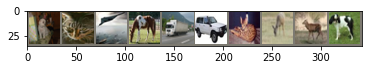

In [28]:
def imshow(inp, mean=None, std=None, title=None):          
    # Check if input is torch, convert it to numpy
    if type(inp) in (torch.cuda.FloatTensor, torch.FloatTensor ):
        if inp.shape[0] == 3 :
            inp = inp.cpu().numpy().transpose((1, 2, 0))
        elif inp.shape[0] == 1 :
            inp = np.squeeze(inp.cpu().numpy(), 0)
        
    if mean is not None and std is not None:
        inp = std * inp + mean
    plt.imshow(inp.clip(0,1))

    if title is not None:
        plt.title(title)

try:
    images, labels = dataiter.next()
except NameError:
    dataiter = iter(testloader)
    images, labels = dataiter.next()

print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(10)))

# print images
plt.figure()
img = torchvision.utils.make_grid(images[0:10], 10)

imshow(img, (0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))

images = Variable(images.cuda())
outputs = model4(images)


_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(10)))

<font color=blue>**Which are the mostly confused classes and why are they confused in your opinion?**</font>

## <font color=Red>Extra Task</font>

Run the last network (with data augmentation) three times and plot the convergence curves for the three runs as we did in the second task.
Are they identical ?

In [33]:
# Load and initialize the network architecture 
model5 = LeNet(activation=F.relu, pooling=F.avg_pool2d, pretrained=False)

if use_cuda:
    model5.cuda()

optimizer = optim.Adam(model5.parameters()) 


model6, loss_log5, acc_log5 = train(model5, trainloader, optimizer, objective, use_cuda, start_epoch, num_epochs=50)
model7, loss_log6, acc_log6 = train(model5, trainloader, optimizer, objective, use_cuda, start_epoch, num_epochs=50)
model8, loss_log7, acc_log7 = train(model5, trainloader, optimizer, objective, use_cuda, start_epoch, num_epochs=50)


Epoch: 1
Loss: 2.31590223 | Acc: 7.03% (18/256)
Loss: 2.30965662 | Acc: 7.23% (37/512)
Loss: 2.30747088 | Acc: 8.85% (68/768)
Loss: 2.30620641 | Acc: 9.96% (102/1024)
Loss: 2.30473695 | Acc: 10.70% (137/1280)
Loss: 2.30338629 | Acc: 10.81% (166/1536)
Loss: 2.30127563 | Acc: 11.83% (212/1792)
Loss: 2.30026132 | Acc: 12.16% (249/2048)
Loss: 2.29687545 | Acc: 12.59% (290/2304)
Loss: 2.29348764 | Acc: 12.81% (328/2560)
Loss: 2.29012910 | Acc: 13.10% (369/2816)
Loss: 2.28676134 | Acc: 13.48% (414/3072)
Loss: 2.28292854 | Acc: 13.97% (465/3328)
Loss: 2.27850846 | Acc: 14.26% (511/3584)
Loss: 2.27365905 | Acc: 14.48% (556/3840)
Loss: 2.26985058 | Acc: 14.70% (602/4096)
Loss: 2.26677822 | Acc: 14.82% (645/4352)
Loss: 2.26148536 | Acc: 15.04% (693/4608)
Loss: 2.25662499 | Acc: 15.38% (748/4864)
Loss: 2.25290006 | Acc: 15.51% (794/5120)
Loss: 2.24695080 | Acc: 15.61% (839/5376)
Loss: 2.24167801 | Acc: 15.80% (890/5632)
Loss: 2.23518481 | Acc: 15.96% (940/5888)
Loss: 2.22946960 | Acc: 16.08% (98

Loss: 1.92614104 | Acc: 28.94% (14300/49408)
Loss: 1.92518396 | Acc: 28.97% (14389/49664)
Loss: 1.92414719 | Acc: 29.02% (14487/49920)
Loss: 1.92327551 | Acc: 29.03% (14514/50000)

Epoch: 2
Loss: 1.68144882 | Acc: 40.62% (104/256)
Loss: 1.66979522 | Acc: 40.82% (209/512)
Loss: 1.72696014 | Acc: 38.28% (294/768)
Loss: 1.72958958 | Acc: 37.11% (380/1024)
Loss: 1.73874500 | Acc: 36.25% (464/1280)
Loss: 1.74387548 | Acc: 35.87% (551/1536)
Loss: 1.75333737 | Acc: 35.94% (644/1792)
Loss: 1.75337763 | Acc: 35.99% (737/2048)
Loss: 1.75393701 | Acc: 36.37% (838/2304)
Loss: 1.75001050 | Acc: 36.52% (935/2560)
Loss: 1.75009281 | Acc: 36.12% (1017/2816)
Loss: 1.75248991 | Acc: 36.13% (1110/3072)
Loss: 1.75267169 | Acc: 36.12% (1202/3328)
Loss: 1.75273819 | Acc: 36.13% (1295/3584)
Loss: 1.74789062 | Acc: 36.69% (1409/3840)
Loss: 1.74910668 | Acc: 36.65% (1501/4096)
Loss: 1.75334958 | Acc: 36.60% (1593/4352)
Loss: 1.75308724 | Acc: 36.55% (1684/4608)
Loss: 1.74787604 | Acc: 36.84% (1792/4864)
Loss: 

Loss: 1.67805070 | Acc: 38.93% (18439/47360)
Loss: 1.67709528 | Acc: 38.96% (18549/47616)
Loss: 1.67703263 | Acc: 38.95% (18646/47872)
Loss: 1.67689866 | Acc: 38.98% (18759/48128)
Loss: 1.67671380 | Acc: 38.96% (18850/48384)
Loss: 1.67616192 | Acc: 38.99% (18965/48640)
Loss: 1.67648853 | Acc: 38.98% (19060/48896)
Loss: 1.67616595 | Acc: 38.98% (19158/49152)
Loss: 1.67584167 | Acc: 38.99% (19265/49408)
Loss: 1.67550254 | Acc: 39.01% (19372/49664)
Loss: 1.67494777 | Acc: 39.04% (19489/49920)
Loss: 1.67419677 | Acc: 39.05% (19523/50000)

Epoch: 3
Loss: 1.61835706 | Acc: 43.75% (112/256)
Loss: 1.61811376 | Acc: 43.16% (221/512)
Loss: 1.63455776 | Acc: 41.67% (320/768)
Loss: 1.62636515 | Acc: 40.53% (415/1024)
Loss: 1.61809063 | Acc: 41.09% (526/1280)
Loss: 1.62396842 | Acc: 40.62% (624/1536)
Loss: 1.62629797 | Acc: 40.51% (726/1792)
Loss: 1.61271600 | Acc: 40.87% (837/2048)
Loss: 1.61596093 | Acc: 40.80% (940/2304)
Loss: 1.62220877 | Acc: 40.94% (1048/2560)
Loss: 1.62081661 | Acc: 40.87% (

Loss: 1.58296810 | Acc: 42.37% (19091/45056)
Loss: 1.58344290 | Acc: 42.37% (19200/45312)
Loss: 1.58332331 | Acc: 42.38% (19310/45568)
Loss: 1.58322724 | Acc: 42.38% (19420/45824)
Loss: 1.58313995 | Acc: 42.39% (19533/46080)
Loss: 1.58270084 | Acc: 42.41% (19651/46336)
Loss: 1.58285906 | Acc: 42.40% (19756/46592)
Loss: 1.58299424 | Acc: 42.40% (19863/46848)
Loss: 1.58291991 | Acc: 42.39% (19967/47104)
Loss: 1.58322764 | Acc: 42.39% (20074/47360)
Loss: 1.58318824 | Acc: 42.38% (20181/47616)
Loss: 1.58303879 | Acc: 42.39% (20293/47872)
Loss: 1.58288120 | Acc: 42.38% (20397/48128)
Loss: 1.58293337 | Acc: 42.39% (20509/48384)
Loss: 1.58301318 | Acc: 42.38% (20612/48640)
Loss: 1.58277366 | Acc: 42.38% (20720/48896)
Loss: 1.58288848 | Acc: 42.37% (20825/49152)
Loss: 1.58318636 | Acc: 42.37% (20936/49408)
Loss: 1.58281351 | Acc: 42.40% (21056/49664)
Loss: 1.58296212 | Acc: 42.40% (21164/49920)
Loss: 1.58360153 | Acc: 42.38% (21191/50000)

Epoch: 4
Loss: 1.57337010 | Acc: 39.84% (102/256)
Loss

Loss: 1.52886815 | Acc: 44.32% (18719/42240)
Loss: 1.52867800 | Acc: 44.31% (18831/42496)
Loss: 1.52825220 | Acc: 44.31% (18944/42752)
Loss: 1.52813526 | Acc: 44.33% (19064/43008)
Loss: 1.52758263 | Acc: 44.34% (19183/43264)
Loss: 1.52736709 | Acc: 44.35% (19303/43520)
Loss: 1.52734896 | Acc: 44.37% (19423/43776)
Loss: 1.52763165 | Acc: 44.36% (19532/44032)
Loss: 1.52741099 | Acc: 44.37% (19649/44288)
Loss: 1.52691602 | Acc: 44.38% (19767/44544)
Loss: 1.52614575 | Acc: 44.41% (19894/44800)
Loss: 1.52695441 | Acc: 44.38% (19995/45056)
Loss: 1.52629540 | Acc: 44.41% (20123/45312)
Loss: 1.52676484 | Acc: 44.40% (20234/45568)
Loss: 1.52628930 | Acc: 44.42% (20355/45824)
Loss: 1.52633905 | Acc: 44.42% (20469/46080)
Loss: 1.52668995 | Acc: 44.40% (20573/46336)
Loss: 1.52684899 | Acc: 44.40% (20687/46592)
Loss: 1.52693249 | Acc: 44.38% (20789/46848)
Loss: 1.52734777 | Acc: 44.35% (20890/47104)
Loss: 1.52764232 | Acc: 44.35% (21003/47360)
Loss: 1.52798844 | Acc: 44.33% (21106/47616)
Loss: 1.52

Loss: 1.48733413 | Acc: 46.05% (18153/39424)
Loss: 1.48669802 | Acc: 46.08% (18285/39680)
Loss: 1.48601148 | Acc: 46.14% (18426/39936)
Loss: 1.48635339 | Acc: 46.12% (18535/40192)
Loss: 1.48620884 | Acc: 46.13% (18659/40448)
Loss: 1.48639807 | Acc: 46.13% (18776/40704)
Loss: 1.48669135 | Acc: 46.15% (18902/40960)
Loss: 1.48610783 | Acc: 46.17% (19029/41216)
Loss: 1.48661657 | Acc: 46.17% (19148/41472)
Loss: 1.48639346 | Acc: 46.18% (19269/41728)
Loss: 1.48631258 | Acc: 46.17% (19383/41984)
Loss: 1.48605136 | Acc: 46.18% (19506/42240)
Loss: 1.48559409 | Acc: 46.21% (19636/42496)
Loss: 1.48579879 | Acc: 46.20% (19753/42752)
Loss: 1.48537236 | Acc: 46.19% (19867/43008)
Loss: 1.48494575 | Acc: 46.21% (19992/43264)
Loss: 1.48515767 | Acc: 46.20% (20105/43520)
Loss: 1.48506447 | Acc: 46.20% (20224/43776)
Loss: 1.48502036 | Acc: 46.21% (20347/44032)
Loss: 1.48465048 | Acc: 46.23% (20474/44288)
Loss: 1.48531198 | Acc: 46.20% (20580/44544)
Loss: 1.48550646 | Acc: 46.20% (20697/44800)
Loss: 1.48

Loss: 1.44002205 | Acc: 47.57% (17416/36608)
Loss: 1.43996379 | Acc: 47.56% (17534/36864)
Loss: 1.44046469 | Acc: 47.54% (17646/37120)
Loss: 1.44083100 | Acc: 47.54% (17767/37376)
Loss: 1.44074841 | Acc: 47.55% (17894/37632)
Loss: 1.44032647 | Acc: 47.55% (18017/37888)
Loss: 1.44014739 | Acc: 47.56% (18143/38144)
Loss: 1.44002086 | Acc: 47.56% (18263/38400)
Loss: 1.43998600 | Acc: 47.55% (18381/38656)
Loss: 1.43994267 | Acc: 47.55% (18504/38912)
Loss: 1.44041834 | Acc: 47.54% (18622/39168)
Loss: 1.44045979 | Acc: 47.54% (18741/39424)
Loss: 1.44033245 | Acc: 47.53% (18859/39680)
Loss: 1.44006642 | Acc: 47.52% (18976/39936)
Loss: 1.43977832 | Acc: 47.55% (19110/40192)
Loss: 1.43991828 | Acc: 47.54% (19227/40448)
Loss: 1.44049136 | Acc: 47.53% (19346/40704)
Loss: 1.44019660 | Acc: 47.56% (19481/40960)
Loss: 1.43999499 | Acc: 47.55% (19598/41216)
Loss: 1.43927755 | Acc: 47.55% (19719/41472)
Loss: 1.43939880 | Acc: 47.55% (19840/41728)
Loss: 1.43899156 | Acc: 47.53% (19957/41984)
Loss: 1.43

Loss: 1.40543204 | Acc: 49.24% (17521/35584)
Loss: 1.40524800 | Acc: 49.26% (17656/35840)
Loss: 1.40530450 | Acc: 49.27% (17784/36096)
Loss: 1.40548989 | Acc: 49.27% (17909/36352)
Loss: 1.40559635 | Acc: 49.30% (18046/36608)
Loss: 1.40533789 | Acc: 49.33% (18185/36864)
Loss: 1.40600644 | Acc: 49.32% (18307/37120)
Loss: 1.40575273 | Acc: 49.33% (18436/37376)
Loss: 1.40555586 | Acc: 49.33% (18563/37632)
Loss: 1.40515633 | Acc: 49.35% (18699/37888)
Loss: 1.40491479 | Acc: 49.40% (18844/38144)
Loss: 1.40451949 | Acc: 49.41% (18973/38400)
Loss: 1.40416896 | Acc: 49.42% (19102/38656)
Loss: 1.40407051 | Acc: 49.40% (19224/38912)
Loss: 1.40430083 | Acc: 49.39% (19347/39168)
Loss: 1.40467225 | Acc: 49.39% (19471/39424)
Loss: 1.40464647 | Acc: 49.39% (19597/39680)
Loss: 1.40470056 | Acc: 49.38% (19721/39936)
Loss: 1.40506853 | Acc: 49.37% (19842/40192)
Loss: 1.40484335 | Acc: 49.37% (19971/40448)
Loss: 1.40511617 | Acc: 49.38% (20100/40704)
Loss: 1.40556442 | Acc: 49.38% (20224/40960)
Loss: 1.40

Loss: 1.37653537 | Acc: 50.20% (17350/34560)
Loss: 1.37592046 | Acc: 50.25% (17496/34816)
Loss: 1.37697846 | Acc: 50.25% (17622/35072)
Loss: 1.37712804 | Acc: 50.24% (17748/35328)
Loss: 1.37768903 | Acc: 50.24% (17876/35584)
Loss: 1.37651969 | Acc: 50.29% (18023/35840)
Loss: 1.37731886 | Acc: 50.24% (18134/36096)
Loss: 1.37671318 | Acc: 50.26% (18269/36352)
Loss: 1.37590003 | Acc: 50.31% (18419/36608)
Loss: 1.37590556 | Acc: 50.33% (18554/36864)
Loss: 1.37506267 | Acc: 50.36% (18692/37120)
Loss: 1.37539145 | Acc: 50.36% (18822/37376)
Loss: 1.37511044 | Acc: 50.38% (18959/37632)
Loss: 1.37469538 | Acc: 50.42% (19103/37888)
Loss: 1.37473484 | Acc: 50.44% (19238/38144)
Loss: 1.37458657 | Acc: 50.44% (19369/38400)
Loss: 1.37425746 | Acc: 50.47% (19510/38656)
Loss: 1.37521080 | Acc: 50.45% (19630/38912)
Loss: 1.37554020 | Acc: 50.41% (19746/39168)
Loss: 1.37604515 | Acc: 50.40% (19869/39424)
Loss: 1.37576714 | Acc: 50.41% (20003/39680)
Loss: 1.37584969 | Acc: 50.42% (20137/39936)
Loss: 1.37

Loss: 1.34927708 | Acc: 51.09% (16350/32000)
Loss: 1.34854202 | Acc: 51.13% (16491/32256)
Loss: 1.34897572 | Acc: 51.09% (16611/32512)
Loss: 1.34952087 | Acc: 51.06% (16730/32768)
Loss: 1.34922972 | Acc: 51.09% (16873/33024)
Loss: 1.35040029 | Acc: 51.08% (16998/33280)
Loss: 1.35025323 | Acc: 51.11% (17140/33536)
Loss: 1.34976193 | Acc: 51.11% (17272/33792)
Loss: 1.35005654 | Acc: 51.08% (17392/34048)
Loss: 1.34969907 | Acc: 51.08% (17524/34304)
Loss: 1.34881727 | Acc: 51.14% (17673/34560)
Loss: 1.34922139 | Acc: 51.13% (17802/34816)
Loss: 1.34991722 | Acc: 51.14% (17935/35072)
Loss: 1.35000346 | Acc: 51.12% (18061/35328)
Loss: 1.34988915 | Acc: 51.12% (18190/35584)
Loss: 1.34940585 | Acc: 51.14% (18330/35840)
Loss: 1.34968185 | Acc: 51.15% (18462/36096)
Loss: 1.34940180 | Acc: 51.13% (18587/36352)
Loss: 1.34906944 | Acc: 51.15% (18726/36608)
Loss: 1.34788382 | Acc: 51.23% (18885/36864)
Loss: 1.34756332 | Acc: 51.21% (19008/37120)
Loss: 1.34772617 | Acc: 51.21% (19142/37376)
Loss: 1.34

Loss: 1.33279350 | Acc: 52.23% (16179/30976)
Loss: 1.33228418 | Acc: 52.23% (16312/31232)
Loss: 1.33248750 | Acc: 52.17% (16426/31488)
Loss: 1.33220562 | Acc: 52.15% (16556/31744)
Loss: 1.33192154 | Acc: 52.16% (16691/32000)
Loss: 1.33079013 | Acc: 52.18% (16831/32256)
Loss: 1.33172418 | Acc: 52.16% (16957/32512)
Loss: 1.33192726 | Acc: 52.15% (17090/32768)
Loss: 1.33190041 | Acc: 52.15% (17223/33024)
Loss: 1.33243224 | Acc: 52.10% (17339/33280)
Loss: 1.33292683 | Acc: 52.11% (17476/33536)
Loss: 1.33243058 | Acc: 52.14% (17619/33792)
Loss: 1.33230783 | Acc: 52.15% (17755/34048)
Loss: 1.33217154 | Acc: 52.14% (17887/34304)
Loss: 1.33138957 | Acc: 52.17% (18029/34560)
Loss: 1.33144359 | Acc: 52.16% (18159/34816)
Loss: 1.33108608 | Acc: 52.16% (18292/35072)
Loss: 1.33135888 | Acc: 52.15% (18423/35328)
Loss: 1.33083206 | Acc: 52.18% (18566/35584)
Loss: 1.33120633 | Acc: 52.19% (18704/35840)
Loss: 1.33066986 | Acc: 52.18% (18835/36096)
Loss: 1.32978611 | Acc: 52.21% (18978/36352)
Loss: 1.33

Loss: 1.30193055 | Acc: 53.46% (15740/29440)
Loss: 1.30204404 | Acc: 53.47% (15879/29696)
Loss: 1.30157435 | Acc: 53.50% (16024/29952)
Loss: 1.30217370 | Acc: 53.47% (16152/30208)
Loss: 1.30192475 | Acc: 53.46% (16285/30464)
Loss: 1.30230597 | Acc: 53.44% (16417/30720)
Loss: 1.30144932 | Acc: 53.48% (16567/30976)
Loss: 1.30170562 | Acc: 53.48% (16703/31232)
Loss: 1.30236110 | Acc: 53.41% (16817/31488)
Loss: 1.30225440 | Acc: 53.41% (16954/31744)
Loss: 1.30324523 | Acc: 53.42% (17093/32000)
Loss: 1.30270686 | Acc: 53.44% (17236/32256)
Loss: 1.30403691 | Acc: 53.41% (17365/32512)
Loss: 1.30363281 | Acc: 53.42% (17506/32768)
Loss: 1.30349393 | Acc: 53.43% (17644/33024)
Loss: 1.30316447 | Acc: 53.44% (17784/33280)
Loss: 1.30281070 | Acc: 53.43% (17918/33536)
Loss: 1.30261524 | Acc: 53.41% (18049/33792)
Loss: 1.30275690 | Acc: 53.42% (18189/34048)
Loss: 1.30289748 | Acc: 53.41% (18321/34304)
Loss: 1.30204708 | Acc: 53.45% (18474/34560)
Loss: 1.30314635 | Acc: 53.42% (18600/34816)
Loss: 1.30

Loss: 1.28415025 | Acc: 54.34% (15440/28416)
Loss: 1.28514492 | Acc: 54.29% (15566/28672)
Loss: 1.28454469 | Acc: 54.32% (15713/28928)
Loss: 1.28491914 | Acc: 54.27% (15839/29184)
Loss: 1.28461079 | Acc: 54.31% (15988/29440)
Loss: 1.28437778 | Acc: 54.32% (16130/29696)
Loss: 1.28384593 | Acc: 54.30% (16265/29952)
Loss: 1.28313190 | Acc: 54.33% (16412/30208)
Loss: 1.28294702 | Acc: 54.34% (16554/30464)
Loss: 1.28241343 | Acc: 54.35% (16695/30720)
Loss: 1.28196039 | Acc: 54.36% (16838/30976)
Loss: 1.28227804 | Acc: 54.36% (16978/31232)
Loss: 1.28236943 | Acc: 54.34% (17112/31488)
Loss: 1.28222603 | Acc: 54.34% (17249/31744)
Loss: 1.28147143 | Acc: 54.36% (17394/32000)
Loss: 1.28215202 | Acc: 54.36% (17535/32256)
Loss: 1.28280327 | Acc: 54.36% (17674/32512)
Loss: 1.28295391 | Acc: 54.34% (17806/32768)
Loss: 1.28324511 | Acc: 54.33% (17941/33024)
Loss: 1.28361658 | Acc: 54.32% (18078/33280)
Loss: 1.28412924 | Acc: 54.31% (18214/33536)
Loss: 1.28422335 | Acc: 54.32% (18357/33792)
Loss: 1.28

Loss: 1.27422626 | Acc: 54.41% (14346/26368)
Loss: 1.27456351 | Acc: 54.38% (14478/26624)
Loss: 1.27475230 | Acc: 54.33% (14603/26880)
Loss: 1.27556069 | Acc: 54.26% (14723/27136)
Loss: 1.27429765 | Acc: 54.29% (14871/27392)
Loss: 1.27383633 | Acc: 54.31% (15016/27648)
Loss: 1.27466902 | Acc: 54.27% (15144/27904)
Loss: 1.27458793 | Acc: 54.26% (15279/28160)
Loss: 1.27438688 | Acc: 54.23% (15410/28416)
Loss: 1.27444543 | Acc: 54.21% (15543/28672)
Loss: 1.27465771 | Acc: 54.20% (15679/28928)
Loss: 1.27410956 | Acc: 54.21% (15821/29184)
Loss: 1.27421888 | Acc: 54.22% (15962/29440)
Loss: 1.27434023 | Acc: 54.23% (16104/29696)
Loss: 1.27436826 | Acc: 54.24% (16247/29952)
Loss: 1.27466331 | Acc: 54.24% (16384/30208)
Loss: 1.27445719 | Acc: 54.28% (16535/30464)
Loss: 1.27368064 | Acc: 54.30% (16681/30720)
Loss: 1.27357184 | Acc: 54.29% (16818/30976)
Loss: 1.27436521 | Acc: 54.30% (16958/31232)
Loss: 1.27344043 | Acc: 54.34% (17110/31488)
Loss: 1.27279793 | Acc: 54.36% (17255/31744)
Loss: 1.27

Loss: 1.26313924 | Acc: 54.51% (13258/24320)
Loss: 1.26327101 | Acc: 54.53% (13401/24576)
Loss: 1.26319070 | Acc: 54.57% (13552/24832)
Loss: 1.26190656 | Acc: 54.59% (13696/25088)
Loss: 1.26222282 | Acc: 54.59% (13835/25344)
Loss: 1.26174686 | Acc: 54.62% (13983/25600)
Loss: 1.26094956 | Acc: 54.65% (14131/25856)
Loss: 1.26279366 | Acc: 54.62% (14262/26112)
Loss: 1.26253779 | Acc: 54.62% (14402/26368)
Loss: 1.26181342 | Acc: 54.65% (14549/26624)
Loss: 1.26120812 | Acc: 54.65% (14691/26880)
Loss: 1.26133003 | Acc: 54.67% (14834/27136)
Loss: 1.26126631 | Acc: 54.67% (14976/27392)
Loss: 1.26046214 | Acc: 54.73% (15131/27648)
Loss: 1.26047246 | Acc: 54.77% (15282/27904)
Loss: 1.25967638 | Acc: 54.78% (15427/28160)
Loss: 1.25984764 | Acc: 54.76% (15561/28416)
Loss: 1.25876368 | Acc: 54.78% (15707/28672)
Loss: 1.25814359 | Acc: 54.80% (15852/28928)
Loss: 1.25814046 | Acc: 54.82% (16000/29184)
Loss: 1.25788963 | Acc: 54.81% (16137/29440)
Loss: 1.25841930 | Acc: 54.76% (16262/29696)
Loss: 1.25

Loss: 1.23648470 | Acc: 56.08% (12491/22272)
Loss: 1.23739515 | Acc: 56.03% (12622/22528)
Loss: 1.23722964 | Acc: 56.01% (12762/22784)
Loss: 1.23789045 | Acc: 55.96% (12894/23040)
Loss: 1.23733678 | Acc: 55.98% (13041/23296)
Loss: 1.23697304 | Acc: 56.05% (13201/23552)
Loss: 1.23722308 | Acc: 56.01% (13334/23808)
Loss: 1.23775677 | Acc: 55.96% (13467/24064)
Loss: 1.23699414 | Acc: 55.99% (13616/24320)
Loss: 1.23622387 | Acc: 56.02% (13768/24576)
Loss: 1.23507082 | Acc: 56.04% (13915/24832)
Loss: 1.23373986 | Acc: 56.09% (14072/25088)
Loss: 1.23375488 | Acc: 56.08% (14214/25344)
Loss: 1.23429535 | Acc: 56.05% (14350/25600)
Loss: 1.23436170 | Acc: 56.02% (14485/25856)
Loss: 1.23546667 | Acc: 56.02% (14628/26112)
Loss: 1.23501383 | Acc: 56.04% (14776/26368)
Loss: 1.23372977 | Acc: 56.10% (14936/26624)
Loss: 1.23274992 | Acc: 56.12% (15084/26880)
Loss: 1.23402447 | Acc: 56.06% (15213/27136)
Loss: 1.23373555 | Acc: 56.08% (15362/27392)
Loss: 1.23365349 | Acc: 56.06% (15500/27648)
Loss: 1.23

Loss: 1.22671573 | Acc: 56.23% (11660/20736)
Loss: 1.22772940 | Acc: 56.22% (11801/20992)
Loss: 1.22786899 | Acc: 56.19% (11940/21248)
Loss: 1.22740807 | Acc: 56.17% (12079/21504)
Loss: 1.22658853 | Acc: 56.22% (12233/21760)
Loss: 1.22551176 | Acc: 56.31% (12398/22016)
Loss: 1.22478460 | Acc: 56.34% (12548/22272)
Loss: 1.22573254 | Acc: 56.28% (12678/22528)
Loss: 1.22419329 | Acc: 56.32% (12833/22784)
Loss: 1.22406809 | Acc: 56.35% (12984/23040)
Loss: 1.22310540 | Acc: 56.43% (13145/23296)
Loss: 1.22331816 | Acc: 56.45% (13294/23552)
Loss: 1.22290737 | Acc: 56.47% (13444/23808)
Loss: 1.22407914 | Acc: 56.45% (13585/24064)
Loss: 1.22440270 | Acc: 56.48% (13737/24320)
Loss: 1.22411996 | Acc: 56.51% (13889/24576)
Loss: 1.22313913 | Acc: 56.56% (14044/24832)
Loss: 1.22355379 | Acc: 56.52% (14180/25088)
Loss: 1.22282729 | Acc: 56.53% (14327/25344)
Loss: 1.22349627 | Acc: 56.52% (14468/25600)
Loss: 1.22323749 | Acc: 56.50% (14609/25856)
Loss: 1.22375567 | Acc: 56.47% (14745/26112)
Loss: 1.22

Loss: 1.20330397 | Acc: 56.92% (10345/18176)
Loss: 1.20140334 | Acc: 57.01% (10508/18432)
Loss: 1.20123247 | Acc: 57.00% (10653/18688)
Loss: 1.20121571 | Acc: 57.02% (10801/18944)
Loss: 1.19979404 | Acc: 57.07% (10957/19200)
Loss: 1.19883075 | Acc: 57.11% (11111/19456)
Loss: 1.20006754 | Acc: 57.07% (11249/19712)
Loss: 1.19935590 | Acc: 57.07% (11395/19968)
Loss: 1.20010437 | Acc: 57.02% (11531/20224)
Loss: 1.20028093 | Acc: 56.99% (11672/20480)
Loss: 1.20072632 | Acc: 56.99% (11818/20736)
Loss: 1.20096661 | Acc: 56.99% (11963/20992)
Loss: 1.20135663 | Acc: 56.98% (12107/21248)
Loss: 1.20122114 | Acc: 56.98% (12252/21504)
Loss: 1.20038210 | Acc: 57.03% (12410/21760)
Loss: 1.20099609 | Acc: 57.07% (12565/22016)
Loss: 1.20227562 | Acc: 57.01% (12697/22272)
Loss: 1.20218533 | Acc: 57.00% (12842/22528)
Loss: 1.20283791 | Acc: 56.97% (12981/22784)
Loss: 1.20243469 | Acc: 57.03% (13139/23040)
Loss: 1.20287305 | Acc: 57.01% (13280/23296)
Loss: 1.20356007 | Acc: 57.01% (13427/23552)
Loss: 1.20

Loss: 1.19343747 | Acc: 57.56% (9578/16640)
Loss: 1.19287919 | Acc: 57.59% (9730/16896)
Loss: 1.19341501 | Acc: 57.57% (9874/17152)
Loss: 1.19412768 | Acc: 57.51% (10011/17408)
Loss: 1.19477001 | Acc: 57.51% (10158/17664)
Loss: 1.19564114 | Acc: 57.43% (10292/17920)
Loss: 1.19598289 | Acc: 57.44% (10441/18176)
Loss: 1.19673577 | Acc: 57.42% (10584/18432)
Loss: 1.19654123 | Acc: 57.38% (10724/18688)
Loss: 1.19450074 | Acc: 57.44% (10881/18944)
Loss: 1.19538877 | Acc: 57.37% (11015/19200)
Loss: 1.19662716 | Acc: 57.32% (11153/19456)
Loss: 1.19706852 | Acc: 57.34% (11302/19712)
Loss: 1.19872934 | Acc: 57.30% (11441/19968)
Loss: 1.19870143 | Acc: 57.28% (11584/20224)
Loss: 1.19769642 | Acc: 57.33% (11741/20480)
Loss: 1.19773138 | Acc: 57.32% (11886/20736)
Loss: 1.19955238 | Acc: 57.34% (12036/20992)
Loss: 1.19977190 | Acc: 57.33% (12181/21248)
Loss: 1.19948564 | Acc: 57.34% (12331/21504)
Loss: 1.20067886 | Acc: 57.32% (12472/21760)
Loss: 1.20149778 | Acc: 57.29% (12612/22016)
Loss: 1.20084

Loss: 1.17834219 | Acc: 57.88% (8150/14080)
Loss: 1.17921843 | Acc: 57.83% (8291/14336)
Loss: 1.18022674 | Acc: 57.81% (8436/14592)
Loss: 1.18044750 | Acc: 57.80% (8582/14848)
Loss: 1.18291116 | Acc: 57.71% (8716/15104)
Loss: 1.18087422 | Acc: 57.81% (8880/15360)
Loss: 1.17934369 | Acc: 57.93% (9046/15616)
Loss: 1.17900710 | Acc: 57.96% (9199/15872)
Loss: 1.17900630 | Acc: 57.94% (9344/16128)
Loss: 1.17922459 | Acc: 57.95% (9495/16384)
Loss: 1.17688633 | Acc: 58.03% (9656/16640)
Loss: 1.17689546 | Acc: 58.00% (9800/16896)
Loss: 1.17715984 | Acc: 57.96% (9941/17152)
Loss: 1.17639856 | Acc: 57.99% (10095/17408)
Loss: 1.17753024 | Acc: 58.00% (10246/17664)
Loss: 1.17893096 | Acc: 57.94% (10382/17920)
Loss: 1.17896888 | Acc: 57.94% (10531/18176)
Loss: 1.17910163 | Acc: 57.90% (10673/18432)
Loss: 1.18104037 | Acc: 57.83% (10808/18688)
Loss: 1.18151015 | Acc: 57.83% (10955/18944)
Loss: 1.18238179 | Acc: 57.78% (11093/19200)
Loss: 1.18086639 | Acc: 57.81% (11248/19456)
Loss: 1.18067711 | Acc:

Loss: 1.16538997 | Acc: 58.27% (7011/12032)
Loss: 1.16521787 | Acc: 58.34% (7169/12288)
Loss: 1.16625407 | Acc: 58.35% (7320/12544)
Loss: 1.16762274 | Acc: 58.33% (7466/12800)
Loss: 1.16698998 | Acc: 58.39% (7624/13056)
Loss: 1.16685754 | Acc: 58.35% (7768/13312)
Loss: 1.16624016 | Acc: 58.45% (7930/13568)
Loss: 1.16564421 | Acc: 58.46% (8082/13824)
Loss: 1.16566983 | Acc: 58.48% (8234/14080)
Loss: 1.16765647 | Acc: 58.34% (8364/14336)
Loss: 1.16657561 | Acc: 58.39% (8520/14592)
Loss: 1.16711160 | Acc: 58.41% (8673/14848)
Loss: 1.16817704 | Acc: 58.41% (8823/15104)
Loss: 1.16817787 | Acc: 58.37% (8966/15360)
Loss: 1.16852995 | Acc: 58.34% (9111/15616)
Loss: 1.16969871 | Acc: 58.29% (9252/15872)
Loss: 1.16834827 | Acc: 58.30% (9403/16128)
Loss: 1.16839867 | Acc: 58.31% (9553/16384)
Loss: 1.16836592 | Acc: 58.32% (9704/16640)
Loss: 1.16654743 | Acc: 58.40% (9868/16896)
Loss: 1.16622942 | Acc: 58.44% (10024/17152)
Loss: 1.16515060 | Acc: 58.46% (10177/17408)
Loss: 1.16449097 | Acc: 58.48%

Loss: 1.15497150 | Acc: 59.02% (5893/9984)
Loss: 1.15394287 | Acc: 59.09% (6051/10240)
Loss: 1.15319832 | Acc: 59.04% (6197/10496)
Loss: 1.15063373 | Acc: 59.14% (6359/10752)
Loss: 1.15058891 | Acc: 59.24% (6521/11008)
Loss: 1.14812979 | Acc: 59.30% (6680/11264)
Loss: 1.14871368 | Acc: 59.31% (6832/11520)
Loss: 1.14788215 | Acc: 59.36% (6990/11776)
Loss: 1.14690413 | Acc: 59.42% (7150/12032)
Loss: 1.14732427 | Acc: 59.40% (7299/12288)
Loss: 1.14811303 | Acc: 59.30% (7438/12544)
Loss: 1.14543273 | Acc: 59.29% (7589/12800)
Loss: 1.14548983 | Acc: 59.31% (7744/13056)
Loss: 1.14226243 | Acc: 59.42% (7910/13312)
Loss: 1.14193456 | Acc: 59.44% (8065/13568)
Loss: 1.14251879 | Acc: 59.39% (8210/13824)
Loss: 1.14354232 | Acc: 59.37% (8359/14080)
Loss: 1.14061243 | Acc: 59.44% (8522/14336)
Loss: 1.13807763 | Acc: 59.57% (8693/14592)
Loss: 1.13909462 | Acc: 59.56% (8843/14848)
Loss: 1.13897918 | Acc: 59.60% (9002/15104)
Loss: 1.14008372 | Acc: 59.60% (9154/15360)
Loss: 1.14068767 | Acc: 59.59% (9

Loss: 1.16308658 | Acc: 57.99% (4899/8448)
Loss: 1.16238830 | Acc: 58.03% (5051/8704)
Loss: 1.16012859 | Acc: 57.99% (5196/8960)
Loss: 1.15962184 | Acc: 57.95% (5341/9216)
Loss: 1.15705762 | Acc: 58.10% (5503/9472)
Loss: 1.16232323 | Acc: 57.91% (5633/9728)
Loss: 1.16199128 | Acc: 57.98% (5789/9984)
Loss: 1.15962396 | Acc: 58.06% (5945/10240)
Loss: 1.16047041 | Acc: 58.03% (6091/10496)
Loss: 1.16081313 | Acc: 58.04% (6240/10752)
Loss: 1.16117640 | Acc: 58.02% (6387/11008)
Loss: 1.16218163 | Acc: 58.06% (6540/11264)
Loss: 1.16228124 | Acc: 58.11% (6694/11520)
Loss: 1.16326596 | Acc: 58.11% (6843/11776)
Loss: 1.16187801 | Acc: 58.16% (6998/12032)
Loss: 1.16245490 | Acc: 58.15% (7145/12288)
Loss: 1.16189394 | Acc: 58.18% (7298/12544)
Loss: 1.16142216 | Acc: 58.23% (7453/12800)
Loss: 1.16150982 | Acc: 58.22% (7601/13056)
Loss: 1.16221959 | Acc: 58.21% (7749/13312)
Loss: 1.16205121 | Acc: 58.22% (7899/13568)
Loss: 1.16135396 | Acc: 58.28% (8056/13824)
Loss: 1.16036971 | Acc: 58.29% (8207/14

Loss: 1.17939480 | Acc: 58.00% (3712/6400)
Loss: 1.17742326 | Acc: 58.17% (3872/6656)
Loss: 1.18210587 | Acc: 57.93% (4004/6912)
Loss: 1.18094429 | Acc: 57.91% (4151/7168)
Loss: 1.18196926 | Acc: 57.93% (4301/7424)
Loss: 1.17992902 | Acc: 57.98% (4453/7680)
Loss: 1.17881597 | Acc: 58.00% (4603/7936)
Loss: 1.17544914 | Acc: 58.06% (4756/8192)
Loss: 1.17406740 | Acc: 58.11% (4909/8448)
Loss: 1.17501350 | Acc: 58.17% (5063/8704)
Loss: 1.17671329 | Acc: 58.02% (5199/8960)
Loss: 1.17745267 | Acc: 58.07% (5352/9216)
Loss: 1.17558213 | Acc: 58.12% (5505/9472)
Loss: 1.17546119 | Acc: 58.02% (5644/9728)
Loss: 1.17613314 | Acc: 57.98% (5789/9984)
Loss: 1.17738803 | Acc: 57.88% (5927/10240)
Loss: 1.17671610 | Acc: 57.79% (6066/10496)
Loss: 1.17839393 | Acc: 57.76% (6210/10752)
Loss: 1.17710275 | Acc: 57.83% (6366/11008)
Loss: 1.17580595 | Acc: 57.89% (6521/11264)
Loss: 1.17591451 | Acc: 57.88% (6668/11520)
Loss: 1.17578010 | Acc: 57.85% (6813/11776)
Loss: 1.17559515 | Acc: 57.91% (6968/12032)
Los

Loss: 1.13617878 | Acc: 59.77% (2448/4096)
Loss: 1.13149974 | Acc: 59.95% (2609/4352)
Loss: 1.13912201 | Acc: 59.77% (2754/4608)
Loss: 1.13837222 | Acc: 59.70% (2904/4864)
Loss: 1.13940012 | Acc: 59.71% (3057/5120)
Loss: 1.13970760 | Acc: 59.52% (3200/5376)
Loss: 1.14133861 | Acc: 59.55% (3354/5632)
Loss: 1.14208925 | Acc: 59.65% (3512/5888)
Loss: 1.14277456 | Acc: 59.49% (3655/6144)
Loss: 1.13933864 | Acc: 59.83% (3829/6400)
Loss: 1.13542960 | Acc: 59.86% (3984/6656)
Loss: 1.13471742 | Acc: 59.95% (4144/6912)
Loss: 1.13261020 | Acc: 59.96% (4298/7168)
Loss: 1.13363561 | Acc: 59.87% (4445/7424)
Loss: 1.13529311 | Acc: 59.86% (4597/7680)
Loss: 1.13608853 | Acc: 59.78% (4744/7936)
Loss: 1.13402694 | Acc: 59.89% (4906/8192)
Loss: 1.13480515 | Acc: 59.92% (5062/8448)
Loss: 1.13211028 | Acc: 59.91% (5215/8704)
Loss: 1.13436261 | Acc: 59.87% (5364/8960)
Loss: 1.13565827 | Acc: 59.84% (5515/9216)
Loss: 1.13321938 | Acc: 59.98% (5681/9472)
Loss: 1.13626290 | Acc: 59.92% (5829/9728)
Loss: 1.134

Loss: 1.07867837 | Acc: 62.42% (799/1280)
Loss: 1.08582783 | Acc: 62.17% (955/1536)
Loss: 1.09717555 | Acc: 61.33% (1099/1792)
Loss: 1.10557880 | Acc: 61.33% (1256/2048)
Loss: 1.10245709 | Acc: 61.59% (1419/2304)
Loss: 1.12535099 | Acc: 60.82% (1557/2560)
Loss: 1.12596359 | Acc: 60.33% (1699/2816)
Loss: 1.11548212 | Acc: 60.58% (1861/3072)
Loss: 1.11169852 | Acc: 60.55% (2015/3328)
Loss: 1.11224643 | Acc: 60.60% (2172/3584)
Loss: 1.10739155 | Acc: 60.44% (2321/3840)
Loss: 1.10971518 | Acc: 60.18% (2465/4096)
Loss: 1.11535166 | Acc: 60.09% (2615/4352)
Loss: 1.12055558 | Acc: 59.94% (2762/4608)
Loss: 1.12088254 | Acc: 59.97% (2917/4864)
Loss: 1.12274831 | Acc: 59.92% (3068/5120)
Loss: 1.12086087 | Acc: 60.10% (3231/5376)
Loss: 1.12229376 | Acc: 60.00% (3379/5632)
Loss: 1.12433060 | Acc: 60.00% (3533/5888)
Loss: 1.12073649 | Acc: 60.09% (3692/6144)
Loss: 1.12360471 | Acc: 59.86% (3831/6400)
Loss: 1.12598001 | Acc: 59.71% (3974/6656)
Loss: 1.12780482 | Acc: 59.61% (4120/6912)
Loss: 1.13109

Loss: 1.12500360 | Acc: 59.96% (29624/49408)
Loss: 1.12534856 | Acc: 59.95% (29776/49664)
Loss: 1.12549885 | Acc: 59.96% (29930/49920)
Loss: 1.12509087 | Acc: 59.95% (29977/50000)

Epoch: 26
Loss: 1.10818601 | Acc: 62.89% (161/256)
Loss: 1.06902951 | Acc: 61.72% (316/512)
Loss: 1.08680777 | Acc: 61.33% (471/768)
Loss: 1.06781855 | Acc: 62.79% (643/1024)
Loss: 1.05613298 | Acc: 62.73% (803/1280)
Loss: 1.07480307 | Acc: 62.24% (956/1536)
Loss: 1.08600363 | Acc: 61.55% (1103/1792)
Loss: 1.10061939 | Acc: 61.23% (1254/2048)
Loss: 1.11663500 | Acc: 60.37% (1391/2304)
Loss: 1.11596557 | Acc: 60.51% (1549/2560)
Loss: 1.11586665 | Acc: 60.51% (1704/2816)
Loss: 1.12881622 | Acc: 60.03% (1844/3072)
Loss: 1.13253591 | Acc: 59.86% (1992/3328)
Loss: 1.12615810 | Acc: 60.10% (2154/3584)
Loss: 1.13656721 | Acc: 59.77% (2295/3840)
Loss: 1.13088320 | Acc: 60.01% (2458/4096)
Loss: 1.13200115 | Acc: 59.88% (2606/4352)
Loss: 1.12867845 | Acc: 59.96% (2763/4608)
Loss: 1.14024903 | Acc: 59.66% (2902/4864)
L

Loss: 1.11765012 | Acc: 60.24% (28221/46848)
Loss: 1.11736478 | Acc: 60.26% (28386/47104)
Loss: 1.11728275 | Acc: 60.27% (28542/47360)
Loss: 1.11721430 | Acc: 60.29% (28707/47616)
Loss: 1.11744534 | Acc: 60.29% (28863/47872)
Loss: 1.11733531 | Acc: 60.30% (29020/48128)
Loss: 1.11717372 | Acc: 60.30% (29176/48384)
Loss: 1.11721372 | Acc: 60.29% (29327/48640)
Loss: 1.11697831 | Acc: 60.29% (29479/48896)
Loss: 1.11733801 | Acc: 60.28% (29629/49152)
Loss: 1.11726100 | Acc: 60.29% (29790/49408)
Loss: 1.11652916 | Acc: 60.30% (29949/49664)
Loss: 1.11684959 | Acc: 60.30% (30103/49920)
Loss: 1.11687244 | Acc: 60.31% (30153/50000)

Epoch: 27
Loss: 1.06736398 | Acc: 60.55% (155/256)
Loss: 1.09759331 | Acc: 58.20% (298/512)
Loss: 1.13383146 | Acc: 57.94% (445/768)
Loss: 1.11416930 | Acc: 59.18% (606/1024)
Loss: 1.11769342 | Acc: 59.69% (764/1280)
Loss: 1.10882187 | Acc: 60.22% (925/1536)
Loss: 1.12415436 | Acc: 59.93% (1074/1792)
Loss: 1.13169244 | Acc: 59.72% (1223/2048)
Loss: 1.13160770 | Acc: 

Loss: 1.10334459 | Acc: 60.60% (27304/45056)
Loss: 1.10319204 | Acc: 60.61% (27463/45312)
Loss: 1.10346802 | Acc: 60.59% (27610/45568)
Loss: 1.10370840 | Acc: 60.58% (27762/45824)
Loss: 1.10378219 | Acc: 60.59% (27919/46080)
Loss: 1.10445452 | Acc: 60.55% (28058/46336)
Loss: 1.10485028 | Acc: 60.54% (28207/46592)
Loss: 1.10465111 | Acc: 60.53% (28358/46848)
Loss: 1.10495213 | Acc: 60.54% (28516/47104)
Loss: 1.10475829 | Acc: 60.56% (28679/47360)
Loss: 1.10442687 | Acc: 60.57% (28840/47616)
Loss: 1.10449704 | Acc: 60.57% (28995/47872)
Loss: 1.10438235 | Acc: 60.57% (29153/48128)
Loss: 1.10460676 | Acc: 60.58% (29309/48384)
Loss: 1.10435125 | Acc: 60.58% (29467/48640)
Loss: 1.10423837 | Acc: 60.58% (29622/48896)
Loss: 1.10410880 | Acc: 60.59% (29780/49152)
Loss: 1.10410907 | Acc: 60.58% (29933/49408)
Loss: 1.10399008 | Acc: 60.58% (30084/49664)
Loss: 1.10444649 | Acc: 60.55% (30229/49920)
Loss: 1.10384578 | Acc: 60.56% (30279/50000)

Epoch: 28
Loss: 1.06926155 | Acc: 57.03% (146/256)
Los

Loss: 1.09901557 | Acc: 60.90% (26192/43008)
Loss: 1.09972155 | Acc: 60.90% (26347/43264)
Loss: 1.09951494 | Acc: 60.90% (26504/43520)
Loss: 1.09945809 | Acc: 60.89% (26655/43776)
Loss: 1.09945953 | Acc: 60.89% (26809/44032)
Loss: 1.10033585 | Acc: 60.86% (26953/44288)
Loss: 1.10094475 | Acc: 60.83% (27097/44544)
Loss: 1.10121474 | Acc: 60.82% (27248/44800)
Loss: 1.10046313 | Acc: 60.84% (27410/45056)
Loss: 1.10047541 | Acc: 60.84% (27568/45312)
Loss: 1.10011398 | Acc: 60.85% (27728/45568)
Loss: 1.10053347 | Acc: 60.85% (27883/45824)
Loss: 1.10064041 | Acc: 60.85% (28041/46080)
Loss: 1.10114325 | Acc: 60.83% (28185/46336)
Loss: 1.10089072 | Acc: 60.84% (28347/46592)
Loss: 1.10082394 | Acc: 60.83% (28499/46848)
Loss: 1.10159532 | Acc: 60.79% (28634/47104)
Loss: 1.10128186 | Acc: 60.79% (28789/47360)
Loss: 1.10136652 | Acc: 60.79% (28944/47616)
Loss: 1.10081694 | Acc: 60.80% (29108/47872)
Loss: 1.10086675 | Acc: 60.81% (29266/48128)
Loss: 1.10112674 | Acc: 60.79% (29412/48384)
Loss: 1.10

Loss: 1.08822978 | Acc: 61.40% (25305/41216)
Loss: 1.08813111 | Acc: 61.40% (25465/41472)
Loss: 1.08849976 | Acc: 61.40% (25621/41728)
Loss: 1.08791769 | Acc: 61.44% (25795/41984)
Loss: 1.08763534 | Acc: 61.47% (25964/42240)
Loss: 1.08798785 | Acc: 61.46% (26116/42496)
Loss: 1.08767520 | Acc: 61.48% (26284/42752)
Loss: 1.08739044 | Acc: 61.50% (26451/43008)
Loss: 1.08716004 | Acc: 61.50% (26606/43264)
Loss: 1.08686028 | Acc: 61.51% (26768/43520)
Loss: 1.08671425 | Acc: 61.50% (26924/43776)
Loss: 1.08638137 | Acc: 61.51% (27083/44032)
Loss: 1.08626336 | Acc: 61.50% (27239/44288)
Loss: 1.08731569 | Acc: 61.47% (27381/44544)
Loss: 1.08725295 | Acc: 61.46% (27532/44800)
Loss: 1.08708517 | Acc: 61.45% (27687/45056)
Loss: 1.08694453 | Acc: 61.44% (27838/45312)
Loss: 1.08717922 | Acc: 61.44% (27996/45568)
Loss: 1.08680187 | Acc: 61.45% (28159/45824)
Loss: 1.08709973 | Acc: 61.44% (28312/46080)
Loss: 1.08669786 | Acc: 61.45% (28474/46336)
Loss: 1.08657856 | Acc: 61.47% (28638/46592)
Loss: 1.08

Loss: 1.08881601 | Acc: 61.52% (24728/40192)
Loss: 1.08862660 | Acc: 61.53% (24888/40448)
Loss: 1.08734128 | Acc: 61.58% (25064/40704)
Loss: 1.08699493 | Acc: 61.59% (25227/40960)
Loss: 1.08696832 | Acc: 61.57% (25375/41216)
Loss: 1.08644775 | Acc: 61.58% (25540/41472)
Loss: 1.08675667 | Acc: 61.55% (25684/41728)
Loss: 1.08681716 | Acc: 61.54% (25838/41984)
Loss: 1.08728679 | Acc: 61.55% (25998/42240)
Loss: 1.08752743 | Acc: 61.53% (26149/42496)
Loss: 1.08736896 | Acc: 61.54% (26310/42752)
Loss: 1.08756018 | Acc: 61.54% (26465/43008)
Loss: 1.08726819 | Acc: 61.55% (26631/43264)
Loss: 1.08681180 | Acc: 61.55% (26786/43520)
Loss: 1.08615602 | Acc: 61.55% (26942/43776)
Loss: 1.08569442 | Acc: 61.56% (27108/44032)
Loss: 1.08619950 | Acc: 61.56% (27262/44288)
Loss: 1.08658911 | Acc: 61.54% (27412/44544)
Loss: 1.08646323 | Acc: 61.52% (27559/44800)
Loss: 1.08583824 | Acc: 61.53% (27722/45056)
Loss: 1.08591389 | Acc: 61.53% (27879/45312)
Loss: 1.08594400 | Acc: 61.51% (28031/45568)
Loss: 1.08

Loss: 1.07448702 | Acc: 61.88% (23287/37632)
Loss: 1.07408859 | Acc: 61.89% (23448/37888)
Loss: 1.07413664 | Acc: 61.89% (23609/38144)
Loss: 1.07385616 | Acc: 61.91% (23775/38400)
Loss: 1.07410596 | Acc: 61.91% (23932/38656)
Loss: 1.07439954 | Acc: 61.87% (24075/38912)
Loss: 1.07418063 | Acc: 61.89% (24240/39168)
Loss: 1.07472996 | Acc: 61.87% (24391/39424)
Loss: 1.07488040 | Acc: 61.87% (24550/39680)
Loss: 1.07375932 | Acc: 61.93% (24733/39936)
Loss: 1.07373006 | Acc: 61.94% (24893/40192)
Loss: 1.07346373 | Acc: 61.93% (25051/40448)
Loss: 1.07388952 | Acc: 61.94% (25213/40704)
Loss: 1.07304372 | Acc: 61.97% (25383/40960)
Loss: 1.07322957 | Acc: 61.97% (25540/41216)
Loss: 1.07339335 | Acc: 61.96% (25698/41472)
Loss: 1.07386160 | Acc: 61.96% (25854/41728)
Loss: 1.07350412 | Acc: 61.98% (26020/41984)
Loss: 1.07418012 | Acc: 61.96% (26172/42240)
Loss: 1.07392250 | Acc: 61.96% (26331/42496)
Loss: 1.07377993 | Acc: 61.96% (26488/42752)
Loss: 1.07398683 | Acc: 61.95% (26644/43008)
Loss: 1.07

Loss: 1.06513177 | Acc: 62.31% (22333/35840)
Loss: 1.06494946 | Acc: 62.33% (22500/36096)
Loss: 1.06514044 | Acc: 62.32% (22653/36352)
Loss: 1.06552106 | Acc: 62.31% (22812/36608)
Loss: 1.06557176 | Acc: 62.33% (22977/36864)
Loss: 1.06634778 | Acc: 62.28% (23117/37120)
Loss: 1.06665133 | Acc: 62.29% (23281/37376)
Loss: 1.06671625 | Acc: 62.29% (23440/37632)
Loss: 1.06736339 | Acc: 62.28% (23596/37888)
Loss: 1.06692661 | Acc: 62.29% (23761/38144)
Loss: 1.06659511 | Acc: 62.32% (23931/38400)
Loss: 1.06630925 | Acc: 62.32% (24092/38656)
Loss: 1.06649099 | Acc: 62.32% (24249/38912)
Loss: 1.06694770 | Acc: 62.32% (24411/39168)
Loss: 1.06681582 | Acc: 62.32% (24571/39424)
Loss: 1.06688071 | Acc: 62.34% (24737/39680)
Loss: 1.06728278 | Acc: 62.34% (24897/39936)
Loss: 1.06759638 | Acc: 62.33% (25050/40192)
Loss: 1.06770052 | Acc: 62.34% (25214/40448)
Loss: 1.06782679 | Acc: 62.34% (25375/40704)
Loss: 1.06800787 | Acc: 62.33% (25529/40960)
Loss: 1.06747500 | Acc: 62.34% (25696/41216)
Loss: 1.06

Loss: 1.07268066 | Acc: 62.15% (20524/33024)
Loss: 1.07242107 | Acc: 62.16% (20687/33280)
Loss: 1.07182046 | Acc: 62.16% (20847/33536)
Loss: 1.07173098 | Acc: 62.16% (21006/33792)
Loss: 1.07112962 | Acc: 62.19% (21175/34048)
Loss: 1.07140775 | Acc: 62.19% (21334/34304)
Loss: 1.07185641 | Acc: 62.19% (21494/34560)
Loss: 1.07250672 | Acc: 62.15% (21637/34816)
Loss: 1.07197110 | Acc: 62.15% (21798/35072)
Loss: 1.07249740 | Acc: 62.13% (21948/35328)
Loss: 1.07234617 | Acc: 62.11% (22103/35584)
Loss: 1.07111492 | Acc: 62.15% (22273/35840)
Loss: 1.07082425 | Acc: 62.15% (22434/36096)
Loss: 1.07129227 | Acc: 62.13% (22584/36352)
Loss: 1.07095939 | Acc: 62.12% (22742/36608)
Loss: 1.07116923 | Acc: 62.11% (22898/36864)
Loss: 1.07055836 | Acc: 62.13% (23062/37120)
Loss: 1.06985287 | Acc: 62.17% (23235/37376)
Loss: 1.06986730 | Acc: 62.16% (23392/37632)
Loss: 1.06894226 | Acc: 62.18% (23560/37888)
Loss: 1.06857649 | Acc: 62.20% (23724/38144)
Loss: 1.06837429 | Acc: 62.22% (23892/38400)
Loss: 1.06

Loss: 1.05853183 | Acc: 62.64% (19403/30976)
Loss: 1.05916070 | Acc: 62.62% (19557/31232)
Loss: 1.05899282 | Acc: 62.62% (19719/31488)
Loss: 1.05888990 | Acc: 62.63% (19881/31744)
Loss: 1.05850122 | Acc: 62.64% (20044/32000)
Loss: 1.05814548 | Acc: 62.66% (20210/32256)
Loss: 1.05800954 | Acc: 62.66% (20371/32512)
Loss: 1.05739991 | Acc: 62.65% (20529/32768)
Loss: 1.05790130 | Acc: 62.63% (20682/33024)
Loss: 1.05740670 | Acc: 62.64% (20845/33280)
Loss: 1.05767301 | Acc: 62.62% (20999/33536)
Loss: 1.05717739 | Acc: 62.66% (21173/33792)
Loss: 1.05729453 | Acc: 62.64% (21326/34048)
Loss: 1.05773404 | Acc: 62.63% (21486/34304)
Loss: 1.05718959 | Acc: 62.64% (21649/34560)
Loss: 1.05710002 | Acc: 62.64% (21809/34816)
Loss: 1.05720040 | Acc: 62.64% (21969/35072)
Loss: 1.05713367 | Acc: 62.64% (22128/35328)
Loss: 1.05628071 | Acc: 62.64% (22291/35584)
Loss: 1.05555546 | Acc: 62.69% (22468/35840)
Loss: 1.05605816 | Acc: 62.69% (22629/36096)
Loss: 1.05574698 | Acc: 62.68% (22787/36352)
Loss: 1.05

Loss: 1.04861332 | Acc: 63.10% (17931/28416)
Loss: 1.04911455 | Acc: 63.07% (18082/28672)
Loss: 1.04918730 | Acc: 63.03% (18233/28928)
Loss: 1.04982198 | Acc: 63.01% (18388/29184)
Loss: 1.05015307 | Acc: 63.02% (18552/29440)
Loss: 1.04976908 | Acc: 63.03% (18716/29696)
Loss: 1.04945691 | Acc: 63.02% (18876/29952)
Loss: 1.04946373 | Acc: 63.01% (19035/30208)
Loss: 1.04954174 | Acc: 63.02% (19198/30464)
Loss: 1.04952113 | Acc: 63.02% (19361/30720)
Loss: 1.05012299 | Acc: 63.01% (19518/30976)
Loss: 1.05074881 | Acc: 62.99% (19672/31232)
Loss: 1.05033480 | Acc: 63.00% (19839/31488)
Loss: 1.05022534 | Acc: 62.99% (19997/31744)
Loss: 1.04991280 | Acc: 62.99% (20156/32000)
Loss: 1.04972196 | Acc: 62.98% (20314/32256)
Loss: 1.04938077 | Acc: 62.97% (20474/32512)
Loss: 1.05000466 | Acc: 62.93% (20621/32768)
Loss: 1.05061154 | Acc: 62.91% (20775/33024)
Loss: 1.05118927 | Acc: 62.87% (20922/33280)
Loss: 1.05215030 | Acc: 62.86% (21081/33536)
Loss: 1.05162542 | Acc: 62.86% (21243/33792)
Loss: 1.05

Loss: 1.04078449 | Acc: 63.12% (16644/26368)
Loss: 1.04021880 | Acc: 63.16% (16815/26624)
Loss: 1.04127555 | Acc: 63.15% (16975/26880)
Loss: 1.03994381 | Acc: 63.21% (17153/27136)
Loss: 1.04009026 | Acc: 63.21% (17315/27392)
Loss: 1.03990325 | Acc: 63.24% (17485/27648)
Loss: 1.03988219 | Acc: 63.24% (17646/27904)
Loss: 1.03980245 | Acc: 63.23% (17805/28160)
Loss: 1.03887509 | Acc: 63.26% (17976/28416)
Loss: 1.03803398 | Acc: 63.29% (18146/28672)
Loss: 1.03884527 | Acc: 63.27% (18302/28928)
Loss: 1.03871454 | Acc: 63.26% (18461/29184)
Loss: 1.03859097 | Acc: 63.26% (18624/29440)
Loss: 1.03793575 | Acc: 63.30% (18797/29696)
Loss: 1.03730884 | Acc: 63.32% (18966/29952)
Loss: 1.03813040 | Acc: 63.28% (19116/30208)
Loss: 1.03645666 | Acc: 63.34% (19295/30464)
Loss: 1.03637525 | Acc: 63.36% (19465/30720)
Loss: 1.03578421 | Acc: 63.39% (19637/30976)
Loss: 1.03586214 | Acc: 63.39% (19798/31232)
Loss: 1.03672968 | Acc: 63.36% (19952/31488)
Loss: 1.03617767 | Acc: 63.37% (20116/31744)
Loss: 1.03

Loss: 1.03813569 | Acc: 63.33% (15239/24064)
Loss: 1.03712171 | Acc: 63.35% (15406/24320)
Loss: 1.03743464 | Acc: 63.33% (15563/24576)
Loss: 1.03672191 | Acc: 63.34% (15728/24832)
Loss: 1.03685034 | Acc: 63.33% (15888/25088)
Loss: 1.03761463 | Acc: 63.29% (16040/25344)
Loss: 1.03793325 | Acc: 63.25% (16192/25600)
Loss: 1.03802383 | Acc: 63.24% (16352/25856)
Loss: 1.03809512 | Acc: 63.27% (16522/26112)
Loss: 1.03807851 | Acc: 63.29% (16688/26368)
Loss: 1.03866195 | Acc: 63.29% (16849/26624)
Loss: 1.03746923 | Acc: 63.33% (17023/26880)
Loss: 1.03621300 | Acc: 63.36% (17193/27136)
Loss: 1.03634940 | Acc: 63.35% (17354/27392)
Loss: 1.03659519 | Acc: 63.36% (17518/27648)
Loss: 1.03639350 | Acc: 63.37% (17682/27904)
Loss: 1.03643225 | Acc: 63.35% (17839/28160)
Loss: 1.03610763 | Acc: 63.34% (18000/28416)
Loss: 1.03639140 | Acc: 63.37% (18170/28672)
Loss: 1.03588548 | Acc: 63.39% (18337/28928)
Loss: 1.03528211 | Acc: 63.40% (18502/29184)
Loss: 1.03576303 | Acc: 63.41% (18667/29440)
Loss: 1.03

Loss: 1.02272948 | Acc: 63.67% (13529/21248)
Loss: 1.02295942 | Acc: 63.67% (13691/21504)
Loss: 1.02329119 | Acc: 63.68% (13856/21760)
Loss: 1.02484827 | Acc: 63.67% (14018/22016)
Loss: 1.02578163 | Acc: 63.59% (14162/22272)
Loss: 1.02501896 | Acc: 63.59% (14325/22528)
Loss: 1.02385819 | Acc: 63.62% (14495/22784)
Loss: 1.02294491 | Acc: 63.60% (14654/23040)
Loss: 1.02371244 | Acc: 63.52% (14798/23296)
Loss: 1.02355062 | Acc: 63.54% (14965/23552)
Loss: 1.02340367 | Acc: 63.53% (15125/23808)
Loss: 1.02406360 | Acc: 63.52% (15285/24064)
Loss: 1.02464215 | Acc: 63.52% (15448/24320)
Loss: 1.02518023 | Acc: 63.50% (15605/24576)
Loss: 1.02586158 | Acc: 63.45% (15755/24832)
Loss: 1.02514274 | Acc: 63.46% (15920/25088)
Loss: 1.02511102 | Acc: 63.48% (16088/25344)
Loss: 1.02537924 | Acc: 63.47% (16249/25600)
Loss: 1.02574015 | Acc: 63.47% (16410/25856)
Loss: 1.02631923 | Acc: 63.42% (16560/26112)
Loss: 1.02705800 | Acc: 63.38% (16711/26368)
Loss: 1.02789366 | Acc: 63.36% (16869/26624)
Loss: 1.02

Loss: 1.03807004 | Acc: 63.24% (11819/18688)
Loss: 1.03783051 | Acc: 63.23% (11978/18944)
Loss: 1.03913796 | Acc: 63.19% (12132/19200)
Loss: 1.04023260 | Acc: 63.13% (12283/19456)
Loss: 1.03899251 | Acc: 63.22% (12461/19712)
Loss: 1.03981714 | Acc: 63.19% (12617/19968)
Loss: 1.03841733 | Acc: 63.22% (12785/20224)
Loss: 1.03744463 | Acc: 63.23% (12950/20480)
Loss: 1.03696606 | Acc: 63.22% (13110/20736)
Loss: 1.03799881 | Acc: 63.18% (13263/20992)
Loss: 1.03742624 | Acc: 63.21% (13431/21248)
Loss: 1.03741424 | Acc: 63.19% (13588/21504)
Loss: 1.03648304 | Acc: 63.19% (13751/21760)
Loss: 1.03702285 | Acc: 63.19% (13912/22016)
Loss: 1.03647459 | Acc: 63.19% (14073/22272)
Loss: 1.03684548 | Acc: 63.14% (14224/22528)
Loss: 1.03654485 | Acc: 63.17% (14392/22784)
Loss: 1.03626203 | Acc: 63.14% (14548/23040)
Loss: 1.03645259 | Acc: 63.14% (14710/23296)
Loss: 1.03536066 | Acc: 63.16% (14875/23552)
Loss: 1.03526258 | Acc: 63.16% (15037/23808)
Loss: 1.03436318 | Acc: 63.19% (15207/24064)
Loss: 1.03

Loss: 1.00630717 | Acc: 64.56% (10742/16640)
Loss: 1.00609609 | Acc: 64.55% (10907/16896)
Loss: 1.00580326 | Acc: 64.55% (11072/17152)
Loss: 1.00434688 | Acc: 64.65% (11254/17408)
Loss: 1.00499731 | Acc: 64.67% (11424/17664)
Loss: 1.00517926 | Acc: 64.64% (11583/17920)
Loss: 1.00673573 | Acc: 64.60% (11741/18176)
Loss: 1.00714213 | Acc: 64.57% (11901/18432)
Loss: 1.00666783 | Acc: 64.56% (12065/18688)
Loss: 1.00746606 | Acc: 64.55% (12228/18944)
Loss: 1.00754608 | Acc: 64.54% (12391/19200)
Loss: 1.00767064 | Acc: 64.54% (12556/19456)
Loss: 1.00825712 | Acc: 64.50% (12714/19712)
Loss: 1.00751505 | Acc: 64.52% (12884/19968)
Loss: 1.00769316 | Acc: 64.49% (13043/20224)
Loss: 1.00805304 | Acc: 64.48% (13206/20480)
Loss: 1.00887568 | Acc: 64.43% (13361/20736)
Loss: 1.00839794 | Acc: 64.44% (13528/20992)
Loss: 1.00949323 | Acc: 64.40% (13683/21248)
Loss: 1.01068895 | Acc: 64.37% (13842/21504)
Loss: 1.00958646 | Acc: 64.42% (14018/21760)
Loss: 1.01012192 | Acc: 64.40% (14178/22016)
Loss: 1.01

Loss: 1.02723600 | Acc: 63.26% (9231/14592)
Loss: 1.02638494 | Acc: 63.32% (9402/14848)
Loss: 1.02471613 | Acc: 63.39% (9575/15104)
Loss: 1.02397090 | Acc: 63.42% (9741/15360)
Loss: 1.02607441 | Acc: 63.35% (9893/15616)
Loss: 1.02543798 | Acc: 63.38% (10060/15872)
Loss: 1.02665261 | Acc: 63.31% (10211/16128)
Loss: 1.02405889 | Acc: 63.38% (10384/16384)
Loss: 1.02566738 | Acc: 63.32% (10537/16640)
Loss: 1.02513760 | Acc: 63.36% (10706/16896)
Loss: 1.02496813 | Acc: 63.37% (10870/17152)
Loss: 1.02246455 | Acc: 63.47% (11048/17408)
Loss: 1.02420014 | Acc: 63.39% (11197/17664)
Loss: 1.02461273 | Acc: 63.36% (11354/17920)
Loss: 1.02487003 | Acc: 63.34% (11513/18176)
Loss: 1.02531371 | Acc: 63.38% (11682/18432)
Loss: 1.02636329 | Acc: 63.34% (11837/18688)
Loss: 1.02726509 | Acc: 63.28% (11987/18944)
Loss: 1.02702300 | Acc: 63.31% (12155/19200)
Loss: 1.02791852 | Acc: 63.31% (12317/19456)
Loss: 1.02868801 | Acc: 63.27% (12472/19712)
Loss: 1.02878137 | Acc: 63.31% (12641/19968)
Loss: 1.0276158

Loss: 1.00449211 | Acc: 64.16% (7720/12032)
Loss: 1.00313657 | Acc: 64.23% (7892/12288)
Loss: 1.00301808 | Acc: 64.25% (8060/12544)
Loss: 1.00502229 | Acc: 64.20% (8218/12800)
Loss: 1.00495921 | Acc: 64.22% (8384/13056)
Loss: 1.00420999 | Acc: 64.26% (8554/13312)
Loss: 1.00382076 | Acc: 64.31% (8726/13568)
Loss: 1.00551199 | Acc: 64.27% (8885/13824)
Loss: 1.00568771 | Acc: 64.23% (9044/14080)
Loss: 1.00445930 | Acc: 64.25% (9211/14336)
Loss: 1.00372740 | Acc: 64.29% (9381/14592)
Loss: 1.00039587 | Acc: 64.43% (9567/14848)
Loss: 1.00054212 | Acc: 64.42% (9730/15104)
Loss: 1.00176661 | Acc: 64.34% (9883/15360)
Loss: 0.99991281 | Acc: 64.36% (10050/15616)
Loss: 0.99923094 | Acc: 64.40% (10222/15872)
Loss: 0.99889444 | Acc: 64.36% (10380/16128)
Loss: 0.99849226 | Acc: 64.36% (10545/16384)
Loss: 0.99885086 | Acc: 64.31% (10702/16640)
Loss: 0.99893542 | Acc: 64.31% (10866/16896)
Loss: 1.00076531 | Acc: 64.26% (11022/17152)
Loss: 0.99905003 | Acc: 64.33% (11199/17408)
Loss: 0.99903142 | Acc: 

Loss: 0.99221230 | Acc: 64.62% (6782/10496)
Loss: 0.99217081 | Acc: 64.63% (6949/10752)
Loss: 0.99237582 | Acc: 64.69% (7121/11008)
Loss: 0.99142639 | Acc: 64.71% (7289/11264)
Loss: 0.99220798 | Acc: 64.63% (7445/11520)
Loss: 0.99151966 | Acc: 64.63% (7611/11776)
Loss: 0.99154123 | Acc: 64.65% (7779/12032)
Loss: 0.99439023 | Acc: 64.56% (7933/12288)
Loss: 0.99497403 | Acc: 64.45% (8085/12544)
Loss: 0.99576673 | Acc: 64.42% (8246/12800)
Loss: 0.99520747 | Acc: 64.43% (8412/13056)
Loss: 0.99661149 | Acc: 64.43% (8577/13312)
Loss: 0.99553897 | Acc: 64.48% (8748/13568)
Loss: 0.99794101 | Acc: 64.32% (8891/13824)
Loss: 0.99827153 | Acc: 64.33% (9058/14080)
Loss: 0.99856125 | Acc: 64.34% (9224/14336)
Loss: 0.99969668 | Acc: 64.34% (9388/14592)
Loss: 1.00012686 | Acc: 64.26% (9542/14848)
Loss: 1.00053054 | Acc: 64.27% (9707/15104)
Loss: 0.99943149 | Acc: 64.33% (9881/15360)
Loss: 0.99693639 | Acc: 64.39% (10055/15616)
Loss: 0.99751799 | Acc: 64.45% (10229/15872)
Loss: 0.99792291 | Acc: 64.42%

Loss: 1.01068701 | Acc: 63.97% (5404/8448)
Loss: 1.00665466 | Acc: 64.19% (5587/8704)
Loss: 1.00839448 | Acc: 64.14% (5747/8960)
Loss: 1.00520858 | Acc: 64.26% (5922/9216)
Loss: 1.00777223 | Acc: 64.26% (6087/9472)
Loss: 1.00961147 | Acc: 64.21% (6246/9728)
Loss: 1.00905605 | Acc: 64.29% (6419/9984)
Loss: 1.00739645 | Acc: 64.37% (6591/10240)
Loss: 1.00601171 | Acc: 64.42% (6762/10496)
Loss: 1.00534082 | Acc: 64.43% (6927/10752)
Loss: 1.00666080 | Acc: 64.35% (7084/11008)
Loss: 1.00603087 | Acc: 64.36% (7250/11264)
Loss: 1.00739762 | Acc: 64.28% (7405/11520)
Loss: 1.00463261 | Acc: 64.39% (7583/11776)
Loss: 1.00522179 | Acc: 64.44% (7753/12032)
Loss: 1.00307200 | Acc: 64.53% (7929/12288)
Loss: 1.00342443 | Acc: 64.49% (8090/12544)
Loss: 1.00318981 | Acc: 64.56% (8264/12800)
Loss: 1.00575038 | Acc: 64.50% (8421/13056)
Loss: 1.00449377 | Acc: 64.61% (8601/13312)
Loss: 1.00337502 | Acc: 64.65% (8772/13568)
Loss: 1.00110116 | Acc: 64.73% (8948/13824)
Loss: 1.00157874 | Acc: 64.73% (9114/14

Loss: 0.96731582 | Acc: 66.23% (4239/6400)
Loss: 0.97151790 | Acc: 66.11% (4400/6656)
Loss: 0.97337751 | Acc: 66.13% (4571/6912)
Loss: 0.97727266 | Acc: 65.93% (4726/7168)
Loss: 0.97683314 | Acc: 65.93% (4895/7424)
Loss: 0.97855516 | Acc: 65.81% (5054/7680)
Loss: 0.98127521 | Acc: 65.73% (5216/7936)
Loss: 0.98035411 | Acc: 65.71% (5383/8192)
Loss: 0.98314419 | Acc: 65.67% (5548/8448)
Loss: 0.98532234 | Acc: 65.58% (5708/8704)
Loss: 0.98403731 | Acc: 65.66% (5883/8960)
Loss: 0.98474093 | Acc: 65.58% (6044/9216)
Loss: 0.98406966 | Acc: 65.56% (6210/9472)
Loss: 0.98728293 | Acc: 65.44% (6366/9728)
Loss: 0.98823217 | Acc: 65.34% (6524/9984)
Loss: 0.98873469 | Acc: 65.30% (6687/10240)
Loss: 0.99043953 | Acc: 65.25% (6849/10496)
Loss: 0.99152519 | Acc: 65.24% (7015/10752)
Loss: 0.98962850 | Acc: 65.21% (7178/11008)
Loss: 0.98635486 | Acc: 65.34% (7360/11264)
Loss: 0.98711172 | Acc: 65.26% (7518/11520)
Loss: 0.98709115 | Acc: 65.34% (7694/11776)
Loss: 0.98554900 | Acc: 65.42% (7871/12032)
Los

Loss: 0.97742647 | Acc: 65.33% (2843/4352)
Loss: 0.98236997 | Acc: 65.34% (3011/4608)
Loss: 0.98105580 | Acc: 65.40% (3181/4864)
Loss: 0.98735788 | Acc: 65.39% (3348/5120)
Loss: 0.98626917 | Acc: 65.31% (3511/5376)
Loss: 0.98618688 | Acc: 65.36% (3681/5632)
Loss: 0.98530172 | Acc: 65.37% (3849/5888)
Loss: 0.98576691 | Acc: 65.35% (4015/6144)
Loss: 0.98788919 | Acc: 65.33% (4181/6400)
Loss: 0.98454635 | Acc: 65.47% (4358/6656)
Loss: 0.98220497 | Acc: 65.55% (4531/6912)
Loss: 0.98104771 | Acc: 65.67% (4707/7168)
Loss: 0.98020337 | Acc: 65.56% (4867/7424)
Loss: 0.98764571 | Acc: 65.36% (5020/7680)
Loss: 0.98634382 | Acc: 65.41% (5191/7936)
Loss: 0.98418453 | Acc: 65.38% (5356/8192)
Loss: 0.98609966 | Acc: 65.22% (5510/8448)
Loss: 0.98648810 | Acc: 65.18% (5673/8704)
Loss: 0.98759115 | Acc: 65.26% (5847/8960)
Loss: 0.98601178 | Acc: 65.29% (6017/9216)
Loss: 0.98681529 | Acc: 65.27% (6182/9472)
Loss: 0.98526696 | Acc: 65.37% (6359/9728)
Loss: 0.98307567 | Acc: 65.41% (6531/9984)
Loss: 0.982

Loss: 0.95220538 | Acc: 65.54% (1510/2304)
Loss: 0.95503603 | Acc: 65.55% (1678/2560)
Loss: 0.96166017 | Acc: 64.95% (1829/2816)
Loss: 0.96583248 | Acc: 64.91% (1994/3072)
Loss: 0.96441496 | Acc: 65.02% (2164/3328)
Loss: 0.96199772 | Acc: 65.12% (2334/3584)
Loss: 0.96665805 | Acc: 64.84% (2490/3840)
Loss: 0.97265287 | Acc: 64.77% (2653/4096)
Loss: 0.96958087 | Acc: 64.89% (2824/4352)
Loss: 0.96816646 | Acc: 65.02% (2996/4608)
Loss: 0.96324775 | Acc: 65.23% (3173/4864)
Loss: 0.96488120 | Acc: 65.18% (3337/5120)
Loss: 0.96799659 | Acc: 65.27% (3509/5376)
Loss: 0.96850051 | Acc: 65.29% (3677/5632)
Loss: 0.97206123 | Acc: 65.06% (3831/5888)
Loss: 0.97023291 | Acc: 65.20% (4006/6144)
Loss: 0.97275536 | Acc: 65.20% (4173/6400)
Loss: 0.97368008 | Acc: 65.23% (4342/6656)
Loss: 0.97239642 | Acc: 65.22% (4508/6912)
Loss: 0.96898338 | Acc: 65.36% (4685/7168)
Loss: 0.97462369 | Acc: 65.22% (4842/7424)
Loss: 0.98051605 | Acc: 65.05% (4996/7680)
Loss: 0.98010212 | Acc: 65.16% (5171/7936)
Loss: 0.979


Epoch: 48
Loss: 0.89999759 | Acc: 69.92% (179/256)
Loss: 1.00815964 | Acc: 65.62% (336/512)
Loss: 1.01655944 | Acc: 64.45% (495/768)
Loss: 1.00087014 | Acc: 65.33% (669/1024)
Loss: 0.99386822 | Acc: 65.86% (843/1280)
Loss: 0.98892788 | Acc: 65.89% (1012/1536)
Loss: 1.00023493 | Acc: 65.07% (1166/1792)
Loss: 1.00402890 | Acc: 64.75% (1326/2048)
Loss: 0.98012872 | Acc: 65.80% (1516/2304)
Loss: 0.97816644 | Acc: 65.66% (1681/2560)
Loss: 0.98447160 | Acc: 65.48% (1844/2816)
Loss: 1.00234702 | Acc: 64.78% (1990/3072)
Loss: 1.00337543 | Acc: 64.96% (2162/3328)
Loss: 0.99803827 | Acc: 65.01% (2330/3584)
Loss: 0.99539334 | Acc: 65.05% (2498/3840)
Loss: 1.00121986 | Acc: 64.84% (2656/4096)
Loss: 1.00016448 | Acc: 64.80% (2820/4352)
Loss: 0.99650529 | Acc: 64.95% (2993/4608)
Loss: 0.99804373 | Acc: 64.95% (3159/4864)
Loss: 0.99551881 | Acc: 64.77% (3316/5120)
Loss: 0.99576112 | Acc: 64.83% (3485/5376)
Loss: 0.98861886 | Acc: 64.91% (3656/5632)
Loss: 0.98837226 | Acc: 64.98% (3826/5888)
Loss: 0.

Loss: 0.98644606 | Acc: 65.07% (31818/48896)
Loss: 0.98609855 | Acc: 65.09% (31992/49152)
Loss: 0.98588335 | Acc: 65.09% (32162/49408)
Loss: 0.98545857 | Acc: 65.11% (32336/49664)
Loss: 0.98583541 | Acc: 65.11% (32505/49920)
Loss: 0.98596517 | Acc: 65.11% (32556/50000)

Epoch: 49
Loss: 0.99679959 | Acc: 64.06% (164/256)
Loss: 0.95737314 | Acc: 63.67% (326/512)
Loss: 0.98582864 | Acc: 63.15% (485/768)
Loss: 0.98587225 | Acc: 63.48% (650/1024)
Loss: 0.97455155 | Acc: 64.38% (824/1280)
Loss: 0.97106900 | Acc: 64.52% (991/1536)
Loss: 0.96752292 | Acc: 65.07% (1166/1792)
Loss: 0.97333609 | Acc: 65.33% (1338/2048)
Loss: 0.97349034 | Acc: 65.28% (1504/2304)
Loss: 0.97615948 | Acc: 65.31% (1672/2560)
Loss: 0.96794606 | Acc: 65.55% (1846/2816)
Loss: 0.97398145 | Acc: 65.23% (2004/3072)
Loss: 0.98329598 | Acc: 64.51% (2147/3328)
Loss: 0.98389147 | Acc: 64.59% (2315/3584)
Loss: 0.97524282 | Acc: 64.97% (2495/3840)
Loss: 0.97082358 | Acc: 65.14% (2668/4096)
Loss: 0.97169852 | Acc: 65.14% (2835/435

Loss: 0.97334523 | Acc: 65.65% (30758/46848)
Loss: 0.97356302 | Acc: 65.65% (30922/47104)
Loss: 0.97412423 | Acc: 65.61% (31073/47360)
Loss: 0.97376609 | Acc: 65.63% (31251/47616)
Loss: 0.97375387 | Acc: 65.63% (31419/47872)
Loss: 0.97434406 | Acc: 65.61% (31576/48128)
Loss: 0.97491009 | Acc: 65.57% (31726/48384)
Loss: 0.97513520 | Acc: 65.58% (31897/48640)
Loss: 0.97528430 | Acc: 65.60% (32077/48896)
Loss: 0.97607870 | Acc: 65.57% (32231/49152)
Loss: 0.97591772 | Acc: 65.60% (32410/49408)
Loss: 0.97569997 | Acc: 65.61% (32584/49664)
Loss: 0.97583250 | Acc: 65.61% (32754/49920)
Loss: 0.97513605 | Acc: 65.61% (32807/50000)

Epoch: 50
Loss: 0.87919629 | Acc: 68.75% (176/256)
Loss: 0.89360395 | Acc: 67.38% (345/512)
Loss: 0.92290336 | Acc: 66.54% (511/768)
Loss: 0.89724118 | Acc: 67.29% (689/1024)
Loss: 0.89591386 | Acc: 66.64% (853/1280)
Loss: 0.91164050 | Acc: 66.93% (1028/1536)
Loss: 0.92536424 | Acc: 66.24% (1187/1792)
Loss: 0.93031061 | Acc: 65.87% (1349/2048)
Loss: 0.92683728 | Acc:

Loss: 0.98405077 | Acc: 65.24% (29227/44800)
Loss: 0.98275288 | Acc: 65.28% (29414/45056)
Loss: 0.98242093 | Acc: 65.30% (29587/45312)
Loss: 0.98241312 | Acc: 65.30% (29755/45568)
Loss: 0.98274634 | Acc: 65.27% (29911/45824)
Loss: 0.98294728 | Acc: 65.25% (30066/46080)
Loss: 0.98245900 | Acc: 65.27% (30243/46336)
Loss: 0.98247681 | Acc: 65.27% (30410/46592)
Loss: 0.98299147 | Acc: 65.23% (30560/46848)
Loss: 0.98300437 | Acc: 65.21% (30718/47104)
Loss: 0.98299865 | Acc: 65.22% (30889/47360)
Loss: 0.98310754 | Acc: 65.21% (31049/47616)
Loss: 0.98358485 | Acc: 65.20% (31213/47872)
Loss: 0.98368474 | Acc: 65.21% (31383/48128)
Loss: 0.98401696 | Acc: 65.19% (31543/48384)
Loss: 0.98431713 | Acc: 65.19% (31706/48640)
Loss: 0.98443637 | Acc: 65.18% (31869/48896)
Loss: 0.98485817 | Acc: 65.14% (32019/49152)
Loss: 0.98386828 | Acc: 65.17% (32198/49408)
Loss: 0.98433698 | Acc: 65.15% (32355/49664)
Loss: 0.98466317 | Acc: 65.13% (32513/49920)
Loss: 0.98477299 | Acc: 65.13% (32567/50000)
Training F

Loss: 0.97759721 | Acc: 65.66% (27733/42240)
Loss: 0.97820260 | Acc: 65.62% (27888/42496)
Loss: 0.97874648 | Acc: 65.60% (28047/42752)
Loss: 0.97861826 | Acc: 65.61% (28218/43008)
Loss: 0.97911422 | Acc: 65.59% (28375/43264)
Loss: 0.97965270 | Acc: 65.57% (28536/43520)
Loss: 0.98006827 | Acc: 65.56% (28700/43776)
Loss: 0.97992452 | Acc: 65.54% (28857/44032)
Loss: 0.98008518 | Acc: 65.53% (29024/44288)
Loss: 0.97953776 | Acc: 65.55% (29199/44544)
Loss: 0.97930475 | Acc: 65.55% (29368/44800)
Loss: 0.97900073 | Acc: 65.56% (29537/45056)
Loss: 0.97924918 | Acc: 65.53% (29695/45312)
Loss: 0.97911801 | Acc: 65.55% (29872/45568)
Loss: 0.97869364 | Acc: 65.54% (30034/45824)
Loss: 0.97828618 | Acc: 65.56% (30208/46080)
Loss: 0.97850811 | Acc: 65.53% (30364/46336)
Loss: 0.97762298 | Acc: 65.55% (30543/46592)
Loss: 0.97786052 | Acc: 65.54% (30705/46848)
Loss: 0.97821192 | Acc: 65.51% (30859/47104)
Loss: 0.97846716 | Acc: 65.50% (31019/47360)
Loss: 0.97779335 | Acc: 65.49% (31186/47616)
Loss: 0.97

Loss: 0.96873587 | Acc: 65.65% (26048/39680)
Loss: 0.96912816 | Acc: 65.65% (26216/39936)
Loss: 0.96931569 | Acc: 65.65% (26386/40192)
Loss: 0.96980734 | Acc: 65.63% (26547/40448)
Loss: 0.96978526 | Acc: 65.63% (26714/40704)
Loss: 0.97047215 | Acc: 65.61% (26873/40960)
Loss: 0.97082837 | Acc: 65.59% (27035/41216)
Loss: 0.97092387 | Acc: 65.58% (27198/41472)
Loss: 0.97168395 | Acc: 65.57% (27361/41728)
Loss: 0.97111929 | Acc: 65.60% (27541/41984)
Loss: 0.97166494 | Acc: 65.57% (27698/42240)
Loss: 0.97176027 | Acc: 65.58% (27869/42496)
Loss: 0.97184141 | Acc: 65.57% (28034/42752)
Loss: 0.97145926 | Acc: 65.60% (28212/43008)
Loss: 0.97153367 | Acc: 65.59% (28377/43264)
Loss: 0.97153127 | Acc: 65.60% (28550/43520)
Loss: 0.97171688 | Acc: 65.60% (28719/43776)
Loss: 0.97179262 | Acc: 65.59% (28881/44032)
Loss: 0.97210476 | Acc: 65.58% (29046/44288)
Loss: 0.97221836 | Acc: 65.58% (29211/44544)
Loss: 0.97186266 | Acc: 65.57% (29374/44800)
Loss: 0.97139274 | Acc: 65.59% (29554/45056)
Loss: 0.97

Loss: 0.97185256 | Acc: 65.45% (25300/38656)
Loss: 0.97197384 | Acc: 65.45% (25466/38912)
Loss: 0.97205364 | Acc: 65.44% (25632/39168)
Loss: 0.97214111 | Acc: 65.43% (25796/39424)
Loss: 0.97179694 | Acc: 65.42% (25958/39680)
Loss: 0.97234371 | Acc: 65.39% (26116/39936)
Loss: 0.97293016 | Acc: 65.38% (26277/40192)
Loss: 0.97298567 | Acc: 65.40% (26454/40448)
Loss: 0.97354778 | Acc: 65.38% (26612/40704)
Loss: 0.97287235 | Acc: 65.42% (26797/40960)
Loss: 0.97224548 | Acc: 65.44% (26972/41216)
Loss: 0.97254659 | Acc: 65.44% (27139/41472)
Loss: 0.97255619 | Acc: 65.44% (27308/41728)
Loss: 0.97250497 | Acc: 65.43% (27469/41984)
Loss: 0.97184625 | Acc: 65.45% (27646/42240)
Loss: 0.97116349 | Acc: 65.46% (27820/42496)
Loss: 0.97163564 | Acc: 65.47% (27989/42752)
Loss: 0.97200300 | Acc: 65.46% (28152/43008)
Loss: 0.97133526 | Acc: 65.49% (28333/43264)
Loss: 0.97157857 | Acc: 65.48% (28497/43520)
Loss: 0.97188030 | Acc: 65.47% (28660/43776)
Loss: 0.97230338 | Acc: 65.45% (28818/44032)
Loss: 0.97

Loss: 0.96204221 | Acc: 66.11% (24200/36608)
Loss: 0.96150842 | Acc: 66.11% (24371/36864)
Loss: 0.96116837 | Acc: 66.12% (24543/37120)
Loss: 0.96099076 | Acc: 66.13% (24717/37376)
Loss: 0.96119047 | Acc: 66.11% (24880/37632)
Loss: 0.96194482 | Acc: 66.09% (25040/37888)
Loss: 0.96106758 | Acc: 66.10% (25214/38144)
Loss: 0.96164508 | Acc: 66.10% (25383/38400)
Loss: 0.96223347 | Acc: 66.10% (25550/38656)
Loss: 0.96160491 | Acc: 66.12% (25730/38912)
Loss: 0.96144787 | Acc: 66.14% (25905/39168)
Loss: 0.96177109 | Acc: 66.13% (26070/39424)
Loss: 0.96231273 | Acc: 66.10% (26230/39680)
Loss: 0.96290725 | Acc: 66.09% (26392/39936)
Loss: 0.96281142 | Acc: 66.10% (26565/40192)
Loss: 0.96238159 | Acc: 66.11% (26740/40448)
Loss: 0.96250654 | Acc: 66.08% (26899/40704)
Loss: 0.96242798 | Acc: 66.09% (27071/40960)
Loss: 0.96194857 | Acc: 66.13% (27256/41216)
Loss: 0.96238351 | Acc: 66.12% (27420/41472)
Loss: 0.96256300 | Acc: 66.12% (27589/41728)
Loss: 0.96285565 | Acc: 66.11% (27754/41984)
Loss: 0.96

Loss: 0.95562868 | Acc: 66.08% (22837/34560)
Loss: 0.95573847 | Acc: 66.06% (23001/34816)
Loss: 0.95591079 | Acc: 66.06% (23168/35072)
Loss: 0.95540738 | Acc: 66.08% (23344/35328)
Loss: 0.95500294 | Acc: 66.09% (23516/35584)
Loss: 0.95521357 | Acc: 66.10% (23690/35840)
Loss: 0.95478831 | Acc: 66.10% (23859/36096)
Loss: 0.95471261 | Acc: 66.09% (24025/36352)
Loss: 0.95436620 | Acc: 66.08% (24191/36608)
Loss: 0.95419919 | Acc: 66.08% (24360/36864)
Loss: 0.95458445 | Acc: 66.05% (24519/37120)
Loss: 0.95455500 | Acc: 66.06% (24691/37376)
Loss: 0.95440485 | Acc: 66.04% (24853/37632)
Loss: 0.95427714 | Acc: 66.07% (25031/37888)
Loss: 0.95419504 | Acc: 66.06% (25199/38144)
Loss: 0.95429605 | Acc: 66.04% (25361/38400)
Loss: 0.95501950 | Acc: 66.03% (25524/38656)
Loss: 0.95470891 | Acc: 66.03% (25694/38912)
Loss: 0.95445911 | Acc: 66.03% (25864/39168)
Loss: 0.95485734 | Acc: 66.04% (26035/39424)
Loss: 0.95465794 | Acc: 66.07% (26216/39680)
Loss: 0.95500093 | Acc: 66.07% (26387/39936)
Loss: 0.95

Loss: 0.95089450 | Acc: 66.69% (22025/33024)
Loss: 0.95002120 | Acc: 66.71% (22200/33280)
Loss: 0.94944849 | Acc: 66.73% (22380/33536)
Loss: 0.94955077 | Acc: 66.74% (22553/33792)
Loss: 0.94937300 | Acc: 66.75% (22727/34048)
Loss: 0.94908798 | Acc: 66.75% (22898/34304)
Loss: 0.94896398 | Acc: 66.75% (23068/34560)
Loss: 0.94906056 | Acc: 66.73% (23234/34816)
Loss: 0.94907421 | Acc: 66.72% (23401/35072)
Loss: 0.95040461 | Acc: 66.71% (23568/35328)
Loss: 0.94993003 | Acc: 66.75% (23751/35584)
Loss: 0.94983330 | Acc: 66.73% (23915/35840)
Loss: 0.95057474 | Acc: 66.71% (24081/36096)
Loss: 0.95074097 | Acc: 66.70% (24246/36352)
Loss: 0.95120518 | Acc: 66.67% (24405/36608)
Loss: 0.95064606 | Acc: 66.67% (24577/36864)
Loss: 0.95124343 | Acc: 66.63% (24733/37120)
Loss: 0.95112197 | Acc: 66.62% (24901/37376)
Loss: 0.95121698 | Acc: 66.60% (25062/37632)
Loss: 0.95120073 | Acc: 66.60% (25232/37888)
Loss: 0.95055131 | Acc: 66.63% (25417/38144)
Loss: 0.95094600 | Acc: 66.61% (25579/38400)
Loss: 0.95

Loss: 0.94773902 | Acc: 66.46% (20247/30464)
Loss: 0.94825382 | Acc: 66.48% (20422/30720)
Loss: 0.94887637 | Acc: 66.48% (20592/30976)
Loss: 0.94916420 | Acc: 66.47% (20759/31232)
Loss: 0.95050033 | Acc: 66.42% (20914/31488)
Loss: 0.94934685 | Acc: 66.43% (21088/31744)
Loss: 0.94911797 | Acc: 66.44% (21260/32000)
Loss: 0.94901391 | Acc: 66.43% (21427/32256)
Loss: 0.94900715 | Acc: 66.44% (21600/32512)
Loss: 0.94925591 | Acc: 66.40% (21758/32768)
Loss: 0.95009665 | Acc: 66.37% (21917/33024)
Loss: 0.95084997 | Acc: 66.35% (22082/33280)
Loss: 0.95040318 | Acc: 66.34% (22249/33536)
Loss: 0.95032653 | Acc: 66.34% (22417/33792)
Loss: 0.95031089 | Acc: 66.33% (22583/34048)
Loss: 0.94951989 | Acc: 66.36% (22763/34304)
Loss: 0.95004869 | Acc: 66.33% (22923/34560)
Loss: 0.95004845 | Acc: 66.32% (23090/34816)
Loss: 0.95045946 | Acc: 66.32% (23258/35072)
Loss: 0.95001601 | Acc: 66.32% (23431/35328)
Loss: 0.94946795 | Acc: 66.36% (23614/35584)
Loss: 0.94919908 | Acc: 66.35% (23780/35840)
Loss: 0.94

Loss: 0.96039903 | Acc: 66.21% (19152/28928)
Loss: 0.96089003 | Acc: 66.19% (19316/29184)
Loss: 0.96003386 | Acc: 66.20% (19489/29440)
Loss: 0.96030845 | Acc: 66.20% (19658/29696)
Loss: 0.96011847 | Acc: 66.18% (19821/29952)
Loss: 0.96069064 | Acc: 66.19% (19996/30208)
Loss: 0.96053357 | Acc: 66.17% (20157/30464)
Loss: 0.96100030 | Acc: 66.18% (20331/30720)
Loss: 0.96064937 | Acc: 66.22% (20511/30976)
Loss: 0.96076453 | Acc: 66.22% (20683/31232)
Loss: 0.96098704 | Acc: 66.22% (20852/31488)
Loss: 0.96002733 | Acc: 66.24% (21026/31744)
Loss: 0.96020143 | Acc: 66.22% (21189/32000)
Loss: 0.96047050 | Acc: 66.19% (21349/32256)
Loss: 0.96097132 | Acc: 66.15% (21508/32512)
Loss: 0.96145600 | Acc: 66.12% (21667/32768)
Loss: 0.96148798 | Acc: 66.13% (21838/33024)
Loss: 0.96086568 | Acc: 66.14% (22012/33280)
Loss: 0.96126024 | Acc: 66.12% (22173/33536)
Loss: 0.96116161 | Acc: 66.16% (22356/33792)
Loss: 0.96139435 | Acc: 66.17% (22528/34048)
Loss: 0.96199233 | Acc: 66.16% (22695/34304)
Loss: 0.96

Loss: 0.94665090 | Acc: 66.81% (18642/27904)
Loss: 0.94634270 | Acc: 66.80% (18812/28160)
Loss: 0.94550918 | Acc: 66.85% (18997/28416)
Loss: 0.94531515 | Acc: 66.82% (19159/28672)
Loss: 0.94447090 | Acc: 66.86% (19340/28928)
Loss: 0.94527527 | Acc: 66.83% (19503/29184)
Loss: 0.94510384 | Acc: 66.81% (19670/29440)
Loss: 0.94500165 | Acc: 66.81% (19841/29696)
Loss: 0.94561894 | Acc: 66.81% (20010/29952)
Loss: 0.94593194 | Acc: 66.79% (20176/30208)
Loss: 0.94594322 | Acc: 66.81% (20353/30464)
Loss: 0.94539216 | Acc: 66.84% (20533/30720)
Loss: 0.94480454 | Acc: 66.86% (20712/30976)
Loss: 0.94465254 | Acc: 66.90% (20893/31232)
Loss: 0.94456361 | Acc: 66.90% (21065/31488)
Loss: 0.94404874 | Acc: 66.93% (21246/31744)
Loss: 0.94454762 | Acc: 66.88% (21402/32000)
Loss: 0.94535906 | Acc: 66.87% (21569/32256)
Loss: 0.94490969 | Acc: 66.89% (21747/32512)
Loss: 0.94504416 | Acc: 66.88% (21916/32768)
Loss: 0.94485282 | Acc: 66.89% (22089/33024)
Loss: 0.94544377 | Acc: 66.88% (22257/33280)
Loss: 0.94

Loss: 0.94693164 | Acc: 66.66% (17917/26880)
Loss: 0.94594613 | Acc: 66.68% (18095/27136)
Loss: 0.94580719 | Acc: 66.69% (18267/27392)
Loss: 0.94548272 | Acc: 66.71% (18444/27648)
Loss: 0.94651497 | Acc: 66.67% (18604/27904)
Loss: 0.94565673 | Acc: 66.68% (18778/28160)
Loss: 0.94600963 | Acc: 66.67% (18944/28416)
Loss: 0.94520270 | Acc: 66.70% (19125/28672)
Loss: 0.94548987 | Acc: 66.70% (19296/28928)
Loss: 0.94580966 | Acc: 66.65% (19451/29184)
Loss: 0.94546461 | Acc: 66.69% (19634/29440)
Loss: 0.94468586 | Acc: 66.72% (19813/29696)
Loss: 0.94508423 | Acc: 66.69% (19974/29952)
Loss: 0.94498352 | Acc: 66.68% (20144/30208)
Loss: 0.94542253 | Acc: 66.64% (20301/30464)
Loss: 0.94583544 | Acc: 66.60% (20461/30720)
Loss: 0.94553997 | Acc: 66.60% (20631/30976)
Loss: 0.94651567 | Acc: 66.54% (20783/31232)
Loss: 0.94595443 | Acc: 66.56% (20959/31488)
Loss: 0.94469595 | Acc: 66.60% (21143/31744)
Loss: 0.94491211 | Acc: 66.59% (21308/32000)
Loss: 0.94442455 | Acc: 66.59% (21478/32256)
Loss: 0.94

Loss: 0.93966582 | Acc: 66.89% (16609/24832)
Loss: 0.93890411 | Acc: 66.91% (16787/25088)
Loss: 0.93839902 | Acc: 66.92% (16959/25344)
Loss: 0.93818196 | Acc: 66.92% (17131/25600)
Loss: 0.93794899 | Acc: 66.91% (17299/25856)
Loss: 0.93780978 | Acc: 66.90% (17468/26112)
Loss: 0.93669940 | Acc: 66.90% (17639/26368)
Loss: 0.93575798 | Acc: 66.92% (17818/26624)
Loss: 0.93606860 | Acc: 66.90% (17984/26880)
Loss: 0.93589021 | Acc: 66.91% (18158/27136)
Loss: 0.93618132 | Acc: 66.87% (18318/27392)
Loss: 0.93618944 | Acc: 66.88% (18492/27648)
Loss: 0.93691478 | Acc: 66.82% (18646/27904)
Loss: 0.93669175 | Acc: 66.84% (18821/28160)
Loss: 0.93693072 | Acc: 66.83% (18990/28416)
Loss: 0.93694060 | Acc: 66.84% (19163/28672)
Loss: 0.93707380 | Acc: 66.82% (19329/28928)
Loss: 0.93710274 | Acc: 66.79% (19493/29184)
Loss: 0.93739742 | Acc: 66.77% (19658/29440)
Loss: 0.93751944 | Acc: 66.79% (19833/29696)
Loss: 0.93807209 | Acc: 66.77% (19998/29952)
Loss: 0.93934439 | Acc: 66.73% (20157/30208)
Loss: 0.93

Loss: 0.93956604 | Acc: 66.68% (14850/22272)
Loss: 0.93876857 | Acc: 66.69% (15024/22528)
Loss: 0.93772471 | Acc: 66.73% (15204/22784)
Loss: 0.93674744 | Acc: 66.77% (15383/23040)
Loss: 0.93663819 | Acc: 66.80% (15561/23296)
Loss: 0.93622151 | Acc: 66.84% (15742/23552)
Loss: 0.93659959 | Acc: 66.81% (15907/23808)
Loss: 0.93661992 | Acc: 66.81% (16078/24064)
Loss: 0.93633332 | Acc: 66.81% (16249/24320)
Loss: 0.93714326 | Acc: 66.78% (16413/24576)
Loss: 0.93718840 | Acc: 66.76% (16579/24832)
Loss: 0.93663144 | Acc: 66.77% (16752/25088)
Loss: 0.93580046 | Acc: 66.80% (16929/25344)
Loss: 0.93604416 | Acc: 66.77% (17094/25600)
Loss: 0.93584790 | Acc: 66.77% (17265/25856)
Loss: 0.93677699 | Acc: 66.74% (17428/26112)
Loss: 0.93609121 | Acc: 66.75% (17601/26368)
Loss: 0.93766560 | Acc: 66.68% (17752/26624)
Loss: 0.93768058 | Acc: 66.69% (17925/26880)
Loss: 0.93771514 | Acc: 66.66% (18090/27136)
Loss: 0.93761165 | Acc: 66.69% (18268/27392)
Loss: 0.93764815 | Acc: 66.68% (18436/27648)
Loss: 0.93

Loss: 0.92982268 | Acc: 67.29% (13092/19456)
Loss: 0.93095403 | Acc: 67.24% (13255/19712)
Loss: 0.93018478 | Acc: 67.27% (13433/19968)
Loss: 0.92821754 | Acc: 67.35% (13620/20224)
Loss: 0.93016053 | Acc: 67.29% (13781/20480)
Loss: 0.93065693 | Acc: 67.24% (13942/20736)
Loss: 0.92994311 | Acc: 67.24% (14116/20992)
Loss: 0.92964899 | Acc: 67.25% (14290/21248)
Loss: 0.93117907 | Acc: 67.21% (14452/21504)
Loss: 0.93070347 | Acc: 67.25% (14633/21760)
Loss: 0.93130611 | Acc: 67.21% (14798/22016)
Loss: 0.93178005 | Acc: 67.21% (14969/22272)
Loss: 0.93169016 | Acc: 67.21% (15141/22528)
Loss: 0.93217099 | Acc: 67.20% (15311/22784)
Loss: 0.93236464 | Acc: 67.17% (15476/23040)
Loss: 0.93249548 | Acc: 67.17% (15647/23296)
Loss: 0.93170870 | Acc: 67.20% (15826/23552)
Loss: 0.93198533 | Acc: 67.18% (15995/23808)
Loss: 0.93140832 | Acc: 67.18% (16166/24064)
Loss: 0.93068380 | Acc: 67.21% (16345/24320)
Loss: 0.93022158 | Acc: 67.21% (16517/24576)
Loss: 0.93012255 | Acc: 67.20% (16687/24832)
Loss: 0.93

Loss: 0.92930448 | Acc: 67.22% (12217/18176)
Loss: 0.92946606 | Acc: 67.20% (12387/18432)
Loss: 0.92941198 | Acc: 67.18% (12555/18688)
Loss: 0.93060378 | Acc: 67.12% (12715/18944)
Loss: 0.93099922 | Acc: 67.07% (12877/19200)
Loss: 0.93151686 | Acc: 67.06% (13048/19456)
Loss: 0.93228733 | Acc: 67.08% (13222/19712)
Loss: 0.93201307 | Acc: 67.05% (13389/19968)
Loss: 0.93246511 | Acc: 67.03% (13556/20224)
Loss: 0.93261095 | Acc: 67.07% (13736/20480)
Loss: 0.93282244 | Acc: 67.07% (13908/20736)
Loss: 0.93402249 | Acc: 67.03% (14070/20992)
Loss: 0.93539666 | Acc: 66.97% (14230/21248)
Loss: 0.93555751 | Acc: 66.95% (14397/21504)
Loss: 0.93523078 | Acc: 66.94% (14566/21760)
Loss: 0.93483729 | Acc: 66.96% (14743/22016)
Loss: 0.93470690 | Acc: 66.95% (14910/22272)
Loss: 0.93513265 | Acc: 66.93% (15078/22528)
Loss: 0.93475623 | Acc: 66.92% (15246/22784)
Loss: 0.93435839 | Acc: 66.94% (15424/23040)
Loss: 0.93417865 | Acc: 66.98% (15603/23296)
Loss: 0.93398539 | Acc: 66.98% (15775/23552)
Loss: 0.93

Loss: 0.93094961 | Acc: 66.83% (10779/16128)
Loss: 0.92990381 | Acc: 66.85% (10953/16384)
Loss: 0.93119127 | Acc: 66.78% (11113/16640)
Loss: 0.92904322 | Acc: 66.83% (11292/16896)
Loss: 0.92998711 | Acc: 66.82% (11461/17152)
Loss: 0.92883692 | Acc: 66.80% (11629/17408)
Loss: 0.92690070 | Acc: 66.87% (11812/17664)
Loss: 0.92716438 | Acc: 66.87% (11983/17920)
Loss: 0.92687144 | Acc: 66.90% (12160/18176)
Loss: 0.92684294 | Acc: 66.95% (12340/18432)
Loss: 0.92531781 | Acc: 67.03% (12526/18688)
Loss: 0.92704307 | Acc: 67.00% (12692/18944)
Loss: 0.92523795 | Acc: 67.06% (12876/19200)
Loss: 0.92384358 | Acc: 67.13% (13061/19456)
Loss: 0.92329961 | Acc: 67.16% (13238/19712)
Loss: 0.92276864 | Acc: 67.20% (13418/19968)
Loss: 0.92378862 | Acc: 67.17% (13585/20224)
Loss: 0.92426604 | Acc: 67.14% (13751/20480)
Loss: 0.92418303 | Acc: 67.12% (13917/20736)
Loss: 0.92243875 | Acc: 67.14% (14095/20992)
Loss: 0.92218756 | Acc: 67.15% (14268/21248)
Loss: 0.92152340 | Acc: 67.15% (14441/21504)
Loss: 0.92

Loss: 0.93858544 | Acc: 66.70% (9392/14080)
Loss: 0.93771834 | Acc: 66.74% (9568/14336)
Loss: 0.93580364 | Acc: 66.77% (9743/14592)
Loss: 0.93428124 | Acc: 66.80% (9919/14848)
Loss: 0.93344047 | Acc: 66.83% (10094/15104)
Loss: 0.93169492 | Acc: 66.93% (10280/15360)
Loss: 0.93287034 | Acc: 66.91% (10448/15616)
Loss: 0.93345306 | Acc: 66.89% (10616/15872)
Loss: 0.93572655 | Acc: 66.87% (10785/16128)
Loss: 0.93404829 | Acc: 66.92% (10964/16384)
Loss: 0.93387849 | Acc: 66.96% (11142/16640)
Loss: 0.93325371 | Acc: 66.96% (11314/16896)
Loss: 0.93276619 | Acc: 66.99% (11490/17152)
Loss: 0.93226037 | Acc: 67.02% (11666/17408)
Loss: 0.93296330 | Acc: 66.97% (11830/17664)
Loss: 0.93331126 | Acc: 66.93% (11994/17920)
Loss: 0.93489791 | Acc: 66.90% (12160/18176)
Loss: 0.93460795 | Acc: 66.89% (12330/18432)
Loss: 0.93331568 | Acc: 66.97% (12515/18688)
Loss: 0.93212086 | Acc: 67.01% (12695/18944)
Loss: 0.93217600 | Acc: 66.96% (12857/19200)
Loss: 0.93089584 | Acc: 67.04% (13044/19456)
Loss: 0.930794

Loss: 0.93112010 | Acc: 67.01% (7377/11008)
Loss: 0.93251615 | Acc: 66.99% (7546/11264)
Loss: 0.93246217 | Acc: 67.07% (7727/11520)
Loss: 0.93382773 | Acc: 67.03% (7894/11776)
Loss: 0.93360733 | Acc: 66.98% (8059/12032)
Loss: 0.93460052 | Acc: 66.94% (8226/12288)
Loss: 0.93389542 | Acc: 66.99% (8403/12544)
Loss: 0.93568721 | Acc: 66.98% (8574/12800)
Loss: 0.93178377 | Acc: 67.13% (8764/13056)
Loss: 0.93038810 | Acc: 67.19% (8944/13312)
Loss: 0.92944929 | Acc: 67.25% (9124/13568)
Loss: 0.93035188 | Acc: 67.22% (9292/13824)
Loss: 0.93219671 | Acc: 67.15% (9455/14080)
Loss: 0.93167088 | Acc: 67.20% (9634/14336)
Loss: 0.93089816 | Acc: 67.18% (9803/14592)
Loss: 0.93074990 | Acc: 67.20% (9978/14848)
Loss: 0.92992595 | Acc: 67.21% (10151/15104)
Loss: 0.93212668 | Acc: 67.13% (10311/15360)
Loss: 0.93139773 | Acc: 67.14% (10485/15616)
Loss: 0.93160314 | Acc: 67.18% (10663/15872)
Loss: 0.93219778 | Acc: 67.16% (10832/16128)
Loss: 0.93291122 | Acc: 67.10% (10994/16384)
Loss: 0.93293962 | Acc: 67

Loss: 0.91554481 | Acc: 68.07% (5402/7936)
Loss: 0.91760329 | Acc: 68.05% (5575/8192)
Loss: 0.91542371 | Acc: 68.12% (5755/8448)
Loss: 0.91568236 | Acc: 68.14% (5931/8704)
Loss: 0.91454908 | Acc: 68.23% (6113/8960)
Loss: 0.91725686 | Acc: 68.22% (6287/9216)
Loss: 0.91609213 | Acc: 68.25% (6465/9472)
Loss: 0.91441347 | Acc: 68.25% (6639/9728)
Loss: 0.91786177 | Acc: 68.17% (6806/9984)
Loss: 0.91724821 | Acc: 68.19% (6983/10240)
Loss: 0.91737682 | Acc: 68.13% (7151/10496)
Loss: 0.91744148 | Acc: 68.15% (7327/10752)
Loss: 0.91557182 | Acc: 68.25% (7513/11008)
Loss: 0.91347857 | Acc: 68.32% (7696/11264)
Loss: 0.91164420 | Acc: 68.33% (7872/11520)
Loss: 0.91446908 | Acc: 68.22% (8034/11776)
Loss: 0.91303617 | Acc: 68.22% (8208/12032)
Loss: 0.91572010 | Acc: 68.10% (8368/12288)
Loss: 0.91449222 | Acc: 68.13% (8546/12544)
Loss: 0.91453869 | Acc: 68.11% (8718/12800)
Loss: 0.91652661 | Acc: 68.01% (8879/13056)
Loss: 0.91614373 | Acc: 68.02% (9055/13312)
Loss: 0.91562788 | Acc: 68.07% (9236/1356

Loss: 0.92534795 | Acc: 67.54% (3631/5376)
Loss: 0.92535530 | Acc: 67.40% (3796/5632)
Loss: 0.92256894 | Acc: 67.41% (3969/5888)
Loss: 0.92068605 | Acc: 67.51% (4148/6144)
Loss: 0.91753974 | Acc: 67.64% (4329/6400)
Loss: 0.91635212 | Acc: 67.62% (4501/6656)
Loss: 0.91398231 | Acc: 67.82% (4688/6912)
Loss: 0.91330811 | Acc: 67.83% (4862/7168)
Loss: 0.91434078 | Acc: 67.71% (5027/7424)
Loss: 0.91265748 | Acc: 67.77% (5205/7680)
Loss: 0.91546534 | Acc: 67.57% (5362/7936)
Loss: 0.91870659 | Acc: 67.52% (5531/8192)
Loss: 0.91805075 | Acc: 67.52% (5704/8448)
Loss: 0.92165837 | Acc: 67.56% (5880/8704)
Loss: 0.92119833 | Acc: 67.51% (6049/8960)
Loss: 0.91805306 | Acc: 67.57% (6227/9216)
Loss: 0.92034735 | Acc: 67.49% (6393/9472)
Loss: 0.92000602 | Acc: 67.51% (6567/9728)
Loss: 0.92202933 | Acc: 67.49% (6738/9984)
Loss: 0.92420620 | Acc: 67.37% (6899/10240)
Loss: 0.92534328 | Acc: 67.35% (7069/10496)
Loss: 0.92552775 | Acc: 67.33% (7239/10752)
Loss: 0.92669408 | Acc: 67.31% (7410/11008)
Loss: 0

Loss: 0.91137096 | Acc: 67.27% (1550/2304)
Loss: 0.91537953 | Acc: 67.11% (1718/2560)
Loss: 0.91993234 | Acc: 67.05% (1888/2816)
Loss: 0.92337296 | Acc: 66.89% (2055/3072)
Loss: 0.91418181 | Acc: 67.40% (2243/3328)
Loss: 0.91604423 | Acc: 67.38% (2415/3584)
Loss: 0.91303547 | Acc: 67.55% (2594/3840)
Loss: 0.91591707 | Acc: 67.46% (2763/4096)
Loss: 0.91056425 | Acc: 67.78% (2950/4352)
Loss: 0.91517616 | Acc: 67.58% (3114/4608)
Loss: 0.91692043 | Acc: 67.56% (3286/4864)
Loss: 0.92130212 | Acc: 67.50% (3456/5120)
Loss: 0.92863558 | Acc: 67.28% (3617/5376)
Loss: 0.92992065 | Acc: 67.10% (3779/5632)
Loss: 0.92916765 | Acc: 67.12% (3952/5888)
Loss: 0.93089375 | Acc: 67.27% (4133/6144)
Loss: 0.93291023 | Acc: 67.27% (4305/6400)
Loss: 0.93405915 | Acc: 67.20% (4473/6656)
Loss: 0.93285897 | Acc: 67.23% (4647/6912)
Loss: 0.92778472 | Acc: 67.47% (4836/7168)
Loss: 0.92625016 | Acc: 67.56% (5016/7424)
Loss: 0.92583428 | Acc: 67.53% (5186/7680)
Loss: 0.92658111 | Acc: 67.48% (5355/7936)
Loss: 0.923

Loss: 0.90227789 | Acc: 66.02% (169/256)
Loss: 0.91114938 | Acc: 67.58% (346/512)
Loss: 0.91686904 | Acc: 68.23% (524/768)
Loss: 0.91000168 | Acc: 68.65% (703/1024)
Loss: 0.92518669 | Acc: 68.44% (876/1280)
Loss: 0.92972352 | Acc: 68.03% (1045/1536)
Loss: 0.93035309 | Acc: 68.08% (1220/1792)
Loss: 0.93563507 | Acc: 67.48% (1382/2048)
Loss: 0.93714280 | Acc: 67.40% (1553/2304)
Loss: 0.91958086 | Acc: 67.93% (1739/2560)
Loss: 0.92098417 | Acc: 67.72% (1907/2816)
Loss: 0.93068279 | Acc: 67.42% (2071/3072)
Loss: 0.93375200 | Acc: 67.19% (2236/3328)
Loss: 0.93000317 | Acc: 67.33% (2413/3584)
Loss: 0.92936692 | Acc: 67.29% (2584/3840)
Loss: 0.92669131 | Acc: 67.41% (2761/4096)
Loss: 0.92415639 | Acc: 67.51% (2938/4352)
Loss: 0.91495876 | Acc: 67.93% (3130/4608)
Loss: 0.91427623 | Acc: 67.87% (3301/4864)
Loss: 0.91396671 | Acc: 67.97% (3480/5120)
Loss: 0.91744212 | Acc: 67.76% (3643/5376)
Loss: 0.91964035 | Acc: 67.76% (3816/5632)
Loss: 0.91913847 | Acc: 67.60% (3980/5888)
Loss: 0.91639875 | 

Loss: 0.91403294 | Acc: 67.68% (33094/48896)
Loss: 0.91366774 | Acc: 67.69% (33269/49152)
Loss: 0.91335679 | Acc: 67.70% (33448/49408)
Loss: 0.91384706 | Acc: 67.66% (33605/49664)
Loss: 0.91372386 | Acc: 67.66% (33776/49920)
Loss: 0.91382585 | Acc: 67.65% (33826/50000)

Epoch: 22
Loss: 0.95026410 | Acc: 67.19% (172/256)
Loss: 0.90626627 | Acc: 68.16% (349/512)
Loss: 0.90989480 | Acc: 68.75% (528/768)
Loss: 0.91916135 | Acc: 67.77% (694/1024)
Loss: 0.93927772 | Acc: 67.66% (866/1280)
Loss: 0.93397593 | Acc: 67.51% (1037/1536)
Loss: 0.93569752 | Acc: 67.58% (1211/1792)
Loss: 0.93475414 | Acc: 67.77% (1388/2048)
Loss: 0.92956486 | Acc: 67.84% (1563/2304)
Loss: 0.92986480 | Acc: 67.66% (1732/2560)
Loss: 0.92950813 | Acc: 67.83% (1910/2816)
Loss: 0.93133384 | Acc: 67.77% (2082/3072)
Loss: 0.93435086 | Acc: 67.76% (2255/3328)
Loss: 0.93421185 | Acc: 67.83% (2431/3584)
Loss: 0.93496619 | Acc: 67.50% (2592/3840)
Loss: 0.93119965 | Acc: 67.65% (2771/4096)
Loss: 0.93386386 | Acc: 67.65% (2944/43

Loss: 0.91711011 | Acc: 67.78% (32102/47360)
Loss: 0.91717995 | Acc: 67.78% (32273/47616)
Loss: 0.91657933 | Acc: 67.80% (32458/47872)
Loss: 0.91646097 | Acc: 67.81% (32634/48128)
Loss: 0.91651831 | Acc: 67.78% (32795/48384)
Loss: 0.91622677 | Acc: 67.79% (32974/48640)
Loss: 0.91683360 | Acc: 67.77% (33139/48896)
Loss: 0.91665805 | Acc: 67.79% (33319/49152)
Loss: 0.91671695 | Acc: 67.77% (33483/49408)
Loss: 0.91587437 | Acc: 67.80% (33672/49664)
Loss: 0.91611984 | Acc: 67.79% (33839/49920)
Loss: 0.91590294 | Acc: 67.79% (33897/50000)

Epoch: 23
Loss: 0.91574484 | Acc: 70.70% (181/256)
Loss: 0.85371572 | Acc: 70.70% (362/512)
Loss: 0.90231284 | Acc: 68.88% (529/768)
Loss: 0.94661200 | Acc: 67.38% (690/1024)
Loss: 0.93107524 | Acc: 67.81% (868/1280)
Loss: 0.92433896 | Acc: 68.23% (1048/1536)
Loss: 0.91672652 | Acc: 68.42% (1226/1792)
Loss: 0.91302375 | Acc: 68.60% (1405/2048)
Loss: 0.91101587 | Acc: 68.45% (1577/2304)
Loss: 0.90619473 | Acc: 68.44% (1752/2560)
Loss: 0.91274060 | Acc: 67.

Loss: 0.90498019 | Acc: 68.17% (30888/45312)
Loss: 0.90521778 | Acc: 68.16% (31058/45568)
Loss: 0.90526948 | Acc: 68.17% (31238/45824)
Loss: 0.90523337 | Acc: 68.16% (31407/46080)
Loss: 0.90550206 | Acc: 68.15% (31576/46336)
Loss: 0.90544671 | Acc: 68.14% (31749/46592)
Loss: 0.90614429 | Acc: 68.13% (31917/46848)
Loss: 0.90648015 | Acc: 68.12% (32085/47104)
Loss: 0.90660952 | Acc: 68.12% (32260/47360)
Loss: 0.90670416 | Acc: 68.12% (32437/47616)
Loss: 0.90625765 | Acc: 68.15% (32625/47872)
Loss: 0.90648644 | Acc: 68.14% (32795/48128)
Loss: 0.90651096 | Acc: 68.13% (32965/48384)
Loss: 0.90686070 | Acc: 68.12% (33134/48640)
Loss: 0.90679347 | Acc: 68.14% (33316/48896)
Loss: 0.90756845 | Acc: 68.12% (33481/49152)
Loss: 0.90781460 | Acc: 68.10% (33648/49408)
Loss: 0.90736559 | Acc: 68.11% (33827/49664)
Loss: 0.90847811 | Acc: 68.07% (33979/49920)
Loss: 0.90833031 | Acc: 68.06% (34032/50000)

Epoch: 24
Loss: 0.87778163 | Acc: 69.53% (178/256)
Loss: 0.83926839 | Acc: 71.48% (366/512)
Loss: 0

Loss: 0.90368033 | Acc: 68.31% (29554/43264)
Loss: 0.90341523 | Acc: 68.32% (29733/43520)
Loss: 0.90415406 | Acc: 68.28% (29891/43776)
Loss: 0.90364217 | Acc: 68.29% (30069/44032)
Loss: 0.90354492 | Acc: 68.29% (30243/44288)
Loss: 0.90384884 | Acc: 68.29% (30419/44544)
Loss: 0.90420943 | Acc: 68.29% (30592/44800)
Loss: 0.90468555 | Acc: 68.25% (30750/45056)
Loss: 0.90456922 | Acc: 68.27% (30934/45312)
Loss: 0.90445998 | Acc: 68.25% (31102/45568)
Loss: 0.90455608 | Acc: 68.25% (31275/45824)
Loss: 0.90493237 | Acc: 68.24% (31446/46080)
Loss: 0.90504651 | Acc: 68.26% (31627/46336)
Loss: 0.90560267 | Acc: 68.22% (31787/46592)
Loss: 0.90560753 | Acc: 68.21% (31956/46848)
Loss: 0.90559632 | Acc: 68.21% (32129/47104)
Loss: 0.90537076 | Acc: 68.22% (32308/47360)
Loss: 0.90595458 | Acc: 68.20% (32473/47616)
Loss: 0.90544250 | Acc: 68.21% (32655/47872)
Loss: 0.90588944 | Acc: 68.20% (32824/48128)
Loss: 0.90634014 | Acc: 68.20% (32998/48384)
Loss: 0.90613320 | Acc: 68.21% (33179/48640)
Loss: 0.90

Loss: 0.90633421 | Acc: 67.68% (27549/40704)
Loss: 0.90611273 | Acc: 67.69% (27726/40960)
Loss: 0.90527101 | Acc: 67.73% (27915/41216)
Loss: 0.90512629 | Acc: 67.75% (28098/41472)
Loss: 0.90526574 | Acc: 67.76% (28273/41728)
Loss: 0.90562571 | Acc: 67.74% (28442/41984)
Loss: 0.90580243 | Acc: 67.76% (28623/42240)
Loss: 0.90564910 | Acc: 67.79% (28808/42496)
Loss: 0.90585868 | Acc: 67.77% (28975/42752)
Loss: 0.90590082 | Acc: 67.76% (29142/43008)
Loss: 0.90645739 | Acc: 67.74% (29309/43264)
Loss: 0.90737645 | Acc: 67.72% (29470/43520)
Loss: 0.90704457 | Acc: 67.74% (29653/43776)
Loss: 0.90651112 | Acc: 67.76% (29836/44032)
Loss: 0.90576300 | Acc: 67.82% (30035/44288)
Loss: 0.90622171 | Acc: 67.80% (30201/44544)
Loss: 0.90672352 | Acc: 67.78% (30364/44800)
Loss: 0.90689640 | Acc: 67.78% (30538/45056)
Loss: 0.90650683 | Acc: 67.80% (30720/45312)
Loss: 0.90641436 | Acc: 67.80% (30893/45568)
Loss: 0.90615546 | Acc: 67.80% (31070/45824)
Loss: 0.90556850 | Acc: 67.83% (31254/46080)
Loss: 0.90

Loss: 0.90228775 | Acc: 68.31% (26406/38656)
Loss: 0.90191017 | Acc: 68.34% (26594/38912)
Loss: 0.90294751 | Acc: 68.32% (26758/39168)
Loss: 0.90295045 | Acc: 68.30% (26926/39424)
Loss: 0.90288414 | Acc: 68.29% (27097/39680)
Loss: 0.90220539 | Acc: 68.29% (27274/39936)
Loss: 0.90200929 | Acc: 68.29% (27449/40192)
Loss: 0.90126858 | Acc: 68.32% (27634/40448)
Loss: 0.90141772 | Acc: 68.31% (27803/40704)
Loss: 0.90149539 | Acc: 68.30% (27975/40960)
Loss: 0.90208729 | Acc: 68.28% (28141/41216)
Loss: 0.90158994 | Acc: 68.28% (28319/41472)
Loss: 0.90130909 | Acc: 68.29% (28496/41728)
Loss: 0.90117868 | Acc: 68.30% (28677/41984)
Loss: 0.90078975 | Acc: 68.31% (28855/42240)
Loss: 0.90021786 | Acc: 68.32% (29035/42496)
Loss: 0.90034709 | Acc: 68.31% (29204/42752)
Loss: 0.90068481 | Acc: 68.30% (29374/43008)
Loss: 0.90085297 | Acc: 68.29% (29543/43264)
Loss: 0.90054106 | Acc: 68.30% (29723/43520)
Loss: 0.90076600 | Acc: 68.28% (29892/43776)
Loss: 0.90045725 | Acc: 68.29% (30070/44032)
Loss: 0.90

Loss: 0.91102441 | Acc: 67.83% (25526/37632)
Loss: 0.91120222 | Acc: 67.83% (25699/37888)
Loss: 0.91077353 | Acc: 67.85% (25879/38144)
Loss: 0.91060179 | Acc: 67.84% (26052/38400)
Loss: 0.91149750 | Acc: 67.85% (26227/38656)
Loss: 0.91185553 | Acc: 67.85% (26401/38912)
Loss: 0.91247741 | Acc: 67.81% (26560/39168)
Loss: 0.91250664 | Acc: 67.79% (26727/39424)
Loss: 0.91273225 | Acc: 67.78% (26894/39680)
Loss: 0.91296056 | Acc: 67.77% (27066/39936)
Loss: 0.91312443 | Acc: 67.77% (27240/40192)
Loss: 0.91282217 | Acc: 67.79% (27420/40448)
Loss: 0.91313554 | Acc: 67.77% (27586/40704)
Loss: 0.91315756 | Acc: 67.78% (27762/40960)
Loss: 0.91331678 | Acc: 67.79% (27940/41216)
Loss: 0.91328829 | Acc: 67.78% (28110/41472)
Loss: 0.91297062 | Acc: 67.78% (28283/41728)
Loss: 0.91268837 | Acc: 67.79% (28459/41984)
Loss: 0.91271250 | Acc: 67.79% (28633/42240)
Loss: 0.91300399 | Acc: 67.77% (28801/42496)
Loss: 0.91245850 | Acc: 67.77% (28975/42752)
Loss: 0.91284349 | Acc: 67.76% (29144/43008)
Loss: 0.91

Loss: 0.89551222 | Acc: 68.61% (24240/35328)
Loss: 0.89594211 | Acc: 68.59% (24407/35584)
Loss: 0.89595089 | Acc: 68.58% (24579/35840)
Loss: 0.89624247 | Acc: 68.57% (24751/36096)
Loss: 0.89659213 | Acc: 68.57% (24925/36352)
Loss: 0.89669601 | Acc: 68.57% (25103/36608)
Loss: 0.89604199 | Acc: 68.60% (25287/36864)
Loss: 0.89581776 | Acc: 68.61% (25467/37120)
Loss: 0.89584928 | Acc: 68.58% (25634/37376)
Loss: 0.89590849 | Acc: 68.57% (25804/37632)
Loss: 0.89597510 | Acc: 68.57% (25979/37888)
Loss: 0.89615796 | Acc: 68.56% (26152/38144)
Loss: 0.89563052 | Acc: 68.58% (26334/38400)
Loss: 0.89517009 | Acc: 68.59% (26513/38656)
Loss: 0.89525571 | Acc: 68.59% (26691/38912)
Loss: 0.89581037 | Acc: 68.56% (26854/39168)
Loss: 0.89597980 | Acc: 68.56% (27031/39424)
Loss: 0.89631075 | Acc: 68.57% (27210/39680)
Loss: 0.89660196 | Acc: 68.56% (27381/39936)
Loss: 0.89675412 | Acc: 68.54% (27549/40192)
Loss: 0.89674517 | Acc: 68.54% (27725/40448)
Loss: 0.89601519 | Acc: 68.57% (27911/40704)
Loss: 0.89

Loss: 0.88891424 | Acc: 68.69% (22333/32512)
Loss: 0.88967037 | Acc: 68.66% (22498/32768)
Loss: 0.89064795 | Acc: 68.61% (22657/33024)
Loss: 0.89057821 | Acc: 68.60% (22829/33280)
Loss: 0.89009287 | Acc: 68.64% (23018/33536)
Loss: 0.88981120 | Acc: 68.65% (23197/33792)
Loss: 0.88981025 | Acc: 68.65% (23373/34048)
Loss: 0.88941918 | Acc: 68.65% (23550/34304)
Loss: 0.88968880 | Acc: 68.63% (23719/34560)
Loss: 0.89035343 | Acc: 68.58% (23878/34816)
Loss: 0.89071881 | Acc: 68.53% (24036/35072)
Loss: 0.89008824 | Acc: 68.53% (24210/35328)
Loss: 0.89098357 | Acc: 68.51% (24378/35584)
Loss: 0.89070399 | Acc: 68.52% (24557/35840)
Loss: 0.89100849 | Acc: 68.51% (24731/36096)
Loss: 0.89114744 | Acc: 68.49% (24899/36352)
Loss: 0.89047832 | Acc: 68.50% (25078/36608)
Loss: 0.89051350 | Acc: 68.49% (25248/36864)
Loss: 0.88980925 | Acc: 68.50% (25427/37120)
Loss: 0.89030268 | Acc: 68.48% (25596/37376)
Loss: 0.89025318 | Acc: 68.47% (25766/37632)
Loss: 0.89049977 | Acc: 68.44% (25932/37888)
Loss: 0.89

Loss: 0.89319928 | Acc: 68.86% (20979/30464)
Loss: 0.89417626 | Acc: 68.83% (21146/30720)
Loss: 0.89434200 | Acc: 68.85% (21327/30976)
Loss: 0.89432278 | Acc: 68.86% (21505/31232)
Loss: 0.89383922 | Acc: 68.88% (21690/31488)
Loss: 0.89298289 | Acc: 68.93% (21880/31744)
Loss: 0.89322998 | Acc: 68.91% (22051/32000)
Loss: 0.89346074 | Acc: 68.93% (22234/32256)
Loss: 0.89369462 | Acc: 68.91% (22404/32512)
Loss: 0.89263608 | Acc: 68.94% (22589/32768)
Loss: 0.89301947 | Acc: 68.93% (22765/33024)
Loss: 0.89280429 | Acc: 68.95% (22947/33280)
Loss: 0.89232098 | Acc: 68.96% (23126/33536)
Loss: 0.89181016 | Acc: 68.95% (23300/33792)
Loss: 0.89203934 | Acc: 68.93% (23468/34048)
Loss: 0.89251034 | Acc: 68.92% (23644/34304)
Loss: 0.89278386 | Acc: 68.89% (23808/34560)
Loss: 0.89288288 | Acc: 68.88% (23983/34816)
Loss: 0.89270496 | Acc: 68.89% (24161/35072)
Loss: 0.89344069 | Acc: 68.87% (24329/35328)
Loss: 0.89297094 | Acc: 68.89% (24515/35584)
Loss: 0.89282919 | Acc: 68.90% (24695/35840)
Loss: 0.89

Loss: 0.89365491 | Acc: 68.35% (19073/27904)
Loss: 0.89367442 | Acc: 68.36% (19250/28160)
Loss: 0.89270186 | Acc: 68.39% (19435/28416)
Loss: 0.89359801 | Acc: 68.35% (19598/28672)
Loss: 0.89269453 | Acc: 68.42% (19792/28928)
Loss: 0.89259648 | Acc: 68.40% (19963/29184)
Loss: 0.89244402 | Acc: 68.40% (20137/29440)
Loss: 0.89221444 | Acc: 68.39% (20308/29696)
Loss: 0.89287509 | Acc: 68.36% (20476/29952)
Loss: 0.89256400 | Acc: 68.38% (20655/30208)
Loss: 0.89275366 | Acc: 68.38% (20831/30464)
Loss: 0.89244794 | Acc: 68.39% (21009/30720)
Loss: 0.89277899 | Acc: 68.36% (21174/30976)
Loss: 0.89317882 | Acc: 68.34% (21344/31232)
Loss: 0.89260551 | Acc: 68.36% (21525/31488)
Loss: 0.89195178 | Acc: 68.39% (21710/31744)
Loss: 0.89210629 | Acc: 68.39% (21884/32000)
Loss: 0.89183979 | Acc: 68.39% (22061/32256)
Loss: 0.89159996 | Acc: 68.38% (22233/32512)
Loss: 0.89117266 | Acc: 68.41% (22415/32768)
Loss: 0.89108608 | Acc: 68.44% (22602/33024)
Loss: 0.89097255 | Acc: 68.44% (22776/33280)
Loss: 0.89

Loss: 0.89071101 | Acc: 68.55% (18074/26368)
Loss: 0.89148763 | Acc: 68.54% (18248/26624)
Loss: 0.89061722 | Acc: 68.58% (18435/26880)
Loss: 0.89183536 | Acc: 68.57% (18607/27136)
Loss: 0.89217062 | Acc: 68.55% (18777/27392)
Loss: 0.89208961 | Acc: 68.54% (18950/27648)
Loss: 0.89209200 | Acc: 68.53% (19123/27904)
Loss: 0.89243810 | Acc: 68.53% (19298/28160)
Loss: 0.89236521 | Acc: 68.52% (19471/28416)
Loss: 0.89226345 | Acc: 68.56% (19658/28672)
Loss: 0.89302928 | Acc: 68.53% (19825/28928)
Loss: 0.89354842 | Acc: 68.51% (19994/29184)
Loss: 0.89324078 | Acc: 68.55% (20180/29440)
Loss: 0.89249552 | Acc: 68.53% (20351/29696)
Loss: 0.89126678 | Acc: 68.59% (20544/29952)
Loss: 0.89255578 | Acc: 68.55% (20707/30208)
Loss: 0.89300805 | Acc: 68.56% (20886/30464)
Loss: 0.89303930 | Acc: 68.52% (21049/30720)
Loss: 0.89370344 | Acc: 68.49% (21216/30976)
Loss: 0.89448558 | Acc: 68.48% (21388/31232)
Loss: 0.89405970 | Acc: 68.51% (21573/31488)
Loss: 0.89510535 | Acc: 68.48% (21739/31744)
Loss: 0.89

Loss: 0.88506235 | Acc: 68.94% (17472/25344)
Loss: 0.88571709 | Acc: 68.95% (17651/25600)
Loss: 0.88629437 | Acc: 68.94% (17824/25856)
Loss: 0.88660592 | Acc: 68.91% (17993/26112)
Loss: 0.88655183 | Acc: 68.94% (18179/26368)
Loss: 0.88580526 | Acc: 68.96% (18360/26624)
Loss: 0.88517037 | Acc: 68.98% (18541/26880)
Loss: 0.88552060 | Acc: 68.98% (18719/27136)
Loss: 0.88575929 | Acc: 68.97% (18893/27392)
Loss: 0.88473485 | Acc: 69.03% (19086/27648)
Loss: 0.88482788 | Acc: 68.98% (19248/27904)
Loss: 0.88593762 | Acc: 68.95% (19416/28160)
Loss: 0.88468545 | Acc: 68.98% (19602/28416)
Loss: 0.88466934 | Acc: 69.00% (19784/28672)
Loss: 0.88489096 | Acc: 68.99% (19958/28928)
Loss: 0.88461977 | Acc: 69.02% (20144/29184)
Loss: 0.88445167 | Acc: 69.03% (20321/29440)
Loss: 0.88446629 | Acc: 69.04% (20502/29696)
Loss: 0.88416387 | Acc: 69.05% (20683/29952)
Loss: 0.88502278 | Acc: 69.04% (20856/30208)
Loss: 0.88438391 | Acc: 69.05% (21036/30464)
Loss: 0.88367856 | Acc: 69.06% (21214/30720)
Loss: 0.88

Loss: 0.88486111 | Acc: 68.47% (15600/22784)
Loss: 0.88543989 | Acc: 68.47% (15776/23040)
Loss: 0.88603457 | Acc: 68.48% (15954/23296)
Loss: 0.88661061 | Acc: 68.47% (16125/23552)
Loss: 0.88709788 | Acc: 68.46% (16300/23808)
Loss: 0.88730295 | Acc: 68.46% (16475/24064)
Loss: 0.88712860 | Acc: 68.48% (16654/24320)
Loss: 0.88706349 | Acc: 68.49% (16831/24576)
Loss: 0.88635318 | Acc: 68.51% (17012/24832)
Loss: 0.88645742 | Acc: 68.51% (17187/25088)
Loss: 0.88651449 | Acc: 68.50% (17361/25344)
Loss: 0.88717800 | Acc: 68.49% (17533/25600)
Loss: 0.88686504 | Acc: 68.49% (17708/25856)
Loss: 0.88631158 | Acc: 68.51% (17890/26112)
Loss: 0.88635666 | Acc: 68.53% (18070/26368)
Loss: 0.88610725 | Acc: 68.53% (18246/26624)
Loss: 0.88640108 | Acc: 68.53% (18421/26880)
Loss: 0.88628727 | Acc: 68.55% (18603/27136)
Loss: 0.88635255 | Acc: 68.54% (18774/27392)
Loss: 0.88603129 | Acc: 68.51% (18943/27648)
Loss: 0.88589115 | Acc: 68.52% (19120/27904)
Loss: 0.88578934 | Acc: 68.54% (19301/28160)
Loss: 0.88

Loss: 0.87401115 | Acc: 69.21% (14175/20480)
Loss: 0.87436960 | Acc: 69.19% (14347/20736)
Loss: 0.87478460 | Acc: 69.21% (14529/20992)
Loss: 0.87533000 | Acc: 69.21% (14706/21248)
Loss: 0.87503108 | Acc: 69.22% (14885/21504)
Loss: 0.87538746 | Acc: 69.21% (15061/21760)
Loss: 0.87605060 | Acc: 69.19% (15232/22016)
Loss: 0.87524995 | Acc: 69.20% (15412/22272)
Loss: 0.87552209 | Acc: 69.16% (15581/22528)
Loss: 0.87630226 | Acc: 69.15% (15754/22784)
Loss: 0.87598034 | Acc: 69.14% (15930/23040)
Loss: 0.87397068 | Acc: 69.22% (16126/23296)
Loss: 0.87401866 | Acc: 69.19% (16295/23552)
Loss: 0.87445708 | Acc: 69.15% (16463/23808)
Loss: 0.87678392 | Acc: 69.07% (16622/24064)
Loss: 0.87784638 | Acc: 69.04% (16790/24320)
Loss: 0.87945475 | Acc: 68.98% (16952/24576)
Loss: 0.87927949 | Acc: 68.99% (17131/24832)
Loss: 0.87954291 | Acc: 69.00% (17310/25088)
Loss: 0.88050332 | Acc: 68.94% (17473/25344)
Loss: 0.88064165 | Acc: 68.94% (17648/25600)
Loss: 0.88135110 | Acc: 68.93% (17823/25856)
Loss: 0.88

Loss: 0.89076883 | Acc: 68.71% (12840/18688)
Loss: 0.88974112 | Acc: 68.70% (13015/18944)
Loss: 0.88958590 | Acc: 68.72% (13194/19200)
Loss: 0.88858419 | Acc: 68.81% (13387/19456)
Loss: 0.89009436 | Acc: 68.73% (13549/19712)
Loss: 0.88882136 | Acc: 68.78% (13733/19968)
Loss: 0.88936719 | Acc: 68.75% (13903/20224)
Loss: 0.88777268 | Acc: 68.82% (14095/20480)
Loss: 0.88735757 | Acc: 68.86% (14278/20736)
Loss: 0.88724873 | Acc: 68.86% (14456/20992)
Loss: 0.88672204 | Acc: 68.87% (14633/21248)
Loss: 0.88667119 | Acc: 68.83% (14801/21504)
Loss: 0.88500675 | Acc: 68.88% (14988/21760)
Loss: 0.88480653 | Acc: 68.90% (15168/22016)
Loss: 0.88448391 | Acc: 68.90% (15346/22272)
Loss: 0.88542146 | Acc: 68.86% (15512/22528)
Loss: 0.88470081 | Acc: 68.90% (15698/22784)
Loss: 0.88533104 | Acc: 68.87% (15868/23040)
Loss: 0.88561026 | Acc: 68.87% (16044/23296)
Loss: 0.88442664 | Acc: 68.90% (16227/23552)
Loss: 0.88376305 | Acc: 68.91% (16405/23808)
Loss: 0.88359724 | Acc: 68.90% (16579/24064)
Loss: 0.88

Loss: 0.88592134 | Acc: 68.56% (11408/16640)
Loss: 0.88438527 | Acc: 68.62% (11594/16896)
Loss: 0.88512664 | Acc: 68.58% (11763/17152)
Loss: 0.88394895 | Acc: 68.64% (11949/17408)
Loss: 0.88418736 | Acc: 68.61% (12120/17664)
Loss: 0.88371337 | Acc: 68.61% (12295/17920)
Loss: 0.88338189 | Acc: 68.64% (12476/18176)
Loss: 0.88256254 | Acc: 68.68% (12660/18432)
Loss: 0.88256680 | Acc: 68.66% (12832/18688)
Loss: 0.88269215 | Acc: 68.65% (13006/18944)
Loss: 0.88384220 | Acc: 68.60% (13171/19200)
Loss: 0.88411529 | Acc: 68.58% (13343/19456)
Loss: 0.88308033 | Acc: 68.61% (13525/19712)
Loss: 0.88265540 | Acc: 68.65% (13709/19968)
Loss: 0.88193462 | Acc: 68.69% (13891/20224)
Loss: 0.88288417 | Acc: 68.65% (14060/20480)
Loss: 0.88241130 | Acc: 68.70% (14245/20736)
Loss: 0.88294329 | Acc: 68.70% (14421/20992)
Loss: 0.88227349 | Acc: 68.71% (14599/21248)
Loss: 0.88146399 | Acc: 68.74% (14782/21504)
Loss: 0.88092233 | Acc: 68.75% (14959/21760)
Loss: 0.87975659 | Acc: 68.78% (15142/22016)
Loss: 0.87

Loss: 0.88182213 | Acc: 69.07% (10786/15616)
Loss: 0.88102452 | Acc: 69.13% (10973/15872)
Loss: 0.88222011 | Acc: 69.14% (11151/16128)
Loss: 0.88191931 | Acc: 69.14% (11328/16384)
Loss: 0.88224300 | Acc: 69.15% (11507/16640)
Loss: 0.88177189 | Acc: 69.16% (11686/16896)
Loss: 0.88208920 | Acc: 69.12% (11856/17152)
Loss: 0.88171817 | Acc: 69.12% (12032/17408)
Loss: 0.88065924 | Acc: 69.18% (12220/17664)
Loss: 0.88116129 | Acc: 69.14% (12389/17920)
Loss: 0.88078899 | Acc: 69.16% (12571/18176)
Loss: 0.88118156 | Acc: 69.11% (12739/18432)
Loss: 0.88113640 | Acc: 69.14% (12920/18688)
Loss: 0.88043361 | Acc: 69.09% (13088/18944)
Loss: 0.88143082 | Acc: 69.06% (13260/19200)
Loss: 0.88188520 | Acc: 69.04% (13432/19456)
Loss: 0.88094976 | Acc: 69.10% (13621/19712)
Loss: 0.88106462 | Acc: 69.09% (13796/19968)
Loss: 0.88097987 | Acc: 69.13% (13980/20224)
Loss: 0.88021540 | Acc: 69.16% (14163/20480)
Loss: 0.88223697 | Acc: 69.10% (14328/20736)
Loss: 0.88108572 | Acc: 69.14% (14514/20992)
Loss: 0.88

Loss: 0.88461760 | Acc: 68.82% (9690/14080)
Loss: 0.88388882 | Acc: 68.90% (9877/14336)
Loss: 0.88325998 | Acc: 68.89% (10053/14592)
Loss: 0.88297824 | Acc: 69.01% (10246/14848)
Loss: 0.88271780 | Acc: 69.01% (10423/15104)
Loss: 0.88409398 | Acc: 69.02% (10602/15360)
Loss: 0.88349258 | Acc: 69.04% (10781/15616)
Loss: 0.88231349 | Acc: 69.10% (10967/15872)
Loss: 0.87984971 | Acc: 69.20% (11161/16128)
Loss: 0.87977941 | Acc: 69.21% (11339/16384)
Loss: 0.87989898 | Acc: 69.21% (11516/16640)
Loss: 0.88111295 | Acc: 69.19% (11690/16896)
Loss: 0.88268670 | Acc: 69.09% (11850/17152)
Loss: 0.88271945 | Acc: 69.06% (12022/17408)
Loss: 0.88196632 | Acc: 69.07% (12201/17664)
Loss: 0.88263283 | Acc: 69.06% (12375/17920)
Loss: 0.88182232 | Acc: 69.08% (12556/18176)
Loss: 0.88121900 | Acc: 69.15% (12746/18432)
Loss: 0.88158177 | Acc: 69.12% (12917/18688)
Loss: 0.88213853 | Acc: 69.09% (13089/18944)
Loss: 0.88155866 | Acc: 69.10% (13267/19200)
Loss: 0.88051773 | Acc: 69.14% (13452/19456)
Loss: 0.8809

Loss: 0.87669585 | Acc: 69.07% (8134/11776)
Loss: 0.87547513 | Acc: 69.12% (8316/12032)
Loss: 0.87823333 | Acc: 69.02% (8481/12288)
Loss: 0.87928829 | Acc: 68.99% (8654/12544)
Loss: 0.87917363 | Acc: 69.02% (8834/12800)
Loss: 0.87994224 | Acc: 69.03% (9013/13056)
Loss: 0.87921492 | Acc: 68.99% (9184/13312)
Loss: 0.87970809 | Acc: 69.01% (9363/13568)
Loss: 0.88088877 | Acc: 68.87% (9521/13824)
Loss: 0.88202409 | Acc: 68.84% (9693/14080)
Loss: 0.88257637 | Acc: 68.81% (9864/14336)
Loss: 0.88332790 | Acc: 68.78% (10037/14592)
Loss: 0.88364050 | Acc: 68.79% (10214/14848)
Loss: 0.88192864 | Acc: 68.85% (10399/15104)
Loss: 0.88163145 | Acc: 68.87% (10579/15360)
Loss: 0.88076514 | Acc: 68.94% (10766/15616)
Loss: 0.88000036 | Acc: 68.91% (10937/15872)
Loss: 0.87861803 | Acc: 68.98% (11125/16128)
Loss: 0.88021598 | Acc: 68.92% (11292/16384)
Loss: 0.87970750 | Acc: 69.00% (11481/16640)
Loss: 0.88019427 | Acc: 68.97% (11653/16896)
Loss: 0.88027034 | Acc: 68.93% (11823/17152)
Loss: 0.87884360 | Ac

Loss: 0.87254678 | Acc: 69.92% (7339/10496)
Loss: 0.87113560 | Acc: 69.98% (7524/10752)
Loss: 0.87219979 | Acc: 69.95% (7700/11008)
Loss: 0.86970458 | Acc: 70.06% (7891/11264)
Loss: 0.86967979 | Acc: 69.99% (8063/11520)
Loss: 0.86792587 | Acc: 69.97% (8240/11776)
Loss: 0.86879166 | Acc: 69.87% (8407/12032)
Loss: 0.86990250 | Acc: 69.81% (8578/12288)
Loss: 0.86956000 | Acc: 69.86% (8763/12544)
Loss: 0.86805011 | Acc: 69.86% (8942/12800)
Loss: 0.86819551 | Acc: 69.83% (9117/13056)
Loss: 0.86797402 | Acc: 69.82% (9294/13312)
Loss: 0.86872182 | Acc: 69.86% (9479/13568)
Loss: 0.86949581 | Acc: 69.88% (9660/13824)
Loss: 0.86923759 | Acc: 69.87% (9838/14080)
Loss: 0.86970064 | Acc: 69.91% (10022/14336)
Loss: 0.86996184 | Acc: 69.89% (10198/14592)
Loss: 0.87253103 | Acc: 69.76% (10358/14848)
Loss: 0.87567772 | Acc: 69.67% (10523/15104)
Loss: 0.87621451 | Acc: 69.64% (10696/15360)
Loss: 0.87588289 | Acc: 69.71% (10886/15616)
Loss: 0.87666101 | Acc: 69.70% (11062/15872)
Loss: 0.87704723 | Acc: 6

Loss: 0.88761392 | Acc: 68.31% (5771/8448)
Loss: 0.88839349 | Acc: 68.29% (5944/8704)
Loss: 0.88610476 | Acc: 68.46% (6134/8960)
Loss: 0.88523515 | Acc: 68.50% (6313/9216)
Loss: 0.88269571 | Acc: 68.61% (6499/9472)
Loss: 0.88274620 | Acc: 68.65% (6678/9728)
Loss: 0.88337534 | Acc: 68.63% (6852/9984)
Loss: 0.88084629 | Acc: 68.70% (7035/10240)
Loss: 0.87874029 | Acc: 68.77% (7218/10496)
Loss: 0.87723287 | Acc: 68.87% (7405/10752)
Loss: 0.87635648 | Acc: 68.92% (7587/11008)
Loss: 0.87619572 | Acc: 68.99% (7771/11264)
Loss: 0.87777265 | Acc: 68.98% (7946/11520)
Loss: 0.87521476 | Acc: 69.11% (8138/11776)
Loss: 0.87518956 | Acc: 69.11% (8315/12032)
Loss: 0.87358307 | Acc: 69.17% (8499/12288)
Loss: 0.87419022 | Acc: 69.08% (8666/12544)
Loss: 0.87493610 | Acc: 69.06% (8840/12800)
Loss: 0.87474412 | Acc: 69.09% (9021/13056)
Loss: 0.87382134 | Acc: 69.11% (9200/13312)
Loss: 0.87252240 | Acc: 69.09% (9374/13568)
Loss: 0.87155305 | Acc: 69.12% (9555/13824)
Loss: 0.86898052 | Acc: 69.22% (9746/14

Loss: 0.87350443 | Acc: 69.55% (3739/5376)
Loss: 0.87173861 | Acc: 69.60% (3920/5632)
Loss: 0.87003441 | Acc: 69.65% (4101/5888)
Loss: 0.87345595 | Acc: 69.53% (4272/6144)
Loss: 0.87486815 | Acc: 69.52% (4449/6400)
Loss: 0.87655314 | Acc: 69.40% (4619/6656)
Loss: 0.87434519 | Acc: 69.52% (4805/6912)
Loss: 0.87269292 | Acc: 69.49% (4981/7168)
Loss: 0.87439732 | Acc: 69.38% (5151/7424)
Loss: 0.87496118 | Acc: 69.28% (5321/7680)
Loss: 0.87497032 | Acc: 69.41% (5508/7936)
Loss: 0.87389246 | Acc: 69.37% (5683/8192)
Loss: 0.87400846 | Acc: 69.45% (5867/8448)
Loss: 0.87273088 | Acc: 69.38% (6039/8704)
Loss: 0.87204835 | Acc: 69.39% (6217/8960)
Loss: 0.87471934 | Acc: 69.22% (6379/9216)
Loss: 0.87579864 | Acc: 69.15% (6550/9472)
Loss: 0.87735057 | Acc: 69.04% (6716/9728)
Loss: 0.88092710 | Acc: 68.97% (6886/9984)
Loss: 0.88160634 | Acc: 68.93% (7058/10240)
Loss: 0.88242016 | Acc: 68.94% (7236/10496)
Loss: 0.88148384 | Acc: 68.97% (7416/10752)
Loss: 0.88204022 | Acc: 69.01% (7597/11008)
Loss: 0

Loss: 0.83523479 | Acc: 69.79% (1608/2304)
Loss: 0.84175705 | Acc: 69.73% (1785/2560)
Loss: 0.83999450 | Acc: 69.74% (1964/2816)
Loss: 0.83762408 | Acc: 69.92% (2148/3072)
Loss: 0.83485968 | Acc: 70.19% (2336/3328)
Loss: 0.84349484 | Acc: 69.78% (2501/3584)
Loss: 0.84445459 | Acc: 69.82% (2681/3840)
Loss: 0.84543929 | Acc: 69.80% (2859/4096)
Loss: 0.84604261 | Acc: 69.88% (3041/4352)
Loss: 0.85075642 | Acc: 69.77% (3215/4608)
Loss: 0.85580942 | Acc: 69.63% (3387/4864)
Loss: 0.85021628 | Acc: 69.82% (3575/5120)
Loss: 0.85387053 | Acc: 69.75% (3750/5376)
Loss: 0.85243851 | Acc: 69.78% (3930/5632)
Loss: 0.85401766 | Acc: 69.77% (4108/5888)
Loss: 0.85650045 | Acc: 69.63% (4278/6144)
Loss: 0.85917676 | Acc: 69.56% (4452/6400)
Loss: 0.85473900 | Acc: 69.73% (4641/6656)
Loss: 0.85318429 | Acc: 69.72% (4819/6912)
Loss: 0.85399550 | Acc: 69.78% (5002/7168)
Loss: 0.85205360 | Acc: 69.89% (5189/7424)
Loss: 0.85362282 | Acc: 69.83% (5363/7680)
Loss: 0.85269268 | Acc: 69.78% (5538/7936)
Loss: 0.850


Epoch: 45
Loss: 0.86543745 | Acc: 69.53% (178/256)
Loss: 0.92093387 | Acc: 66.21% (339/512)
Loss: 0.89236397 | Acc: 67.45% (518/768)
Loss: 0.89799373 | Acc: 67.58% (692/1024)
Loss: 0.89580566 | Acc: 67.50% (864/1280)
Loss: 0.88144205 | Acc: 67.84% (1042/1536)
Loss: 0.87023673 | Acc: 68.42% (1226/1792)
Loss: 0.87694505 | Acc: 68.31% (1399/2048)
Loss: 0.87833872 | Acc: 68.49% (1578/2304)
Loss: 0.88848429 | Acc: 68.12% (1744/2560)
Loss: 0.89139315 | Acc: 68.04% (1916/2816)
Loss: 0.89766440 | Acc: 68.07% (2091/3072)
Loss: 0.89228595 | Acc: 68.27% (2272/3328)
Loss: 0.88893625 | Acc: 68.19% (2444/3584)
Loss: 0.88756364 | Acc: 68.26% (2621/3840)
Loss: 0.88313468 | Acc: 68.41% (2802/4096)
Loss: 0.88433572 | Acc: 68.34% (2974/4352)
Loss: 0.88056178 | Acc: 68.53% (3158/4608)
Loss: 0.88007875 | Acc: 68.65% (3339/4864)
Loss: 0.87785599 | Acc: 68.89% (3527/5120)
Loss: 0.87695402 | Acc: 68.95% (3707/5376)
Loss: 0.87786228 | Acc: 69.05% (3889/5632)
Loss: 0.87764389 | Acc: 69.12% (4070/5888)
Loss: 0.

Loss: 0.86782441 | Acc: 69.40% (33932/48896)
Loss: 0.86809668 | Acc: 69.37% (34097/49152)
Loss: 0.86828810 | Acc: 69.38% (34278/49408)
Loss: 0.86844794 | Acc: 69.37% (34452/49664)
Loss: 0.86797548 | Acc: 69.36% (34626/49920)
Loss: 0.86735703 | Acc: 69.37% (34684/50000)

Epoch: 46
Loss: 0.98794889 | Acc: 66.41% (170/256)
Loss: 0.95602605 | Acc: 66.80% (342/512)
Loss: 0.96746614 | Acc: 66.41% (510/768)
Loss: 0.94033879 | Acc: 68.07% (697/1024)
Loss: 0.92994018 | Acc: 68.44% (876/1280)
Loss: 0.92329231 | Acc: 68.68% (1055/1536)
Loss: 0.93365139 | Acc: 68.36% (1225/1792)
Loss: 0.93848363 | Acc: 68.12% (1395/2048)
Loss: 0.92534149 | Acc: 68.23% (1572/2304)
Loss: 0.92109423 | Acc: 68.40% (1751/2560)
Loss: 0.91644125 | Acc: 68.71% (1935/2816)
Loss: 0.91007035 | Acc: 68.72% (2111/3072)
Loss: 0.90807024 | Acc: 68.66% (2285/3328)
Loss: 0.89880135 | Acc: 68.97% (2472/3584)
Loss: 0.89397563 | Acc: 69.17% (2656/3840)
Loss: 0.88594290 | Acc: 69.31% (2839/4096)
Loss: 0.88293208 | Acc: 69.30% (3016/43

Loss: 0.86416131 | Acc: 69.55% (32939/47360)
Loss: 0.86393381 | Acc: 69.55% (33118/47616)
Loss: 0.86371483 | Acc: 69.56% (33300/47872)
Loss: 0.86388631 | Acc: 69.56% (33477/48128)
Loss: 0.86411424 | Acc: 69.55% (33652/48384)
Loss: 0.86372557 | Acc: 69.59% (33847/48640)
Loss: 0.86389320 | Acc: 69.58% (34023/48896)
Loss: 0.86347866 | Acc: 69.62% (34218/49152)
Loss: 0.86375824 | Acc: 69.60% (34389/49408)
Loss: 0.86401588 | Acc: 69.60% (34564/49664)
Loss: 0.86379236 | Acc: 69.60% (34744/49920)
Loss: 0.86435104 | Acc: 69.59% (34795/50000)

Epoch: 47
Loss: 0.84273851 | Acc: 69.53% (178/256)
Loss: 0.85729071 | Acc: 68.55% (351/512)
Loss: 0.89196644 | Acc: 68.62% (527/768)
Loss: 0.91648184 | Acc: 67.58% (692/1024)
Loss: 0.91966273 | Acc: 67.19% (860/1280)
Loss: 0.91384725 | Acc: 67.32% (1034/1536)
Loss: 0.90731592 | Acc: 67.63% (1212/1792)
Loss: 0.90660216 | Acc: 67.53% (1383/2048)
Loss: 0.91011703 | Acc: 67.32% (1551/2304)
Loss: 0.89524328 | Acc: 67.97% (1740/2560)
Loss: 0.90556522 | Acc: 67.

Loss: 0.86705708 | Acc: 69.31% (31227/45056)
Loss: 0.86716704 | Acc: 69.31% (31408/45312)
Loss: 0.86727171 | Acc: 69.32% (31589/45568)
Loss: 0.86746733 | Acc: 69.32% (31763/45824)
Loss: 0.86796944 | Acc: 69.28% (31923/46080)
Loss: 0.86828186 | Acc: 69.26% (32090/46336)
Loss: 0.86807267 | Acc: 69.25% (32264/46592)
Loss: 0.86816533 | Acc: 69.25% (32443/46848)
Loss: 0.86875346 | Acc: 69.24% (32613/47104)
Loss: 0.86956444 | Acc: 69.21% (32780/47360)
Loss: 0.86977726 | Acc: 69.21% (32954/47616)
Loss: 0.86979054 | Acc: 69.18% (33118/47872)
Loss: 0.86974467 | Acc: 69.18% (33294/48128)
Loss: 0.86965337 | Acc: 69.18% (33470/48384)
Loss: 0.86937304 | Acc: 69.21% (33662/48640)
Loss: 0.86991753 | Acc: 69.17% (33822/48896)
Loss: 0.86982707 | Acc: 69.17% (33999/49152)
Loss: 0.86973197 | Acc: 69.19% (34186/49408)
Loss: 0.86966953 | Acc: 69.18% (34359/49664)
Loss: 0.86984099 | Acc: 69.17% (34529/49920)
Loss: 0.87101650 | Acc: 69.16% (34581/50000)

Epoch: 48
Loss: 0.78408217 | Acc: 73.83% (189/256)
Los

Loss: 0.86046596 | Acc: 69.75% (30532/43776)
Loss: 0.86075812 | Acc: 69.74% (30706/44032)
Loss: 0.86070083 | Acc: 69.73% (30884/44288)
Loss: 0.86000130 | Acc: 69.76% (31073/44544)
Loss: 0.85993113 | Acc: 69.77% (31257/44800)
Loss: 0.85933851 | Acc: 69.79% (31446/45056)
Loss: 0.85909335 | Acc: 69.79% (31623/45312)
Loss: 0.85912011 | Acc: 69.79% (31801/45568)
Loss: 0.85939384 | Acc: 69.78% (31976/45824)
Loss: 0.85950618 | Acc: 69.77% (32152/46080)
Loss: 0.85959996 | Acc: 69.75% (32321/46336)
Loss: 0.85990528 | Acc: 69.72% (32484/46592)
Loss: 0.85993263 | Acc: 69.72% (32661/46848)
Loss: 0.85990493 | Acc: 69.71% (32836/47104)
Loss: 0.85966894 | Acc: 69.71% (33015/47360)
Loss: 0.86029993 | Acc: 69.69% (33184/47616)
Loss: 0.86014745 | Acc: 69.69% (33363/47872)
Loss: 0.86045677 | Acc: 69.70% (33543/48128)
Loss: 0.86077421 | Acc: 69.68% (33712/48384)
Loss: 0.86138659 | Acc: 69.65% (33877/48640)
Loss: 0.86195376 | Acc: 69.63% (34045/48896)
Loss: 0.86167613 | Acc: 69.64% (34227/49152)
Loss: 0.86

Loss: 0.86272086 | Acc: 69.67% (29430/42240)
Loss: 0.86350056 | Acc: 69.67% (29607/42496)
Loss: 0.86289479 | Acc: 69.70% (29798/42752)
Loss: 0.86304883 | Acc: 69.69% (29972/43008)
Loss: 0.86312211 | Acc: 69.67% (30143/43264)
Loss: 0.86300670 | Acc: 69.67% (30321/43520)
Loss: 0.86304367 | Acc: 69.66% (30495/43776)
Loss: 0.86284720 | Acc: 69.67% (30679/44032)
Loss: 0.86336947 | Acc: 69.64% (30843/44288)
Loss: 0.86332376 | Acc: 69.64% (31020/44544)
Loss: 0.86299673 | Acc: 69.65% (31204/44800)
Loss: 0.86223267 | Acc: 69.67% (31391/45056)
Loss: 0.86178943 | Acc: 69.69% (31577/45312)
Loss: 0.86213960 | Acc: 69.67% (31749/45568)
Loss: 0.86184789 | Acc: 69.68% (31931/45824)
Loss: 0.86149819 | Acc: 69.70% (32118/46080)
Loss: 0.86226424 | Acc: 69.68% (32289/46336)
Loss: 0.86254277 | Acc: 69.69% (32469/46592)
Loss: 0.86215001 | Acc: 69.71% (32660/46848)
Loss: 0.86236685 | Acc: 69.71% (32837/47104)
Loss: 0.86257622 | Acc: 69.70% (33009/47360)
Loss: 0.86279726 | Acc: 69.69% (33184/47616)
Loss: 0.86

Loss: 0.85925790 | Acc: 69.96% (28117/40192)
Loss: 0.85889220 | Acc: 69.97% (28303/40448)
Loss: 0.85934330 | Acc: 69.96% (28477/40704)
Loss: 0.85913657 | Acc: 69.95% (28652/40960)
Loss: 0.85811129 | Acc: 70.01% (28854/41216)
Loss: 0.85747874 | Acc: 70.03% (29044/41472)
Loss: 0.85751876 | Acc: 70.01% (29215/41728)
Loss: 0.85806399 | Acc: 69.99% (29383/41984)
Loss: 0.85812253 | Acc: 70.00% (29570/42240)
Loss: 0.85861756 | Acc: 69.99% (29743/42496)
Loss: 0.85945162 | Acc: 69.96% (29909/42752)
Loss: 0.85890257 | Acc: 69.97% (30093/43008)
Loss: 0.85844691 | Acc: 69.97% (30272/43264)
Loss: 0.85888855 | Acc: 69.97% (30449/43520)
Loss: 0.85938552 | Acc: 69.94% (30616/43776)
Loss: 0.85906667 | Acc: 69.94% (30797/44032)
Loss: 0.85845178 | Acc: 69.95% (30981/44288)
Loss: 0.85785201 | Acc: 69.98% (31172/44544)
Loss: 0.85731391 | Acc: 69.99% (31354/44800)
Loss: 0.85782681 | Acc: 69.97% (31525/45056)
Loss: 0.85790696 | Acc: 69.97% (31704/45312)
Loss: 0.85732150 | Acc: 69.98% (31887/45568)
Loss: 0.85

Loss: 0.85561495 | Acc: 69.82% (26276/37632)
Loss: 0.85548425 | Acc: 69.83% (26457/37888)
Loss: 0.85558192 | Acc: 69.83% (26635/38144)
Loss: 0.85536888 | Acc: 69.80% (26802/38400)
Loss: 0.85622461 | Acc: 69.77% (26971/38656)
Loss: 0.85615486 | Acc: 69.78% (27152/38912)
Loss: 0.85516780 | Acc: 69.81% (27343/39168)
Loss: 0.85530934 | Acc: 69.81% (27521/39424)
Loss: 0.85491556 | Acc: 69.83% (27708/39680)
Loss: 0.85490567 | Acc: 69.84% (27891/39936)
Loss: 0.85499577 | Acc: 69.84% (28070/40192)
Loss: 0.85514735 | Acc: 69.85% (28251/40448)
Loss: 0.85531268 | Acc: 69.84% (28428/40704)
Loss: 0.85533902 | Acc: 69.83% (28601/40960)
Loss: 0.85566427 | Acc: 69.83% (28780/41216)
Loss: 0.85505283 | Acc: 69.85% (28970/41472)
Loss: 0.85461058 | Acc: 69.89% (29163/41728)
Loss: 0.85491753 | Acc: 69.88% (29339/41984)
Loss: 0.85522427 | Acc: 69.85% (29506/42240)
Loss: 0.85550224 | Acc: 69.84% (29679/42496)
Loss: 0.85524847 | Acc: 69.85% (29862/42752)
Loss: 0.85518571 | Acc: 69.87% (30050/43008)
Loss: 0.85

Loss: 0.85623492 | Acc: 69.75% (25535/36608)
Loss: 0.85713268 | Acc: 69.74% (25708/36864)
Loss: 0.85721403 | Acc: 69.73% (25884/37120)
Loss: 0.85724713 | Acc: 69.73% (26064/37376)
Loss: 0.85693531 | Acc: 69.74% (26246/37632)
Loss: 0.85669373 | Acc: 69.75% (26426/37888)
Loss: 0.85771353 | Acc: 69.69% (26584/38144)
Loss: 0.85736291 | Acc: 69.71% (26767/38400)
Loss: 0.85745183 | Acc: 69.70% (26942/38656)
Loss: 0.85762716 | Acc: 69.70% (27123/38912)
Loss: 0.85764083 | Acc: 69.71% (27305/39168)
Loss: 0.85727464 | Acc: 69.71% (27483/39424)
Loss: 0.85736981 | Acc: 69.70% (27655/39680)
Loss: 0.85739294 | Acc: 69.69% (27833/39936)
Loss: 0.85758168 | Acc: 69.68% (28006/40192)
Loss: 0.85733862 | Acc: 69.69% (28187/40448)
Loss: 0.85799735 | Acc: 69.66% (28355/40704)
Loss: 0.85806764 | Acc: 69.65% (28529/40960)
Loss: 0.85873036 | Acc: 69.63% (28698/41216)
Loss: 0.85862204 | Acc: 69.62% (28871/41472)
Loss: 0.85864405 | Acc: 69.59% (29038/41728)
Loss: 0.85880987 | Acc: 69.58% (29211/41984)
Loss: 0.85

Loss: 0.84649683 | Acc: 70.12% (24234/34560)
Loss: 0.84675304 | Acc: 70.09% (24401/34816)
Loss: 0.84709799 | Acc: 70.08% (24577/35072)
Loss: 0.84785379 | Acc: 70.04% (24744/35328)
Loss: 0.84711075 | Acc: 70.05% (24926/35584)
Loss: 0.84678289 | Acc: 70.07% (25112/35840)
Loss: 0.84794500 | Acc: 70.04% (25280/36096)
Loss: 0.84761155 | Acc: 70.04% (25460/36352)
Loss: 0.84790865 | Acc: 70.03% (25637/36608)
Loss: 0.84702222 | Acc: 70.06% (25828/36864)
Loss: 0.84752274 | Acc: 70.02% (25993/37120)
Loss: 0.84765777 | Acc: 70.02% (26170/37376)
Loss: 0.84770173 | Acc: 70.00% (26342/37632)
Loss: 0.84798034 | Acc: 69.97% (26512/37888)
Loss: 0.84766598 | Acc: 69.99% (26696/38144)
Loss: 0.84784089 | Acc: 69.96% (26866/38400)
Loss: 0.84776191 | Acc: 69.97% (27047/38656)
Loss: 0.84884873 | Acc: 69.92% (27208/38912)
Loss: 0.84958250 | Acc: 69.89% (27376/39168)
Loss: 0.84931237 | Acc: 69.90% (27559/39424)
Loss: 0.84931583 | Acc: 69.91% (27740/39680)
Loss: 0.84942771 | Acc: 69.90% (27914/39936)
Loss: 0.84

Loss: 0.84874291 | Acc: 69.99% (22398/32000)
Loss: 0.84978179 | Acc: 69.95% (22563/32256)
Loss: 0.84931051 | Acc: 69.97% (22749/32512)
Loss: 0.84912915 | Acc: 69.96% (22924/32768)
Loss: 0.84956688 | Acc: 69.94% (23096/33024)
Loss: 0.84937111 | Acc: 69.93% (23274/33280)
Loss: 0.84929065 | Acc: 69.95% (23459/33536)
Loss: 0.85048915 | Acc: 69.91% (23625/33792)
Loss: 0.85027599 | Acc: 69.93% (23810/34048)
Loss: 0.85125787 | Acc: 69.91% (23982/34304)
Loss: 0.85042747 | Acc: 69.94% (24171/34560)
Loss: 0.84964024 | Acc: 69.97% (24360/34816)
Loss: 0.84934567 | Acc: 69.99% (24547/35072)
Loss: 0.84951650 | Acc: 69.97% (24718/35328)
Loss: 0.85007292 | Acc: 69.96% (24895/35584)
Loss: 0.85028957 | Acc: 69.94% (25066/35840)
Loss: 0.85055845 | Acc: 69.92% (25240/36096)
Loss: 0.85097102 | Acc: 69.93% (25421/36352)
Loss: 0.85078076 | Acc: 69.91% (25594/36608)
Loss: 0.85033409 | Acc: 69.94% (25782/36864)
Loss: 0.85035901 | Acc: 69.94% (25961/37120)
Loss: 0.85042427 | Acc: 69.95% (26145/37376)
Loss: 0.85

Loss: 0.85455917 | Acc: 69.70% (21591/30976)
Loss: 0.85330114 | Acc: 69.73% (21778/31232)
Loss: 0.85405977 | Acc: 69.70% (21947/31488)
Loss: 0.85415926 | Acc: 69.71% (22129/31744)
Loss: 0.85473841 | Acc: 69.71% (22306/32000)
Loss: 0.85457729 | Acc: 69.71% (22487/32256)
Loss: 0.85443485 | Acc: 69.74% (22675/32512)
Loss: 0.85480657 | Acc: 69.74% (22852/32768)
Loss: 0.85443008 | Acc: 69.75% (23034/33024)
Loss: 0.85478072 | Acc: 69.74% (23211/33280)
Loss: 0.85416103 | Acc: 69.76% (23395/33536)
Loss: 0.85397799 | Acc: 69.77% (23577/33792)
Loss: 0.85436843 | Acc: 69.76% (23751/34048)
Loss: 0.85474372 | Acc: 69.76% (23929/34304)
Loss: 0.85463946 | Acc: 69.75% (24104/34560)
Loss: 0.85437841 | Acc: 69.76% (24286/34816)
Loss: 0.85394784 | Acc: 69.80% (24480/35072)
Loss: 0.85355070 | Acc: 69.80% (24660/35328)
Loss: 0.85326798 | Acc: 69.82% (24844/35584)
Loss: 0.85388229 | Acc: 69.79% (25013/35840)
Loss: 0.85388988 | Acc: 69.78% (25187/36096)
Loss: 0.85363999 | Acc: 69.80% (25373/36352)
Loss: 0.85

Loss: 0.84503899 | Acc: 70.04% (20260/28928)
Loss: 0.84502290 | Acc: 70.04% (20441/29184)
Loss: 0.84466715 | Acc: 70.06% (20625/29440)
Loss: 0.84376269 | Acc: 70.10% (20817/29696)
Loss: 0.84349790 | Acc: 70.13% (21004/29952)
Loss: 0.84260763 | Acc: 70.18% (21199/30208)
Loss: 0.84255009 | Acc: 70.18% (21379/30464)
Loss: 0.84241483 | Acc: 70.16% (21554/30720)
Loss: 0.84301479 | Acc: 70.18% (21738/30976)
Loss: 0.84317773 | Acc: 70.18% (21920/31232)
Loss: 0.84298743 | Acc: 70.18% (22097/31488)
Loss: 0.84202273 | Acc: 70.21% (22288/31744)
Loss: 0.84247485 | Acc: 70.19% (22460/32000)
Loss: 0.84252966 | Acc: 70.18% (22638/32256)
Loss: 0.84224398 | Acc: 70.20% (22823/32512)
Loss: 0.84130052 | Acc: 70.22% (23009/32768)
Loss: 0.84132303 | Acc: 70.22% (23191/33024)
Loss: 0.84191926 | Acc: 70.17% (23354/33280)
Loss: 0.84243865 | Acc: 70.16% (23530/33536)
Loss: 0.84198402 | Acc: 70.16% (23710/33792)
Loss: 0.84234126 | Acc: 70.17% (23893/34048)
Loss: 0.84347093 | Acc: 70.16% (24068/34304)
Loss: 0.84

Loss: 0.84284992 | Acc: 70.36% (18552/26368)
Loss: 0.84257529 | Acc: 70.37% (18735/26624)
Loss: 0.84218700 | Acc: 70.38% (18918/26880)
Loss: 0.84255676 | Acc: 70.36% (19092/27136)
Loss: 0.84466793 | Acc: 70.29% (19253/27392)
Loss: 0.84547338 | Acc: 70.24% (19420/27648)
Loss: 0.84428133 | Acc: 70.26% (19606/27904)
Loss: 0.84325939 | Acc: 70.33% (19804/28160)
Loss: 0.84374516 | Acc: 70.32% (19982/28416)
Loss: 0.84374521 | Acc: 70.31% (20160/28672)
Loss: 0.84311773 | Acc: 70.33% (20345/28928)
Loss: 0.84318777 | Acc: 70.32% (20522/29184)
Loss: 0.84242928 | Acc: 70.34% (20708/29440)
Loss: 0.84201632 | Acc: 70.35% (20890/29696)
Loss: 0.84110390 | Acc: 70.38% (21081/29952)
Loss: 0.84124476 | Acc: 70.40% (21266/30208)
Loss: 0.84272781 | Acc: 70.34% (21429/30464)
Loss: 0.84307471 | Acc: 70.34% (21609/30720)
Loss: 0.84248155 | Acc: 70.37% (21799/30976)
Loss: 0.84269765 | Acc: 70.35% (21972/31232)
Loss: 0.84337367 | Acc: 70.35% (22151/31488)
Loss: 0.84371049 | Acc: 70.34% (22330/31744)
Loss: 0.84

Loss: 0.84888136 | Acc: 70.14% (17059/24320)
Loss: 0.84879208 | Acc: 70.15% (17239/24576)
Loss: 0.84771283 | Acc: 70.17% (17425/24832)
Loss: 0.84731548 | Acc: 70.16% (17602/25088)
Loss: 0.84629737 | Acc: 70.18% (17786/25344)
Loss: 0.84567531 | Acc: 70.20% (17972/25600)
Loss: 0.84658154 | Acc: 70.16% (18140/25856)
Loss: 0.84693595 | Acc: 70.17% (18324/26112)
Loss: 0.84665801 | Acc: 70.18% (18504/26368)
Loss: 0.84612038 | Acc: 70.21% (18692/26624)
Loss: 0.84574944 | Acc: 70.25% (18883/26880)
Loss: 0.84586767 | Acc: 70.25% (19062/27136)
Loss: 0.84598146 | Acc: 70.22% (19236/27392)
Loss: 0.84461202 | Acc: 70.28% (19432/27648)
Loss: 0.84432068 | Acc: 70.29% (19615/27904)
Loss: 0.84411198 | Acc: 70.32% (19802/28160)
Loss: 0.84511336 | Acc: 70.29% (19974/28416)
Loss: 0.84532400 | Acc: 70.26% (20145/28672)
Loss: 0.84541798 | Acc: 70.26% (20325/28928)
Loss: 0.84549071 | Acc: 70.24% (20498/29184)
Loss: 0.84478460 | Acc: 70.27% (20687/29440)
Loss: 0.84457375 | Acc: 70.25% (20862/29696)
Loss: 0.84

Loss: 0.84122485 | Acc: 70.24% (15824/22528)
Loss: 0.84035328 | Acc: 70.26% (16009/22784)
Loss: 0.84153169 | Acc: 70.21% (16177/23040)
Loss: 0.84167943 | Acc: 70.21% (16356/23296)
Loss: 0.84171263 | Acc: 70.20% (16534/23552)
Loss: 0.84137829 | Acc: 70.22% (16717/23808)
Loss: 0.84102808 | Acc: 70.23% (16901/24064)
Loss: 0.84229624 | Acc: 70.20% (17072/24320)
Loss: 0.84334987 | Acc: 70.17% (17244/24576)
Loss: 0.84426547 | Acc: 70.08% (17403/24832)
Loss: 0.84417597 | Acc: 70.05% (17575/25088)
Loss: 0.84413632 | Acc: 70.04% (17752/25344)
Loss: 0.84448102 | Acc: 70.04% (17930/25600)
Loss: 0.84341392 | Acc: 70.06% (18114/25856)
Loss: 0.84324710 | Acc: 70.06% (18293/26112)
Loss: 0.84247429 | Acc: 70.08% (18478/26368)
Loss: 0.84331969 | Acc: 70.05% (18651/26624)
Loss: 0.84388496 | Acc: 70.01% (18819/26880)
Loss: 0.84465691 | Acc: 70.02% (19000/27136)
Loss: 0.84475592 | Acc: 70.01% (19176/27392)
Loss: 0.84469383 | Acc: 70.02% (19360/27648)
Loss: 0.84410750 | Acc: 70.04% (19544/27904)
Loss: 0.84

Loss: 0.83565168 | Acc: 70.48% (14434/20480)
Loss: 0.83397159 | Acc: 70.50% (14619/20736)
Loss: 0.83407788 | Acc: 70.51% (14801/20992)
Loss: 0.83470920 | Acc: 70.47% (14973/21248)
Loss: 0.83498799 | Acc: 70.46% (15152/21504)
Loss: 0.83647459 | Acc: 70.40% (15320/21760)
Loss: 0.83654988 | Acc: 70.39% (15498/22016)
Loss: 0.83580461 | Acc: 70.43% (15687/22272)
Loss: 0.83496594 | Acc: 70.46% (15874/22528)
Loss: 0.83501817 | Acc: 70.47% (16056/22784)
Loss: 0.83576271 | Acc: 70.49% (16240/23040)
Loss: 0.83649711 | Acc: 70.51% (16427/23296)
Loss: 0.83604319 | Acc: 70.55% (16615/23552)
Loss: 0.83644600 | Acc: 70.54% (16795/23808)
Loss: 0.83649565 | Acc: 70.57% (16981/24064)
Loss: 0.83813025 | Acc: 70.51% (17148/24320)
Loss: 0.83748299 | Acc: 70.56% (17340/24576)
Loss: 0.83600508 | Acc: 70.57% (17525/24832)
Loss: 0.83627560 | Acc: 70.58% (17707/25088)
Loss: 0.83690379 | Acc: 70.53% (17876/25344)
Loss: 0.83691177 | Acc: 70.52% (18054/25600)
Loss: 0.83682915 | Acc: 70.55% (18241/25856)
Loss: 0.83

Loss: 0.82574159 | Acc: 70.97% (13263/18688)
Loss: 0.82655803 | Acc: 70.95% (13440/18944)
Loss: 0.82593332 | Acc: 70.96% (13625/19200)
Loss: 0.82456209 | Acc: 71.02% (13817/19456)
Loss: 0.82476455 | Acc: 71.01% (13998/19712)
Loss: 0.82579184 | Acc: 71.01% (14179/19968)
Loss: 0.82638008 | Acc: 70.98% (14355/20224)
Loss: 0.82665323 | Acc: 70.96% (14533/20480)
Loss: 0.82677518 | Acc: 70.99% (14720/20736)
Loss: 0.82607086 | Acc: 70.99% (14902/20992)
Loss: 0.82729115 | Acc: 70.95% (15075/21248)
Loss: 0.82692939 | Acc: 70.92% (15251/21504)
Loss: 0.82723808 | Acc: 70.96% (15440/21760)
Loss: 0.82660310 | Acc: 71.00% (15632/22016)
Loss: 0.82548080 | Acc: 71.07% (15828/22272)
Loss: 0.82682981 | Acc: 71.04% (16003/22528)
Loss: 0.82765539 | Acc: 70.99% (16175/22784)
Loss: 0.82900032 | Acc: 70.94% (16344/23040)
Loss: 0.82957259 | Acc: 70.92% (16522/23296)
Loss: 0.83051009 | Acc: 70.91% (16700/23552)
Loss: 0.83096675 | Acc: 70.90% (16879/23808)
Loss: 0.83142394 | Acc: 70.87% (17054/24064)
Loss: 0.83

Loss: 0.83028893 | Acc: 70.62% (11751/16640)
Loss: 0.83194793 | Acc: 70.53% (11916/16896)
Loss: 0.83100545 | Acc: 70.53% (12098/17152)
Loss: 0.83209563 | Acc: 70.47% (12267/17408)
Loss: 0.83244692 | Acc: 70.44% (12443/17664)
Loss: 0.83278311 | Acc: 70.48% (12630/17920)
Loss: 0.83350337 | Acc: 70.40% (12796/18176)
Loss: 0.83383073 | Acc: 70.42% (12980/18432)
Loss: 0.83349768 | Acc: 70.42% (13161/18688)
Loss: 0.83391802 | Acc: 70.43% (13342/18944)
Loss: 0.83420726 | Acc: 70.41% (13518/19200)
Loss: 0.83544540 | Acc: 70.33% (13683/19456)
Loss: 0.83376462 | Acc: 70.37% (13872/19712)
Loss: 0.83397987 | Acc: 70.37% (14052/19968)
Loss: 0.83400954 | Acc: 70.36% (14229/20224)
Loss: 0.83354215 | Acc: 70.36% (14409/20480)
Loss: 0.83376299 | Acc: 70.38% (14594/20736)
Loss: 0.83587113 | Acc: 70.31% (14759/20992)
Loss: 0.83478261 | Acc: 70.31% (14939/21248)
Loss: 0.83559699 | Acc: 70.28% (15114/21504)
Loss: 0.83624021 | Acc: 70.28% (15293/21760)
Loss: 0.83597666 | Acc: 70.29% (15474/22016)
Loss: 0.83

Loss: 0.83548929 | Acc: 70.66% (10310/14592)
Loss: 0.83543159 | Acc: 70.65% (10490/14848)
Loss: 0.83755422 | Acc: 70.62% (10666/15104)
Loss: 0.83745573 | Acc: 70.64% (10850/15360)
Loss: 0.83646760 | Acc: 70.69% (11039/15616)
Loss: 0.83581975 | Acc: 70.75% (11229/15872)
Loss: 0.83564885 | Acc: 70.74% (11409/16128)
Loss: 0.83713007 | Acc: 70.70% (11583/16384)
Loss: 0.83827035 | Acc: 70.62% (11752/16640)
Loss: 0.83756884 | Acc: 70.58% (11925/16896)
Loss: 0.83663091 | Acc: 70.60% (12110/17152)
Loss: 0.83631087 | Acc: 70.60% (12290/17408)
Loss: 0.83614643 | Acc: 70.58% (12468/17664)
Loss: 0.83573031 | Acc: 70.61% (12654/17920)
Loss: 0.83778498 | Acc: 70.50% (12814/18176)
Loss: 0.83760882 | Acc: 70.49% (12993/18432)
Loss: 0.83680418 | Acc: 70.51% (13176/18688)
Loss: 0.83639238 | Acc: 70.52% (13360/18944)
Loss: 0.83644062 | Acc: 70.49% (13534/19200)
Loss: 0.83702578 | Acc: 70.52% (13721/19456)
Loss: 0.83684733 | Acc: 70.53% (13902/19712)
Loss: 0.83745854 | Acc: 70.51% (14080/19968)
Loss: 0.83

Loss: 0.83851284 | Acc: 70.58% (8853/12544)
Loss: 0.83845802 | Acc: 70.58% (9034/12800)
Loss: 0.83743452 | Acc: 70.55% (9211/13056)
Loss: 0.83492376 | Acc: 70.65% (9405/13312)
Loss: 0.83418447 | Acc: 70.67% (9589/13568)
Loss: 0.83312468 | Acc: 70.75% (9781/13824)
Loss: 0.83245213 | Acc: 70.81% (9970/14080)
Loss: 0.83710734 | Acc: 70.65% (10129/14336)
Loss: 0.83846374 | Acc: 70.64% (10308/14592)
Loss: 0.83776490 | Acc: 70.64% (10489/14848)
Loss: 0.83799654 | Acc: 70.66% (10672/15104)
Loss: 0.83789504 | Acc: 70.61% (10846/15360)
Loss: 0.83787075 | Acc: 70.65% (11032/15616)
Loss: 0.83813534 | Acc: 70.59% (11204/15872)
Loss: 0.83707943 | Acc: 70.63% (11392/16128)
Loss: 0.83694980 | Acc: 70.62% (11571/16384)
Loss: 0.83811303 | Acc: 70.55% (11739/16640)
Loss: 0.83692684 | Acc: 70.58% (11925/16896)
Loss: 0.84036312 | Acc: 70.48% (12089/17152)
Loss: 0.84034513 | Acc: 70.50% (12273/17408)
Loss: 0.84125904 | Acc: 70.47% (12448/17664)
Loss: 0.84063438 | Acc: 70.52% (12638/17920)
Loss: 0.84055013 

Loss: 0.83899205 | Acc: 70.38% (6666/9472)
Loss: 0.83707637 | Acc: 70.41% (6849/9728)
Loss: 0.83512804 | Acc: 70.45% (7034/9984)
Loss: 0.83323840 | Acc: 70.49% (7218/10240)
Loss: 0.83345200 | Acc: 70.52% (7402/10496)
Loss: 0.83152748 | Acc: 70.60% (7591/10752)
Loss: 0.83182287 | Acc: 70.53% (7764/11008)
Loss: 0.83151195 | Acc: 70.58% (7950/11264)
Loss: 0.83058879 | Acc: 70.62% (8135/11520)
Loss: 0.82957123 | Acc: 70.69% (8325/11776)
Loss: 0.83100733 | Acc: 70.68% (8504/12032)
Loss: 0.83006769 | Acc: 70.69% (8686/12288)
Loss: 0.82864147 | Acc: 70.67% (8865/12544)
Loss: 0.82634702 | Acc: 70.74% (9055/12800)
Loss: 0.82795520 | Acc: 70.73% (9235/13056)
Loss: 0.82795060 | Acc: 70.73% (9415/13312)
Loss: 0.82685020 | Acc: 70.78% (9604/13568)
Loss: 0.82809211 | Acc: 70.76% (9782/13824)
Loss: 0.82806979 | Acc: 70.77% (9965/14080)
Loss: 0.83035429 | Acc: 70.69% (10134/14336)
Loss: 0.82993561 | Acc: 70.76% (10325/14592)
Loss: 0.82878761 | Acc: 70.79% (10511/14848)
Loss: 0.82832635 | Acc: 70.82% (

Loss: 0.81068009 | Acc: 71.31% (4564/6400)
Loss: 0.81076108 | Acc: 71.30% (4746/6656)
Loss: 0.81006388 | Acc: 71.31% (4929/6912)
Loss: 0.80915968 | Acc: 71.36% (5115/7168)
Loss: 0.80654899 | Acc: 71.47% (5306/7424)
Loss: 0.80846395 | Acc: 71.38% (5482/7680)
Loss: 0.81479607 | Acc: 71.11% (5643/7936)
Loss: 0.81784958 | Acc: 70.97% (5814/8192)
Loss: 0.82400769 | Acc: 70.74% (5976/8448)
Loss: 0.81990566 | Acc: 70.84% (6166/8704)
Loss: 0.81915841 | Acc: 70.85% (6348/8960)
Loss: 0.81747789 | Acc: 70.86% (6530/9216)
Loss: 0.81592192 | Acc: 70.89% (6715/9472)
Loss: 0.81680587 | Acc: 70.87% (6894/9728)
Loss: 0.82155480 | Acc: 70.78% (7067/9984)
Loss: 0.82252491 | Acc: 70.74% (7244/10240)
Loss: 0.82240760 | Acc: 70.72% (7423/10496)
Loss: 0.82175519 | Acc: 70.71% (7603/10752)
Loss: 0.82238314 | Acc: 70.74% (7787/11008)
Loss: 0.82244975 | Acc: 70.77% (7972/11264)
Loss: 0.82051920 | Acc: 70.85% (8162/11520)
Loss: 0.81945530 | Acc: 70.92% (8351/11776)
Loss: 0.82005722 | Acc: 70.94% (8536/12032)
Los

Loss: 0.84210193 | Acc: 70.31% (2340/3328)
Loss: 0.83979586 | Acc: 70.54% (2528/3584)
Loss: 0.83800972 | Acc: 70.49% (2707/3840)
Loss: 0.83783341 | Acc: 70.48% (2887/4096)
Loss: 0.83363109 | Acc: 70.61% (3073/4352)
Loss: 0.83669788 | Acc: 70.49% (3248/4608)
Loss: 0.83638103 | Acc: 70.33% (3421/4864)
Loss: 0.83185424 | Acc: 70.55% (3612/5120)
Loss: 0.83026531 | Acc: 70.65% (3798/5376)
Loss: 0.82933110 | Acc: 70.76% (3985/5632)
Loss: 0.83472014 | Acc: 70.64% (4159/5888)
Loss: 0.83928413 | Acc: 70.56% (4335/6144)
Loss: 0.83630221 | Acc: 70.72% (4526/6400)
Loss: 0.83872271 | Acc: 70.67% (4704/6656)
Loss: 0.83558023 | Acc: 70.78% (4892/6912)
Loss: 0.83320100 | Acc: 70.88% (5081/7168)
Loss: 0.83260990 | Acc: 70.86% (5261/7424)
Loss: 0.83373720 | Acc: 70.90% (5445/7680)
Loss: 0.83082841 | Acc: 71.06% (5639/7936)
Loss: 0.83106301 | Acc: 70.98% (5815/8192)
Loss: 0.82907887 | Acc: 71.02% (6000/8448)
Loss: 0.82947403 | Acc: 71.01% (6181/8704)
Loss: 0.82953133 | Acc: 71.06% (6367/8960)
Loss: 0.829

Loss: 0.98432910 | Acc: 65.23% (167/256)
Loss: 0.91092178 | Acc: 68.55% (351/512)
Loss: 0.92903517 | Acc: 68.10% (523/768)
Loss: 0.89167620 | Acc: 69.63% (713/1024)
Loss: 0.86863080 | Acc: 70.47% (902/1280)
Loss: 0.87242554 | Acc: 70.05% (1076/1536)
Loss: 0.87992269 | Acc: 69.75% (1250/1792)
Loss: 0.87308809 | Acc: 69.68% (1427/2048)
Loss: 0.87278534 | Acc: 69.66% (1605/2304)
Loss: 0.86633964 | Acc: 69.77% (1786/2560)
Loss: 0.85917104 | Acc: 69.89% (1968/2816)
Loss: 0.86095861 | Acc: 69.89% (2147/3072)
Loss: 0.85701052 | Acc: 70.16% (2335/3328)
Loss: 0.85800324 | Acc: 70.15% (2514/3584)
Loss: 0.85216649 | Acc: 70.36% (2702/3840)
Loss: 0.84394611 | Acc: 70.70% (2896/4096)
Loss: 0.84463752 | Acc: 70.59% (3072/4352)
Loss: 0.84683294 | Acc: 70.51% (3249/4608)
Loss: 0.85199835 | Acc: 70.33% (3421/4864)
Loss: 0.84839686 | Acc: 70.62% (3616/5120)
Loss: 0.84871847 | Acc: 70.72% (3802/5376)
Loss: 0.84516747 | Acc: 70.95% (3996/5632)
Loss: 0.84904898 | Acc: 70.77% (4167/5888)
Loss: 0.85251163 | 

Loss: 0.83565567 | Acc: 70.69% (34567/48896)
Loss: 0.83555173 | Acc: 70.71% (34753/49152)
Loss: 0.83510418 | Acc: 70.73% (34946/49408)
Loss: 0.83495421 | Acc: 70.75% (35136/49664)
Loss: 0.83473484 | Acc: 70.75% (35316/49920)
Loss: 0.83460410 | Acc: 70.75% (35374/50000)

Epoch: 19
Loss: 0.83123040 | Acc: 71.48% (183/256)
Loss: 0.84891289 | Acc: 71.09% (364/512)
Loss: 0.80794942 | Acc: 70.83% (544/768)
Loss: 0.82746610 | Acc: 70.61% (723/1024)
Loss: 0.83227304 | Acc: 70.00% (896/1280)
Loss: 0.85170958 | Acc: 69.01% (1060/1536)
Loss: 0.84644029 | Acc: 69.25% (1241/1792)
Loss: 0.84138181 | Acc: 69.68% (1427/2048)
Loss: 0.84202884 | Acc: 70.10% (1615/2304)
Loss: 0.83368159 | Acc: 70.47% (1804/2560)
Loss: 0.82982498 | Acc: 70.49% (1985/2816)
Loss: 0.83013459 | Acc: 70.38% (2162/3072)
Loss: 0.83119134 | Acc: 70.43% (2344/3328)
Loss: 0.82794497 | Acc: 70.62% (2531/3584)
Loss: 0.83087606 | Acc: 70.57% (2710/3840)
Loss: 0.83124169 | Acc: 70.41% (2884/4096)
Loss: 0.83480329 | Acc: 70.45% (3066/43

Loss: 0.83003201 | Acc: 70.76% (32788/46336)
Loss: 0.83051751 | Acc: 70.75% (32963/46592)
Loss: 0.83054351 | Acc: 70.74% (33138/46848)
Loss: 0.83123512 | Acc: 70.72% (33311/47104)
Loss: 0.83106235 | Acc: 70.72% (33493/47360)
Loss: 0.83054470 | Acc: 70.74% (33685/47616)
Loss: 0.83029173 | Acc: 70.75% (33871/47872)
Loss: 0.83049354 | Acc: 70.74% (34045/48128)
Loss: 0.83052469 | Acc: 70.73% (34224/48384)
Loss: 0.83044236 | Acc: 70.72% (34400/48640)
Loss: 0.83086105 | Acc: 70.70% (34569/48896)
Loss: 0.83115286 | Acc: 70.69% (34744/49152)
Loss: 0.83136642 | Acc: 70.67% (34918/49408)
Loss: 0.83180649 | Acc: 70.67% (35099/49664)
Loss: 0.83203519 | Acc: 70.66% (35274/49920)
Loss: 0.83220881 | Acc: 70.66% (35329/50000)

Epoch: 20
Loss: 0.81618857 | Acc: 71.48% (183/256)
Loss: 0.76663637 | Acc: 73.63% (377/512)
Loss: 0.77433278 | Acc: 72.79% (559/768)
Loss: 0.80162485 | Acc: 71.09% (728/1024)
Loss: 0.81365330 | Acc: 70.62% (904/1280)
Loss: 0.82721475 | Acc: 70.05% (1076/1536)
Loss: 0.81414382 | 

Loss: 0.83081215 | Acc: 70.68% (31303/44288)
Loss: 0.83100239 | Acc: 70.66% (31477/44544)
Loss: 0.83067375 | Acc: 70.68% (31663/44800)
Loss: 0.83026004 | Acc: 70.71% (31858/45056)
Loss: 0.83046498 | Acc: 70.71% (32039/45312)
Loss: 0.82965458 | Acc: 70.74% (32237/45568)
Loss: 0.82949991 | Acc: 70.74% (32418/45824)
Loss: 0.83000788 | Acc: 70.74% (32598/46080)
Loss: 0.83035961 | Acc: 70.72% (32770/46336)
Loss: 0.83032077 | Acc: 70.73% (32954/46592)
Loss: 0.83015669 | Acc: 70.74% (33140/46848)
Loss: 0.83030021 | Acc: 70.72% (33314/47104)
Loss: 0.83013315 | Acc: 70.73% (33497/47360)
Loss: 0.83015758 | Acc: 70.72% (33674/47616)
Loss: 0.83015242 | Acc: 70.72% (33855/47872)
Loss: 0.83045218 | Acc: 70.72% (34034/48128)
Loss: 0.82999071 | Acc: 70.74% (34226/48384)
Loss: 0.83055229 | Acc: 70.73% (34401/48640)
Loss: 0.83053999 | Acc: 70.73% (34583/48896)
Loss: 0.83098700 | Acc: 70.71% (34756/49152)
Loss: 0.83053992 | Acc: 70.72% (34943/49408)
Loss: 0.83020340 | Acc: 70.75% (35136/49664)
Loss: 0.82

Loss: 0.82429437 | Acc: 71.01% (29451/41472)
Loss: 0.82477489 | Acc: 71.01% (29632/41728)
Loss: 0.82473491 | Acc: 71.02% (29818/41984)
Loss: 0.82515831 | Acc: 71.02% (29998/42240)
Loss: 0.82499873 | Acc: 71.02% (30181/42496)
Loss: 0.82466193 | Acc: 71.03% (30367/42752)
Loss: 0.82532722 | Acc: 71.01% (30540/43008)
Loss: 0.82511314 | Acc: 71.01% (30723/43264)
Loss: 0.82519913 | Acc: 71.02% (30909/43520)
Loss: 0.82508076 | Acc: 71.02% (31089/43776)
Loss: 0.82577992 | Acc: 70.99% (31258/44032)
Loss: 0.82585540 | Acc: 70.99% (31439/44288)
Loss: 0.82599540 | Acc: 70.98% (31619/44544)
Loss: 0.82613374 | Acc: 70.98% (31801/44800)
Loss: 0.82626704 | Acc: 70.98% (31983/45056)
Loss: 0.82581783 | Acc: 71.01% (32174/45312)
Loss: 0.82634048 | Acc: 70.99% (32349/45568)
Loss: 0.82601616 | Acc: 70.99% (32531/45824)
Loss: 0.82644003 | Acc: 70.98% (32706/46080)
Loss: 0.82581930 | Acc: 71.02% (32906/46336)
Loss: 0.82621936 | Acc: 71.00% (33082/46592)
Loss: 0.82651901 | Acc: 70.99% (33257/46848)
Loss: 0.82

Loss: 0.82473595 | Acc: 70.71% (28056/39680)
Loss: 0.82477171 | Acc: 70.71% (28239/39936)
Loss: 0.82456290 | Acc: 70.71% (28419/40192)
Loss: 0.82424559 | Acc: 70.71% (28600/40448)
Loss: 0.82433048 | Acc: 70.71% (28781/40704)
Loss: 0.82437561 | Acc: 70.71% (28964/40960)
Loss: 0.82419730 | Acc: 70.73% (29153/41216)
Loss: 0.82460172 | Acc: 70.71% (29325/41472)
Loss: 0.82463797 | Acc: 70.73% (29513/41728)
Loss: 0.82517435 | Acc: 70.71% (29686/41984)
Loss: 0.82511431 | Acc: 70.72% (29873/42240)
Loss: 0.82486947 | Acc: 70.74% (30061/42496)
Loss: 0.82463211 | Acc: 70.76% (30251/42752)
Loss: 0.82528432 | Acc: 70.74% (30422/43008)
Loss: 0.82519127 | Acc: 70.74% (30605/43264)
Loss: 0.82558914 | Acc: 70.72% (30779/43520)
Loss: 0.82561863 | Acc: 70.74% (30966/43776)
Loss: 0.82474384 | Acc: 70.77% (31160/44032)
Loss: 0.82397901 | Acc: 70.79% (31352/44288)
Loss: 0.82459647 | Acc: 70.78% (31527/44544)
Loss: 0.82423578 | Acc: 70.78% (31709/44800)
Loss: 0.82469357 | Acc: 70.77% (31884/45056)
Loss: 0.82

Loss: 0.82227769 | Acc: 70.92% (26326/37120)
Loss: 0.82180283 | Acc: 70.93% (26511/37376)
Loss: 0.82104053 | Acc: 70.97% (26709/37632)
Loss: 0.82090370 | Acc: 70.97% (26890/37888)
Loss: 0.82100438 | Acc: 70.97% (27072/38144)
Loss: 0.82062671 | Acc: 70.99% (27261/38400)
Loss: 0.82037978 | Acc: 71.01% (27451/38656)
Loss: 0.82036458 | Acc: 71.00% (27626/38912)
Loss: 0.82036177 | Acc: 70.98% (27801/39168)
Loss: 0.82008818 | Acc: 70.99% (27989/39424)
Loss: 0.82045871 | Acc: 70.97% (28159/39680)
Loss: 0.81974020 | Acc: 70.99% (28351/39936)
Loss: 0.82046874 | Acc: 70.95% (28518/40192)
Loss: 0.82014531 | Acc: 70.95% (28699/40448)
Loss: 0.82010846 | Acc: 70.97% (28886/40704)
Loss: 0.81973504 | Acc: 70.99% (29076/40960)
Loss: 0.81953208 | Acc: 71.00% (29263/41216)
Loss: 0.81933729 | Acc: 71.01% (29448/41472)
Loss: 0.82002716 | Acc: 70.98% (29619/41728)
Loss: 0.81987314 | Acc: 70.97% (29797/41984)
Loss: 0.81990163 | Acc: 70.98% (29982/42240)
Loss: 0.81945556 | Acc: 71.01% (30175/42496)
Loss: 0.81

Loss: 0.82390176 | Acc: 70.92% (24510/34560)
Loss: 0.82452185 | Acc: 70.93% (24694/34816)
Loss: 0.82472654 | Acc: 70.94% (24880/35072)
Loss: 0.82481849 | Acc: 70.95% (25064/35328)
Loss: 0.82506243 | Acc: 70.95% (25248/35584)
Loss: 0.82440045 | Acc: 70.99% (25444/35840)
Loss: 0.82501855 | Acc: 70.97% (25618/36096)
Loss: 0.82539940 | Acc: 70.93% (25786/36352)
Loss: 0.82504492 | Acc: 70.95% (25974/36608)
Loss: 0.82465277 | Acc: 70.96% (26160/36864)
Loss: 0.82452435 | Acc: 70.95% (26337/37120)
Loss: 0.82462277 | Acc: 70.97% (26526/37376)
Loss: 0.82463678 | Acc: 70.99% (26714/37632)
Loss: 0.82429317 | Acc: 71.00% (26902/37888)
Loss: 0.82343904 | Acc: 71.04% (27097/38144)
Loss: 0.82316748 | Acc: 71.04% (27280/38400)
Loss: 0.82310961 | Acc: 71.07% (27471/38656)
Loss: 0.82273646 | Acc: 71.07% (27655/38912)
Loss: 0.82281806 | Acc: 71.06% (27834/39168)
Loss: 0.82247301 | Acc: 71.07% (28020/39424)
Loss: 0.82267504 | Acc: 71.05% (28193/39680)
Loss: 0.82207601 | Acc: 71.07% (28381/39936)
Loss: 0.82

Loss: 0.81944316 | Acc: 70.91% (23053/32512)
Loss: 0.81914098 | Acc: 70.92% (23240/32768)
Loss: 0.81905882 | Acc: 70.93% (23425/33024)
Loss: 0.81902207 | Acc: 70.90% (23595/33280)
Loss: 0.81934415 | Acc: 70.90% (23778/33536)
Loss: 0.81863173 | Acc: 70.94% (23971/33792)
Loss: 0.81831143 | Acc: 70.95% (24158/34048)
Loss: 0.81894827 | Acc: 70.94% (24334/34304)
Loss: 0.81920746 | Acc: 70.93% (24513/34560)
Loss: 0.81925780 | Acc: 70.93% (24696/34816)
Loss: 0.82030854 | Acc: 70.89% (24861/35072)
Loss: 0.82015795 | Acc: 70.90% (25048/35328)
Loss: 0.81940715 | Acc: 70.93% (25238/35584)
Loss: 0.81890085 | Acc: 70.93% (25421/35840)
Loss: 0.81918062 | Acc: 70.93% (25603/36096)
Loss: 0.81964501 | Acc: 70.91% (25778/36352)
Loss: 0.81990358 | Acc: 70.91% (25958/36608)
Loss: 0.81978683 | Acc: 70.91% (26140/36864)
Loss: 0.82020269 | Acc: 70.89% (26313/37120)
Loss: 0.82063346 | Acc: 70.89% (26494/37376)
Loss: 0.82127715 | Acc: 70.87% (26669/37632)
Loss: 0.82091521 | Acc: 70.87% (26853/37888)
Loss: 0.82

Loss: 0.82534280 | Acc: 70.76% (21195/29952)
Loss: 0.82583673 | Acc: 70.73% (21366/30208)
Loss: 0.82597459 | Acc: 70.73% (21547/30464)
Loss: 0.82579868 | Acc: 70.75% (21734/30720)
Loss: 0.82469942 | Acc: 70.80% (21930/30976)
Loss: 0.82420480 | Acc: 70.79% (22109/31232)
Loss: 0.82433073 | Acc: 70.79% (22290/31488)
Loss: 0.82351772 | Acc: 70.82% (22481/31744)
Loss: 0.82402250 | Acc: 70.81% (22660/32000)
Loss: 0.82513829 | Acc: 70.77% (22827/32256)
Loss: 0.82554330 | Acc: 70.77% (23009/32512)
Loss: 0.82475799 | Acc: 70.82% (23205/32768)
Loss: 0.82434955 | Acc: 70.83% (23390/33024)
Loss: 0.82454536 | Acc: 70.83% (23572/33280)
Loss: 0.82477854 | Acc: 70.83% (23752/33536)
Loss: 0.82445065 | Acc: 70.84% (23939/33792)
Loss: 0.82436732 | Acc: 70.85% (24122/34048)
Loss: 0.82343729 | Acc: 70.86% (24307/34304)
Loss: 0.82366980 | Acc: 70.86% (24489/34560)
Loss: 0.82472021 | Acc: 70.82% (24657/34816)
Loss: 0.82455544 | Acc: 70.83% (24843/35072)
Loss: 0.82414740 | Acc: 70.84% (25028/35328)
Loss: 0.82

Loss: 0.81407946 | Acc: 71.17% (19859/27904)
Loss: 0.81358387 | Acc: 71.20% (20051/28160)
Loss: 0.81426261 | Acc: 71.16% (20222/28416)
Loss: 0.81485414 | Acc: 71.17% (20406/28672)
Loss: 0.81409116 | Acc: 71.22% (20602/28928)
Loss: 0.81469544 | Acc: 71.18% (20774/29184)
Loss: 0.81436507 | Acc: 71.19% (20958/29440)
Loss: 0.81417901 | Acc: 71.19% (21141/29696)
Loss: 0.81478442 | Acc: 71.19% (21324/29952)
Loss: 0.81434382 | Acc: 71.18% (21503/30208)
Loss: 0.81415254 | Acc: 71.17% (21680/30464)
Loss: 0.81554200 | Acc: 71.15% (21858/30720)
Loss: 0.81611864 | Acc: 71.11% (22026/30976)
Loss: 0.81720861 | Acc: 71.07% (22198/31232)
Loss: 0.81668593 | Acc: 71.07% (22379/31488)
Loss: 0.81638330 | Acc: 71.07% (22561/31744)
Loss: 0.81707004 | Acc: 71.05% (22735/32000)
Loss: 0.81768820 | Acc: 71.01% (22906/32256)
Loss: 0.81755207 | Acc: 71.03% (23093/32512)
Loss: 0.81719650 | Acc: 71.05% (23281/32768)
Loss: 0.81752188 | Acc: 71.04% (23460/33024)
Loss: 0.81804207 | Acc: 71.03% (23638/33280)
Loss: 0.81

Loss: 0.81835636 | Acc: 70.88% (18327/25856)
Loss: 0.81880865 | Acc: 70.84% (18497/26112)
Loss: 0.81980894 | Acc: 70.80% (18669/26368)
Loss: 0.82043620 | Acc: 70.81% (18853/26624)
Loss: 0.82064093 | Acc: 70.80% (19030/26880)
Loss: 0.82054033 | Acc: 70.77% (19204/27136)
Loss: 0.82096498 | Acc: 70.74% (19377/27392)
Loss: 0.82120668 | Acc: 70.74% (19559/27648)
Loss: 0.82093679 | Acc: 70.74% (19740/27904)
Loss: 0.82040958 | Acc: 70.77% (19928/28160)
Loss: 0.82013343 | Acc: 70.78% (20114/28416)
Loss: 0.81989337 | Acc: 70.78% (20293/28672)
Loss: 0.82015281 | Acc: 70.78% (20474/28928)
Loss: 0.81951175 | Acc: 70.79% (20660/29184)
Loss: 0.82007577 | Acc: 70.79% (20840/29440)
Loss: 0.82107354 | Acc: 70.75% (21011/29696)
Loss: 0.82010738 | Acc: 70.77% (21196/29952)
Loss: 0.82053444 | Acc: 70.79% (21384/30208)
Loss: 0.81974538 | Acc: 70.82% (21575/30464)
Loss: 0.82006892 | Acc: 70.83% (21758/30720)
Loss: 0.82041685 | Acc: 70.84% (21944/30976)
Loss: 0.82095629 | Acc: 70.85% (22128/31232)
Loss: 0.82

Loss: 0.81063695 | Acc: 71.43% (17372/24320)
Loss: 0.81163304 | Acc: 71.42% (17553/24576)
Loss: 0.81097787 | Acc: 71.49% (17752/24832)
Loss: 0.81107992 | Acc: 71.49% (17935/25088)
Loss: 0.81065441 | Acc: 71.48% (18115/25344)
Loss: 0.81104212 | Acc: 71.48% (18299/25600)
Loss: 0.81078737 | Acc: 71.48% (18481/25856)
Loss: 0.81106625 | Acc: 71.45% (18657/26112)
Loss: 0.81111041 | Acc: 71.44% (18838/26368)
Loss: 0.81202438 | Acc: 71.39% (19008/26624)
Loss: 0.81181498 | Acc: 71.41% (19195/26880)
Loss: 0.81164606 | Acc: 71.41% (19377/27136)
Loss: 0.81088035 | Acc: 71.43% (19565/27392)
Loss: 0.81143691 | Acc: 71.42% (19747/27648)
Loss: 0.81200959 | Acc: 71.42% (19930/27904)
Loss: 0.81232412 | Acc: 71.43% (20114/28160)
Loss: 0.81322545 | Acc: 71.40% (20290/28416)
Loss: 0.81380214 | Acc: 71.38% (20466/28672)
Loss: 0.81350639 | Acc: 71.39% (20652/28928)
Loss: 0.81322675 | Acc: 71.43% (20845/29184)
Loss: 0.81361208 | Acc: 71.44% (21031/29440)
Loss: 0.81284257 | Acc: 71.47% (21224/29696)
Loss: 0.81

Loss: 0.81678671 | Acc: 71.43% (15908/22272)
Loss: 0.81622121 | Acc: 71.43% (16092/22528)
Loss: 0.81589999 | Acc: 71.40% (16268/22784)
Loss: 0.81679555 | Acc: 71.38% (16447/23040)
Loss: 0.81601391 | Acc: 71.37% (16627/23296)
Loss: 0.81614126 | Acc: 71.35% (16805/23552)
Loss: 0.81702336 | Acc: 71.35% (16988/23808)
Loss: 0.81723430 | Acc: 71.33% (17166/24064)
Loss: 0.81692288 | Acc: 71.38% (17359/24320)
Loss: 0.81552546 | Acc: 71.41% (17549/24576)
Loss: 0.81522415 | Acc: 71.39% (17728/24832)
Loss: 0.81433138 | Acc: 71.42% (17919/25088)
Loss: 0.81449689 | Acc: 71.43% (18103/25344)
Loss: 0.81501942 | Acc: 71.39% (18276/25600)
Loss: 0.81520187 | Acc: 71.38% (18455/25856)
Loss: 0.81518518 | Acc: 71.37% (18635/26112)
Loss: 0.81405338 | Acc: 71.40% (18828/26368)
Loss: 0.81437073 | Acc: 71.40% (19010/26624)
Loss: 0.81525046 | Acc: 71.37% (19184/26880)
Loss: 0.81597211 | Acc: 71.36% (19363/27136)
Loss: 0.81657107 | Acc: 71.36% (19547/27392)
Loss: 0.81645740 | Acc: 71.37% (19731/27648)
Loss: 0.81

Loss: 0.82395695 | Acc: 70.98% (13810/19456)
Loss: 0.82141503 | Acc: 71.05% (14005/19712)
Loss: 0.82078170 | Acc: 71.06% (14189/19968)
Loss: 0.82031830 | Acc: 71.09% (14377/20224)
Loss: 0.82084755 | Acc: 71.04% (14549/20480)
Loss: 0.82020342 | Acc: 71.06% (14734/20736)
Loss: 0.82042971 | Acc: 71.07% (14918/20992)
Loss: 0.82067677 | Acc: 71.07% (15101/21248)
Loss: 0.82082085 | Acc: 71.07% (15283/21504)
Loss: 0.82017802 | Acc: 71.13% (15478/21760)
Loss: 0.82049002 | Acc: 71.10% (15653/22016)
Loss: 0.81984998 | Acc: 71.14% (15845/22272)
Loss: 0.81902667 | Acc: 71.16% (16032/22528)
Loss: 0.81749639 | Acc: 71.21% (16225/22784)
Loss: 0.81879708 | Acc: 71.13% (16388/23040)
Loss: 0.81791628 | Acc: 71.14% (16573/23296)
Loss: 0.81723719 | Acc: 71.16% (16759/23552)
Loss: 0.81667769 | Acc: 71.15% (16939/23808)
Loss: 0.81647273 | Acc: 71.18% (17128/24064)
Loss: 0.81752661 | Acc: 71.12% (17297/24320)
Loss: 0.81722494 | Acc: 71.16% (17488/24576)
Loss: 0.81837328 | Acc: 71.15% (17669/24832)
Loss: 0.81

Loss: 0.81747660 | Acc: 71.29% (12957/18176)
Loss: 0.81802329 | Acc: 71.25% (13133/18432)
Loss: 0.81833900 | Acc: 71.25% (13315/18688)
Loss: 0.81940131 | Acc: 71.20% (13489/18944)
Loss: 0.81945283 | Acc: 71.19% (13669/19200)
Loss: 0.82052171 | Acc: 71.17% (13847/19456)
Loss: 0.82040430 | Acc: 71.18% (14031/19712)
Loss: 0.81981287 | Acc: 71.19% (14216/19968)
Loss: 0.82018291 | Acc: 71.20% (14400/20224)
Loss: 0.82071254 | Acc: 71.21% (14584/20480)
Loss: 0.81970555 | Acc: 71.26% (14776/20736)
Loss: 0.82005201 | Acc: 71.23% (14953/20992)
Loss: 0.82064754 | Acc: 71.20% (15129/21248)
Loss: 0.82139571 | Acc: 71.17% (15305/21504)
Loss: 0.82119356 | Acc: 71.21% (15496/21760)
Loss: 0.82289067 | Acc: 71.13% (15659/22016)
Loss: 0.82325909 | Acc: 71.09% (15834/22272)
Loss: 0.82418505 | Acc: 71.06% (16008/22528)
Loss: 0.82414607 | Acc: 71.08% (16194/22784)
Loss: 0.82481248 | Acc: 71.07% (16375/23040)
Loss: 0.82470216 | Acc: 71.06% (16554/23296)
Loss: 0.82358754 | Acc: 71.07% (16739/23552)
Loss: 0.82

Loss: 0.80615903 | Acc: 71.83% (11217/15616)
Loss: 0.80540725 | Acc: 71.86% (11406/15872)
Loss: 0.80649178 | Acc: 71.84% (11587/16128)
Loss: 0.80706451 | Acc: 71.86% (11773/16384)
Loss: 0.80763980 | Acc: 71.88% (11961/16640)
Loss: 0.80913787 | Acc: 71.86% (12141/16896)
Loss: 0.81074085 | Acc: 71.78% (12312/17152)
Loss: 0.81180215 | Acc: 71.75% (12491/17408)
Loss: 0.81016388 | Acc: 71.80% (12683/17664)
Loss: 0.81106156 | Acc: 71.81% (12868/17920)
Loss: 0.81120440 | Acc: 71.78% (13046/18176)
Loss: 0.81174398 | Acc: 71.76% (13227/18432)
Loss: 0.81084404 | Acc: 71.80% (13418/18688)
Loss: 0.81082159 | Acc: 71.77% (13596/18944)
Loss: 0.81297197 | Acc: 71.70% (13766/19200)
Loss: 0.81221394 | Acc: 71.76% (13961/19456)
Loss: 0.81120308 | Acc: 71.79% (14152/19712)
Loss: 0.81022800 | Acc: 71.79% (14336/19968)
Loss: 0.80980920 | Acc: 71.82% (14525/20224)
Loss: 0.80970444 | Acc: 71.83% (14710/20480)
Loss: 0.80974454 | Acc: 71.81% (14891/20736)
Loss: 0.80970947 | Acc: 71.83% (15079/20992)
Loss: 0.81

Loss: 0.81165323 | Acc: 71.43% (8960/12544)
Loss: 0.81040981 | Acc: 71.43% (9143/12800)
Loss: 0.80879984 | Acc: 71.49% (9334/13056)
Loss: 0.80746745 | Acc: 71.53% (9522/13312)
Loss: 0.80936029 | Acc: 71.45% (9694/13568)
Loss: 0.80864350 | Acc: 71.48% (9881/13824)
Loss: 0.81041915 | Acc: 71.43% (10057/14080)
Loss: 0.80792561 | Acc: 71.52% (10253/14336)
Loss: 0.80595227 | Acc: 71.55% (10440/14592)
Loss: 0.80643513 | Acc: 71.48% (10614/14848)
Loss: 0.80667018 | Acc: 71.46% (10793/15104)
Loss: 0.80710527 | Acc: 71.48% (10979/15360)
Loss: 0.80717606 | Acc: 71.47% (11160/15616)
Loss: 0.80702630 | Acc: 71.50% (11348/15872)
Loss: 0.80580342 | Acc: 71.51% (11533/16128)
Loss: 0.80577903 | Acc: 71.53% (11719/16384)
Loss: 0.80550695 | Acc: 71.57% (11909/16640)
Loss: 0.80499402 | Acc: 71.61% (12099/16896)
Loss: 0.80431782 | Acc: 71.61% (12282/17152)
Loss: 0.80304530 | Acc: 71.65% (12472/17408)
Loss: 0.80443453 | Acc: 71.62% (12651/17664)
Loss: 0.80442340 | Acc: 71.59% (12829/17920)
Loss: 0.80374966

Loss: 0.82107271 | Acc: 71.56% (7511/10496)
Loss: 0.82056744 | Acc: 71.64% (7703/10752)
Loss: 0.82231201 | Acc: 71.56% (7877/11008)
Loss: 0.82253995 | Acc: 71.55% (8059/11264)
Loss: 0.82087095 | Acc: 71.54% (8241/11520)
Loss: 0.81980275 | Acc: 71.52% (8422/11776)
Loss: 0.82053038 | Acc: 71.52% (8605/12032)
Loss: 0.82136464 | Acc: 71.48% (8784/12288)
Loss: 0.81981599 | Acc: 71.57% (8978/12544)
Loss: 0.82021216 | Acc: 71.58% (9162/12800)
Loss: 0.81845047 | Acc: 71.61% (9350/13056)
Loss: 0.81788364 | Acc: 71.61% (9533/13312)
Loss: 0.81960909 | Acc: 71.56% (9709/13568)
Loss: 0.81727927 | Acc: 71.61% (9900/13824)
Loss: 0.81893739 | Acc: 71.59% (10080/14080)
Loss: 0.81921121 | Acc: 71.60% (10264/14336)
Loss: 0.81922874 | Acc: 71.60% (10448/14592)
Loss: 0.81683341 | Acc: 71.67% (10641/14848)
Loss: 0.81590215 | Acc: 71.68% (10826/15104)
Loss: 0.81457238 | Acc: 71.73% (11017/15360)
Loss: 0.81483733 | Acc: 71.73% (11202/15616)
Loss: 0.81395598 | Acc: 71.75% (11388/15872)
Loss: 0.81481622 | Acc: 

Loss: 0.80103328 | Acc: 71.75% (5327/7424)
Loss: 0.80375793 | Acc: 71.61% (5500/7680)
Loss: 0.80372541 | Acc: 71.67% (5688/7936)
Loss: 0.80629716 | Acc: 71.59% (5865/8192)
Loss: 0.80899218 | Acc: 71.53% (6043/8448)
Loss: 0.80736164 | Acc: 71.71% (6242/8704)
Loss: 0.80732398 | Acc: 71.76% (6430/8960)
Loss: 0.80544696 | Acc: 71.83% (6620/9216)
Loss: 0.80551007 | Acc: 71.88% (6808/9472)
Loss: 0.81035041 | Acc: 71.75% (6980/9728)
Loss: 0.81004990 | Acc: 71.74% (7163/9984)
Loss: 0.80952846 | Acc: 71.71% (7343/10240)
Loss: 0.80581353 | Acc: 71.94% (7551/10496)
Loss: 0.80688013 | Acc: 71.91% (7732/10752)
Loss: 0.80603433 | Acc: 71.90% (7915/11008)
Loss: 0.80403044 | Acc: 71.99% (8109/11264)
Loss: 0.80197806 | Acc: 72.02% (8297/11520)
Loss: 0.80125647 | Acc: 71.99% (8477/11776)
Loss: 0.80168100 | Acc: 71.99% (8662/12032)
Loss: 0.80397225 | Acc: 71.82% (8825/12288)
Loss: 0.80420433 | Acc: 71.76% (9001/12544)
Loss: 0.80510905 | Acc: 71.68% (9175/12800)
Loss: 0.80512930 | Acc: 71.65% (9355/13056)

Loss: 0.78511898 | Acc: 72.82% (3169/4352)
Loss: 0.78246423 | Acc: 72.68% (3349/4608)
Loss: 0.78324252 | Acc: 72.51% (3527/4864)
Loss: 0.78489505 | Acc: 72.38% (3706/5120)
Loss: 0.79050081 | Acc: 72.21% (3882/5376)
Loss: 0.78959120 | Acc: 72.23% (4068/5632)
Loss: 0.79324055 | Acc: 71.99% (4239/5888)
Loss: 0.79638148 | Acc: 71.88% (4416/6144)
Loss: 0.79003862 | Acc: 72.09% (4614/6400)
Loss: 0.79004213 | Acc: 72.15% (4802/6656)
Loss: 0.78977990 | Acc: 72.02% (4978/6912)
Loss: 0.79334251 | Acc: 71.82% (5148/7168)
Loss: 0.79438315 | Acc: 71.81% (5331/7424)
Loss: 0.79503085 | Acc: 71.74% (5510/7680)
Loss: 0.79412040 | Acc: 71.71% (5691/7936)
Loss: 0.79646488 | Acc: 71.62% (5867/8192)
Loss: 0.79789105 | Acc: 71.57% (6046/8448)
Loss: 0.79912040 | Acc: 71.58% (6230/8704)
Loss: 0.80078133 | Acc: 71.56% (6412/8960)
Loss: 0.80275671 | Acc: 71.63% (6601/9216)
Loss: 0.80337098 | Acc: 71.57% (6779/9472)
Loss: 0.80312319 | Acc: 71.56% (6961/9728)
Loss: 0.80457353 | Acc: 71.44% (7133/9984)
Loss: 0.803

Loss: 0.76739086 | Acc: 72.48% (1670/2304)
Loss: 0.76949428 | Acc: 72.70% (1861/2560)
Loss: 0.76119736 | Acc: 72.80% (2050/2816)
Loss: 0.76048518 | Acc: 72.85% (2238/3072)
Loss: 0.76762277 | Acc: 72.60% (2416/3328)
Loss: 0.77522992 | Acc: 72.21% (2588/3584)
Loss: 0.77187900 | Acc: 72.50% (2784/3840)
Loss: 0.77319738 | Acc: 72.58% (2973/4096)
Loss: 0.77727090 | Acc: 72.31% (3147/4352)
Loss: 0.78046929 | Acc: 72.24% (3329/4608)
Loss: 0.78038917 | Acc: 72.27% (3515/4864)
Loss: 0.78887949 | Acc: 72.01% (3687/5120)
Loss: 0.79439410 | Acc: 71.91% (3866/5376)
Loss: 0.79308252 | Acc: 71.70% (4038/5632)
Loss: 0.79735678 | Acc: 71.50% (4210/5888)
Loss: 0.79740395 | Acc: 71.48% (4392/6144)
Loss: 0.80063260 | Acc: 71.48% (4575/6400)
Loss: 0.79976766 | Acc: 71.47% (4757/6656)
Loss: 0.80136159 | Acc: 71.51% (4943/6912)
Loss: 0.80029438 | Acc: 71.53% (5127/7168)
Loss: 0.79842724 | Acc: 71.58% (5314/7424)
Loss: 0.79790697 | Acc: 71.59% (5498/7680)
Loss: 0.79862543 | Acc: 71.53% (5677/7936)
Loss: 0.801


Epoch: 39
Loss: 0.74476284 | Acc: 71.48% (183/256)
Loss: 0.78854609 | Acc: 71.48% (366/512)
Loss: 0.78646586 | Acc: 70.70% (543/768)
Loss: 0.78904934 | Acc: 70.90% (726/1024)
Loss: 0.77053353 | Acc: 71.09% (910/1280)
Loss: 0.78800029 | Acc: 70.77% (1087/1536)
Loss: 0.79238741 | Acc: 71.43% (1280/1792)
Loss: 0.79267772 | Acc: 71.88% (1472/2048)
Loss: 0.79767005 | Acc: 71.88% (1656/2304)
Loss: 0.79846647 | Acc: 71.72% (1836/2560)
Loss: 0.79652919 | Acc: 71.73% (2020/2816)
Loss: 0.79624434 | Acc: 71.74% (2204/3072)
Loss: 0.80143713 | Acc: 71.63% (2384/3328)
Loss: 0.80139673 | Acc: 71.57% (2565/3584)
Loss: 0.80449635 | Acc: 71.54% (2747/3840)
Loss: 0.80604198 | Acc: 71.48% (2928/4096)
Loss: 0.81487507 | Acc: 71.12% (3095/4352)
Loss: 0.81379071 | Acc: 71.05% (3274/4608)
Loss: 0.81215181 | Acc: 71.11% (3459/4864)
Loss: 0.81037865 | Acc: 71.25% (3648/5120)
Loss: 0.81428627 | Acc: 70.96% (3815/5376)
Loss: 0.81618222 | Acc: 70.95% (3996/5632)
Loss: 0.81997354 | Acc: 70.84% (4171/5888)
Loss: 0.

Loss: 0.81377666 | Acc: 71.38% (34172/47872)
Loss: 0.81324105 | Acc: 71.40% (34362/48128)
Loss: 0.81269408 | Acc: 71.42% (34557/48384)
Loss: 0.81305871 | Acc: 71.40% (34730/48640)
Loss: 0.81259783 | Acc: 71.41% (34919/48896)
Loss: 0.81239039 | Acc: 71.42% (35104/49152)
Loss: 0.81226225 | Acc: 71.42% (35288/49408)
Loss: 0.81259600 | Acc: 71.41% (35466/49664)
Loss: 0.81258803 | Acc: 71.41% (35646/49920)
Loss: 0.81255993 | Acc: 71.40% (35700/50000)

Epoch: 40
Loss: 0.89241666 | Acc: 68.36% (175/256)
Loss: 0.89544913 | Acc: 67.97% (348/512)
Loss: 0.87591847 | Acc: 68.88% (529/768)
Loss: 0.85330024 | Acc: 69.53% (712/1024)
Loss: 0.85455284 | Acc: 69.69% (892/1280)
Loss: 0.84664652 | Acc: 70.05% (1076/1536)
Loss: 0.84126221 | Acc: 70.03% (1255/1792)
Loss: 0.83396964 | Acc: 70.26% (1439/2048)
Loss: 0.82790895 | Acc: 70.44% (1623/2304)
Loss: 0.83066819 | Acc: 70.43% (1803/2560)
Loss: 0.83044592 | Acc: 70.63% (1989/2816)
Loss: 0.82713380 | Acc: 70.41% (2163/3072)
Loss: 0.82363018 | Acc: 70.46% 

Loss: 0.80653964 | Acc: 71.41% (33273/46592)
Loss: 0.80669497 | Acc: 71.41% (33455/46848)
Loss: 0.80685136 | Acc: 71.41% (33639/47104)
Loss: 0.80649147 | Acc: 71.44% (33835/47360)
Loss: 0.80636707 | Acc: 71.44% (34019/47616)
Loss: 0.80667215 | Acc: 71.42% (34191/47872)
Loss: 0.80629767 | Acc: 71.44% (34381/48128)
Loss: 0.80659623 | Acc: 71.44% (34566/48384)
Loss: 0.80650287 | Acc: 71.45% (34751/48640)
Loss: 0.80675581 | Acc: 71.44% (34932/48896)
Loss: 0.80705458 | Acc: 71.44% (35113/49152)
Loss: 0.80732493 | Acc: 71.42% (35288/49408)
Loss: 0.80682307 | Acc: 71.45% (35484/49664)
Loss: 0.80674668 | Acc: 71.45% (35670/49920)
Loss: 0.80734783 | Acc: 71.45% (35723/50000)

Epoch: 41
Loss: 0.69411772 | Acc: 74.61% (191/256)
Loss: 0.70966727 | Acc: 75.00% (384/512)
Loss: 0.72850420 | Acc: 74.48% (572/768)
Loss: 0.77288134 | Acc: 72.95% (747/1024)
Loss: 0.80980643 | Acc: 71.80% (919/1280)
Loss: 0.81628228 | Acc: 72.01% (1106/1536)
Loss: 0.82539275 | Acc: 71.71% (1285/1792)
Loss: 0.82890432 | Ac

Loss: 0.80701032 | Acc: 71.78% (32158/44800)
Loss: 0.80717940 | Acc: 71.76% (32332/45056)
Loss: 0.80705182 | Acc: 71.76% (32516/45312)
Loss: 0.80751192 | Acc: 71.74% (32690/45568)
Loss: 0.80792149 | Acc: 71.73% (32871/45824)
Loss: 0.80777257 | Acc: 71.74% (33059/46080)
Loss: 0.80794958 | Acc: 71.73% (33237/46336)
Loss: 0.80783401 | Acc: 71.74% (33427/46592)
Loss: 0.80823588 | Acc: 71.73% (33605/46848)
Loss: 0.80817689 | Acc: 71.73% (33787/47104)
Loss: 0.80885555 | Acc: 71.71% (33963/47360)
Loss: 0.80861100 | Acc: 71.73% (34155/47616)
Loss: 0.80926667 | Acc: 71.74% (34341/47872)
Loss: 0.80922341 | Acc: 71.73% (34523/48128)
Loss: 0.81004427 | Acc: 71.70% (34690/48384)
Loss: 0.81030885 | Acc: 71.69% (34871/48640)
Loss: 0.81020496 | Acc: 71.68% (35051/48896)
Loss: 0.81074325 | Acc: 71.66% (35222/49152)
Loss: 0.81081458 | Acc: 71.65% (35401/49408)
Loss: 0.81087812 | Acc: 71.64% (35580/49664)
Loss: 0.81012862 | Acc: 71.66% (35774/49920)
Loss: 0.80948749 | Acc: 71.67% (35834/50000)

Epoch: 42

Loss: 0.80686984 | Acc: 71.23% (30086/42240)
Loss: 0.80651121 | Acc: 71.22% (30267/42496)
Loss: 0.80645129 | Acc: 71.23% (30451/42752)
Loss: 0.80584796 | Acc: 71.24% (30640/43008)
Loss: 0.80587902 | Acc: 71.24% (30823/43264)
Loss: 0.80583421 | Acc: 71.24% (31003/43520)
Loss: 0.80590046 | Acc: 71.24% (31186/43776)
Loss: 0.80634490 | Acc: 71.23% (31362/44032)
Loss: 0.80599566 | Acc: 71.24% (31550/44288)
Loss: 0.80538282 | Acc: 71.27% (31746/44544)
Loss: 0.80511696 | Acc: 71.27% (31930/44800)
Loss: 0.80437273 | Acc: 71.29% (32122/45056)
Loss: 0.80360736 | Acc: 71.32% (32318/45312)
Loss: 0.80390055 | Acc: 71.34% (32507/45568)
Loss: 0.80382154 | Acc: 71.33% (32688/45824)
Loss: 0.80387404 | Acc: 71.34% (32875/46080)
Loss: 0.80453258 | Acc: 71.33% (33050/46336)
Loss: 0.80428032 | Acc: 71.34% (33239/46592)
Loss: 0.80411758 | Acc: 71.35% (33427/46848)
Loss: 0.80371640 | Acc: 71.37% (33616/47104)
Loss: 0.80387623 | Acc: 71.36% (33794/47360)
Loss: 0.80373676 | Acc: 71.37% (33982/47616)
Loss: 0.80

Loss: 0.80691372 | Acc: 71.69% (29366/40960)
Loss: 0.80661409 | Acc: 71.72% (29559/41216)
Loss: 0.80611160 | Acc: 71.74% (29752/41472)
Loss: 0.80677071 | Acc: 71.72% (29926/41728)
Loss: 0.80679424 | Acc: 71.71% (30107/41984)
Loss: 0.80688140 | Acc: 71.71% (30292/42240)
Loss: 0.80751165 | Acc: 71.69% (30467/42496)
Loss: 0.80803249 | Acc: 71.66% (30637/42752)
Loss: 0.80827538 | Acc: 71.66% (30818/43008)
Loss: 0.80878869 | Acc: 71.64% (30995/43264)
Loss: 0.80929315 | Acc: 71.64% (31179/43520)
Loss: 0.80957011 | Acc: 71.64% (31360/43776)
Loss: 0.80924090 | Acc: 71.64% (31545/44032)
Loss: 0.80950217 | Acc: 71.64% (31727/44288)
Loss: 0.80974154 | Acc: 71.63% (31908/44544)
Loss: 0.80991267 | Acc: 71.63% (32089/44800)
Loss: 0.81023678 | Acc: 71.61% (32266/45056)
Loss: 0.81009253 | Acc: 71.61% (32447/45312)
Loss: 0.81002478 | Acc: 71.61% (32630/45568)
Loss: 0.80976646 | Acc: 71.63% (32825/45824)
Loss: 0.80972805 | Acc: 71.63% (33008/46080)
Loss: 0.81015794 | Acc: 71.62% (33185/46336)
Loss: 0.81

Loss: 0.80719948 | Acc: 71.67% (28070/39168)
Loss: 0.80747381 | Acc: 71.65% (28247/39424)
Loss: 0.80755852 | Acc: 71.66% (28433/39680)
Loss: 0.80744730 | Acc: 71.65% (28614/39936)
Loss: 0.80769490 | Acc: 71.65% (28796/40192)
Loss: 0.80787876 | Acc: 71.63% (28972/40448)
Loss: 0.80723873 | Acc: 71.64% (29162/40704)
Loss: 0.80774024 | Acc: 71.61% (29330/40960)
Loss: 0.80733443 | Acc: 71.63% (29523/41216)
Loss: 0.80719300 | Acc: 71.63% (29706/41472)
Loss: 0.80709356 | Acc: 71.64% (29892/41728)
Loss: 0.80786931 | Acc: 71.63% (30073/41984)
Loss: 0.80775121 | Acc: 71.64% (30259/42240)
Loss: 0.80728826 | Acc: 71.64% (30445/42496)
Loss: 0.80721655 | Acc: 71.67% (30641/42752)
Loss: 0.80695788 | Acc: 71.67% (30823/43008)
Loss: 0.80726564 | Acc: 71.66% (31003/43264)
Loss: 0.80770480 | Acc: 71.65% (31181/43520)
Loss: 0.80756940 | Acc: 71.65% (31364/43776)
Loss: 0.80799276 | Acc: 71.64% (31545/44032)
Loss: 0.80830929 | Acc: 71.63% (31723/44288)
Loss: 0.80780343 | Acc: 71.64% (31913/44544)
Loss: 0.80

Loss: 0.80142777 | Acc: 71.57% (26934/37632)
Loss: 0.80213753 | Acc: 71.55% (27108/37888)
Loss: 0.80215340 | Acc: 71.57% (27298/38144)
Loss: 0.80205046 | Acc: 71.59% (27492/38400)
Loss: 0.80235188 | Acc: 71.59% (27673/38656)
Loss: 0.80294517 | Acc: 71.56% (27847/38912)
Loss: 0.80283477 | Acc: 71.57% (28033/39168)
Loss: 0.80271473 | Acc: 71.60% (28226/39424)
Loss: 0.80228035 | Acc: 71.62% (28420/39680)
Loss: 0.80163912 | Acc: 71.64% (28612/39936)
Loss: 0.80138131 | Acc: 71.64% (28793/40192)
Loss: 0.80145308 | Acc: 71.66% (28986/40448)
Loss: 0.80101333 | Acc: 71.68% (29176/40704)
Loss: 0.80045371 | Acc: 71.70% (29368/40960)
Loss: 0.80050081 | Acc: 71.68% (29543/41216)
Loss: 0.80016504 | Acc: 71.68% (29727/41472)
Loss: 0.80014486 | Acc: 71.68% (29909/41728)
Loss: 0.80028129 | Acc: 71.68% (30093/41984)
Loss: 0.79990261 | Acc: 71.69% (30282/42240)
Loss: 0.79993960 | Acc: 71.70% (30470/42496)
Loss: 0.79988406 | Acc: 71.70% (30654/42752)
Loss: 0.80092767 | Acc: 71.67% (30823/43008)
Loss: 0.80

Loss: 0.79943780 | Acc: 71.72% (25705/35840)
Loss: 0.79876214 | Acc: 71.74% (25895/36096)
Loss: 0.79810138 | Acc: 71.78% (26095/36352)
Loss: 0.79903455 | Acc: 71.75% (26265/36608)
Loss: 0.79961108 | Acc: 71.72% (26440/36864)
Loss: 0.79858490 | Acc: 71.77% (26641/37120)
Loss: 0.79807628 | Acc: 71.79% (26833/37376)
Loss: 0.79847114 | Acc: 71.78% (27013/37632)
Loss: 0.79891941 | Acc: 71.77% (27193/37888)
Loss: 0.79980183 | Acc: 71.76% (27373/38144)
Loss: 0.79996842 | Acc: 71.76% (27557/38400)
Loss: 0.80081499 | Acc: 71.75% (27734/38656)
Loss: 0.80085948 | Acc: 71.73% (27913/38912)
Loss: 0.80037114 | Acc: 71.76% (28106/39168)
Loss: 0.80048533 | Acc: 71.75% (28288/39424)
Loss: 0.80015064 | Acc: 71.77% (28480/39680)
Loss: 0.79990415 | Acc: 71.78% (28666/39936)
Loss: 0.79951602 | Acc: 71.81% (28861/40192)
Loss: 0.79880925 | Acc: 71.85% (29062/40448)
Loss: 0.79865911 | Acc: 71.85% (29247/40704)
Loss: 0.79931411 | Acc: 71.83% (29422/40960)
Loss: 0.79973739 | Acc: 71.83% (29607/41216)
Loss: 0.79

Loss: 0.80319892 | Acc: 71.66% (24031/33536)
Loss: 0.80373220 | Acc: 71.61% (24198/33792)
Loss: 0.80349585 | Acc: 71.61% (24381/34048)
Loss: 0.80355585 | Acc: 71.61% (24564/34304)
Loss: 0.80390359 | Acc: 71.57% (24735/34560)
Loss: 0.80363698 | Acc: 71.58% (24921/34816)
Loss: 0.80371481 | Acc: 71.60% (25111/35072)
Loss: 0.80368509 | Acc: 71.60% (25294/35328)
Loss: 0.80323892 | Acc: 71.63% (25489/35584)
Loss: 0.80402738 | Acc: 71.62% (25667/35840)
Loss: 0.80441508 | Acc: 71.59% (25841/36096)
Loss: 0.80523802 | Acc: 71.55% (26010/36352)
Loss: 0.80546208 | Acc: 71.55% (26192/36608)
Loss: 0.80626995 | Acc: 71.53% (26370/36864)
Loss: 0.80634082 | Acc: 71.52% (26550/37120)
Loss: 0.80576894 | Acc: 71.55% (26741/37376)
Loss: 0.80589347 | Acc: 71.54% (26921/37632)
Loss: 0.80560066 | Acc: 71.54% (27104/37888)
Loss: 0.80531223 | Acc: 71.56% (27296/38144)
Loss: 0.80490325 | Acc: 71.55% (27477/38400)
Loss: 0.80411123 | Acc: 71.58% (27670/38656)
Loss: 0.80383361 | Acc: 71.59% (27856/38912)
Loss: 0.80

Loss: 0.78961248 | Acc: 72.46% (23374/32256)
Loss: 0.79031328 | Acc: 72.44% (23552/32512)
Loss: 0.79000392 | Acc: 72.44% (23738/32768)
Loss: 0.78978719 | Acc: 72.42% (23916/33024)
Loss: 0.79034445 | Acc: 72.41% (24098/33280)
Loss: 0.79043427 | Acc: 72.42% (24287/33536)
Loss: 0.79085057 | Acc: 72.40% (24467/33792)
Loss: 0.79120172 | Acc: 72.40% (24650/34048)
Loss: 0.79214294 | Acc: 72.36% (24824/34304)
Loss: 0.79179211 | Acc: 72.37% (25010/34560)
Loss: 0.79226917 | Acc: 72.35% (25188/34816)
Loss: 0.79258148 | Acc: 72.33% (25366/35072)
Loss: 0.79307365 | Acc: 72.31% (25547/35328)
Loss: 0.79248275 | Acc: 72.35% (25746/35584)
Loss: 0.79274636 | Acc: 72.35% (25929/35840)
Loss: 0.79289753 | Acc: 72.33% (26109/36096)
Loss: 0.79353431 | Acc: 72.30% (26283/36352)
Loss: 0.79430141 | Acc: 72.27% (26458/36608)
Loss: 0.79448548 | Acc: 72.26% (26637/36864)
Loss: 0.79394789 | Acc: 72.28% (26832/37120)
Loss: 0.79401089 | Acc: 72.28% (27016/37376)
Loss: 0.79449542 | Acc: 72.25% (27191/37632)
Loss: 0.79

Loss: 0.79819117 | Acc: 71.88% (21160/29440)
Loss: 0.79838538 | Acc: 71.89% (21348/29696)
Loss: 0.79816769 | Acc: 71.90% (21536/29952)
Loss: 0.79766380 | Acc: 71.92% (21727/30208)
Loss: 0.79823961 | Acc: 71.90% (21904/30464)
Loss: 0.79796365 | Acc: 71.92% (22093/30720)
Loss: 0.79773724 | Acc: 71.93% (22281/30976)
Loss: 0.79829434 | Acc: 71.90% (22456/31232)
Loss: 0.79818655 | Acc: 71.91% (22643/31488)
Loss: 0.79881773 | Acc: 71.87% (22814/31744)
Loss: 0.79892824 | Acc: 71.88% (23001/32000)
Loss: 0.79916113 | Acc: 71.87% (23183/32256)
Loss: 0.79967016 | Acc: 71.87% (23367/32512)
Loss: 0.79965644 | Acc: 71.89% (23557/32768)
Loss: 0.79962591 | Acc: 71.89% (23741/33024)
Loss: 0.79949323 | Acc: 71.89% (23924/33280)
Loss: 0.79967004 | Acc: 71.88% (24106/33536)
Loss: 0.79926227 | Acc: 71.90% (24298/33792)
Loss: 0.79955628 | Acc: 71.91% (24483/34048)
Loss: 0.79903688 | Acc: 71.92% (24671/34304)
Loss: 0.79879224 | Acc: 71.95% (24865/34560)
Loss: 0.79890813 | Acc: 71.94% (25048/34816)
Loss: 0.79

Loss: 0.79257110 | Acc: 72.19% (19774/27392)
Loss: 0.79305467 | Acc: 72.18% (19957/27648)
Loss: 0.79340091 | Acc: 72.15% (20134/27904)
Loss: 0.79244874 | Acc: 72.19% (20328/28160)
Loss: 0.79292215 | Acc: 72.15% (20502/28416)
Loss: 0.79409005 | Acc: 72.11% (20675/28672)
Loss: 0.79445271 | Acc: 72.13% (20865/28928)
Loss: 0.79492882 | Acc: 72.09% (21040/29184)
Loss: 0.79447046 | Acc: 72.12% (21231/29440)
Loss: 0.79343897 | Acc: 72.15% (21425/29696)
Loss: 0.79202619 | Acc: 72.20% (21626/29952)
Loss: 0.79132831 | Acc: 72.24% (21823/30208)
Loss: 0.79144857 | Acc: 72.25% (22011/30464)
Loss: 0.79148080 | Acc: 72.25% (22196/30720)
Loss: 0.79134514 | Acc: 72.25% (22380/30976)
Loss: 0.79091422 | Acc: 72.24% (22562/31232)
Loss: 0.79006960 | Acc: 72.27% (22757/31488)
Loss: 0.79035348 | Acc: 72.23% (22929/31744)
Loss: 0.79023039 | Acc: 72.22% (23112/32000)
Loss: 0.79072678 | Acc: 72.20% (23289/32256)
Loss: 0.79008962 | Acc: 72.22% (23481/32512)
Loss: 0.79038084 | Acc: 72.21% (23662/32768)
Loss: 0.78

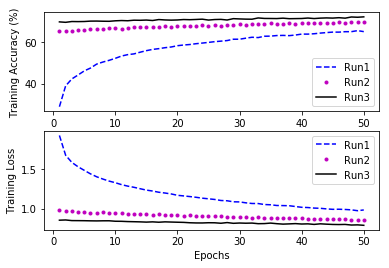

In [34]:
#plot
fig = plt.figure()
plt.subplot(211)
plt.plot(range(start_epoch,num_epochs+1), acc_log5, '--b', label='Run1')
plt.plot(range(start_epoch,num_epochs+1), acc_log6, '.m', label='Run2')
plt.plot(range(start_epoch,num_epochs+1), acc_log7, 'k', label='Run3')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy (%)')
legend = plt.legend()

plt.subplot(212)
plt.plot(range(start_epoch,num_epochs+1), loss_log5, '--b', label='Run1')
plt.plot(range(start_epoch,num_epochs+1), loss_log6, '.m', label='Run2')
plt.plot(range(start_epoch,num_epochs+1), loss_log7, 'k', label='Run3')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
legend = plt.legend()